In [13]:
import syft as sy

In [14]:
duet2 = sy.duet()

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!
♫♫♫ > Duet Server ID: 6bd8bf994dc44c6b10028c42e4a13f1e

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("6bd8bf994dc44c6b10028c42e4a13f1e")

♫♫♫ > STEP 2: Ask your partner for their Client ID and enter it below!
♫♫♫ > Duet Partner's Client ID: be966bdc66a11ee47131452669649de5

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!

`searchable` is deprecated please use `pointable` in futurees: 0  Request Handlers: 0                                


In [1]:
import torch
import numpy as np
import torch as th
import pandas as pd
from PIL import Image
import imageio.v2 as imageio
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch
import torch.optim as optim
import torch as th
import numpy as np
import torch.nn.functional as F

In [2]:
df =pd.read_csv('HAM10000_metadata.csv')

In [52]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is CCCD-CCBC

 Directory of C:\Users\nazmul_hossen

01/01/2024  11:33 AM    <DIR>          .
04/26/2023  09:15 AM    <DIR>          ..
09/09/2023  09:56 PM    <DIR>          .activeloop
11/09/2023  10:11 PM    <DIR>          .cache
06/14/2023  09:45 PM    <DIR>          .cisco
05/08/2023  11:15 AM    <DIR>          .conda
03/17/2023  09:09 AM                61 .condarc
11/18/2022  10:26 PM    <DIR>          .continuum
12/29/2023  09:59 AM    <DIR>          .ipynb_checkpoints
11/18/2022  10:28 PM    <DIR>          .ipython
11/18/2022  10:26 PM    <DIR>          .jupyter
12/05/2022  02:20 PM    <DIR>          .keras
12/04/2022  09:13 PM    <DIR>          .matplotlib
08/25/2023  09:29 AM    <DIR>          .ms-ad
06/18/2023  12:04 PM    <DIR>          .ssh
03/18/2023  10:05 PM    <DIR>          .syft
03/17/2023  10:53 AM               151 0.10
03/17/2023  10:55 AM               192 4.1.1
03/17/2023  10:55 AM               242 4.22.0
1

In [3]:
target = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [50]:
import random
from torchvision import transforms
from PIL import Image

# Define transformations for HAM10000 dataset
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the images to 64x64
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalization for single-channel images
])

# Create subsets
num_subsets = 6
all_subsets = []

for _ in range(num_subsets):
    subset_classes = random.sample(target, 5)  # Select 5 random classes from the target classes
    subset_data = []
    class_samples_count = {cls: 0 for cls in subset_classes}

    # Iterate through the HAM10000 dataset to extract the subset
    for index, row in df.iterrows():
        label = row['dx']
        if label in subset_classes and class_samples_count[label] < 5:
            image_path = row['image_path']  # Assuming 'image_path' column contains image paths
            img = Image.open(image_path)  # Load the image using PIL
            img_transformed = transform_train(img)  # Apply transformations
            subset_data.append((img_transformed, label))
            class_samples_count[label] += 1

        # Check if 5 samples per class have been collected
        if all(count == 5 for count in class_samples_count.values()):
            break

    all_subsets.append((subset_classes, subset_data))

# Display subset information
for idx, (subset_classes, subset) in enumerate(all_subsets, 1):
    classes_str = ', '.join(subset_classes)
    print(f"Subset {idx}: Classes = [{classes_str}], Total samples = {len(subset)}")

KeyError: 'image_path'

In [53]:
import random
from torchvision import transforms
from PIL import Image

# Define transformations for HAM10000 dataset
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the images to 64x64
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalization for single-channel images
])

# Create subsets
num_subsets = 6
all_subsets = []

for _ in range(num_subsets):
    subset_classes = random.sample(target, 5)  # Select 5 random classes from the target classes
    subset_data = []
    class_samples_count = {cls: 0 for cls in subset_classes}

    # Iterate through the HAM10000 dataset to extract the subset
    for index, row in df.iterrows():
        label = row['dx']
        if label in subset_classes and class_samples_count[label] < 5:
            img_path = f'HAM_data//HAM10000/{row["image_id"]}.jpg'  # Construct the image path
            img = Image.open(img_path)  # Load the image using PIL
            img_transformed = transform_train(img)  # Apply transformations
            subset_data.append((img_transformed, label))
            class_samples_count[label] += 1

        # Check if 5 samples per class have been collected
        if all(count == 5 for count in class_samples_count.values()):
            break

    all_subsets.append((subset_classes, subset_data))

# Display subset information
for idx, (subset_classes, subset) in enumerate(all_subsets, 1):
    classes_str = ', '.join(subset_classes)
    print(f"Subset {idx}: Classes = [{classes_str}], Total samples = {len(subset)}")

Subset 1: Classes = [bcc, vasc, akiec, bkl, df], Total samples = 25
Subset 2: Classes = [df, nv, bcc, mel, bkl], Total samples = 25
Subset 3: Classes = [mel, nv, bcc, akiec, vasc], Total samples = 25
Subset 4: Classes = [nv, akiec, bkl, vasc, df], Total samples = 25
Subset 5: Classes = [mel, nv, bkl, vasc, akiec], Total samples = 25
Subset 6: Classes = [vasc, nv, akiec, df, bkl], Total samples = 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

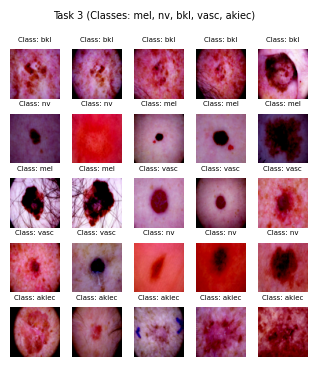

In [97]:
import matplotlib.pyplot as plt

# Define function to plot images from a subset
def plot_subset(subset, subset_idx):
    plt.figure(figsize=(4, 4))
    plt.suptitle(f"Task 3 (Classes: {', '.join(subset[0])})", fontsize=7)
    
    for i, (image, label) in enumerate(subset[1]):
        plt.subplot(5, 5, i + 1)
            #print(f"Batch {i + 1}: Data Size: {image.size()}")
        plt.imshow(image.permute(1, 2, 0))  # Permute dimensions for correct image display
        plt.title(f"Class: {label}", fontsize=5)  # Access label directly if it's already an integer
        plt.axis('off')
    
    #plt.tight_layout()
    plt.subplots_adjust(wspace=0.0, hspace=0.3)
    plt.savefig('HAM10K-subset3.pdf')
    plt.show()

# Plot images for each subset
for idx, subset in enumerate(all_subsets[:5]):
    if idx == 4:
        plot_subset(subset, idx)
        


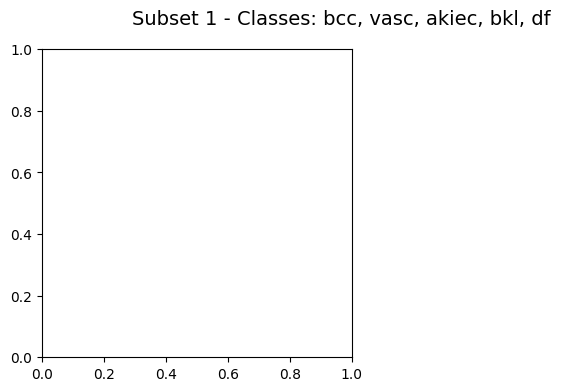

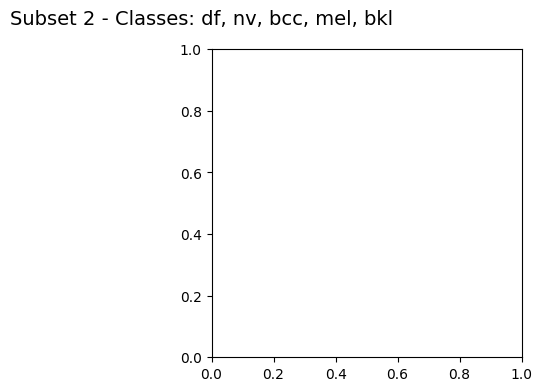

In [67]:
import matplotlib.pyplot as plt

# Define function to plot images from a subset
def plot_subset(subset, subset_idx, i):
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    plt.subplot(1, 2, i)
    plt.suptitle(f"Subset {subset_idx + 1} - Classes: {', '.join(subset[0])}", fontsize=14)
    for j, (image, label) in enumerate(subset[1][i * 25:(i + 1) * 25]):
        plt.subplot(5, 5, j + 1)
        plt.imshow(image.permute(1, 2, 0), vmin=0, vmax=1)  # Specify valid range for pixel values
        plt.title(f"Class: {label}", fontsize=5)  # Access label directly if it's already an integer
        plt.axis('off')
    
    plt.subplots_adjust(wspace=0.0, hspace=0.3)
    plt.show()

# Plot images for the first two subsets
k=1
for idx, subset in enumerate(all_subsets[:2]):
    plot_subset(subset, idx,k)
    k+=1

In [4]:
subset_metadata_a = df.sample(frac=0.2, random_state=42)   

In [5]:
num_samples_per_label_a = 400                                                 ## 300 sample for each class
balanced_sub_a = pd.DataFrame()
for label in target:
    label_metadata_a = subset_metadata_a[subset_metadata_a['dx'] == label]
    label_samples_a = label_metadata_a.sample(n=num_samples_per_label_a, random_state=42, replace = True)
    balanced_sub_a = pd.concat([balanced_sub_a, label_samples_a])

In [6]:
size = (64, 64)
images_sub_a = []
for i, row in balanced_sub_a.iterrows():
    img_a = imageio.imread('HAM_data//HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img_a).resize(size))
    images_sub_a.append(resized_img)

In [7]:
images_and_labels_sub_a = []
for i, row in balanced_sub_a.iterrows():
    img_b = imageio.imread('HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img_b).resize(size))
    label = row['dx']
    images_and_labels_sub_a.append((resized_img, label))

In [8]:
# Convert list of tuples to NumPy arrays
images_sub_a, labels_sub_a = zip(*images_and_labels_sub_a)
images_sub_a = np.array(images_sub_a)
labels_sub_a = np.array(labels_sub_a)

# Print the shapes of the resulting arrays
print('Image shape:', images_sub_a.shape)
print('Label shape:', labels_sub_a.shape)

Image shape: (2800, 64, 64, 3)
Label shape: (2800,)


In [9]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_sub_a)

In [10]:
image_tensor = th.FloatTensor(images_sub_a.astype('float32'))
label_tensor = th.FloatTensor(labels_encoded.astype('float32'))

In [11]:
import torchvision.transforms as transforms
from PIL import Image

transform_train = transforms.Compose([
    transforms.RandomCrop(64, padding=0),    
    transforms.RandomHorizontalFlip(),    
    transforms.ToTensor(),    
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply the transformations to the data
x_train_transformed = []
for img in images_sub_a:
    img_pil = Image.fromarray(img)
    img_transformed = transform_train(img_pil)
    x_train_transformed.append(img_transformed)

In [12]:
x_train_transformed = torch.stack(x_train_transformed)

In [ ]:
num_subsets = 6

# Initialize list to store subsets
all_subsets = []

# Create 20 subsets
for _ in range(num_subsets):
    subset_classes = random.sample(cifar100.classes, 5)  # Select 5 random classes
    subset_data = []
    class_samples_count = {cls: 0 for cls in subset_classes}

    # Iterate through the CIFAR-100 dataset to extract the subset
    for idx, (image, label) in enumerate(cifar100):
        if cifar100.classes[label] in subset_classes and class_samples_count[cifar100.classes[label]] < 5:
            subset_data.append((image, label))
            class_samples_count[cifar100.classes[label]] += 1

        # Check if 5 samples per class have been collected
        if all(count == 5 for count in class_samples_count.values()):
            break

    all_subsets.append((subset_classes, subset_data))

# Display the information for each subset
for idx, (subset_classes, subset) in enumerate(all_subsets, 1):
    classes_str = ', '.join(subset_classes)
    print(f"Subset {idx}: Classes = [{classes_str}], Total samples = {len(subset)}")

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_train_transformed, label_tensor, train_size=0.7, random_state=2019)

In [14]:
train_dataset_worker1 = TensorDataset(x_train, y_train)
test_dataset_worker1 = TensorDataset(x_test, y_test)

In [26]:
batch_size = 40
train_dataloader_worker1 = DataLoader(train_dataset_worker1, batch_size=batch_size, shuffle=True)
test_dataloader_worker1 = DataLoader(test_dataset_worker1, batch_size = batch_size, shuffle=False)

In [36]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(16*13*13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)
        
    def forward(self, x):
        x = self.pool1(th.relu(self.conv1(x)))
        x = self.pool2(th.relu(self.conv2(x)))
        x = th.flatten(x, start_dim=1)
        x = th.relu(self.fc1(x))
        x = th.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
local_model = LeNet()

In [38]:
def model_train_worker1(model, train_dataloader, test_dataloader):
    lambda_l2 = 0.01
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    train_loss = []
    test_accuracy = []
    fit_loss = []
    num_epochs = 200
    
    for epoch in range(num_epochs):
        _train_loss = 0.0
        _fit_loss = 0.0
        
        for i, batch in enumerate(train_dataloader):
            inputs, targets = batch
            optimizer.zero_grad()
            
            # Calculate loss before the optimization step
            
            outputs = model(inputs)
            loss = criterion(outputs, targets.long())
            
            # Add L2 regularization to the loss
            l2_reg = sum(torch.norm(param) for param in model.parameters())
            loss += lambda_l2 * l2_reg
            
            _train_loss += loss.item()
            loss.backward()
            optimizer.step()
            
            outputs_fit = model(inputs)
            loss_fit = criterion(outputs_fit, targets.long())
            
            # Calculate fit loss per batch
            loss_fit_diff = loss - loss_fit
            _fit_loss += loss_fit_diff.item()
        
        _train_loss /= len(train_dataloader)
        train_loss.append(_train_loss)
        
        # Average fit loss across all batches for the epoch
        _fit_loss /= len(train_dataloader)
        fit_loss.append(abs(_fit_loss))

        # Evaluation on test data
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for i, batch in enumerate(test_dataloader):
                inputs, targets = batch
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()
        accuracy = 100 * correct / total
        test_accuracy.append(accuracy)
        
        print(f"Epoch {epoch}: Train_loss = {_train_loss}, Test_accuracy = {accuracy}%, Fit Loss = {_fit_loss}")
        
    return train_loss, test_accuracy, fit_loss

In [39]:
train_loss11, accuracy11, fit_loss = model_train_worker1(local_model, train_dataloader_worker1, test_dataloader_worker1)

Epoch 0: Train_loss = 1.9776049317145834, Test_accuracy = 33.17479191438763%, Fit Loss = 0.223372931383094
Epoch 1: Train_loss = 1.8129634735535602, Test_accuracy = 42.687277051129605%, Fit Loss = 0.3394423820534531
Epoch 2: Train_loss = 1.701348866735186, Test_accuracy = 46.37336504161712%, Fit Loss = 0.3755584699766977
Epoch 3: Train_loss = 1.57262722570069, Test_accuracy = 49.464922711058264%, Fit Loss = 0.39174207011047674
Epoch 4: Train_loss = 1.4706714907471015, Test_accuracy = 54.81569560047562%, Fit Loss = 0.4637516615342121
Epoch 5: Train_loss = 1.371606865707709, Test_accuracy = 61.11771700356718%, Fit Loss = 0.5514744945934841
Epoch 6: Train_loss = 1.3000664029802596, Test_accuracy = 63.020214030915575%, Fit Loss = 0.6055536671560637
Epoch 7: Train_loss = 1.309031496242601, Test_accuracy = 67.06302021403091%, Fit Loss = 0.6655420405524117
Epoch 8: Train_loss = 1.2454949203802614, Test_accuracy = 69.9167657550535%, Fit Loss = 0.6914166309395615
Epoch 9: Train_loss = 1.1565116

Epoch 76: Train_loss = 0.692510939374262, Test_accuracy = 78.83472057074911%, Fit Loss = 0.6657730085509164
Epoch 77: Train_loss = 0.7115362055447637, Test_accuracy = 82.1640903686088%, Fit Loss = 0.6844668960084721
Epoch 78: Train_loss = 0.6692901059072844, Test_accuracy = 81.33174791914388%, Fit Loss = 0.6547970017608331
Epoch 79: Train_loss = 0.734301435704134, Test_accuracy = 78.59690844233056%, Fit Loss = 0.6945582652578548
Epoch 80: Train_loss = 0.8718745161075981, Test_accuracy = 82.04518430439953%, Fit Loss = 0.7864422068303946
Epoch 81: Train_loss = 0.7850554317844157, Test_accuracy = 79.90487514863258%, Fit Loss = 0.7440371695829897
Epoch 82: Train_loss = 0.8147458507090198, Test_accuracy = 81.2128418549346%, Fit Loss = 0.7677144931287182
Epoch 83: Train_loss = 0.785262039729527, Test_accuracy = 82.52080856123662%, Fit Loss = 0.7433192729949951
Epoch 84: Train_loss = 0.6954664624467188, Test_accuracy = 82.52080856123662%, Fit Loss = 0.6776395075175227
Epoch 85: Train_loss = 0

Epoch 151: Train_loss = 0.5562322127575777, Test_accuracy = 82.6397146254459%, Fit Loss = 0.5530583384085674
Epoch 152: Train_loss = 0.5321673544085755, Test_accuracy = 82.40190249702735%, Fit Loss = 0.52893129903443
Epoch 153: Train_loss = 0.5106312754202862, Test_accuracy = 82.99643281807373%, Fit Loss = 0.5070043090654879
Epoch 154: Train_loss = 0.4948085491754571, Test_accuracy = 82.28299643281808%, Fit Loss = 0.49096184786485164
Epoch 155: Train_loss = 0.47418494796266364, Test_accuracy = 83.23424494649227%, Fit Loss = 0.46920290041942986
Epoch 156: Train_loss = 0.4561167572225843, Test_accuracy = 83.115338882283%, Fit Loss = 0.4521460764262141
Epoch 157: Train_loss = 0.4404482707685354, Test_accuracy = 81.09393579072533%, Fit Loss = 0.4355502055615795
Epoch 158: Train_loss = 0.6444659166190089, Test_accuracy = 78.59690844233056%, Fit Loss = 0.5915975826127189
Epoch 159: Train_loss = 0.8131408618420971, Test_accuracy = 80.85612366230677%, Fit Loss = 0.7207271651345857
Epoch 160: T

In [20]:
_reg_fit_loss11 = fit_loss
_reg_train_loss11 = train_loss11
_reg_accuracy11 = accuracy11

In [1]:
_reg_fit_loss11 = [0.20553271878849377,
 0.21971489082683215,
 0.3260978541590951,
 0.3560822687365792,
 0.42593682218681683,
 0.48671793937683105,
 0.554948250001127,
 0.6088509871201082,
 0.6371742500500246,
 0.715520750392567,
 0.7520752020857551,
 0.7165535688400269,
 0.7318088750947606,
 0.7532518871805884,
 0.8177787498994307,
 0.829005628824234,
 0.8004822690378536,
 0.7994383329694922,
 0.7747593996199694,
 0.7887477373534982,
 0.7763972783630545,
 0.7921950193968686,
 0.7876276726072485,
 0.7480511177669872,
 0.7460674399679358,
 0.7705997296354987,
 0.7598790675401688,
 0.7447038712826642,
 0.7656966908411547,
 0.8101413209329952,
 0.81307629969987,
 0.8290374292568727,
 0.8225131847641685,
 0.7729247984561053,
 0.7262957285750996,
 0.6809473213824359,
 0.665293047373945,
 0.6329231709241867,
 0.593419536948204,
 0.5585623451254584,
 0.5266897624189203,
 0.49800730361179874,
 0.48762275820428674,
 0.6829345944252881,
 0.7746831436048854,
 0.8140820874409243,
 0.7830106710845773,
 0.7482105141336267,
 0.8238125064156272,
 0.8284253193573519,
 0.7779696665026925,
 1.0475103191354058,
 1.0228334245356647,
 0.9211344407363371,
 0.8635409636930986,
 0.8506756099787626,
 0.8441424586556174,
 0.7876197871836749,
 0.7421775284138593,
 0.7021919922395186,
 0.665517579425465,
 0.6320044493133371,
 0.6009733554991809,
 0.5722810070623051,
 0.545182542367415,
 0.5200572623447939,
 0.4993920996785164,
 0.47621273588050494,
 0.4598482501777736,
 0.5388083512132819,
 0.7924695177511736,
 0.7638882994651794,
 0.7348191494291479,
 0.7492730265313928,
 0.7723849476738409,
 0.8920438668944619,
 0.8105675049803474,
 0.7375218732790514,
 0.6967862885106694,
 0.66801602054726,
 0.636517271399498,
 0.6117678135633469,
 0.59640795127912,
 0.5829968032511798,
 0.5807277004827153,
 0.5646996741945093,
 0.5788685611703179,
 0.7040011882781982,
 0.7417023114182733,
 0.6753936315124686,
 0.6397998062047091,
 0.6353437114845623,
 0.6701336354017258,
 0.6740334020419554,
 0.7473773536357012,
 0.742419649254192,
 0.7877534546635367,
 0.7835455740039999,
 0.7804462855512445,
 0.8301465199752287,
 0.7971055616031993,
 0.7679957313971086,
 0.736812101169066,
 0.7384866245768287,
 0.7065013362602754,
 0.696473316712813,
 0.6833772483197126,
 0.6676799045367674,
 0.6409492303024639,
 0.6429338983514092,
 0.6175058009949598,
 0.5896051228046417,
 0.5600837916135788,
 0.5325211963870309,
 0.5081139355897903,
 0.48512440784411,
 0.4640149237080054,
 0.4466066434979439,
 0.6022774394262921,
 0.7789762914180756,
 0.7216976610097018,
 0.7226866822351109,
 0.697620611299168,
 0.6821948018941012,
 0.6760415489023383,
 0.6780298149043863,
 0.7116471163251183,
 0.6643842255527322,
 0.6403241347182881,
 0.6523629372770136,
 0.7165781598199498,
 0.6972124820405786,
 0.6630498495968905,
 0.6234295219182968,
 0.5919708812778647,
 0.5613701045513153,
 0.5488818463954058,
 0.520799533887343,
 0.497351465577429,
 0.4748792533170093,
 0.4523727507753806,
 0.4318486289544539,
 0.4136789786544713,
 0.397959285161712,
 0.38400714979930356,
 0.42561655085195194,
 0.7767828337170861,
 1.2150257189165463,
 1.231490893797441,
 1.1488605412569912,
 1.0619556429711254,
 0.9569652310826562,
 0.8907540210268714,
 0.8368798968466845,
 0.8500435731627725,
 0.8349241153760389,
 0.8098394505002282,
 0.7609858350320295,
 0.793839231133461,
 0.8014393150806427,
 0.8115982697768644,
 0.8229339745911685,
 0.7686394737525419,
 0.7331210022622888,
 0.6928648379716006,
 0.6698746247725054,
 0.6602902737530795,
 0.6414794407107614,
 0.6324254938147285,
 0.624548465013504,
 0.6067471951246262,
 0.6043426489288156,
 0.6801566535776312,
 0.688319978388873,
 0.7219044349410317,
 0.7382263893430884,
 0.7042703885923732,
 0.6745819557796825,
 0.6362276903607629,
 0.6277863518758253,
 0.5897535925561731,
 0.5620318935676054,
 0.5414305397055366,
 0.5206016925248232,
 0.5004495111378756,
 0.483630395071073,
 0.5534307021986354,
 0.600996736775745,
 0.635830969973044,
 0.7280473140153018,
 0.7155544364994223,
 0.7113932479511608,
 0.69445424052802,
 0.6887568966908888,
 0.6547496156259016,
 0.6155888560143384,
 0.5825600786642595,
 0.5508859171108766,
 0.5216913710940968,
 0.5090331949970939]

In [2]:
_reg_train_loss11 = [1.9824265024878762,
 1.818865266713229,
 1.7552578476342289,
 1.6053077470172534,
 1.5156726837158203,
 1.508791750127619,
 1.4939599281007594,
 1.3279790363528512,
 1.2468235221776096,
 1.239540471272035,
 1.2330729256976733,
 1.0705470659516074,
 0.9957909624684941,
 1.0182739672335712,
 1.0945793796669354,
 1.0412217798558148,
 0.9660631634972312,
 0.940075546503067,
 0.8698070022192869,
 0.8811751008033752,
 0.8498513955961574,
 0.8690836903723803,
 0.8690655624324625,
 0.8004413192922418,
 0.7827489972114563,
 0.8303488953547045,
 0.8002617738463662,
 0.7764709510586478,
 0.8077241615815596,
 0.8777914277531884,
 0.8797922364690087,
 0.9003908959302035,
 0.8844191377813165,
 0.8080148493701761,
 0.7497323141856627,
 0.694251923398538,
 0.6814638416875493,
 0.6425854550166563,
 0.5978948758407072,
 0.562548732215708,
 0.5304098887877031,
 0.5017012960531495,
 0.49861542135477066,
 0.7443288998170332,
 0.8744087679819628,
 0.8665249618616971,
 0.8287599777633493,
 0.7730538140643727,
 0.898503689603372,
 0.88936902040785,
 0.8034308498555963,
 1.3091765154491772,
 1.1713958247141405,
 0.9762038453058763,
 0.8954107436266813,
 0.8794394162568179,
 0.8849255442619324,
 0.808540017767386,
 0.7520738027312539,
 0.7065723186189478,
 0.6678968166763132,
 0.6344292556697672,
 0.6037733446468007,
 0.5752547627145593,
 0.5483843914487145,
 0.5236174694516442,
 0.5030180127783255,
 0.4802340838042172,
 0.4642253125255758,
 0.5692025152119723,
 0.9319815053181215,
 0.8435560004277662,
 0.7688363113186576,
 0.8040131669152867,
 0.8753297274762933,
 1.0130775272846222,
 0.8405186262997714,
 0.7455332225019281,
 0.7065832574259151,
 0.6780629754066467,
 0.6433804658326235,
 0.6178091886368665,
 0.6118794611909173,
 0.5934736728668213,
 0.5933742834763094,
 0.5751686272296038,
 0.595170645551248,
 0.7467419193549589,
 0.7978876829147339,
 0.6963091018525037,
 0.6501906595446847,
 0.6522140259092505,
 0.6948306641795419,
 0.7127822922034697,
 0.787062172185291,
 0.769636021419005,
 0.829471764239398,
 0.8222276026552374,
 0.8193101720376448,
 0.8625334230336276,
 0.8200884718786586,
 0.7853747633370486,
 0.7460570687597449,
 0.7553872831843116,
 0.7170369597998533,
 0.7101680040359497,
 0.6924545250155709,
 0.6723084666512229,
 0.6484891298142347,
 0.6596585038033399,
 0.6274582120505247,
 0.5964887494390662,
 0.5639193816618486,
 0.5350393910299648,
 0.5113609169017185,
 0.488603066991676,
 0.46770176223733206,
 0.4507245048880577,
 0.6602067134597085,
 0.8641729571602561,
 0.7697426500645551,
 0.7702283479950645,
 0.7251158126375892,
 0.7042068825526671,
 0.6942382021383806,
 0.7024961872534319,
 0.7417726394805041,
 0.6833926656029441,
 0.6510569493878972,
 0.6626949662512,
 0.7417780242182992,
 0.7174833322113211,
 0.6846325153654272,
 0.631645140322772,
 0.5981910960240797,
 0.5651837546717037,
 0.5556766282428395,
 0.5286398015239022,
 0.5017793354662982,
 0.4791760045019063,
 0.45568921958858316,
 0.4357885609973561,
 0.4180470122532411,
 0.4030112305825407,
 0.3895790150219744,
 0.4427383454008536,
 1.0252727757800708,
 1.814267480915243,
 1.426705238494006,
 1.2804044349627062,
 1.1329449984160336,
 1.0077212344516406,
 0.9176179455085234,
 0.8563979999585585,
 0.8751353282820095,
 0.8625500039620833,
 0.8452249331907793,
 0.775744768706235,
 0.8189538852734999,
 0.8242996822703968,
 0.8449305065653541,
 0.8660263012756001,
 0.7885466705669056,
 0.7480840601704337,
 0.7043557194146243,
 0.6824194978583943,
 0.6763614063913171,
 0.6515538204799999,
 0.6432245685295626,
 0.6362302696163004,
 0.6140648993578824,
 0.6151573170315136,
 0.7096416814760729,
 0.7053390863266858,
 0.7445006153800271,
 0.7753153917464343,
 0.721944353797219,
 0.6952970068563115,
 0.6457414789633318,
 0.6391519538380883,
 0.5950705205852335,
 0.5670623616738752,
 0.5487373579632152,
 0.5259191488677805,
 0.5070583434267477,
 0.4895876415751197,
 0.5769111080603166,
 0.6244221180677414,
 0.6662781143730337,
 0.7994043244556948,
 0.7791570059277795,
 0.743970429355448,
 0.7211736169728366,
 0.7132735807787288,
 0.674060192975131,
 0.624091699719429,
 0.5861835940317675,
 0.5535991042852402,
 0.5247197083451531,
 0.5130638879808512]

In [3]:
_reg_accuracy11 = [22.711058263971463,
 39.71462544589774,
 40.54696789536266,
 47.44351961950059,
 48.51367419738407,
 54.577883472057074,
 58.26397146254459,
 60.04756242568371,
 68.84661117717003,
 63.73365041617122,
 70.63020214030915,
 74.43519619500594,
 76.09988109393579,
 74.91082045184304,
 75.26753864447087,
 75.50535077288941,
 77.05112960761,
 80.14268727705112,
 82.52080856123662,
 81.92627824019024,
 81.56956004756242,
 82.1640903686088,
 82.75862068965517,
 82.28299643281808,
 82.04518430439953,
 80.7372175980975,
 83.70986920332938,
 82.28299643281808,
 78.83472057074911,
 79.7859690844233,
 79.54815695600476,
 80.61831153388823,
 81.45065398335315,
 82.52080856123662,
 83.59096313912009,
 82.1640903686088,
 81.92627824019024,
 83.70986920332938,
 83.23424494649227,
 82.75862068965517,
 82.87752675386444,
 82.6397146254459,
 81.6884661117717,
 79.7859690844233,
 79.66706302021403,
 83.23424494649227,
 83.35315101070155,
 83.70986920332938,
 78.71581450653983,
 83.82877526753865,
 81.80737217598097,
 75.50535077288941,
 81.09393579072533,
 82.52080856123662,
 80.97502972651606,
 81.92627824019024,
 83.59096313912009,
 82.87752675386444,
 83.23424494649227,
 84.0665873959572,
 83.82877526753865,
 83.94768133174792,
 83.94768133174792,
 84.0665873959572,
 83.82877526753865,
 84.0665873959572,
 84.0665873959572,
 84.0665873959572,
 85.25564803804994,
 80.02378121284185,
 78.71581450653983,
 81.2128418549346,
 83.82877526753865,
 81.2128418549346,
 76.57550535077289,
 84.18549346016647,
 83.59096313912009,
 83.59096313912009,
 82.75862068965517,
 83.82877526753865,
 84.5422116527943,
 83.59096313912009,
 83.23424494649227,
 83.82877526753865,
 83.59096313912009,
 84.66111771700356,
 84.30439952437574,
 80.26159334126041,
 82.52080856123662,
 82.99643281807373,
 83.47205707491082,
 81.6884661117717,
 82.28299643281808,
 81.80737217598097,
 82.1640903686088,
 80.61831153388823,
 81.33174791914388,
 82.28299643281808,
 80.61831153388823,
 81.92627824019024,
 81.33174791914388,
 82.1640903686088,
 80.61831153388823,
 83.23424494649227,
 82.6397146254459,
 82.87752675386444,
 82.40190249702735,
 84.0665873959572,
 82.75862068965517,
 83.115338882283,
 83.47205707491082,
 84.18549346016647,
 84.42330558858502,
 84.18549346016647,
 84.66111771700356,
 84.30439952437574,
 84.0665873959572,
 84.5422116527943,
 79.90487514863258,
 80.7372175980975,
 82.75862068965517,
 82.40190249702735,
 82.6397146254459,
 82.40190249702735,
 80.97502972651606,
 79.66706302021403,
 84.5422116527943,
 80.38049940546968,
 82.40190249702735,
 81.80737217598097,
 82.28299643281808,
 83.70986920332938,
 83.35315101070155,
 81.92627824019024,
 83.70986920332938,
 83.70986920332938,
 83.115338882283,
 83.23424494649227,
 83.115338882283,
 83.82877526753865,
 84.0665873959572,
 83.70986920332938,
 83.23424494649227,
 83.23424494649227,
 83.59096313912009,
 76.21878715814506,
 68.72770511296076,
 73.48394768133174,
 75.14863258026159,
 80.02378121284185,
 81.09393579072533,
 81.92627824019024,
 82.04518430439953,
 81.56956004756242,
 81.09393579072533,
 80.14268727705112,
 81.09393579072533,
 79.90487514863258,
 81.33174791914388,
 79.7859690844233,
 81.2128418549346,
 82.75862068965517,
 81.6884661117717,
 82.40190249702735,
 82.28299643281808,
 82.75862068965517,
 82.87752675386444,
 81.80737217598097,
 83.59096313912009,
 82.99643281807373,
 82.87752675386444,
 81.56956004756242,
 81.80737217598097,
 79.42925089179548,
 80.14268727705112,
 79.54815695600476,
 81.2128418549346,
 81.80737217598097,
 81.80737217598097,
 82.52080856123662,
 83.23424494649227,
 82.28299643281808,
 82.04518430439953,
 82.52080856123662,
 81.56956004756242,
 83.94768133174792,
 80.26159334126041,
 82.87752675386444,
 79.54815695600476,
 81.6884661117717,
 80.02378121284185,
 82.04518430439953,
 81.6884661117717,
 83.115338882283,
 81.2128418549346,
 82.40190249702735,
 82.40190249702735,
 82.6397146254459,
 82.52080856123662,
 83.35315101070155]

In [4]:
_reg_fit_loss12 = fit_loss
_reg_train_loss12 = train_loss11
_reg_accuracy12 = accuracy11

NameError: name 'fit_loss' is not defined

In [5]:
_reg_fit_loss12 = [0.2409986219098491,
 0.3031896545040992,
 0.3744524409694056,
 0.4219439145057432,
 0.45653788889608077,
 0.5104164327344587,
 0.5517980033351529,
 0.595401563952046,
 0.6390609895029375,
 0.6196052624333289,
 0.63612731810539,
 0.6642944793547353,
 0.6877917512770622,
 0.7107890805890483,
 0.7302672939915811,
 0.7345440983772278,
 0.7231484228564847,
 0.7066929801817863,
 0.7574261638426012,
 0.7482188920820912,
 0.7256595280862623,
 0.7004818916320801,
 0.7309491384413934,
 0.727961330644546,
 0.7003286019448312,
 0.735489966407899,
 0.6913439016188344,
 0.6533667752819676,
 0.6262634704189916,
 0.6303923553036105,
 0.6342136706075361,
 0.6518068582780899,
 0.6761801415874112,
 0.6906156597598907,
 0.6333781846107975,
 0.6272745920765784,
 0.6682576017995034,
 0.6711732360624498,
 0.6558190468818911,
 0.628300960986845,
 0.6211938511940741,
 0.7170441054528759,
 0.6974503455623504,
 0.7267686916935828,
 0.7595069946781281,
 0.7752786855543813,
 0.7601992833998895,
 0.7503328746364962,
 0.7734796481747781,
 1.3245670795440674,
 1.1299349915596746,
 1.0644704737970907,
 1.0074632340861904,
 0.9593472788410802,
 0.923314715585401,
 0.9383841330005277,
 0.8918151163285778,
 0.8715607197053971,
 0.8351236774075416,
 0.8104561624988433,
 0.7760047470369646,
 0.7601992507134715,
 0.7572176975588645,
 0.8715643152113883,
 0.8724180036975492,
 0.8737119243990991,
 0.8290022073253509,
 0.8126629302578587,
 0.7949281988605377,
 0.8010358099014528,
 0.7742563140007758,
 0.7648598993978193,
 0.7469768331896874,
 0.7195334607555021,
 0.6889014147943066,
 0.6643741265419991,
 0.8189026674916667,
 0.9402507120563138,
 0.9022259731446544,
 0.8556889757033317,
 0.8359985140062147,
 0.8011621736711071,
 0.7707317106185421,
 0.796788102196109,
 0.8205397975060248,
 0.8000166819941613,
 0.7508368530581074,
 0.7188099949590622,
 0.6953953427653159,
 0.6694535959151483,
 0.6456777165012975,
 0.6231089099760978,
 0.6006429214631358,
 0.5800068224630048,
 0.5603117365990916,
 0.544102047720263,
 0.5238502102513467,
 0.5063802705657098,
 0.49007936254624396,
 0.4712051412751598,
 0.8326974972601859,
 0.8475660989361424,
 0.8403619777771735,
 0.8146766577997515,
 0.7661037310477226,
 0.7242770175780019,
 0.6835054101482514,
 0.6450342074517281,
 0.6095485321937069,
 0.5800167514431861,
 0.5536318844364535,
 0.5290558068983017,
 0.5066486837402466,
 0.4864856495011237,
 0.46652444620286265,
 0.4482755305305604,
 0.43129079091933464,
 0.41559742439177727,
 0.4005196844377825,
 0.38670443527160153,
 0.40313934895300096,
 0.6573369426112021,
 0.672166197530685,
 0.6735184807931224,
 0.6634975671768188,
 0.6625594073726285,
 0.6973916196054027,
 0.7337971656553207,
 0.7123057938391163,
 0.7176129279598114,
 0.7554120902092226,
 0.7332397257128069,
 0.7271098686802772,
 0.6738883276139537,
 0.6601943258316286,
 0.6440017819404602,
 0.6304553958677477,
 0.5903817222964379,
 0.5616763349502317,
 0.5361686272005881,
 0.5130300118077186,
 0.4918879482053941,
 0.47243692028907036,
 0.45418929573028316,
 0.4369447048633329,
 0.4207969029103556,
 0.4061793242731402,
 0.3922411876340066,
 0.37944237935927605,
 0.4205748592653582,
 0.5611507056220886,
 0.5858927888254966,
 0.6136990381825355,
 0.8975441571204893,
 0.8096246354041561,
 0.771714320105891,
 0.7568837673433365,
 0.7416779072053971,
 0.7069720645104686,
 0.7114000089706913,
 0.7142245634909599,
 0.694705065219633,
 0.6631361515291275,
 0.6272277889713165,
 0.5955831812274072,
 0.5701761322636758,
 0.5466851072926675,
 0.524841264370949,
 0.5044306295533334,
 0.4853464086209574,
 0.467334779039506,
 0.4505018005448003,
 0.4345938899824696,
 0.4197309180613487,
 0.4056578778451489,
 0.39255957545772674,
 0.38038613238642294,
 0.3682253485725772,
 0.35688458238878557,
 0.4699672422101421,
 0.5759596795805039,
 0.648826160738545,
 0.6729322075843811,
 0.6749185092987553,
 0.6660524568250102,
 0.6600036025047302,
 0.7306616690851027,
 0.7619686511255079,
 0.7576291195807918,
 0.7365724502071258,
 0.6953628793839486,
 0.6491642594337463,
 0.6158809469592187,
 0.5866344051976358,
 0.5601591044856656,
 0.5362736505846823,
 0.5145590382237588,
 0.49448787204680905,
 0.47574151235242046,
 0.4582425461661431]

In [6]:
_reg_train_loss12 = [1.9741819366332023,
 1.8195605662561232,
 1.6340507115087202,
 1.4887093497860817,
 1.3798607087904406,
 1.2781266358590895,
 1.2335390025569546,
 1.1230231561968405,
 1.0765072703361511,
 1.0086715625178428,
 0.9676033431483854,
 0.9470235916876024,
 0.9162186730292535,
 0.9393314642290915,
 0.9162186268837221,
 0.9431967004652946,
 0.8475646626564765,
 0.8200433138878115,
 0.9609823034655663,
 0.8698044130879063,
 0.8056439180527964,
 0.7604242044110452,
 0.8121817631106223,
 0.8259211317185433,
 0.74435491331162,
 0.8040350848628629,
 0.7534296281876103,
 0.6884419398923074,
 0.6466892726959721,
 0.652280488321858,
 0.6616551722249677,
 0.6926395258595867,
 0.7269030271037933,
 0.7500827331696788,
 0.6556034011225547,
 0.6422780348408607,
 0.6919508884030003,
 0.7143534460375386,
 0.688647577839513,
 0.6485069471020852,
 0.6345655956575947,
 0.779182122599694,
 0.7425408151841932,
 0.7859888903556331,
 0.8315029182741719,
 0.8271328653058698,
 0.8068931794935658,
 0.7797852293137582,
 0.8144205212593079,
 2.2024226900069945,
 1.5552219037086732,
 1.2629127771623674,
 1.1052619584145085,
 1.0217798159968468,
 0.9508572413075355,
 0.9975613201818159,
 0.9256776090591184,
 0.8922401339777054,
 0.847427781551115,
 0.8218423589583366,
 0.7828562951857044,
 0.7690116320886919,
 0.7630015111738636,
 0.9243231319612072,
 0.9132932693727555,
 0.9144639142097966,
 0.848338944296683,
 0.8384235135970577,
 0.8093223244913162,
 0.8196878433227539,
 0.7874954708160893,
 0.7786720068224015,
 0.7602271303053825,
 0.729758664484947,
 0.6928710283771637,
 0.6669913126576331,
 0.8598296642303467,
 1.0702399996019178,
 0.9590336738094207,
 0.8865467925225535,
 0.8657385495401198,
 0.8258920869519634,
 0.7845166287114543,
 0.8176788380069118,
 0.8527940857794977,
 0.8293534709561255,
 0.7642595767974854,
 0.7236545105134288,
 0.6999201024732282,
 0.6731544117773732,
 0.6482356959773649,
 0.624767453439774,
 0.6023245684562191,
 0.5818178057670593,
 0.5622832313660653,
 0.546336712375764,
 0.5262030305400971,
 0.5090205977039952,
 0.49281718461744245,
 0.5014368862875046,
 1.0009553855465305,
 0.8925169667889995,
 0.8969543114785226,
 0.8685756441085569,
 0.7918147271679293,
 0.7403873685867556,
 0.694677310605203,
 0.6513088980028706,
 0.612442591497975,
 0.5820367470864327,
 0.5555779914702138,
 0.5312309957319691,
 0.509114796115506,
 0.4892984522927192,
 0.4694453843178288,
 0.45146756402907834,
 0.43450228341164127,
 0.4195765554904938,
 0.40403507794103316,
 0.3908404467567321,
 0.4182871551282944,
 0.8101186137045583,
 0.7806433996846599,
 0.7390278097121946,
 0.6956213693464955,
 0.6932059872534967,
 0.776544984309904,
 0.7663630593207574,
 0.7325999063830222,
 0.7390330760709701,
 0.8021484459600141,
 0.7674279232178965,
 0.7510226907268647,
 0.684856201371839,
 0.6740823945691509,
 0.654306088724444,
 0.6443077633457799,
 0.5959904040059736,
 0.5646211697209266,
 0.538196571411625,
 0.5151049225561081,
 0.4942527509504749,
 0.4749161985612685,
 0.4569967773652846,
 0.4399293939913473,
 0.424361668286785,
 0.4097739717652721,
 0.39611404845791476,
 0.38396317247421513,
 0.43856792392269256,
 0.6243443210278788,
 0.6541848221132832,
 0.8211346576290746,
 1.094097339337872,
 0.8732841649363118,
 0.8129700133877416,
 0.7883163286793616,
 0.7769316300269096,
 0.7235130052412709,
 0.7301479520336274,
 0.7351424001878307,
 0.7096307162315615,
 0.6738635820727195,
 0.6323996705393637,
 0.5987462978209218,
 0.5721959740884842,
 0.5486193087793165,
 0.5269476732900066,
 0.5067905783653259,
 0.4879479773582951,
 0.47011549530490754,
 0.45335995574151317,
 0.43785747693430993,
 0.42305386931665484,
 0.4092176431609738,
 0.3966379396377071,
 0.3842332872652238,
 0.3723769832041956,
 0.36109641194343567,
 0.5243160522753193,
 0.6537253433658231,
 0.7184742304586595,
 0.7186966076973946,
 0.7135955575973757,
 0.7033309090522027,
 0.6805630960772114,
 0.8150311362358832,
 0.8591506000488035,
 0.7876187466805981,
 0.7492568454434795,
 0.7088735007470653,
 0.6543039967936854,
 0.6185196349697728,
 0.5883500729837725,
 0.5619382146866091,
 0.5382527459052301,
 0.5167955025549857,
 0.49695550530187543,
 0.47851056918021173,
 0.46121686697006226]

In [7]:
_reg_accuracy12 = [26.278240190249704,
 37.69322235434007,
 47.205707491082045,
 49.940546967895365,
 57.19381688466112,
 62.901307966706305,
 67.30083234244947,
 69.32223543400714,
 72.88941736028538,
 74.79191438763377,
 71.70035671819262,
 77.28894173602853,
 76.93222354340071,
 78.12128418549347,
 76.21878715814506,
 79.07253269916765,
 80.61831153388823,
 80.26159334126041,
 75.86206896551724,
 80.97502972651606,
 82.04518430439953,
 80.38049940546968,
 80.85612366230677,
 80.7372175980975,
 82.28299643281808,
 81.45065398335315,
 81.92627824019024,
 82.75862068965517,
 83.82877526753865,
 82.04518430439953,
 83.35315101070155,
 78.59690844233056,
 81.56956004756242,
 82.87752675386444,
 83.94768133174792,
 81.45065398335315,
 83.35315101070155,
 81.80737217598097,
 81.80737217598097,
 82.6397146254459,
 82.52080856123662,
 81.2128418549346,
 80.26159334126041,
 78.59690844233056,
 81.80737217598097,
 79.3103448275862,
 82.04518430439953,
 80.38049940546968,
 80.61831153388823,
 62.425683709869205,
 74.19738406658739,
 77.76456599286564,
 79.66706302021403,
 80.38049940546968,
 81.2128418549346,
 81.56956004756242,
 82.1640903686088,
 81.45065398335315,
 82.52080856123662,
 81.92627824019024,
 81.45065398335315,
 81.80737217598097,
 81.6884661117717,
 78.47800237812129,
 81.80737217598097,
 79.66706302021403,
 81.80737217598097,
 83.115338882283,
 80.85612366230677,
 80.97502972651606,
 80.49940546967895,
 81.45065398335315,
 82.6397146254459,
 82.99643281807373,
 83.35315101070155,
 83.115338882283,
 75.38644470868014,
 80.61831153388823,
 81.56956004756242,
 80.49940546967895,
 81.92627824019024,
 82.40190249702735,
 81.80737217598097,
 82.87752675386444,
 81.33174791914388,
 81.09393579072533,
 82.40190249702735,
 82.87752675386444,
 81.6884661117717,
 82.1640903686088,
 82.75862068965517,
 82.6397146254459,
 82.87752675386444,
 82.75862068965517,
 82.99643281807373,
 82.75862068965517,
 82.87752675386444,
 82.52080856123662,
 82.40190249702735,
 80.61831153388823,
 77.76456599286564,
 79.90487514863258,
 80.02378121284185,
 78.95362663495838,
 80.85612366230677,
 82.40190249702735,
 82.04518430439953,
 82.6397146254459,
 82.1640903686088,
 82.28299643281808,
 82.1640903686088,
 82.28299643281808,
 82.75862068965517,
 82.04518430439953,
 82.52080856123662,
 81.6884661117717,
 81.92627824019024,
 81.80737217598097,
 81.33174791914388,
 81.80737217598097,
 79.42925089179548,
 77.40784780023782,
 80.26159334126041,
 79.42925089179548,
 80.61831153388823,
 80.38049940546968,
 78.24019024970274,
 82.40190249702735,
 81.56956004756242,
 78.47800237812129,
 79.07253269916765,
 80.97502972651606,
 81.6884661117717,
 80.97502972651606,
 81.56956004756242,
 83.47205707491082,
 82.6397146254459,
 82.6397146254459,
 81.6884661117717,
 82.1640903686088,
 82.1640903686088,
 82.40190249702735,
 82.1640903686088,
 82.52080856123662,
 82.40190249702735,
 82.28299643281808,
 82.28299643281808,
 81.92627824019024,
 81.33174791914388,
 80.38049940546968,
 81.80737217598097,
 81.33174791914388,
 68.37098692033294,
 78.47800237812129,
 79.7859690844233,
 79.66706302021403,
 80.61831153388823,
 81.33174791914388,
 82.04518430439953,
 82.40190249702735,
 82.40190249702735,
 83.115338882283,
 82.87752675386444,
 83.70986920332938,
 82.28299643281808,
 82.75862068965517,
 83.115338882283,
 82.99643281807373,
 82.75862068965517,
 83.35315101070155,
 83.59096313912009,
 83.82877526753865,
 83.35315101070155,
 84.0665873959572,
 83.47205707491082,
 84.0665873959572,
 83.35315101070155,
 82.6397146254459,
 83.82877526753865,
 78.12128418549347,
 78.83472057074911,
 79.42925089179548,
 79.3103448275862,
 81.56956004756242,
 80.26159334126041,
 81.56956004756242,
 78.00237812128418,
 79.07253269916765,
 82.28299643281808,
 81.56956004756242,
 82.28299643281808,
 82.28299643281808,
 82.52080856123662,
 82.52080856123662,
 82.87752675386444,
 82.87752675386444,
 82.87752675386444,
 82.99643281807373,
 82.99643281807373,
 82.75862068965517]

In [44]:
_reg_fit_loss13 = fit_loss
_reg_train_loss13 = train_loss11
_reg_accuracy13 = accuracy11

In [8]:
_reg_fit_loss13 = [0.22478291392326355,
 0.21925204992294312,
 0.23942727595567703,
 0.3023131191730499,
 0.34821459650993347,
 0.38545721769332886,
 0.44796597585082054,
 0.5088929068297148,
 0.5050956159830093,
 0.5214699022471905,
 0.5391121339052916,
 0.5580828469246626,
 0.550560861825943,
 0.5552625544369221,
 0.5596175286918879,
 0.5671696495264769,
 0.590963689610362,
 0.6042784750461578,
 0.5775298550724983,
 0.5620177462697029,
 0.543158546090126,
 0.5294560790061951,
 0.5583995319902897,
 0.5419974662363529,
 0.5531989447772503,
 0.5748267397284508,
 0.5635738223791122,
 0.5736417025327682,
 0.5873216427862644,
 0.5911432020366192,
 0.5845962688326836,
 0.6246082149446011,
 0.634660616517067,
 0.599337738007307,
 0.5924201086163521,
 0.6386052444577217,
 0.6005809456110001,
 0.5858649052679539,
 0.5660906657576561,
 0.5419289022684097,
 0.5216322168707848,
 0.5018217097967863,
 0.48332980647683144,
 0.46678940020501614,
 0.4515800718218088,
 0.43969424813985825,
 0.42653688788414,
 0.41343430057168007,
 0.40294470824301243,
 0.39180764742195606,
 0.38187173195183277,
 0.37385366298258305,
 0.4795769862830639,
 0.5610560439527035,
 0.5668042451143265,
 0.5592598989605904,
 0.568115197122097,
 0.5706772990524769,
 0.5424073301255703,
 0.5289972722530365,
 0.5158805940300226,
 0.502601170912385,
 0.5003438517451286,
 0.525893397629261,
 0.5134155880659819,
 0.5110176540911198,
 0.5044721625745296,
 0.5048741977661848,
 0.4981114100664854,
 0.48335855454206467,
 0.477364182472229,
 0.4757142346352339,
 0.5193807482719421,
 0.5225500371307135,
 0.5181964579969645,
 0.5468026660382748,
 0.554476285353303,
 0.5325980726629496,
 0.583600290119648,
 0.5666401945054531,
 0.5478929877281189,
 0.5330132320523262,
 0.5130014661699533,
 0.5002502780407667,
 0.4825648907572031,
 0.4582038316875696,
 0.43968032114207745,
 0.42549716494977474,
 0.41891420260071754,
 0.4046278204768896,
 0.38838125579059124,
 0.3757127709686756,
 0.36418636329472065,
 0.35339922457933426,
 0.3433498553931713,
 0.33425054885447025,
 0.3256920948624611,
 0.31803120858967304,
 0.2950819097459316,
 0.5053826738148928,
 0.5566235966980457,
 0.5996558219194412,
 0.590964749455452,
 0.5566975697875023,
 0.5569405611604452,
 0.6078740265220404,
 0.6572089418768883,
 0.6884544380009174,
 0.7322608418762684,
 0.6910556629300117,
 0.6534586511552334,
 0.6358950026333332,
 0.6028601042926311,
 0.6047820821404457,
 0.5749258026480675,
 0.5543564595282078,
 0.5385478958487511,
 0.5228893384337425,
 0.5059865079820156,
 0.4917926602065563,
 0.4834534749388695,
 0.4669791702181101,
 0.45204064436256886,
 0.4404621683061123,
 0.45928170904517174,
 0.4558390788733959,
 0.4612853340804577,
 0.5662728436291218,
 0.5871306471526623,
 0.5882505625486374,
 0.605392899364233,
 0.6141704469919205,
 0.5864984132349491,
 0.5714720599353313,
 0.5487670116126537,
 0.5456986986100674,
 0.5251329429447651,
 0.5079087559133768,
 0.492603300139308,
 0.48049810342490673,
 0.47092133946716785,
 0.4650011267513037,
 0.4710076991468668,
 0.4578706081956625,
 0.4549823012202978,
 0.44872330874204636,
 0.43916553258895874,
 0.42454252392053604,
 0.4121182821691036,
 0.3989181499928236,
 0.3861562330275774,
 0.37420910596847534,
 0.3632942344993353,
 0.353162944316864,
 0.34377310425043106,
 0.3354063630104065,
 0.32797180116176605,
 0.32275827787816525,
 0.38548364490270615,
 0.4749958924949169,
 0.5822989009320736,
 0.6028554867953062,
 0.5985750816762447,
 0.5992619320750237,
 0.5681939832866192,
 0.5572384335100651,
 0.5510449782013893,
 0.5523436348885298,
 0.6322379894554615,
 0.5943489298224449,
 0.5658440329134464,
 0.5428961999714375,
 0.5230137407779694,
 0.5035020280629396,
 0.4874480627477169,
 0.47101062163710594,
 0.45452154241502285,
 0.4393305890262127,
 0.4251754954457283,
 0.41187187656760216,
 0.39951919205486774,
 0.3881845735013485,
 0.377450417727232,
 0.3674685340374708,
 0.35797755792737007,
 0.34899621829390526,
 0.34030606970191,
 0.3323239218443632,
 0.32477734982967377,
 0.31777014769613743,
 0.3114268910139799,
 0.30568154342472553,
 0.354385644197464,
 0.4793317336589098,
 0.5156559869647026,
 0.5236696116626263,
 0.5090184602886438,
 0.49692423827946186,
 0.49809193052351475,
 0.523533295840025]

In [9]:
_reg_train_loss13 = [2.0554836094379425,
 1.9116379171609879,
 1.7828691080212593,
 1.7243166267871857,
 1.6103443875908852,
 1.4744584560394287,
 1.3088799864053726,
 1.067374400794506,
 0.9657466076314449,
 0.8826000355184078,
 0.8203360959887505,
 0.7958208993077278,
 0.7711528353393078,
 0.7063855938613415,
 0.6940632425248623,
 0.7088109441101551,
 0.7289094477891922,
 0.7446138262748718,
 0.7032413519918919,
 0.6314155645668507,
 0.585047397762537,
 0.563743494451046,
 0.6242299824953079,
 0.5817019045352936,
 0.5995140820741653,
 0.6269127912819386,
 0.6002142019569874,
 0.605800922960043,
 0.6557701490819454,
 0.6505795866250992,
 0.6275083720684052,
 0.7179945185780525,
 0.723934642970562,
 0.6411945708096027,
 0.6171337999403477,
 0.7349559925496578,
 0.6377145573496819,
 0.6079917214810848,
 0.5841945484280586,
 0.5542122609913349,
 0.5299869403243065,
 0.5088680069893599,
 0.4900545906275511,
 0.4739249609410763,
 0.46344542130827904,
 0.45055294409394264,
 0.43810558691620827,
 0.42356390692293644,
 0.41269777715206146,
 0.4016787204891443,
 0.3920600861310959,
 0.385437685996294,
 0.538437981158495,
 0.7282120361924171,
 0.6617659404873848,
 0.6194845102727413,
 0.619432769715786,
 0.6272633001208305,
 0.5756217166781425,
 0.5534617155790329,
 0.5351844355463982,
 0.5182363577187061,
 0.5233028493821621,
 0.5593180935829878,
 0.5510073341429234,
 0.536058222874999,
 0.5310580059885979,
 0.5222978312522173,
 0.5115002300590277,
 0.4990268759429455,
 0.49278704077005386,
 0.4961627721786499,
 0.5555553138256073,
 0.566955916583538,
 0.554876372218132,
 0.5737521909177303,
 0.5986719727516174,
 0.5997628718614578,
 0.6309393234550953,
 0.5944338701665401,
 0.5596337765455246,
 0.5444869697093964,
 0.5237807556986809,
 0.5106951761990786,
 0.48996210657060146,
 0.46521028876304626,
 0.4455301761627197,
 0.4305691756308079,
 0.4241732582449913,
 0.40940514765679836,
 0.39318802766501904,
 0.38015079870820045,
 0.3687232732772827,
 0.35782099701464176,
 0.3485035002231598,
 0.33955394849181175,
 0.3310652766376734,
 0.32362357527017593,
 0.32689882069826126,
 0.7203951776027679,
 0.7192922122776508,
 0.7072665728628635,
 0.6796055175364017,
 0.5980429723858833,
 0.5922613367438316,
 0.6851337999105453,
 0.7437842823565006,
 0.8161121979355812,
 0.8022766895592213,
 0.7402743548154831,
 0.6798464618623257,
 0.6553099602460861,
 0.6105988323688507,
 0.6241790279746056,
 0.589786347001791,
 0.5674131624400616,
 0.5472817085683346,
 0.5291167385876179,
 0.5096373874694109,
 0.4961933344602585,
 0.4894394837319851,
 0.4723540171980858,
 0.4565767329186201,
 0.4436673689633608,
 0.47830609045922756,
 0.47364196740090847,
 0.4737492222338915,
 0.6601998880505562,
 0.6783593967556953,
 0.6400358453392982,
 0.644561093300581,
 0.6656261309981346,
 0.6270146742463112,
 0.603744626045227,
 0.5667062476277351,
 0.5622106455266476,
 0.5386226549744606,
 0.5168139673769474,
 0.5005595535039902,
 0.487106142565608,
 0.47638554871082306,
 0.47081190906465054,
 0.49476451985538006,
 0.47106307186186314,
 0.46167849749326706,
 0.45548850297927856,
 0.4456164799630642,
 0.4290952682495117,
 0.4153909236192703,
 0.4015824608504772,
 0.38918402418494225,
 0.37767165526747704,
 0.3669379949569702,
 0.35723781771957874,
 0.34829945117235184,
 0.34039971232414246,
 0.33322775177657604,
 0.329815911129117,
 0.4497861545532942,
 0.5565568245947361,
 0.694429149851203,
 0.7256632037460804,
 0.6894520297646523,
 0.6546233929693699,
 0.6012868396937847,
 0.57327800989151,
 0.5711536668241024,
 0.5738382712006569,
 0.6771748699247837,
 0.637043621391058,
 0.5950181484222412,
 0.5565257109701633,
 0.5314648300409317,
 0.5084057934582233,
 0.49050870910286903,
 0.4737217929214239,
 0.4573746845126152,
 0.4419325292110443,
 0.42791012674570084,
 0.4152108058333397,
 0.4031805843114853,
 0.39212088473141193,
 0.38177061825990677,
 0.37179303355515003,
 0.36239302158355713,
 0.3535983022302389,
 0.3450143691152334,
 0.33724326454102993,
 0.33009497448801994,
 0.3232106398791075,
 0.3175382185727358,
 0.3109202403575182,
 0.4005981534719467,
 0.625207182019949,
 0.5989120155572891,
 0.574431948363781,
 0.5409388151019812,
 0.5148881264030933,
 0.5135903488844633,
 0.5516165681183338]

In [10]:
_reg_accuracy13 = [23.42449464922711,
 29.369797859690845,
 36.26634958382878,
 41.14149821640904,
 45.89774078478003,
 55.053507728894175,
 62.30677764565993,
 71.10582639714626,
 72.41379310344827,
 75.14863258026159,
 77.40784780023782,
 74.6730083234245,
 77.88347205707491,
 79.54815695600476,
 81.92627824019024,
 80.02378121284185,
 77.05112960761,
 79.19143876337694,
 82.6397146254459,
 81.92627824019024,
 83.70986920332938,
 81.56956004756242,
 82.1640903686088,
 81.80737217598097,
 81.6884661117717,
 83.47205707491082,
 82.75862068965517,
 81.92627824019024,
 80.97502972651606,
 81.92627824019024,
 83.115338882283,
 76.93222354340071,
 83.59096313912009,
 83.35315101070155,
 83.59096313912009,
 82.28299643281808,
 82.99643281807373,
 83.47205707491082,
 84.0665873959572,
 82.87752675386444,
 83.94768133174792,
 83.59096313912009,
 83.70986920332938,
 83.59096313912009,
 83.94768133174792,
 83.35315101070155,
 83.35315101070155,
 83.82877526753865,
 83.59096313912009,
 83.47205707491082,
 83.70986920332938,
 83.35315101070155,
 75.74316290130797,
 79.66706302021403,
 83.23424494649227,
 83.47205707491082,
 83.115338882283,
 83.94768133174792,
 84.30439952437574,
 83.94768133174792,
 84.89892984542212,
 84.5422116527943,
 80.85612366230677,
 84.18549346016647,
 83.115338882283,
 82.28299643281808,
 79.7859690844233,
 82.99643281807373,
 83.59096313912009,
 83.82877526753865,
 82.75862068965517,
 82.28299643281808,
 81.80737217598097,
 81.80737217598097,
 80.7372175980975,
 81.56956004756242,
 81.80737217598097,
 78.359096313912,
 82.40190249702735,
 82.40190249702735,
 83.94768133174792,
 83.70986920332938,
 82.1640903686088,
 83.70986920332938,
 84.30439952437574,
 84.18549346016647,
 84.18549346016647,
 84.89892984542212,
 84.30439952437574,
 84.30439952437574,
 84.5422116527943,
 84.18549346016647,
 83.82877526753865,
 83.82877526753865,
 83.82877526753865,
 83.59096313912009,
 83.70986920332938,
 84.0665873959572,
 76.81331747919144,
 77.88347205707491,
 81.2128418549346,
 77.76456599286564,
 82.04518430439953,
 82.99643281807373,
 79.54815695600476,
 81.6884661117717,
 73.60285374554103,
 75.26753864447087,
 81.80737217598097,
 83.35315101070155,
 82.1640903686088,
 84.18549346016647,
 81.80737217598097,
 83.23424494649227,
 84.89892984542212,
 83.70986920332938,
 84.30439952437574,
 84.78002378121285,
 84.42330558858502,
 84.66111771700356,
 84.42330558858502,
 84.89892984542212,
 84.89892984542212,
 85.25564803804994,
 83.82877526753865,
 84.30439952437574,
 84.18549346016647,
 78.59690844233056,
 82.40190249702735,
 80.97502972651606,
 82.04518430439953,
 81.56956004756242,
 81.09393579072533,
 82.40190249702735,
 82.28299643281808,
 82.99643281807373,
 82.87752675386444,
 82.87752675386444,
 82.99643281807373,
 82.52080856123662,
 82.40190249702735,
 83.115338882283,
 82.6397146254459,
 82.04518430439953,
 83.23424494649227,
 82.87752675386444,
 82.28299643281808,
 83.23424494649227,
 83.115338882283,
 82.75862068965517,
 83.23424494649227,
 82.99643281807373,
 82.99643281807373,
 83.115338882283,
 83.35315101070155,
 83.59096313912009,
 82.40190249702735,
 81.45065398335315,
 80.61831153388823,
 77.05112960761,
 77.76456599286564,
 79.66706302021403,
 80.61831153388823,
 79.66706302021403,
 83.47205707491082,
 83.70986920332938,
 84.5422116527943,
 82.99643281807373,
 79.07253269916765,
 83.47205707491082,
 82.52080856123662,
 82.6397146254459,
 84.30439952437574,
 84.42330558858502,
 83.82877526753865,
 83.59096313912009,
 83.94768133174792,
 83.82877526753865,
 83.94768133174792,
 83.82877526753865,
 83.94768133174792,
 83.82877526753865,
 83.94768133174792,
 84.0665873959572,
 83.82877526753865,
 84.18549346016647,
 83.35315101070155,
 83.94768133174792,
 84.78002378121285,
 84.30439952437574,
 83.70986920332938,
 83.94768133174792,
 79.66706302021403,
 77.05112960761,
 78.83472057074911,
 81.6884661117717,
 81.33174791914388,
 82.52080856123662,
 81.56956004756242,
 82.04518430439953]

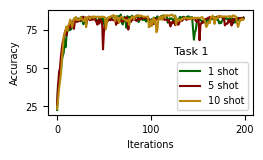

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

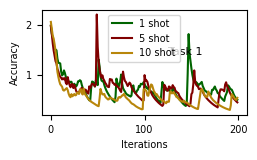

In [12]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

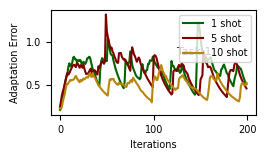

In [13]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation Error', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [14]:
_reg_fit_loss21 = fit_loss
_reg_train_loss21 = train_loss11
_reg_accuracy21 = accuracy11

NameError: name 'fit_loss' is not defined

In [15]:
_reg_fit_loss21 = [0.06650247718348648,
 0.1016139333898371,
 0.1231047763968959,
 0.15163795333920102,
 0.17715524724035553,
 0.17928278626817645,
 0.2251912797942306,
 0.21179232814095236,
 0.2597475250562032,
 0.22134360354958157,
 0.23223557977965384,
 0.2577255259860646,
 0.21553733403032477,
 0.2021576432567654,
 0.2083436922367775,
 0.2681025815281001,
 0.29209049903985224,
 0.31284219816778647,
 0.2742893063660824,
 0.18325832373265064,
 0.17725181669899912,
 0.1869513848514268,
 0.2150132886388085,
 0.25730838716933224,
 0.30338597071893286,
 0.40266277189507627,
 0.32999448071826587,
 0.2619523403770996,
 0.28237672850038065,
 0.2567387015530557,
 0.20371463827111505,
 0.1817843611493255,
 0.17955486386111288,
 0.17815108619856113,
 0.16906758284930026,
 0.17189517639803165,
 0.16736794714674805,
 0.16588573090054773,
 0.16302056700894327,
 0.1590122842427456,
 0.1576044155341206,
 0.15609725745338382,
 0.15463008370363351,
 0.153001070022583,
 0.15148757578748645,
 0.14986471244783112,
 0.1482631117105484,
 0.14666892452673477,
 0.14505929951414917,
 0.14338239417834717,
 0.14175969497724014,
 0.14007229832085696,
 0.13837238401174545,
 0.13669392014994766,
 0.1349179676987908,
 0.1333681157592571,
 0.1317116543650627,
 0.1297233025684501,
 0.1279281075253631,
 0.1262185408762007,
 0.12451708802219594,
 0.12277545621900847,
 0.12106608114007747,
 0.5172599031392372,
 0.5398258230451382,
 0.6575186532555204,
 0.26874116334048187,
 0.2509556557192947,
 0.2572123245759444,
 0.2468501076553807,
 0.2625347330714717,
 0.27247094024311413,
 0.2590309941407406,
 0.2484097182750702,
 0.26674151872143603,
 0.2533700249411843,
 0.2581171321146416,
 0.2668769359588623,
 0.24577867804151593,
 0.2688208574598486,
 0.2404380657456138,
 0.2336116342833548,
 0.2631678238059535,
 0.2629977103435632,
 0.39688625480189466,
 0.3291752049417207,
 0.28057334730119415,
 0.2658624355540131,
 0.2711942466822537,
 0.24363159320571207,
 0.25039596313780005,
 0.25196507347352576,
 0.29696903671279096,
 0.2763538830208056,
 0.285958443627213,
 0.30380016475012805,
 0.30652426770239166,
 0.2803065817464482,
 0.4416183562892856,
 0.3263727336218863,
 0.2530553751822674,
 0.30568283435070154,
 0.3201698462168376,
 0.2791709486733783,
 0.26102595527966815,
 0.25983086770231073,
 0.24716591609246802,
 0.2777108026273323,
 0.2607542181556875,
 0.2934375707850312,
 0.26277208666909824,
 0.24984037785819083,
 0.29164101725274866,
 0.26782013521049963,
 0.2820108663855177,
 0.34208734875375574,
 0.2682698138735511,
 0.26501711480545276,
 0.155794824163119,
 0.3737846165895462,
 0.2999919783888441,
 0.36697687298962567,
 0.2978962045727354,
 0.2846141638177814,
 0.29196103662252426,
 0.3084944940426133,
 0.2955145515275724,
 0.2831908017396927,
 0.2847915750109788,
 0.31077572071191034,
 0.28875136465737317,
 0.3267370584336194,
 0.27683402688214276,
 0.2738035700537942,
 0.26509161745056964,
 0.2599530750603387,
 0.29603148048574274,
 0.2896321630387595,
 0.25897584065343393,
 0.26073261485858396,
 0.30868923957600736,
 0.27279512268124206,
 0.36159864542159165,
 0.4846427088434046,
 0.3855533789504658,
 0.37475307782491046,
 0.3095332695679231,
 0.2782559020049644,
 0.05518431148745797,
 0.5262056498816519,
 0.25963292158011236,
 0.30825950160171045,
 0.2561588467973651,
 0.2550046191071019,
 0.2530238465829329,
 0.25122317220225476,
 0.24974314552364926,
 0.24809759494030115,
 0.246628230268305,
 0.2450337644779321,
 0.24344244147792007,
 0.24163443933833728,
 0.2400965943480983,
 0.23840969078468555,
 0.23675457275275028,
 0.23516334186900745,
 0.23347612222035727,
 0.23185980500596942,
 0.23006992267839838,
 0.22836511062853265,
 0.22735076600855048,
 0.22540120464382749,
 0.2235577034227776,
 0.22164702234846173,
 0.21985315373449615,
 0.21792606332085349,
 0.2160317139192061,
 0.21511826731941916,
 0.2660682797431946,
 0.21591452035036954,
 0.2140566688595396,
 0.21215357744332516,
 0.21010729760834665,
 0.20817131707162567,
 0.2062359650929769,
 0.20428902452642267,
 0.21015081983624082,
 0.20179091619722772,
 0.21191124482588333,
 0.19773394591880566,
 0.1957713130748633,
 0.19368671648430102,
 0.19177621061151678,
 0.18989443959611835,
 0.18785303650480328,
 0.1859270063313571,
 0.18401691407868356,
 0.18185693567449396,
 0.17997744408520785,
 0.17784100951570453]

In [16]:
_reg_train_loss21 = [1.961610496044159,
 1.7683147517117588,
 1.654375060038133,
 1.4931375023090478,
 1.3372462256388231,
 1.1267231928579735,
 1.018619202303164,
 0.816527675950166,
 0.813158472830599,
 0.6908134244608156,
 0.6066188751296564,
 0.6301916092634201,
 0.4697566998727394,
 0.379289116823312,
 0.38407272800351633,
 0.47294934251994797,
 0.5104926269162785,
 0.5590837466897387,
 0.48501920158212836,
 0.2882587866801204,
 0.25364491614428436,
 0.25841221168185724,
 0.2940006149989186,
 0.39704581237200537,
 0.4049646050641031,
 0.6842379958340616,
 0.5197109740340349,
 0.4062624718203689,
 0.3737760330691482,
 0.3452103752078432,
 0.25115649356986536,
 0.20996183224699713,
 0.20218242366205563,
 0.1993767280470241,
 0.17862982935074603,
 0.1802705932747234,
 0.1750387285243381,
 0.17110429230061444,
 0.16704402818824304,
 0.16154050714138782,
 0.15931095363515796,
 0.15747526491230185,
 0.15563277380936075,
 0.1540874561125582,
 0.15239953204537882,
 0.15074863826686685,
 0.14902308131709244,
 0.14727445037075967,
 0.14547564947243893,
 0.14375443869467938,
 0.14207918151761545,
 0.14037737272905582,
 0.13865217476180106,
 0.13697159832174127,
 0.13518381480014685,
 0.13362158541426514,
 0.131976969314344,
 0.129977440292185,
 0.12816913583965012,
 0.1264450859391328,
 0.12473185044346434,
 0.12301712167082411,
 0.12127129519076059,
 0.7645808186269167,
 1.0875360609003992,
 2.774879418539278,
 2.0253046299472,
 1.893085904193647,
 1.7836463505571538,
 1.7185036142667134,
 1.6300843809590195,
 1.608343010598963,
 1.5798705256346501,
 1.5090540719754768,
 1.558331346873081,
 1.472615639368693,
 1.502043883005778,
 1.4378608103954431,
 1.3506727038007793,
 1.3477558285901041,
 1.2823573558619528,
 1.237007263031873,
 1.2110811435815059,
 1.20257459174503,
 1.4631161319487023,
 1.3954308755470044,
 1.3565396801991896,
 1.223959432406859,
 1.1859905710726073,
 1.1075491832964348,
 1.09890196630449,
 1.0815232432249822,
 1.0803332834532766,
 1.0978019671006636,
 1.056686368855563,
 1.0769656977870248,
 1.092511795686953,
 1.0180522600809734,
 1.5865060524507002,
 1.213845709959666,
 0.9771020186669899,
 1.0703883983872153,
 1.096881714734164,
 0.944919559991721,
 0.8838947243762739,
 0.8821501984740748,
 0.8578855282429493,
 0.9302684059648803,
 0.8787927555315422,
 0.9174623787403107,
 0.8379791487346996,
 0.8126994041782437,
 0.8790847063064575,
 0.8295278937527628,
 0.8439354327591982,
 0.9519231987721992,
 0.8451231916745504,
 0.809578104001103,
 1.3722857747114066,
 1.0404335237813718,
 0.8880703088008997,
 0.9431669016679128,
 0.8508761687712236,
 0.819613030462554,
 0.854319489363468,
 0.8745483769611879,
 0.8198213089596141,
 0.7828777242790569,
 0.7705353507489869,
 0.7921596891952284,
 1.0042140375484119,
 0.8787765602270762,
 0.775342704671802,
 0.7442234172062441,
 0.7480429749597203,
 0.7013160369612954,
 0.737443874279658,
 0.7596708120721759,
 0.689293638774843,
 0.6924718365524755,
 0.7514659378564719,
 0.7018108724644689,
 0.8504723197582996,
 1.0314209691502831,
 0.9491972011147123,
 0.8944917926282594,
 0.7868933433836157,
 0.7238336964087053,
 1.5915799104806148,
 2.454959923570806,
 2.203879378058694,
 2.2349058461911753,
 2.1776612093954375,
 2.1770444385933154,
 2.1748490767045454,
 2.1729288173444345,
 2.17171260804841,
 2.1697852864409937,
 2.1685811479886374,
 2.1641835516149346,
 2.165187698422056,
 2.1599934552655076,
 2.1611619645898994,
 2.159272468451298,
 2.1576809630249487,
 2.156139460476962,
 2.1546025185874016,
 2.1531057953834534,
 2.151058402928439,
 2.1490902828447744,
 2.1498706232417715,
 2.1472614732655613,
 2.1431773178505176,
 2.141192472342289,
 2.1416623664624765,
 2.139642242229346,
 2.1378064932245198,
 2.1364085927154077,
 2.1958906849225364,
 2.154698700615854,
 2.154695648135561,
 2.1534170959935044,
 2.15014285029787,
 2.1485318126100483,
 2.1466996453025122,
 2.14460095131036,
 2.157150499748461,
 2.1383717276833276,
 2.149335839531638,
 2.134476961511554,
 2.132639588731708,
 2.129986528194312,
 2.1280425028367476,
 2.126611691532713,
 2.124527183446017,
 2.122605123303153,
 2.120701087243629,
 2.1179867242321824,
 2.116763598991163,
 2.114407272049875]

In [17]:
_reg_accuracy21 = [19.976218787158146,
 28.894173602853744,
 41.02259215219976,
 42.80618311533888,
 49.940546967895365,
 55.529131985731276,
 63.25802615933413,
 62.901307966706305,
 65.51724137931035,
 73.7217598097503,
 69.9167657550535,
 71.70035671819262,
 76.33769322235435,
 77.76456599286564,
 76.21878715814506,
 76.93222354340071,
 76.45659928656362,
 76.57550535077289,
 78.24019024970274,
 81.6884661117717,
 81.45065398335315,
 80.85612366230677,
 77.05112960761,
 80.7372175980975,
 77.64565992865636,
 73.60285374554103,
 77.76456599286564,
 77.28894173602853,
 80.61831153388823,
 80.49940546967895,
 82.40190249702735,
 83.70986920332938,
 82.28299643281808,
 82.1640903686088,
 82.04518430439953,
 82.75862068965517,
 82.04518430439953,
 83.23424494649227,
 82.40190249702735,
 82.40190249702735,
 82.87752675386444,
 82.52080856123662,
 82.52080856123662,
 82.6397146254459,
 82.52080856123662,
 82.52080856123662,
 82.52080856123662,
 82.6397146254459,
 82.52080856123662,
 82.6397146254459,
 82.6397146254459,
 82.52080856123662,
 82.28299643281808,
 82.40190249702735,
 82.52080856123662,
 82.6397146254459,
 82.52080856123662,
 82.52080856123662,
 82.28299643281808,
 81.92627824019024,
 82.6397146254459,
 82.1640903686088,
 82.28299643281808,
 63.13912009512485,
 71.3436385255648,
 24.019024970273485,
 30.083234244946492,
 32.22354340071344,
 37.45541022592152,
 36.1474435196195,
 34.00713436385256,
 36.38525564803805,
 41.26040428061831,
 42.21165279429251,
 40.903686087990486,
 42.21165279429251,
 43.28180737217598,
 45.30321046373365,
 50.65398335315101,
 47.32461355529132,
 53.15101070154578,
 54.69678953626635,
 52.43757431629013,
 53.983353151010704,
 39.357907253269914,
 48.989298454221164,
 50.89179548156956,
 56.00475624256837,
 56.24256837098692,
 58.26397146254459,
 56.123662306777646,
 60.28537455410226,
 59.80975029726516,
 58.501783590963136,
 61.236623067776456,
 56.59928656361475,
 60.52318668252081,
 61.950059453032104,
 55.410225921522,
 61.35552913198573,
 64.92271105826397,
 63.73365041617122,
 59.571938168846614,
 63.495838287752676,
 64.8038049940547,
 65.63614744351962,
 64.09036860879905,
 62.54458977407848,
 65.39833531510106,
 66.11177170035671,
 65.99286563614744,
 67.89536266349585,
 65.2794292508918,
 67.65755053507729,
 67.53864447086801,
 66.46848989298454,
 66.230677764566,
 66.94411414982164,
 59.80975029726516,
 63.97146254458978,
 66.230677764566,
 65.39833531510106,
 66.70630202140309,
 66.70630202140309,
 64.3281807372176,
 65.99286563614744,
 68.25208085612367,
 70.39239001189061,
 67.53864447086801,
 67.30083234244947,
 61.71224732461356,
 67.65755053507729,
 68.84661117717003,
 69.67895362663496,
 68.84661117717003,
 71.58145065398335,
 68.13317479191439,
 69.67895362663496,
 69.67895362663496,
 68.72770511296076,
 69.20332936979786,
 67.53864447086801,
 65.2794292508918,
 63.3769322235434,
 67.18192627824018,
 67.41973840665874,
 67.77645659928656,
 69.79785969084423,
 64.09036860879905,
 12.485136741973841,
 12.72294887039239,
 13.198573127229489,
 13.436385255648037,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.198573127229489,
 13.436385255648037,
 13.198573127229489,
 12.72294887039239,
 12.72294887039239,
 12.72294887039239,
 12.72294887039239,
 12.72294887039239,
 12.72294887039239,
 14.030915576694412,
 12.841854934601665,
 13.198573127229489,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 12.841854934601665,
 14.149821640903687,
 12.841854934601665,
 12.841854934601665]

In [18]:
_reg_fit_loss22 = fit_loss
_reg_train_loss22 = train_loss11
_reg_accuracy22 = accuracy11

NameError: name 'fit_loss' is not defined

In [19]:
_reg_fit_loss22 = [0.06954316554530975,
 0.07823158848670221,
 0.09840450748320549,
 0.12543600989926246,
 0.1280013515103248,
 0.15849653943892447,
 0.16858532736378332,
 0.15310144616711524,
 0.14955757029594913,
 0.14061922988583964,
 0.14480758674683109,
 0.15678983061544358,
 0.18063751920577018,
 0.2876923805282962,
 0.2536223703815091,
 0.1727330377024989,
 0.15204803693679073,
 0.14969172208539902,
 0.16706207394599915,
 0.1904774865796489,
 0.20587534673752322,
 0.2160856108511648,
 0.14518397950357007,
 0.14044796362999948,
 0.18095650740208163,
 0.17042035297040017,
 0.16656199434111196,
 0.18600723435801844,
 0.1697614659224787,
 0.19812971449667408,
 0.1711879252426086,
 0.1814505039684234,
 0.18929794142323156,
 0.18542392071216338,
 0.1594369695071251,
 0.16470683293957863,
 0.1731515868056205,
 0.23538380765145825,
 0.2123823699451262,
 0.2190588799215132,
 0.18495980770357193,
 0.16386645840060327,
 0.14973602131489785,
 0.1429971307516098,
 0.13983507454395294,
 0.1538837354990744,
 0.15267623047674855,
 0.20203421721535345,
 0.1984397990088309,
 0.1798905187076138,
 0.3742416722159232,
 0.6570084268046964,
 0.22181418249683996,
 0.248318572198191,
 0.24380870019235917,
 0.20739213497407974,
 0.2074085320195844,
 0.19188731235842552,
 0.18620053798921646,
 0.20995781786980167,
 0.19097240990208042,
 0.189977724705973,
 0.20898873190726003,
 0.1919472256014424,
 0.18748332511994145,
 0.18638936310045182,
 0.17704491509545234,
 0.1821184355405069,
 0.20445582126417466,
 0.194601260846661,
 0.19668695378688075,
 0.2019299465802408,
 0.19768864925830595,
 0.2383126957762626,
 0.2557818533912782,
 0.20766683740000572,
 0.2196874479132314,
 0.21502141462218377,
 0.19312328869296658,
 0.23087705046899856,
 0.2269962478068567,
 0.22298824787139893,
 0.18437617200036202,
 0.18297062093211758,
 0.18741399578509793,
 0.1905018216179263,
 0.19338153879488668,
 0.1811492649778243,
 0.17788949031983653,
 0.17380759216124012,
 0.1719079238753165,
 0.1740681702090848,
 0.17721906833110318,
 0.17913802400712045,
 0.18480560664207704,
 0.293512009324566,
 0.2771207421056686,
 0.2990916602073177,
 0.31983559891100855,
 0.2689750963641751,
 0.23426182183527178,
 0.20474116263851042,
 0.2056342214345932,
 0.20597809120532004,
 0.19786154502822506,
 0.1839300360410444,
 0.18033464156812237,
 0.17906018947401353,
 0.2832059350705916,
 0.219976163198871,
 0.20009775123288553,
 0.20759322998985166,
 0.21086300332700053,
 0.19475159529716737,
 0.1830479363279958,
 0.18085381100254674,
 0.17971939954065508,
 0.1786891399852691,
 0.17693171578068886,
 0.17700467234657657,
 0.17637943308199605,
 0.17549392148371665,
 0.1745064402780225,
 0.17494122491728875,
 0.17477866382368148,
 0.1725339586696317,
 0.1719666753084429,
 0.17300494159421614,
 0.19981075534897466,
 0.40133634690315495,
 0.36856767727482703,
 0.2962666793215659,
 0.27328937668954173,
 0.24182376217457555,
 0.21723664287597902,
 0.1980894866489595,
 0.19333359454908677,
 0.1865927629893826,
 0.18828240325373988,
 0.18222651558537636,
 0.18391635629438585,
 0.17983109816428153,
 0.18005472950397,
 0.1781974506954993,
 0.180509251932944,
 0.19732059826773982,
 0.18393994146777737,
 0.18623935166866548,
 0.24214770140186434,
 0.3152833580970764,
 0.28083061498980366,
 0.3051911924154528,
 0.3188767630246378,
 0.22563950380971354,
 0.19982144380769423,
 0.1918979388090872,
 0.19079552398573968,
 0.20084184552392653,
 0.21914576666970406,
 0.27514007495295617,
 0.22278999705468455,
 0.2292280331734688,
 0.279244888213373,
 0.32453611493110657,
 0.27366456341358925,
 0.2512661531086891,
 0.23292471228107328,
 0.2438545246278086,
 0.21292893492406414,
 0.2021935312978683,
 0.19949461808127741,
 0.19125810217472813,
 0.19074204612162807,
 0.19120838997825498,
 0.19670211259395845,
 0.20144775125288195,
 0.2164526552923264,
 0.20377926816863398,
 0.22520744704431103,
 0.22042495829443778,
 0.203023053465351,
 0.22073490821546124,
 0.3036302852053796,
 0.2908884286880493,
 0.28162160611921744,
 0.2350741442172758,
 0.20679991187587862,
 0.22205888311709127,
 0.25732459848926914,
 0.1969732286468629,
 0.19161098186046846,
 0.27042806052392526,
 0.3747170375239465,
 0.3553688256971298,
 0.2829099489796546,
 0.2547162742384018,
 0.24607497597894362,
 0.21336180981128447,
 0.2072248545385176,
 0.2169417291879654]

In [20]:
_reg_train_loss22 = [1.8880330516446022,
 1.726604788534103,
 1.54574058517333,
 1.3819825380079207,
 1.1429033144827812,
 1.0285271848401716,
 0.960962301300418,
 0.9051697331090127,
 0.8759264349937439,
 0.7333575890910241,
 0.7429607818203587,
 0.6984567738348438,
 0.7472001814073131,
 1.3075357502506626,
 1.0474972417277675,
 0.7206239258089373,
 0.6161272554628311,
 0.6001964951715162,
 0.5955977459107676,
 0.6370719776999566,
 0.6695279690527147,
 0.6587201260751293,
 0.5526921518387333,
 0.5246271212254802,
 0.5908027175934084,
 0.5670272034983481,
 0.5453250494695479,
 0.539021143028813,
 0.5397067608371857,
 0.5580396267675585,
 0.5421263066030317,
 0.5341674637409949,
 0.5579798346565615,
 0.5431222694535409,
 0.5025837661758545,
 0.5132077999653355,
 0.5220207081687066,
 0.6397940468403601,
 0.5677626623261359,
 0.6201655441714872,
 0.5367860976726778,
 0.4888288734420653,
 0.4353821585255285,
 0.4208634611098997,
 0.42507329679304556,
 0.46698815111191044,
 0.4407868750633732,
 0.49668725075260284,
 0.5398219775769019,
 0.48536833543931285,
 0.903409888667445,
 4.345275246327923,
 1.5877623327316777,
 1.358059621626331,
 1.1801172975570924,
 0.9816391852594191,
 0.8998501723812472,
 0.7867552349644322,
 0.7286973845574164,
 0.7073878261350817,
 0.6603975699793908,
 0.6037865242650432,
 0.5988900574945635,
 0.5552401802232189,
 0.5203919593364962,
 0.4999180455361643,
 0.46686691238034156,
 0.4670141387370325,
 0.49343825347961917,
 0.4790052310112984,
 0.4793288361641668,
 0.4881801038019119,
 0.47426121946304073,
 0.5221649475636021,
 0.567998553476026,
 0.48350422709218915,
 0.4867830209193691,
 0.48988356224952206,
 0.44536072880991046,
 0.4916255618295362,
 0.49028309795164293,
 0.48019557037661154,
 0.42432933517040744,
 0.41322228120219323,
 0.415435996747786,
 0.414353528330403,
 0.4196185214865592,
 0.4056278082632249,
 0.4011366492317569,
 0.3878108282243052,
 0.37966062849567783,
 0.37714688143422526,
 0.3849773209902548,
 0.3788108864138203,
 0.3956105699462275,
 0.5618639530674103,
 0.5740697556926359,
 0.6167910896962688,
 0.6792128547545402,
 0.611894279718399,
 0.5233171687972161,
 0.45056495166593985,
 0.44023959771279364,
 0.42598226954860074,
 0.41833316318450436,
 0.3844957024820389,
 0.38160103655630545,
 0.38052174064420885,
 0.5271813369566395,
 0.4452148474031879,
 0.41601614029176776,
 0.4093013396186213,
 0.4243698062435273,
 0.38616551987586484,
 0.3721386924866707,
 0.3669008516496228,
 0.3663123067348234,
 0.35757662692377645,
 0.3533860377727016,
 0.35393933903786445,
 0.3520446150533615,
 0.34918173378513706,
 0.3505568884072765,
 0.34715024694319696,
 0.3496113333009904,
 0.34376488818276313,
 0.34323614018578685,
 0.34239940393355583,
 0.3961692827363168,
 0.7069576796024076,
 0.7601510382467701,
 0.6259483550825427,
 0.5635580651221737,
 0.4849487821901998,
 0.43017171563640716,
 0.40027161759714924,
 0.3860469998851899,
 0.3732402911109309,
 0.3678139207824584,
 0.3616872151051798,
 0.35606648652784284,
 0.3461468436064259,
 0.33959696802400774,
 0.3365742698792488,
 0.3387702141077288,
 0.378618921003034,
 0.35371651572565876,
 0.34305850536592547,
 0.41980284260165307,
 0.5382781749771487,
 0.5133121244369014,
 0.592186838388443,
 0.6075794735262471,
 0.44918305931552766,
 0.3849473701369378,
 0.36480091464134956,
 0.36153012610250906,
 0.3669381170503555,
 0.43226810568763363,
 0.47290930440348966,
 0.4089006608532321,
 0.42665333036453496,
 0.5022886068590225,
 0.5806791157491745,
 0.5371987021738484,
 0.46188021571405474,
 0.41901564117400875,
 0.4382403742882513,
 0.39118133341112443,
 0.3659501450677072,
 0.3588477517327955,
 0.3424129673550206,
 0.3436083067809382,
 0.34603385675338005,
 0.3519716993454964,
 0.3756877674210456,
 0.36848013487554365,
 0.36493690696454817,
 0.3911336722873872,
 0.4007748490379703,
 0.37101091156082766,
 0.3869829648925412,
 0.501048497615322,
 0.5401185654824779,
 0.47933777397678745,
 0.4089079773233783,
 0.3505233463741118,
 0.3662431903423802,
 0.4108211326022302,
 0.34801750125423553,
 0.32162063977410715,
 0.653984141445929,
 0.6510774445149207,
 0.65630076873687,
 0.505369690156752,
 0.45575001451276964,
 0.41902159010210344,
 0.3508536781995527,
 0.33197414346279636,
 0.3381157959661176]

In [21]:
_reg_accuracy22 = [22.11652794292509,
 31.747919143876338,
 41.14149821640904,
 46.37336504161712,
 56.59928656361475,
 56.837098692033294,
 57.78834720570749,
 58.14506539833531,
 62.06896551724138,
 60.28537455410226,
 64.8038049940547,
 62.78240190249703,
 64.56599286563615,
 64.20927467300832,
 62.06896551724138,
 66.70630202140309,
 67.89536266349585,
 66.94411414982164,
 68.13317479191439,
 65.51724137931035,
 63.020214030915575,
 66.34958382877527,
 67.41973840665874,
 68.72770511296076,
 67.89536266349585,
 69.08442330558859,
 68.84661117717003,
 69.08442330558859,
 69.56004756242568,
 69.56004756242568,
 68.96551724137932,
 68.48989298454221,
 66.94411414982164,
 68.96551724137932,
 69.56004756242568,
 68.96551724137932,
 69.32223543400714,
 69.9167657550535,
 67.53864447086801,
 68.25208085612367,
 69.20332936979786,
 70.98692033293698,
 70.98692033293698,
 72.88941736028538,
 71.58145065398335,
 71.22473246135553,
 70.27348394768133,
 69.9167657550535,
 72.294887039239,
 67.89536266349585,
 57.66944114149822,
 33.17479191438763,
 44.946492271105825,
 50.89179548156956,
 57.07491082045184,
 60.87990487514863,
 64.20927467300832,
 66.11177170035671,
 66.11177170035671,
 67.77645659928656,
 68.48989298454221,
 68.84661117717003,
 68.96551724137932,
 70.15457788347206,
 66.70630202140309,
 71.3436385255648,
 72.65160523186682,
 71.58145065398335,
 72.05707491082045,
 73.60285374554103,
 70.98692033293698,
 73.36504161712247,
 70.98692033293698,
 70.51129607609988,
 72.17598097502973,
 72.05707491082045,
 73.00832342449465,
 72.17598097502973,
 72.7705112960761,
 70.63020214030915,
 71.93816884661118,
 73.95957193816885,
 72.88941736028538,
 72.7705112960761,
 72.7705112960761,
 73.36504161712247,
 72.88941736028538,
 73.84066587395957,
 73.7217598097503,
 73.12722948870392,
 74.31629013079667,
 73.7217598097503,
 73.84066587395957,
 74.79191438763377,
 73.36504161712247,
 71.93816884661118,
 71.3436385255648,
 71.58145065398335,
 70.15457788347206,
 71.22473246135553,
 72.294887039239,
 72.65160523186682,
 73.36504161712247,
 74.19738406658739,
 74.43519619500594,
 74.79191438763377,
 74.43519619500594,
 74.19738406658739,
 72.7705112960761,
 73.84066587395957,
 73.2461355529132,
 73.95957193816885,
 73.95957193816885,
 75.02972651605232,
 74.91082045184304,
 74.6730083234245,
 75.02972651605232,
 74.79191438763377,
 75.14863258026159,
 75.26753864447087,
 74.91082045184304,
 75.14863258026159,
 75.26753864447087,
 75.26753864447087,
 75.50535077288941,
 75.38644470868014,
 75.6242568370987,
 74.79191438763377,
 74.79191438763377,
 61.59334126040428,
 69.67895362663496,
 69.44114149821641,
 72.05707491082045,
 72.7705112960761,
 72.88941736028538,
 72.53269916765755,
 74.43519619500594,
 73.7217598097503,
 74.6730083234245,
 75.14863258026159,
 75.74316290130797,
 75.86206896551724,
 76.09988109393579,
 75.74316290130797,
 76.09988109393579,
 74.31629013079667,
 75.38644470868014,
 76.45659928656362,
 73.2461355529132,
 72.7705112960761,
 73.7217598097503,
 69.67895362663496,
 74.19738406658739,
 75.02972651605232,
 76.33769322235435,
 76.21878715814506,
 75.74316290130797,
 75.50535077288941,
 73.36504161712247,
 73.60285374554103,
 73.36504161712247,
 74.79191438763377,
 72.294887039239,
 71.3436385255648,
 72.7705112960761,
 73.95957193816885,
 75.98097502972652,
 74.79191438763377,
 76.93222354340071,
 76.57550535077289,
 76.33769322235435,
 76.45659928656362,
 76.45659928656362,
 76.69441141498217,
 74.6730083234245,
 76.69441141498217,
 78.359096313912,
 75.74316290130797,
 74.55410225921521,
 77.17003567181926,
 76.57550535077289,
 76.33769322235435,
 74.6730083234245,
 73.95957193816885,
 77.17003567181926,
 77.52675386444709,
 77.40784780023782,
 75.86206896551724,
 76.81331747919144,
 78.00237812128418,
 77.88347205707491,
 70.27348394768133,
 70.74910820451844,
 71.8192627824019,
 74.19738406658739,
 76.93222354340071,
 76.93222354340071,
 77.88347205707491,
 78.00237812128418,
 78.59690844233056]

In [22]:
_reg_fit_loss23 = fit_loss
_reg_train_loss23 = train_loss11
_reg_accuracy23 = accuracy11

NameError: name 'fit_loss' is not defined

In [23]:
_reg_fit_loss23 = [0.11799288343410103,
 0.1482724164213453,
 0.19220458913822563,
 0.22137230832357796,
 0.22850704193115234,
 0.2933362570344185,
 0.2829259744256127,
 0.3018931800461545,
 0.29147053190640043,
 0.3095261801262291,
 0.3203762719521717,
 0.3389974856102953,
 0.3604092620009062,
 0.29670735950372656,
 0.2966898976235974,
 0.2700669319958103,
 0.30832991999935133,
 0.3860633434081564,
 0.43371835624685096,
 0.3411053495899755,
 0.36000085074682625,
 0.45783801665719676,
 0.27527639809615756,
 0.25289189032450016,
 0.2526167540677956,
 0.3648564001279218,
 0.4109248320515059,
 0.39132024720311165,
 0.3325404168999925,
 0.3273809529384788,
 0.5036354036811663,
 0.42286568606386377,
 0.39288463116604455,
 0.2969127777127587,
 0.2874321125599803,
 0.3527072308471008,
 0.7588667668098089,
 0.3770713815275504,
 0.37339447636385353,
 0.3293826878831095,
 0.3038187746946909,
 0.34083639761927176,
 0.5910037026113394,
 0.45191693435214003,
 0.31453161352142994,
 0.2776287350119377,
 0.2621099714721952,
 0.30200222910058744,
 0.3778459812913622,
 0.39119335423622814,
 0.5924800047460868,
 0.3176221274295632,
 0.3437539389242931,
 0.6304903168763433,
 0.4678165895902381,
 0.33237194315511354,
 0.2986350170507723,
 0.29754046183459615,
 0.45189244756285024,
 0.35383751623484555,
 0.3633023785541252,
 0.3859847232851447,
 0.6629894889739095,
 0.3396573563923641,
 0.3406109329389066,
 0.37254084737933413,
 0.3704819248951211,
 0.36336176264650966,
 0.3659454716407523,
 0.31562740401345857,
 0.3781798252341699,
 0.3625708038405496,
 0.4835656833435808,
 0.38344832562974523,
 0.33608121075192277,
 0.38654609898827513,
 0.8688087291559394,
 0.5094810602616291,
 0.386731391354483,
 0.39409402028030277,
 0.36177897939876635,
 0.32909607050978407,
 0.3188110106453604,
 0.307459114917687,
 0.3270149516816042,
 0.31380774476090256,
 0.38803709617682863,
 0.42013780651043875,
 0.32368158701123023,
 0.4198157192797077,
 0.4044773884269656,
 0.38926786229926713,
 0.567491427292021,
 0.4516194090247154,
 0.4880743671436699,
 0.392516982646621,
 0.33852374173548755,
 0.36518770243440357,
 0.3053380378655025,
 0.3926737566991728,
 0.5557126176296449,
 0.703339663695316,
 0.48479160301539365,
 0.3583249851148956,
 0.3706327235820342,
 0.4345263108915212,
 0.3938248523948144,
 0.3308673941967439,
 0.4998498198633291,
 0.5468792672059974,
 0.39613468306405203,
 0.37361341638832674,
 0.3640546660338129,
 0.5101818264443048,
 0.5640881993636793,
 0.463608164872442,
 0.3487286614824314,
 0.334244076694761,
 0.3410227371721852,
 0.3503440689979767,
 0.47014015517672714,
 0.6663382547546406,
 0.4387396570979332,
 0.36067256103364786,
 0.335669251729031,
 0.3638048398555542,
 0.3860432510169185,
 0.47644606977701187,
 0.3200200473775669,
 0.3614433497494581,
 0.49021859314976907,
 0.5424952402102704,
 0.5838371910610978,
 0.45967355978732205,
 0.5791538607861314,
 0.5826605767467801,
 0.46165937048440076,
 0.4684903191364541,
 0.4872615075841242,
 0.4005650620983571,
 0.3593730081100853,
 0.32739771187913663,
 1.6058944675083062,
 0.5647786005723233,
 0.4766934270761451,
 0.35019673118177724,
 0.35358243846163456,
 0.3607898322599275,
 0.3945691276873861,
 0.3496347726607809,
 0.3222290747323815,
 1.1139235616642602,
 0.48069048231961775,
 0.34558771945992295,
 0.33035700296869086,
 0.383164893607704,
 0.3338506519794464,
 0.47087093944452246,
 0.39841912048203604,
 0.45444184967449736,
 0.4044657556378112,
 0.3675082769929146,
 0.3666563739581984,
 0.4397643357515335,
 0.5225844127791268,
 0.5644345403629907,
 0.40616041345863924,
 0.3853981055471362,
 0.4974711099449469,
 0.525425519870252,
 0.4208780952862331,
 0.41364517078107715,
 0.4587974343068746,
 0.4217303033385958,
 0.4744463269503749,
 0.602796017971574,
 0.3857690810549016,
 0.42185051404699986,
 0.5165737586057916,
 0.395507601298848,
 0.39359793188620584,
 0.36486754520815246,
 0.37153193065706563,
 0.37726182961950494,
 0.5271201375491765,
 0.4179889460911556,
 0.7054943969967414,
 0.6592366359367663,
 0.4207726910102124,
 0.8294983725158536,
 0.47561224504392974,
 0.8398863661045931,
 0.3470985092678849,
 0.6241187094425669,
 0.33618729394309377,
 0.3338859354963108,
 0.3314201266181712,
 0.3290032367317044,
 0.32633903075237664,
 0.3238454436769291]

In [24]:
_reg_train_loss23 = [1.8879158715812527,
 1.7552418015441116,
 1.556108119232314,
 1.3393699107121448,
 1.0965070660625185,
 1.1482310819686676,
 0.9879990695994727,
 0.9011012023809005,
 0.8464897360880764,
 0.760319536285741,
 0.7610280999571694,
 0.708653528395356,
 0.7728796634747057,
 0.6056479816229976,
 0.5710022378028655,
 0.5168214234314403,
 0.5348159177418874,
 0.7262314656863407,
 0.8150310316408167,
 0.5875072690601252,
 0.5748512005927612,
 0.7541861086323554,
 0.48029678900327,
 0.4175498147248005,
 0.38889484084686454,
 0.5373442594190033,
 0.6647344766830912,
 0.6218734113689588,
 0.5217071538981126,
 0.5017866511278006,
 0.8009223135910473,
 0.6288689970209891,
 0.5942180137701181,
 0.46183317185056455,
 0.41607869294833166,
 0.46980786065057834,
 1.1072914655111274,
 0.604222505676503,
 0.560647081507712,
 0.5038731235022448,
 0.4379245432055726,
 0.4774400708930833,
 0.781613646417248,
 0.7139444772382172,
 0.47718660959175657,
 0.4013983350323171,
 0.3711655462274746,
 0.4329417808627596,
 0.5403489745697196,
 0.5884080111068122,
 0.8558911574738366,
 0.6920204795136744,
 0.5010724463024918,
 0.9377418177164331,
 0.7423689632999654,
 0.5012567640871418,
 0.43340151133585947,
 0.4291531113641603,
 0.589760288292048,
 0.4812151418656719,
 0.4968679264491918,
 0.5517963963199635,
 0.8783803801147305,
 0.5306698967303548,
 0.5043436107890946,
 0.5513269077150189,
 0.5271964327109103,
 0.540002948471478,
 0.5026634002522546,
 0.47379180880225436,
 0.5478097423911095,
 0.5273300813777106,
 0.6882570864898818,
 0.5901661116857918,
 0.4785031936302477,
 0.5556758617868229,
 1.355737745457766,
 0.927134307823619,
 0.7146986414279256,
 0.690501659348303,
 0.609793230283017,
 0.5484180952213249,
 0.5080850081784385,
 0.4919357941466935,
 0.49238918812907473,
 0.4824318301920988,
 0.5850875567720861,
 0.6507996615706658,
 0.5014248549634096,
 0.6356362628997588,
 0.6269168668255514,
 0.5667956625016368,
 0.8184215764001924,
 0.8762399797536888,
 0.7757032463441089,
 0.6516134472829955,
 0.5405435858636486,
 0.5675874250579853,
 0.4904254688596239,
 0.639072870417517,
 0.896808353613834,
 1.040716794224418,
 1.1437248011328736,
 0.6774686232817416,
 0.7132859482448928,
 0.7498355232635323,
 0.6743640247352269,
 0.5811943737219791,
 0.7879846853261091,
 1.0039065544094359,
 0.66813006343282,
 0.6421117560595883,
 0.6262764135489658,
 0.8152404436651541,
 0.8474912765074749,
 0.7822312889050465,
 0.6005120464429563,
 0.547569999281241,
 0.5435365225587573,
 0.6024631427562966,
 0.6678881494670498,
 1.0680439114874722,
 0.7732114518175319,
 0.5739647727839801,
 0.5395270067514205,
 0.5610777354057954,
 0.612866822402088,
 0.7364780539456679,
 0.525306793499966,
 0.5662812322986369,
 0.7142729502247305,
 0.8392427247397753,
 0.9134139658845201,
 0.7422466507675697,
 0.8796761922386228,
 0.9177730246161928,
 0.8377240852129703,
 0.770963404099552,
 0.8594630061059582,
 0.7011865801653083,
 0.5939138178922692,
 0.537597160710364,
 2.3060423965965,
 1.6839773636691424,
 1.2259170823559469,
 0.7490842696659419,
 0.6632994749412244,
 0.639175781333933,
 0.6752100796723852,
 0.6214391844613212,
 0.5838487943520352,
 1.9864569113266712,
 2.4472961742050794,
 2.2944204199070835,
 2.278277757216473,
 2.546874083426534,
 2.213153053911365,
 2.3026008143716927,
 2.2169125080108643,
 2.234413032629052,
 2.237814406351167,
 2.1768998667901878,
 2.1428927055427005,
 1.8842385605889924,
 1.813067730896327,
 1.7129312145466706,
 1.63862635864287,
 1.4180262578385217,
 1.4706618259755933,
 1.7505853787368657,
 1.324406121458326,
 1.139535319744324,
 1.1268388746040208,
 1.089065364885087,
 1.1529560934524148,
 1.4132946544155782,
 1.0872053104091663,
 1.0137392825313978,
 1.1362732849559005,
 0.9640076154348801,
 0.890762697221065,
 0.796750616814409,
 0.7624713477431512,
 0.8123403518479697,
 1.0088119934103927,
 0.9055094300788276,
 1.3799902155083053,
 1.3790486631344776,
 1.0351270136176323,
 1.655346628050415,
 2.4300308300524343,
 3.178283299718584,
 2.2958162755382303,
 2.57538573352658,
 2.2847934499078866,
 2.2811479446839313,
 2.278937831216929,
 2.276331281175419,
 2.2732539882465286,
 2.271918306545335]

In [25]:
_reg_accuracy23 = [26.872770511296075,
 40.07134363852556,
 43.75743162901308,
 49.464922711058264,
 60.99881093935791,
 58.501783590963136,
 64.20927467300832,
 66.58739595719382,
 65.75505350772889,
 66.94411414982164,
 66.230677764566,
 71.70035671819262,
 70.15457788347206,
 68.01426872770512,
 75.14863258026159,
 75.14863258026159,
 63.13912009512485,
 59.571938168846614,
 72.17598097502973,
 73.60285374554103,
 71.8192627824019,
 74.43519619500594,
 77.28894173602853,
 77.28894173602853,
 77.64565992865636,
 75.98097502972652,
 75.26753864447087,
 74.31629013079667,
 77.40784780023782,
 68.25208085612367,
 75.14863258026159,
 72.53269916765755,
 72.53269916765755,
 75.14863258026159,
 79.3103448275862,
 69.44114149821641,
 72.17598097502973,
 75.86206896551724,
 72.53269916765755,
 77.40784780023782,
 76.33769322235435,
 76.21878715814506,
 71.22473246135553,
 76.57550535077289,
 77.28894173602853,
 78.24019024970274,
 79.19143876337694,
 74.19738406658739,
 76.81331747919144,
 71.58145065398335,
 73.48394768133174,
 75.50535077288941,
 77.88347205707491,
 72.17598097502973,
 77.17003567181926,
 76.45659928656362,
 76.57550535077289,
 77.88347205707491,
 76.57550535077289,
 78.24019024970274,
 75.38644470868014,
 78.12128418549347,
 74.19738406658739,
 76.81331747919144,
 74.6730083234245,
 77.88347205707491,
 76.21878715814506,
 75.14863258026159,
 76.09988109393579,
 77.05112960761,
 77.17003567181926,
 77.17003567181926,
 76.09988109393579,
 76.81331747919144,
 78.59690844233056,
 75.02972651605232,
 49.70273483947681,
 66.58739595719382,
 76.33769322235435,
 72.41379310344827,
 74.43519619500594,
 71.70035671819262,
 75.74316290130797,
 75.14863258026159,
 76.21878715814506,
 72.65160523186682,
 74.79191438763377,
 73.48394768133174,
 75.38644470868014,
 72.88941736028538,
 74.31629013079667,
 75.98097502972652,
 59.45303210463734,
 72.65160523186682,
 73.00832342449465,
 72.294887039239,
 73.60285374554103,
 74.91082045184304,
 74.79191438763377,
 72.53269916765755,
 70.03567181926279,
 62.54458977407848,
 68.25208085612367,
 71.3436385255648,
 68.01426872770512,
 69.79785969084423,
 72.294887039239,
 68.84661117717003,
 65.16052318668252,
 70.63020214030915,
 71.10582639714626,
 73.60285374554103,
 73.84066587395957,
 69.08442330558859,
 71.3436385255648,
 69.79785969084423,
 75.02972651605232,
 74.43519619500594,
 74.55410225921521,
 76.57550535077289,
 73.00832342449465,
 70.51129607609988,
 74.79191438763377,
 72.294887039239,
 74.19738406658739,
 73.48394768133174,
 74.19738406658739,
 75.14863258026159,
 73.12722948870392,
 73.12722948870392,
 69.44114149821641,
 70.8680142687277,
 73.84066587395957,
 73.84066587395957,
 72.7705112960761,
 71.22473246135553,
 71.93816884661118,
 72.53269916765755,
 70.51129607609988,
 73.7217598097503,
 73.95957193816885,
 75.38644470868014,
 37.33650416171225,
 51.96195005945303,
 69.79785969084423,
 71.3436385255648,
 73.2461355529132,
 73.95957193816885,
 73.2461355529132,
 72.17598097502973,
 66.94411414982164,
 14.50653983353151,
 12.366230677764566,
 13.555291319857313,
 13.555291319857313,
 15.219976218787158,
 15.219976218787158,
 18.430439952437574,
 21.64090368608799,
 18.3115338882283,
 19.14387633769322,
 20.57074910820452,
 21.87871581450654,
 38.16884661117717,
 45.65992865636147,
 45.0653983353151,
 50.059453032104635,
 53.74554102259215,
 46.730083234244944,
 44.946492271105825,
 59.92865636147444,
 63.020214030915575,
 62.30677764565993,
 60.52318668252081,
 61.59334126040428,
 58.02615933412604,
 61.71224732461356,
 57.907253269916765,
 60.40428061831153,
 59.571938168846614,
 65.04161712247324,
 67.06302021403091,
 65.39833531510106,
 62.901307966706305,
 64.92271105826397,
 63.25802615933413,
 55.29131985731272,
 59.33412604042806,
 58.73959571938169,
 15.101070154577883,
 12.247324613555291,
 12.247324613555291,
 13.555291319857313,
 12.247324613555291,
 14.149821640903687,
 13.555291319857313,
 12.247324613555291,
 16.171224732461354,
 12.247324613555291,
 12.247324613555291]

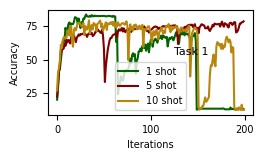

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

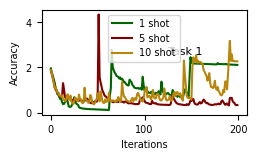

In [27]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

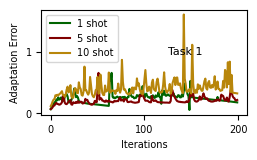

In [28]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation Error', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [29]:
_reg_fit_loss31 = fit_loss
_reg_train_loss31 = train_loss11
_reg_accuracy31 = accuracy11

NameError: name 'fit_loss' is not defined

In [30]:
_reg_fit_loss31 = [0.18125705086455055,
 0.17857640616747797,
 0.19981060222703584,
 0.21749893378238289,
 0.22413349638179858,
 0.2454043115888323,
 0.2625725804543009,
 0.26773854481930637,
 0.2761905990084823,
 0.2815705382702302,
 0.29426710885398244,
 0.3055914083913881,
 0.29460800058987674,
 0.2975465892529001,
 0.31504288954394205,
 0.30499570771139495,
 0.3065651612622397,
 0.2996053221274395,
 0.2963526461805616,
 0.3077586612531117,
 0.3349757754072851,
 0.32529854804885633,
 0.3255732193285105,
 0.31906904614701564,
 0.29883856250315294,
 0.2986328632247691,
 0.29060669334567324,
 0.28627968442683316,
 0.2820508893655271,
 0.27856709032642596,
 0.2731602854874669,
 0.27005949069042595,
 0.2677384715299217,
 0.32067992462187395,
 0.38938295111364246,
 0.30997502864623555,
 0.29360527469187364,
 0.28756901986744937,
 0.2863582500389644,
 0.2946782507458512,
 0.2940566107934835,
 0.27966830316854985,
 0.27527993552538815,
 0.2734174320892412,
 0.2780117660152669,
 0.2695497687982053,
 0.26704548755470586,
 0.28060227510880453,
 0.388191499880382,
 0.328120441461096,
 0.32128869270791816,
 0.2985286779549657,
 0.2848940856602727,
 0.2806735604393239,
 0.27630017910684856,
 0.2718867318970816,
 0.2678003226007734,
 0.2637974066393716,
 0.2598899846174279,
 0.2560401595368677,
 0.2523173349244254,
 0.24869441590747055,
 0.24505793227224934,
 0.2415317950808272,
 0.23805907399070506,
 0.2351158586691837,
 0.23465525465352194,
 0.23097767544036008,
 0.3222835063934326,
 0.3431142836200948,
 0.3479034706037872,
 0.31441979688041066,
 0.30528050843550236,
 0.28118632095200674,
 0.2714095504916444,
 0.2664928326801378,
 0.26204017838653254,
 0.2577692148636799,
 0.25363778277319304,
 0.2495878810177044,
 0.24561783306452692,
 0.24173404306781535,
 0.23801897435772176,
 0.234508321297412,
 0.23099787168356836,
 0.22779660109354524,
 0.2246618395557209,
 0.22156727891795489,
 0.21878438549382345,
 0.21626299528443083,
 0.21472408789761213,
 0.32341762282410447,
 0.34670075348445345,
 0.31445362129989934,
 0.2770857446047725,
 0.2848460306318439,
 0.28543756506880935,
 0.27112447485631824,
 0.272116729799582,
 0.2641032684822472,
 0.2551739751076212,
 0.2505593166059377,
 0.24635062138645017,
 0.24232471597437955,
 0.23840218326266932,
 0.23457970759090113,
 0.2309265106308217,
 0.22736693188852194,
 0.22398284351339146,
 0.22077695021823962,
 0.21774156269978504,
 0.2149410862095502,
 0.21227595757464973,
 0.20973903974708247,
 0.207287639987712,
 0.20497096253901112,
 0.20305517559148828,
 0.2061617146341168,
 0.38519699324150475,
 0.32550388148852755,
 0.32408684005542676,
 0.2800641266667113,
 0.27428150359465153,
 0.2610569973381198,
 0.25254301027375825,
 0.2482608800031701,
 0.244299694591639,
 0.24042143170930902,
 0.23666454304237755,
 0.23299310675689153,
 0.2294440032268057,
 0.2260536551475525,
 0.22279103465226233,
 0.21967244665233457,
 0.21671734780681376,
 0.2139094037060835,
 0.21120346139888374,
 0.2087845933072421,
 0.20630135219924303,
 0.2041306766320248,
 0.20777252590169712,
 0.32704554437374583,
 0.3302729911341959,
 0.28106908256910285,
 0.26827676867952155,
 0.29713267513683866,
 0.26428943933272847,
 0.24946442337668673,
 0.24476819987199744,
 0.2406473387869037,
 0.2367738080876214,
 0.2330088831332265,
 0.22941082138188032,
 0.225896594779832,
 0.22255281343752023,
 0.2192884017618335,
 0.21620761618322257,
 0.21332341979961006,
 0.21052572374441186,
 0.20791440259437172,
 0.2054607117054414,
 0.20328035190397378,
 0.2010274368281267,
 0.19891969373031537,
 0.19707598461180317,
 0.1955999619498545,
 0.19434662011204934,
 0.2630045549297819,
 0.3419877391080467,
 0.2935767380558715,
 0.26840065176389655,
 0.2694744443406864,
 0.25531091404204465,
 0.24390358797141484,
 0.2390573745479389,
 0.23502088779089403,
 0.23115321659311958,
 0.2274320952746333,
 0.22384071927897783,
 0.22042699705581276,
 0.2171741033695182,
 0.21404060052365673,
 0.2111250384121525,
 0.208353725319006,
 0.20569929815068536,
 0.20331424474716187,
 0.20105490149283894,
 0.19896555737573274,
 0.19700244890183818,
 0.19585812547985387,
 0.28952548607271544,
 0.28271879347003237,
 0.2850736002532803,
 0.2603328635497969,
 0.24147309971098996,
 0.23659491204485603,
 0.23061673981802805,
 0.22626941453437416,
 0.22241650521755219,
 0.21873102078632434]

In [31]:
_reg_train_loss31 = [1.9184949081771228,
 1.711664613412351,
 1.4621512232994547,
 1.3149593995541942,
 1.1758893448479322,
 1.0993068570993385,
 1.0034191450294183,
 0.9341474662021715,
 0.8026908186017251,
 0.7045991171379479,
 0.685198998572875,
 0.6404353629569618,
 0.5662454585639798,
 0.5164038392962241,
 0.531688928604126,
 0.46482376054841645,
 0.4484832007057813,
 0.39771112738823405,
 0.3725349215828643,
 0.3859300674224386,
 0.4279846804482596,
 0.42062443373154623,
 0.4055916885940396,
 0.3928811750849899,
 0.3312521078148667,
 0.3299654898594837,
 0.30813597294749046,
 0.29941560601701545,
 0.2931468511114315,
 0.2879510722598251,
 0.27944995614947105,
 0.27637457725953085,
 0.27544560541912,
 0.3709474802017212,
 0.5710274236542838,
 0.3550087250008875,
 0.31525322612451046,
 0.2986416032119673,
 0.29716597406231626,
 0.3130420568038006,
 0.31630675038512873,
 0.2885856598007436,
 0.28097323921262,
 0.2796023792150069,
 0.2881380842656505,
 0.2778525218671682,
 0.2734120013762493,
 0.295381280232449,
 0.5008646736339647,
 0.39282052188503497,
 0.3597628638452413,
 0.32206725526829155,
 0.2927387490564463,
 0.28504359174747856,
 0.280158381681053,
 0.27445594631895726,
 0.27020821705156445,
 0.26626865170439895,
 0.2624816073446858,
 0.258865192228434,
 0.25537795801551977,
 0.25198689194358126,
 0.24870088179500735,
 0.2452581792461629,
 0.24181243594811888,
 0.23948986280937584,
 0.24175562207796136,
 0.23643165492281623,
 0.3903872951561091,
 0.4595257250630126,
 0.43343088517383654,
 0.3532777836128157,
 0.33936990280540624,
 0.2927175291946956,
 0.2750824434416635,
 0.26878248672096094,
 0.2640986789245995,
 0.25984733384482717,
 0.2557772994041443,
 0.2518550434282848,
 0.2480717933907801,
 0.2443586569659564,
 0.24094163398353421,
 0.23772038306508744,
 0.23448660209470865,
 0.23153521759169443,
 0.22866608354510093,
 0.22568804238523757,
 0.2231867334672383,
 0.2212532047106295,
 0.22000109571583418,
 0.43138690779403766,
 0.5182653300616206,
 0.39256698258069095,
 0.29904756801468985,
 0.30554066385541645,
 0.3084701974781192,
 0.2861222667353494,
 0.2850166078732938,
 0.2791022591444911,
 0.2592401468023962,
 0.253599649789382,
 0.2484073045910621,
 0.24440961680850204,
 0.24060284756884284,
 0.23692663074756154,
 0.23355279467543777,
 0.23021420076185342,
 0.22712915557987837,
 0.22416614148081565,
 0.22144282289913722,
 0.21904764400452983,
 0.21648037889782262,
 0.21404973371904723,
 0.2118474482273569,
 0.20954368217867247,
 0.20793761677887976,
 0.2135075221256334,
 0.6334767557528554,
 0.4361503428342391,
 0.4001204851938754,
 0.30737450353953305,
 0.2955497223503736,
 0.26996369142921606,
 0.2562468380344157,
 0.25074057676354233,
 0.24671111088626238,
 0.2427565248645082,
 0.23910585471561976,
 0.23546157138688223,
 0.2320894005955482,
 0.2289461919239589,
 0.22584559266664544,
 0.22300926246205155,
 0.22030517823842108,
 0.21758381991970296,
 0.21499290302091714,
 0.2129795453986343,
 0.21056808257589535,
 0.20863555615045587,
 0.2174094407534113,
 0.4353075185600592,
 0.4342164147873314,
 0.32499387556192827,
 0.2887526720154042,
 0.3563189208507538,
 0.2821579575538635,
 0.25605021082625096,
 0.24797025566198388,
 0.24294347331231955,
 0.23896804147837114,
 0.23529095309121267,
 0.23177469597787273,
 0.22842806608093028,
 0.22522775920069948,
 0.2221434061624566,
 0.21928332502744635,
 0.21662489796171383,
 0.2140972684232556,
 0.21160637450461484,
 0.2093860379287175,
 0.20757377877527353,
 0.20528070324537706,
 0.2032544360477097,
 0.20159044344814456,
 0.20046134992521636,
 0.19942196230499112,
 0.3278690208585895,
 0.5115564362126954,
 0.35455772584798384,
 0.29973313698963244,
 0.29399266048353545,
 0.2688245496579579,
 0.2480637108793064,
 0.24126061158520834,
 0.23698157710688456,
 0.2331753680292441,
 0.22959036699363164,
 0.22615390651080072,
 0.222946826292544,
 0.21989708621891177,
 0.21706941997518345,
 0.2143280603447739,
 0.21183986779378386,
 0.2092918628940777,
 0.2072364858218602,
 0.20517246333920225,
 0.20330668894612058,
 0.20132730353851708,
 0.20197898240721956,
 0.37397606579624876,
 0.34049104549446885,
 0.32523839996785536,
 0.2832188597139047,
 0.24883847820515537,
 0.24106737880074247,
 0.2337435152457685,
 0.22824726937984935,
 0.2244129299509282,
 0.22085973103435672]

In [32]:
_reg_accuracy31 = [34.720570749108205,
 45.65992865636147,
 53.62663495838288,
 59.21521997621879,
 60.04756242568371,
 66.70630202140309,
 68.25208085612367,
 71.93816884661118,
 75.50535077288941,
 76.45659928656362,
 77.05112960761,
 77.76456599286564,
 80.26159334126041,
 78.95362663495838,
 83.59096313912009,
 84.0665873959572,
 84.5422116527943,
 85.37455410225921,
 85.4934601664685,
 82.75862068965517,
 82.52080856123662,
 84.18549346016647,
 83.59096313912009,
 85.13674197384067,
 85.61236623067776,
 87.51486325802615,
 86.32580261593341,
 86.32580261593341,
 86.44470868014268,
 86.92033293697979,
 86.44470868014268,
 86.92033293697979,
 85.37455410225921,
 78.359096313912,
 82.99643281807373,
 85.25564803804994,
 86.56361474435197,
 86.92033293697979,
 86.8014268727705,
 85.85017835909632,
 85.73127229488703,
 86.56361474435197,
 86.92033293697979,
 85.61236623067776,
 86.44470868014268,
 87.03923900118906,
 85.37455410225921,
 85.4934601664685,
 82.6397146254459,
 85.85017835909632,
 85.73127229488703,
 86.8014268727705,
 86.68252080856124,
 86.68252080856124,
 86.56361474435197,
 86.56361474435197,
 87.15814506539833,
 86.44470868014268,
 87.15814506539833,
 86.68252080856124,
 86.56361474435197,
 86.92033293697979,
 87.15814506539833,
 86.56361474435197,
 87.03923900118906,
 86.08799048751486,
 86.56361474435197,
 86.8014268727705,
 82.40190249702735,
 84.42330558858502,
 85.37455410225921,
 84.18549346016647,
 85.85017835909632,
 85.85017835909632,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 85.85017835909632,
 85.85017835909632,
 85.85017835909632,
 86.08799048751486,
 86.08799048751486,
 85.73127229488703,
 86.08799048751486,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.08799048751486,
 85.13674197384067,
 86.92033293697979,
 85.73127229488703,
 73.00832342449465,
 83.82877526753865,
 86.08799048751486,
 84.66111771700356,
 83.70986920332938,
 86.20689655172414,
 85.13674197384067,
 85.4934601664685,
 87.15814506539833,
 85.96908442330559,
 86.08799048751486,
 86.32580261593341,
 86.8014268727705,
 86.44470868014268,
 86.8014268727705,
 86.92033293697979,
 86.92033293697979,
 86.68252080856124,
 86.8014268727705,
 85.96908442330559,
 86.8014268727705,
 86.32580261593341,
 86.32580261593341,
 87.15814506539833,
 86.68252080856124,
 86.68252080856124,
 85.25564803804994,
 81.2128418549346,
 82.40190249702735,
 84.78002378121285,
 85.37455410225921,
 84.89892984542212,
 86.56361474435197,
 86.44470868014268,
 87.03923900118906,
 87.39595719381688,
 86.56361474435197,
 87.39595719381688,
 86.8014268727705,
 86.68252080856124,
 86.8014268727705,
 86.08799048751486,
 85.96908442330559,
 86.92033293697979,
 86.68252080856124,
 87.39595719381688,
 86.32580261593341,
 87.27705112960761,
 87.15814506539833,
 83.35315101070155,
 80.02378121284185,
 84.0665873959572,
 86.68252080856124,
 86.20689655172414,
 85.96908442330559,
 85.96908442330559,
 86.56361474435197,
 87.03923900118906,
 86.56361474435197,
 86.8014268727705,
 86.44470868014268,
 86.68252080856124,
 86.32580261593341,
 86.20689655172414,
 86.32580261593341,
 86.32580261593341,
 86.44470868014268,
 86.32580261593341,
 86.08799048751486,
 86.20689655172414,
 85.96908442330559,
 86.56361474435197,
 86.32580261593341,
 86.8014268727705,
 87.27705112960761,
 85.61236623067776,
 81.56956004756242,
 83.115338882283,
 85.37455410225921,
 83.70986920332938,
 84.78002378121285,
 85.96908442330559,
 86.08799048751486,
 86.32580261593341,
 86.68252080856124,
 87.27705112960761,
 86.68252080856124,
 86.56361474435197,
 86.92033293697979,
 86.92033293697979,
 87.03923900118906,
 87.27705112960761,
 86.92033293697979,
 86.8014268727705,
 86.8014268727705,
 87.27705112960761,
 86.92033293697979,
 86.32580261593341,
 86.20689655172414,
 83.47205707491082,
 83.47205707491082,
 83.59096313912009,
 86.68252080856124,
 86.68252080856124,
 87.39595719381688,
 87.63376932223544,
 87.39595719381688,
 87.27705112960761,
 87.63376932223544]

In [33]:
_reg_fit_loss32 = fit_loss
_reg_train_loss32 = train_loss11
_reg_accuracy32 = accuracy11

NameError: name 'fit_loss' is not defined

In [34]:
_reg_fit_loss32 = [0.16244707953545354,
 0.16399056296194753,
 0.16758510374253796,
 0.18812442210412794,
 0.21558035189105618,
 0.22420445565254457,
 0.23677247570407006,
 0.2409491769729122,
 0.26230198529458815,
 0.2616620948237757,
 0.2748312902066015,
 0.28146908985030267,
 0.2867412701729805,
 0.29222189707140767,
 0.2898297833819543,
 0.29417701642359456,
 0.287095618824805,
 0.2983432277556389,
 0.30198445675834534,
 0.291064097996681,
 0.2900220030738461,
 0.29072660784567556,
 0.2834504756235307,
 0.2823785206963939,
 0.286890257750788,
 0.29576330031118087,
 0.29277936008668715,
 0.28742513060569763,
 0.3202122502749966,
 0.2993853995876928,
 0.2941264404404548,
 0.29366035807517266,
 0.28526508231316844,
 0.2788508726704505,
 0.28130614565264794,
 0.2759468392018349,
 0.2788300043152225,
 0.2778054821875788,
 0.2816839737276877,
 0.332031395166151,
 0.3236979433605748,
 0.293929458625855,
 0.29077870230520925,
 0.2859926714051154,
 0.2769966971489691,
 0.27335507158310185,
 0.27024343609809875,
 0.2670105138132649,
 0.26390013771672405,
 0.2608071546400747,
 0.25780410535873904,
 0.2548665577365506,
 0.2519248916256812,
 0.24919784020993016,
 0.24636830245294877,
 0.24384383568840642,
 0.2411695997561178,
 0.23848048429335317,
 0.23933227792862924,
 0.28844285059359764,
 0.3432343727157962,
 0.3154779009280666,
 0.31904110600871427,
 0.28380825442652546,
 0.27484806314591437,
 0.2761246869640966,
 0.2753592700727524,
 0.2660447887835964,
 0.26282321060857466,
 0.2583705407957877,
 0.25549214213125165,
 0.2526245982416214,
 0.24982288095258898,
 0.2472205142821035,
 0.24449057828995488,
 0.24186494658070226,
 0.239311330260769,
 0.23681851596601547,
 0.23441804705127592,
 0.23206750904360124,
 0.23376946199324825,
 0.2526459011339372,
 0.2960163595214967,
 0.3028328827311916,
 0.3022682099573074,
 0.2887780464464618,
 0.2721524440473126,
 0.26251784639973796,
 0.2576448052160202,
 0.25320237490438646,
 0.24996169584412728,
 0.2467823730361077,
 0.24372548057186988,
 0.2407491716646379,
 0.23789085640061286,
 0.23506594184906252,
 0.23239354116301383,
 0.22977052773198775,
 0.22723124104161416,
 0.22481447987018094,
 0.22244250582110497,
 0.2202071456178542,
 0.2182434085876711,
 0.2162352233163772,
 0.21470829075382603,
 0.2125758134549664,
 0.2107540984307566,
 0.20908640084728117,
 0.20750568855193355,
 0.20599254869645642,
 0.19496490926511825,
 0.36424655202896367,
 0.294137938368705,
 0.28549242115789847,
 0.2637977042505818,
 0.2502336304995321,
 0.24528977755577333,
 0.2411084420257999,
 0.23769391688608354,
 0.23459037321229134,
 0.23165885815697332,
 0.22886045132913896,
 0.22615043818950653,
 0.22358665927763907,
 0.22114930950826214,
 0.21875804566567944,
 0.2164024926962391,
 0.21420399363963835,
 0.21214628748355374,
 0.2103861637653843,
 0.20840096954376466,
 0.20665789948355767,
 0.2048294553833623,
 0.20317985646186337,
 0.20153887329563017,
 0.19995059409449178,
 0.19848118770507076,
 0.1971947454637097,
 0.19614099783282127,
 0.200101837515831,
 0.3686210287194098,
 0.2984435178579823,
 0.2849704325199127,
 0.2644902212965873,
 0.25142570753251353,
 0.24255444157508113,
 0.2395644058142939,
 0.23563584204643004,
 0.2323987666637667,
 0.22931580101290056,
 0.22644694966654624,
 0.22370801817986272,
 0.22107393655084795,
 0.21853900724841702,
 0.21614503572064062,
 0.21379136077819333,
 0.21156394385522412,
 0.2095085084438324,
 0.20750849669979465,
 0.20556434988975525,
 0.2036384896885964,
 0.20184334343479526,
 0.20014397992241767,
 0.19856344163417816,
 0.19710384501564887,
 0.19690981651506118,
 0.19704773733692785,
 0.239351226918159,
 0.30732573568820953,
 0.2768130773498166,
 0.24986258149147034,
 0.26775152644803446,
 0.2492543069585677,
 0.24126276181590173,
 0.23465965351750773,
 0.22932943365266245,
 0.22598290299215623,
 0.22299457413534965,
 0.2201247465225958,
 0.2173756024529857,
 0.2147405844542288,
 0.2122336741416685,
 0.20987129836313187,
 0.20759989225095318,
 0.20547162428978952,
 0.20341532364968332,
 0.20150541922738474,
 0.19963861857691118,
 0.19793408003545576,
 0.19634815665983385,
 0.19487317387134798,
 0.19340516242288774,
 0.19201293924162466,
 0.19070985288389267,
 0.1894017679076041,
 0.18872074446370524,
 0.23719573357412893,
 0.31668821890507975,
 0.2805888691256123,
 0.2658346780846196]

In [35]:
_reg_train_loss32 = [2.0068290041339014,
 1.7842448988268453,
 1.714543765591037,
 1.561843506751522,
 1.3555479203501055,
 1.224507495280235,
 1.0949353056569253,
 0.98466323268029,
 0.8987837991406841,
 0.8180371542130748,
 0.753271468224064,
 0.6885583708363194,
 0.6474652405708067,
 0.6056869645272532,
 0.5369937948642238,
 0.510682854921587,
 0.45453835302783596,
 0.46340710886063113,
 0.46437299924512065,
 0.40770297088930685,
 0.38174337629349003,
 0.3653698092506778,
 0.34691235230815026,
 0.33439604986098503,
 0.3379689714600963,
 0.35215581040228566,
 0.3430346587011891,
 0.3252099415948314,
 0.3926740288734436,
 0.3521212012537064,
 0.3293421095417392,
 0.32623819670369547,
 0.3060920315404092,
 0.29203813306746945,
 0.2976849857837923,
 0.28783007783274495,
 0.2926370530359207,
 0.29180401755917457,
 0.3051236146880734,
 0.3890078365802765,
 0.3996329374851719,
 0.32056944408724386,
 0.3087279873509561,
 0.3026654105032644,
 0.28407493233680725,
 0.2779648034803329,
 0.2743999448514754,
 0.27080957351192353,
 0.2674073519245271,
 0.26428326483695735,
 0.26145279119091647,
 0.2586375955612429,
 0.2558519734490302,
 0.25347394616373126,
 0.2505495404043505,
 0.24841059840494586,
 0.24592548080029025,
 0.24317804075056507,
 0.24766309270935674,
 0.42193644325579366,
 0.6161209239113715,
 0.41759614598366523,
 0.393483228260471,
 0.3185282186154396,
 0.28912080103351223,
 0.290225128973684,
 0.2919554162409998,
 0.2750873719492266,
 0.2705676257610321,
 0.2628172972509938,
 0.25906056742514333,
 0.25613896692952803,
 0.2533840162138785,
 0.25077624907416685,
 0.24857430881069553,
 0.2456651137721154,
 0.24321814650489437,
 0.2410139354967302,
 0.23872163843724034,
 0.23645067022692773,
 0.24212896727746533,
 0.2737703357012041,
 0.3529776411671792,
 0.3645928617446653,
 0.348802573257877,
 0.3223678421589636,
 0.29264904991272955,
 0.2727097330554839,
 0.26383683469987684,
 0.25681043151886235,
 0.2528052829927014,
 0.24932530954960855,
 0.2462069579670506,
 0.24335229444888332,
 0.24068501639750697,
 0.2382049127932518,
 0.23567875594862045,
 0.23325123277402693,
 0.23080882237803552,
 0.22867295434398036,
 0.22645237609263388,
 0.22444876836192224,
 0.2229922288848508,
 0.22112787923505228,
 0.21989868100612395,
 0.21762706579700594,
 0.21579723588881955,
 0.21438363915489567,
 0.21304428096740477,
 0.21135923506752138,
 0.2439873771321389,
 0.6186621487140656,
 0.3886407065776087,
 0.337707455119779,
 0.28800151521159756,
 0.26224527916600626,
 0.2511349262729768,
 0.24524057824765483,
 0.2408869170373486,
 0.23751788177797872,
 0.2346095803283876,
 0.23192959254787815,
 0.2293168912010808,
 0.22704241448833096,
 0.22463499105745746,
 0.22252800243516122,
 0.220197158475076,
 0.21822509169578552,
 0.21634777419028745,
 0.21504972586708684,
 0.21300895992786653,
 0.21140886266385356,
 0.2096586895565833,
 0.20791873335838318,
 0.20643132828897046,
 0.2047989055995018,
 0.2035369921115137,
 0.20237779040490428,
 0.20141134531267227,
 0.20831377419733232,
 0.6578032720473505,
 0.42867725895297143,
 0.34809292708673784,
 0.3019991507453303,
 0.26798793817720107,
 0.2506353393677742,
 0.2457908247747729,
 0.2398563051416028,
 0.23583275560409792,
 0.2319694964155074,
 0.22902592535941832,
 0.2263356754856725,
 0.22394908195541752,
 0.22148000280703267,
 0.2193501519580041,
 0.21712089113650784,
 0.21508128796854326,
 0.21328936709511664,
 0.21146181610322767,
 0.20954021859553554,
 0.20784201400895272,
 0.20603130805876949,
 0.20454904725474696,
 0.20318998156055326,
 0.20186413584216947,
 0.20286984261005156,
 0.2041483223438263,
 0.28314956638120836,
 0.4626118175445064,
 0.36121812943489323,
 0.2795366265120045,
 0.3015514179583519,
 0.2676305083497878,
 0.2556315444169506,
 0.2424524748517621,
 0.23333489414184325,
 0.22847798562818958,
 0.2252302501470812,
 0.22235458175982198,
 0.21977223503974178,
 0.21726564053566225,
 0.21494095267788058,
 0.21274475032283413,
 0.21073967362603835,
 0.20877869090726298,
 0.20694752229798224,
 0.20520703494548798,
 0.2034484354719039,
 0.20207902308433287,
 0.2006224581310826,
 0.19940161320470995,
 0.1979891989500292,
 0.19666928341311793,
 0.19544906241278495,
 0.19408847680014948,
 0.19400793410116626,
 0.32472017647758605,
 0.49217180282838885,
 0.3661964237689972,
 0.30506815064337944]

In [36]:
_reg_accuracy32 = [28.53745541022592,
 39.00118906064209,
 38.525564803805,
 52.91319857312723,
 56.837098692033294,
 58.62068965517241,
 63.73365041617122,
 69.32223543400714,
 67.65755053507729,
 74.31629013079667,
 74.19738406658739,
 75.14863258026159,
 80.38049940546968,
 78.83472057074911,
 81.56956004756242,
 82.6397146254459,
 82.75862068965517,
 80.02378121284185,
 85.37455410225921,
 87.27705112960761,
 85.01783590963139,
 86.68252080856124,
 85.13674197384067,
 83.70986920332938,
 84.78002378121285,
 83.82877526753865,
 85.01783590963139,
 86.56361474435197,
 84.5422116527943,
 85.4934601664685,
 85.61236623067776,
 85.25564803804994,
 85.37455410225921,
 85.73127229488703,
 85.25564803804994,
 86.08799048751486,
 85.4934601664685,
 85.13674197384067,
 86.32580261593341,
 84.78002378121285,
 84.30439952437574,
 86.32580261593341,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 86.32580261593341,
 86.56361474435197,
 86.20689655172414,
 86.20689655172414,
 86.44470868014268,
 86.44470868014268,
 86.32580261593341,
 86.32580261593341,
 86.92033293697979,
 86.08799048751486,
 86.68252080856124,
 86.8014268727705,
 86.56361474435197,
 85.4934601664685,
 76.93222354340071,
 82.40190249702735,
 85.01783590963139,
 84.78002378121285,
 86.92033293697979,
 86.68252080856124,
 86.8014268727705,
 86.68252080856124,
 86.92033293697979,
 86.68252080856124,
 86.56361474435197,
 86.92033293697979,
 86.92033293697979,
 86.92033293697979,
 86.56361474435197,
 86.56361474435197,
 86.44470868014268,
 86.68252080856124,
 86.44470868014268,
 86.44470868014268,
 86.8014268727705,
 84.89892984542212,
 84.42330558858502,
 83.82877526753865,
 81.6884661117717,
 85.37455410225921,
 87.03923900118906,
 86.68252080856124,
 86.68252080856124,
 86.68252080856124,
 86.68252080856124,
 86.8014268727705,
 86.68252080856124,
 86.92033293697979,
 87.03923900118906,
 86.8014268727705,
 87.27705112960761,
 86.8014268727705,
 86.92033293697979,
 86.92033293697979,
 86.68252080856124,
 86.68252080856124,
 86.44470868014268,
 86.44470868014268,
 87.03923900118906,
 87.03923900118906,
 86.92033293697979,
 87.03923900118906,
 86.68252080856124,
 86.68252080856124,
 86.56361474435197,
 68.72770511296076,
 83.82877526753865,
 84.30439952437574,
 85.61236623067776,
 87.27705112960761,
 86.20689655172414,
 86.92033293697979,
 87.03923900118906,
 86.32580261593341,
 86.20689655172414,
 86.44470868014268,
 86.32580261593341,
 86.44470868014268,
 86.32580261593341,
 86.20689655172414,
 86.32580261593341,
 86.68252080856124,
 86.8014268727705,
 86.44470868014268,
 87.27705112960761,
 86.92033293697979,
 87.15814506539833,
 87.15814506539833,
 87.51486325802615,
 87.39595719381688,
 87.63376932223544,
 86.56361474435197,
 86.92033293697979,
 87.27705112960761,
 85.37455410225921,
 83.70986920332938,
 83.47205707491082,
 84.66111771700356,
 87.03923900118906,
 86.44470868014268,
 85.37455410225921,
 86.20689655172414,
 85.96908442330559,
 86.56361474435197,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 86.08799048751486,
 86.44470868014268,
 86.56361474435197,
 86.68252080856124,
 86.8014268727705,
 86.68252080856124,
 86.68252080856124,
 86.68252080856124,
 86.68252080856124,
 86.08799048751486,
 86.8014268727705,
 86.92033293697979,
 86.20689655172414,
 86.44470868014268,
 86.44470868014268,
 82.28299643281808,
 84.78002378121285,
 84.42330558858502,
 84.78002378121285,
 86.20689655172414,
 85.4934601664685,
 86.92033293697979,
 86.20689655172414,
 86.8014268727705,
 86.44470868014268,
 86.44470868014268,
 86.32580261593341,
 86.08799048751486,
 86.32580261593341,
 86.20689655172414,
 86.68252080856124,
 86.20689655172414,
 86.44470868014268,
 86.44470868014268,
 86.56361474435197,
 87.15814506539833,
 86.20689655172414,
 86.8014268727705,
 86.68252080856124,
 86.56361474435197,
 86.56361474435197,
 86.8014268727705,
 86.32580261593341,
 86.44470868014268,
 75.6242568370987,
 84.0665873959572,
 84.78002378121285,
 85.25564803804994]

In [37]:
_reg_fit_loss33 = fit_loss
_reg_train_loss33 = train_loss11
_reg_accuracy33 = accuracy11

NameError: name 'fit_loss' is not defined

In [38]:
_reg_fit_loss33 = [0.30923700575925867,
 0.2808854798881375,
 0.26237411644993996,
 0.2561061503935833,
 0.2898152312453912,
 0.34888511287922763,
 0.4607080196847721,
 0.6039167752071303,
 0.6241748831710037,
 0.6687579957806334,
 0.7370916872608418,
 0.7541064778152777,
 0.8312144413286325,
 0.8824693621421347,
 0.929666881658593,
 0.9103971366979637,
 0.9065993124124955,
 0.8979087386812482,
 0.946563717053861,
 1.0134063740165866,
 0.9976083976881844,
 0.9979177311975129,
 0.9834179124053644,
 0.9595072427574469,
 0.9583228449432217,
 0.9244520603394022,
 0.9232957059023331,
 0.9304180935937532,
 0.9492698786210041,
 0.9583953740645428,
 0.9431284994495158,
 0.9336563543397554,
 0.9263513173375811,
 0.9505153857931798,
 0.9168555991990226,
 0.9225215449625132,
 0.9487532730005226,
 0.9665782220509588,
 0.9207163915342215,
 0.8811027431974605,
 0.857692184496899,
 0.9267678844685457,
 0.953729835091805,
 0.9378960777302178,
 0.9622995074914427,
 0.9336163097498368,
 0.9120680337049523,
 0.9162258590970721,
 0.9562358345304217,
 0.98449180685744,
 1.1832942780183286,
 1.2709628465224285,
 1.133917793935659,
 1.0330638423257945,
 0.9582009935865596,
 0.9001008028886757,
 0.8831236982832149,
 0.8990649216029108,
 0.899025306409719,
 0.9609129732968856,
 1.101026407309941,
 1.0748071524561669,
 0.9883566778533313,
 0.9286320975848606,
 0.9175996233005913,
 0.9516432711056301,
 1.011207451625746,
 0.9919106850818712,
 0.912126925526833,
 0.8690105810457346,
 0.8607877991637405,
 1.0009025700238285,
 1.046764804392445,
 1.0183089059226367,
 0.9459098103095074,
 0.9066842234864527,
 0.8650758838166996,
 0.8565309242326387,
 0.9619995185307094,
 0.9449456857175244,
 0.9682131154196603,
 0.9575315178657064,
 0.9089583827524769,
 0.9347579089962706,
 0.930940564797849,
 0.9678067297351604,
 1.1484691269543705,
 1.0573517035464852,
 0.9912111576722593,
 0.9481648766264623,
 0.8618620086689385,
 0.8403876435999967,
 0.8331012421724747,
 0.8083343761307853,
 0.7948266669195525,
 0.9089136634554181,
 1.149990053809419,
 1.1070380296025957,
 1.1200904432608156,
 1.1094375824441716,
 1.0446144804662587,
 0.9462390736657746,
 0.8640708461099741,
 0.8107866900307792,
 0.7766086045576601,
 0.7851828628656815,
 0.8886803425088221,
 1.120084021772657,
 1.0185557895777178,
 0.9773672928615492,
 1.0133875839564266,
 1.0435063753809248,
 1.151753272329058,
 1.0725838310864506,
 0.9553868308359262,
 0.8895040653189834,
 0.8252774440512365,
 0.7865594649801448,
 0.7377078764292658,
 0.6913053940753547,
 0.6564840078353882,
 0.7220598130810018,
 0.9080523228158757,
 1.0040574292747342,
 1.0089811500237913,
 0.9601649021615788,
 0.914807277066367,
 0.9036246550326444,
 0.8886206867743511,
 1.1095884661285245,
 1.180528657776969,
 1.1056316239493233,
 1.005041135817158,
 0.9133048641438387,
 0.8419866014500054,
 0.7992013911811673,
 0.76200697616655,
 0.72752595920952,
 0.7259113654798391,
 0.794037480743564,
 0.8980160112283668,
 0.960778896905938,
 0.969891546940317,
 0.9389223663174376,
 0.9091396173652337,
 0.85746304356322,
 0.8806651806344792,
 0.8845822105602342,
 0.8498623298138989,
 0.8542570119001427,
 0.8654927124782484,
 0.8645439062799726,
 0.8679771958565226,
 0.9037430347228537,
 0.9202610534064624,
 0.9145437868273988,
 0.8595943061672912,
 0.8312563117669554,
 0.8068681480933209,
 0.797270051070622,
 0.8111802740972869,
 0.7992287217354288,
 0.7968681430330082,
 0.8114288254660003,
 0.8815419941532369,
 1.0738263263994334,
 1.0342819374434802,
 0.9779951353462375,
 0.986485669807512,
 0.9848762993909874,
 0.9743534363045985,
 0.9574739020697924,
 0.8765824619604616,
 0.8329166064457018,
 0.8145468672927545,
 0.7759101597630248,
 0.7211205995812708,
 0.6762206128665379,
 0.6766769910345272,
 0.7832600790627149,
 0.9040804991916734,
 0.9809521205571233,
 0.988378394623192,
 0.9807711584227425,
 0.9053730161822572,
 0.902689448424748,
 0.9531908606996342,
 1.1269704991457414,
 1.1349715918910748,
 1.0346921378252458,
 0.9484593101910183,
 0.8874663832236309,
 0.8254406391357889,
 0.7703275911662043,
 0.7239931894808399,
 0.6884895356333985,
 0.6651927171921244,
 0.7796615094554668,
 0.9462553274874784,
 0.9852705610041715]

In [39]:
_reg_train_loss33 = [2.132185853257471,
 2.0018639467200456,
 1.9500049279660594,
 1.910283614178093,
 1.9196542501449585,
 1.9332794632230486,
 1.8881080150604248,
 1.9137277067924032,
 1.7318324726455065,
 1.7179863744852495,
 1.6955280693209902,
 1.6545984331442385,
 1.6643248042281793,
 1.5921613221265831,
 1.5486802178986219,
 1.4785351631592731,
 1.4109991107668196,
 1.297593586298884,
 1.3724232571465629,
 1.5393426272333885,
 1.3988906485693795,
 1.3316300839793926,
 1.3078685123093274,
 1.240138435850338,
 1.2135170965778583,
 1.1569936603915936,
 1.1416227829699614,
 1.1493742830899296,
 1.1568521017930946,
 1.1771097365690737,
 1.1311676015659256,
 1.1026655265263148,
 1.076142547081928,
 1.1515198945999146,
 1.0823238492012024,
 1.0746267766368633,
 1.0926859646427387,
 1.1131860005612275,
 1.043415556148607,
 0.9686600590238765,
 0.9448867367238415,
 1.0698582627335373,
 1.109339634982907,
 1.0422270091212527,
 1.0701102553581705,
 1.0406685289071531,
 0.992035513021508,
 0.999491678208721,
 1.0601653736464831,
 1.0787471824762773,
 1.4450992005211967,
 1.5296336290787678,
 1.2750746863228934,
 1.1091684297639497,
 1.015599537868889,
 0.9465186230990351,
 0.9370467383034375,
 0.9642314910888672,
 0.9694166986309752,
 1.0780246488902034,
 1.2692804798787953,
 1.182113766670227,
 1.0625559833584999,
 0.9881140431579278,
 0.9832073158147384,
 1.0320006256200829,
 1.088174846707558,
 1.0678914834041984,
 0.9618262989180428,
 0.9095480770480876,
 0.9078510038706721,
 1.1093474991467533,
 1.1630993558436025,
 1.1006824568826326,
 0.9952089020184108,
 0.9483579263395193,
 0.9050178941415281,
 0.8972903745515006,
 1.0457919191341012,
 1.0027323401704127,
 1.038551461939909,
 1.0524945538871142,
 0.9572419463371744,
 0.9952722264795887,
 0.977259352499125,
 1.0318115596868553,
 1.3504585416949526,
 1.151791278196841,
 1.03951523498613,
 1.0001144859255577,
 0.8883281471777935,
 0.8754212114275718,
 0.86815516437803,
 0.8372569193645399,
 0.8249286729462293,
 0.9634293670556984,
 1.2939476346483036,
 1.2324254172188895,
 1.2468673793637022,
 1.2150224301279808,
 1.10845389658091,
 0.9797174821094591,
 0.8828167574746268,
 0.8288891278967565,
 0.7977742759548888,
 0.8206517319290005,
 0.9733947089740208,
 1.208914649729826,
 1.077848539060476,
 1.0226473990751772,
 1.0757180549660508,
 1.1536267740385873,
 1.228204710142953,
 1.1238092950412206,
 0.9845334096830718,
 0.9127469744001117,
 0.8477128245392624,
 0.8090424172732295,
 0.7539054276991863,
 0.7078138675008502,
 0.6756260042287865,
 0.7715233807661095,
 1.0152767264113134,
 1.1316801285257145,
 1.0799960481877229,
 1.0192538791773271,
 0.9620418013358603,
 0.9456446134314245,
 0.9437068931910456,
 1.3023643651787116,
 1.323372483253479,
 1.183938311070812,
 1.037705614858744,
 0.9323389493689245,
 0.8594206048517811,
 0.8195438093068649,
 0.7828019747928697,
 0.7478172304678936,
 0.7495355764213874,
 0.8491637232352276,
 0.9784960466988233,
 1.0506306254133886,
 1.0497613561396697,
 0.9929684838470147,
 0.9629940147302589,
 0.8926125558055177,
 0.919553819967776,
 0.921044832589675,
 0.8890791693512274,
 0.8936678171157837,
 0.907504069561861,
 0.8982413277334097,
 0.9159105845860073,
 0.9672125504941357,
 0.9730682859615404,
 0.9705161951026138,
 0.8939634671016615,
 0.8521012639512822,
 0.8293492295304123,
 0.824930768840167,
 0.84445152234058,
 0.8372130175026096,
 0.8326082789168066,
 0.8385166975916648,
 0.9360998589165357,
 1.1908409413026304,
 1.1017790254281492,
 1.031179526630713,
 1.038233949213612,
 1.028875689117276,
 1.0320364419294863,
 0.9881669501869046,
 0.9080664843929057,
 0.8562670605523246,
 0.8401271871158055,
 0.799498971627683,
 0.7333993108905091,
 0.6897075164074801,
 0.7023157112452448,
 0.8437394536271388,
 0.9748854260055386,
 1.0808050632476807,
 1.051472654148024,
 1.05055775812694,
 0.9430706063095404,
 0.9373888811286615,
 1.0338314966279634,
 1.2301388832987572,
 1.2295350006648473,
 1.074654610789552,
 0.9733152608482205,
 0.9114624626782476,
 0.8413403970854623,
 0.7839508032312199,
 0.7366666003149382,
 0.7054868620269152,
 0.6842073275118458,
 0.8464568123525503,
 1.0198784117795983,
 1.0582531021565806]

In [40]:
_reg_accuracy33 = [24.494649227110582,
 24.61355529131986,
 24.851367419738406,
 26.159334126040427,
 30.202140309155766,
 32.81807372175981,
 31.510107015457788,
 46.730083234244944,
 50.17835909631391,
 52.08085612366231,
 57.312722948870395,
 59.33412604042806,
 58.73959571938169,
 58.26397146254459,
 65.04161712247324,
 66.70630202140309,
 69.44114149821641,
 68.48989298454221,
 68.6087990487515,
 69.32223543400714,
 72.17598097502973,
 72.88941736028538,
 74.91082045184304,
 74.31629013079667,
 75.74316290130797,
 76.09988109393579,
 75.74316290130797,
 75.26753864447087,
 71.46254458977408,
 75.6242568370987,
 78.24019024970274,
 78.95362663495838,
 79.54815695600476,
 78.24019024970274,
 79.19143876337694,
 77.17003567181926,
 76.21878715814506,
 79.54815695600476,
 78.47800237812129,
 79.7859690844233,
 81.2128418549346,
 75.98097502972652,
 78.83472057074911,
 80.49940546967895,
 78.71581450653983,
 79.66706302021403,
 77.17003567181926,
 79.07253269916765,
 80.02378121284185,
 79.07253269916765,
 67.53864447086801,
 78.95362663495838,
 80.02378121284185,
 81.33174791914388,
 81.56956004756242,
 80.49940546967895,
 80.61831153388823,
 79.7859690844233,
 79.54815695600476,
 76.93222354340071,
 78.00237812128418,
 79.19143876337694,
 81.45065398335315,
 79.07253269916765,
 80.97502972651606,
 79.19143876337694,
 77.17003567181926,
 80.49940546967895,
 80.97502972651606,
 80.14268727705112,
 79.66706302021403,
 76.81331747919144,
 79.3103448275862,
 79.7859690844233,
 80.7372175980975,
 80.61831153388823,
 80.49940546967895,
 80.61831153388823,
 79.90487514863258,
 78.359096313912,
 75.26753864447087,
 79.42925089179548,
 80.49940546967895,
 81.56956004756242,
 80.02378121284185,
 75.14863258026159,
 77.05112960761,
 81.56956004756242,
 79.3103448275862,
 82.04518430439953,
 81.45065398335315,
 80.14268727705112,
 81.45065398335315,
 80.7372175980975,
 78.83472057074911,
 76.45659928656362,
 78.59690844233056,
 76.45659928656362,
 76.09988109393579,
 78.00237812128418,
 81.80737217598097,
 82.1640903686088,
 82.87752675386444,
 81.92627824019024,
 82.99643281807373,
 80.14268727705112,
 79.3103448275862,
 78.59690844233056,
 80.26159334126041,
 78.83472057074911,
 76.69441141498217,
 74.19738406658739,
 79.66706302021403,
 81.09393579072533,
 81.92627824019024,
 82.1640903686088,
 82.6397146254459,
 82.40190249702735,
 84.0665873959572,
 83.82877526753865,
 84.30439952437574,
 79.3103448275862,
 73.2461355529132,
 80.38049940546968,
 78.95362663495838,
 80.26159334126041,
 79.66706302021403,
 80.97502972651606,
 78.71581450653983,
 75.86206896551724,
 75.50535077288941,
 81.80737217598097,
 82.52080856123662,
 82.87752675386444,
 82.04518430439953,
 81.80737217598097,
 82.87752675386444,
 81.6884661117717,
 81.92627824019024,
 78.71581450653983,
 78.47800237812129,
 80.14268727705112,
 75.86206896551724,
 79.42925089179548,
 79.3103448275862,
 81.45065398335315,
 82.28299643281808,
 80.14268727705112,
 80.26159334126041,
 79.7859690844233,
 81.45065398335315,
 81.6884661117717,
 79.7859690844233,
 79.66706302021403,
 75.26753864447087,
 80.49940546967895,
 80.38049940546968,
 80.49940546967895,
 80.49940546967895,
 80.7372175980975,
 81.56956004756242,
 80.26159334126041,
 80.97502972651606,
 82.75862068965517,
 77.88347205707491,
 77.76456599286564,
 79.42925089179548,
 81.33174791914388,
 77.76456599286564,
 79.66706302021403,
 80.49940546967895,
 81.56956004756242,
 81.92627824019024,
 80.61831153388823,
 81.45065398335315,
 82.1640903686088,
 82.6397146254459,
 83.23424494649227,
 80.49940546967895,
 77.64565992865636,
 79.54815695600476,
 75.26753864447087,
 78.12128418549347,
 79.7859690844233,
 82.40190249702735,
 79.7859690844233,
 75.26753864447087,
 78.24019024970274,
 79.42925089179548,
 82.52080856123662,
 80.49940546967895,
 82.1640903686088,
 82.87752675386444,
 83.115338882283,
 82.87752675386444,
 82.75862068965517,
 82.40190249702735,
 75.74316290130797,
 79.90487514863258,
 78.83472057074911]

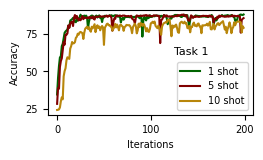

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

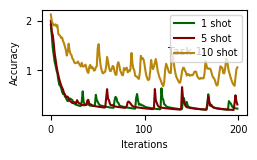

In [42]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

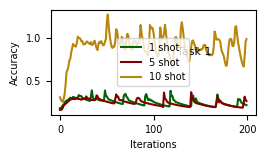

In [43]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [44]:
_reg_fit_loss41 = fit_loss
_reg_train_loss41 = train_loss11
_reg_accuracy41 = accuracy11

NameError: name 'fit_loss' is not defined

In [45]:
_reg_fit_loss41 = [0.3425563537713253,
 0.2934064016197667,
 0.32071786577051337,
 0.3164165092237068,
 0.4669029875235124,
 0.4712976867502386,
 0.3368823365731673,
 0.3299294385043057,
 0.4137731537674413,
 0.5022799336549008,
 0.66184930006663,
 0.6625417525118048,
 0.5255585637959567,
 0.4447685588489879,
 0.4400638414151741,
 0.5314609805742899,
 0.6211989251050082,
 0.610677446379806,
 0.7140114542209741,
 0.8381619814670447,
 0.8742588496569431,
 0.7993514230757048,
 0.7587923813949932,
 0.7715640673131654,
 0.7818732577742953,
 0.7823965621717048,
 0.8008507282444925,
 0.7776201466719309,
 0.8165139203721826,
 0.8511463629476952,
 0.8155557549361027,
 1.0640797407338114,
 1.0176877885153799,
 0.9246945137327368,
 0.9555015852957061,
 0.8833702396262776,
 0.8990300333861149,
 0.896950282833793,
 0.8825977823951028,
 0.9763396806789167,
 1.0491458213690557,
 0.9747458335125085,
 0.9431526037779722,
 0.9502967153534745,
 1.0355284620415082,
 1.073316469337001,
 1.019583054564216,
 1.067230143330314,
 1.0367812279498938,
 1.1091028099710292,
 1.0723073545730475,
 1.0317320561770238,
 1.001073916753133,
 1.015335923794544,
 1.0482370979858167,
 1.1024070029908961,
 1.0496515387838536,
 1.1749119894071058,
 1.1714878551887744,
 1.111458673621669,
 1.1549083735003616,
 1.0755451583501063,
 1.050195782473593,
 1.1076069474220276,
 1.087232420841853,
 1.0865579148133595,
 1.1570883384256652,
 1.2604449120434849,
 1.148383637269338,
 1.1262405921112408,
 1.1303551486044219,
 1.1033259666327275,
 1.1076273358229436,
 1.177024006843567,
 1.294328344590736,
 1.2412355036446543,
 1.1197044361721387,
 1.0651784999804064,
 1.0262822590091012,
 1.0440396296255516,
 1.2139970046101194,
 1.1786815542163271,
 1.1885051347992637,
 1.106541476466439,
 1.0592057876514667,
 1.1221685481793953,
 1.1025409454649144,
 1.1094434649655314,
 1.068987516742764,
 1.074783930272767,
 1.1521531162839946,
 1.1550107544118708,
 1.1605339104479009,
 1.2777739022717332,
 1.6317333813869592,
 1.4653764060049346,
 1.2480736754157327,
 1.1852334647467642,
 1.1039617169987073,
 1.1530776059988774,
 1.183031080347119,
 1.1472787694497542,
 1.133791750127619,
 1.145002670360334,
 1.1375992948358709,
 1.1455409779693142,
 1.2083088502739414,
 1.2134739828832222,
 1.1910412600546172,
 1.1605258565960508,
 1.1280500997196545,
 1.3885810591957786,
 1.328965273770419,
 1.1813134821978482,
 1.0973238294774836,
 1.0721155296672473,
 1.03688399087299,
 1.2117713030540582,
 1.3946289961988276,
 1.3043045654441372,
 1.1551129763776606,
 1.0494405058297245,
 1.152120182911555,
 1.2113107153863618,
 1.1861447420987217,
 1.1685961900335369,
 1.1129980177590342,
 1.2182394085508403,
 1.282638790029468,
 1.1946548530549714,
 1.1374426411859917,
 1.2520862185593806,
 1.1688454674951958,
 1.127826811689319,
 1.1458464860916138,
 1.154049692731915,
 1.158984444358132,
 1.202175082582416,
 1.1732977664831914,
 1.1208067897594336,
 1.111432550531445,
 1.176371289022041,
 1.2897124940698796,
 1.4777354977347634,
 1.4316983530015657,
 1.2599281018430537,
 1.1451368133227031,
 1.1047227960644346,
 1.1024808648860815,
 1.11744214368589,
 1.1698394471948796,
 1.1442491701154998,
 1.0995010950348594,
 1.0843976483200535,
 1.3741344339919812,
 1.4433152368574431,
 1.3499653772874312,
 1.1894187602129849,
 1.0896094622034016,
 1.181610304297823,
 1.379538604707429,
 1.2214426362153255,
 1.1720453771677883,
 1.1395771991122852,
 1.1701882806691257,
 1.185231494181084,
 1.138567075584874,
 1.1601879632834233,
 1.1603120222236172,
 1.180847005410628,
 1.146270928960858,
 1.0684403524254307,
 1.0798495520244946,
 1.0937102256399212,
 1.168935107462334,
 1.1774406902717822,
 1.2598525177348743,
 1.2635151978695032,
 1.250190682483442,
 1.2890758008667917,
 1.2538958065437549,
 1.2423097202272126,
 1.1315474221200654,
 1.102432951782689,
 1.1229529723976597,
 1.1353912750879924,
 1.1099993387858074,
 1.1251932057467373,
 1.132312176805554,
 1.2045813076423877,
 1.392536854202097,
 1.3217346993359653,
 1.2514749079039602,
 1.1688663580200889,
 1.1950111605904319,
 1.1911657488707341,
 1.165658004356153,
 1.1388808705589988,
 1.2893514199690386,
 1.262213641946966]

In [46]:
_reg_train_loss41 = [2.1405274615143286,
 2.022849557977734,
 2.029113191546816,
 2.0136435736309397,
 2.201948472947785,
 2.1393242568680733,
 1.9734638387506658,
 1.9478292880636272,
 2.0465214415030046,
 2.1318018960230276,
 2.2511277000109353,
 2.357367753982544,
 2.130251199910135,
 2.0405483227787595,
 2.0159235054796394,
 2.0854103872270295,
 2.1944527842781762,
 2.11464329921838,
 2.303435670607018,
 2.253118686603777,
 2.1863159049641,
 2.005536456902822,
 1.9168023575435986,
 1.8889480630556743,
 1.8397144241766497,
 1.8480539069031223,
 1.835618257522583,
 1.789021074771881,
 1.7462235526605085,
 1.776086303320798,
 1.6871377392248674,
 2.198784913077499,
 1.9131201776591213,
 1.724252776666121,
 1.7998578945795696,
 1.6287399530410767,
 1.6440120194897507,
 1.5920270157582832,
 1.5540991786754492,
 1.6606004978671218,
 1.7549466490745544,
 1.5934109182068796,
 1.53918748552149,
 1.5206653114521143,
 1.6533775925636292,
 1.7149584690729778,
 1.6248713767889775,
 1.6083369507934109,
 1.5446033947395557,
 1.628384044676116,
 1.5836329875570354,
 1.50889282876795,
 1.4724318800550518,
 1.454549460700064,
 1.5039469527475762,
 1.5715973431413823,
 1.4215865261626965,
 1.6421765341903225,
 1.6320065585049717,
 1.5078893592863372,
 1.5615529165123447,
 1.4274016907720855,
 1.40352654095852,
 1.4737147869485798,
 1.4438842083468582,
 1.4373653224020293,
 1.5179698810432896,
 1.647362308068709,
 1.4867040099519673,
 1.4603197086941113,
 1.4622644420826074,
 1.4187465617150972,
 1.4118240547902656,
 1.5166668711286602,
 1.6945614363207961,
 1.5624661030191365,
 1.426602137811256,
 1.3349112940557075,
 1.2873747005607143,
 1.3073473066994639,
 1.5500423854047602,
 1.5376574993133545,
 1.5314500205444568,
 1.3722977421500466,
 1.305013226740288,
 1.400795736096122,
 1.3667410557920283,
 1.3756627015995258,
 1.3171095848083496,
 1.3505568955883835,
 1.419643223285675,
 1.3884231393987483,
 1.4081079761187236,
 1.6387037291671291,
 2.050342512853218,
 1.752096793868325,
 1.4852908994212295,
 1.381109438159249,
 1.2994442347324255,
 1.3966318386973757,
 1.4101269913442207,
 1.3453214728471004,
 1.3369220206231782,
 1.3304522814172688,
 1.3896466222676365,
 1.3752558430035908,
 1.4490458423441106,
 1.451486517082561,
 1.4088002208507422,
 1.3786232760458281,
 1.3195605133519028,
 1.666325863563653,
 1.5450243913766109,
 1.3447166482607524,
 1.2630784529628176,
 1.213317704923225,
 1.1826315973744248,
 1.500501654364846,
 1.6684988032687793,
 1.4970638264309277,
 1.3210059982357603,
 1.171484817158092,
 1.3662994214982698,
 1.4149793007157065,
 1.3560832847248425,
 1.323400277079958,
 1.2428470633246682,
 1.405630734833804,
 1.4873739589344372,
 1.357787296627507,
 1.2817587581547825,
 1.4351808031400044,
 1.2999895106662402,
 1.2737935889850964,
 1.2596208814418677,
 1.2808215871001736,
 1.2940055131912231,
 1.3716339794072239,
 1.2968443018017393,
 1.2378381906133709,
 1.2289267236536199,
 1.3358811447114656,
 1.510877049330509,
 1.8131572098443003,
 1.5921142336094019,
 1.3696132663524512,
 1.2418054522890034,
 1.1943164702617761,
 1.208634701642123,
 1.2253987464037808,
 1.3016944617936106,
 1.2651293223554438,
 1.2065140279856594,
 1.1907589056275107,
 1.6063215714512449,
 1.6394773504950784,
 1.5196005647832698,
 1.2910028569626086,
 1.1629555514364531,
 1.3077973849845654,
 1.507761214718674,
 1.3368409221822566,
 1.2657683058218523,
 1.2235281322941636,
 1.2731401233962087,
 1.2891793377471692,
 1.2218146739584026,
 1.2930847243829207,
 1.2836493253707886,
 1.305498966664979,
 1.2372486753897234,
 1.1364340800227541,
 1.1818980682979932,
 1.188230528975978,
 1.296296238899231,
 1.3198709722721216,
 1.3744517185471274,
 1.403624308831764,
 1.3658991492155828,
 1.4248351454734802,
 1.3587574037638577,
 1.342068359707341,
 1.2003629767533504,
 1.1658014799609329,
 1.201109812115178,
 1.23373436385935,
 1.1837281620863713,
 1.2196747787070996,
 1.2373449874646736,
 1.3203013521252256,
 1.5829497015837468,
 1.415840699817195,
 1.3485793724204556,
 1.244806575052666,
 1.2988528555089778,
 1.2945831815401714,
 1.2392551176475757,
 1.2126476728554927,
 1.4578016906073599,
 1.3564774719151584]

In [47]:
_reg_accuracy41 = [23.543400713436384,
 23.18668252080856,
 27.2294887039239,
 23.42449464922711,
 24.019024970273485,
 25.44589774078478,
 32.22354340071344,
 36.1474435196195,
 26.634958382877528,
 26.872770511296075,
 22.473246135552913,
 25.20808561236623,
 26.872770511296075,
 28.180737217598097,
 32.34244946492271,
 31.391200951248514,
 34.244946492271104,
 36.74197384066587,
 31.86682520808561,
 43.99524375743163,
 45.18430439952438,
 48.15695600475624,
 47.681331747919145,
 50.29726516052319,
 50.059453032104635,
 49.58382877526754,
 55.529131985731276,
 53.0321046373365,
 52.794292508917955,
 55.529131985731276,
 50.65398335315101,
 52.199762187871585,
 59.096313912009514,
 56.36147443519619,
 59.096313912009514,
 58.501783590963136,
 64.44708680142688,
 62.901307966706305,
 62.30677764565993,
 64.44708680142688,
 64.44708680142688,
 65.99286563614744,
 67.89536266349585,
 64.92271105826397,
 63.25802615933413,
 66.11177170035671,
 65.51724137931035,
 69.9167657550535,
 66.230677764566,
 63.020214030915575,
 68.13317479191439,
 65.99286563614744,
 71.10582639714626,
 70.74910820451844,
 69.44114149821641,
 73.00832342449465,
 69.44114149821641,
 67.30083234244947,
 70.63020214030915,
 70.8680142687277,
 70.03567181926279,
 72.05707491082045,
 67.89536266349585,
 71.70035671819262,
 74.6730083234245,
 72.41379310344827,
 70.98692033293698,
 69.08442330558859,
 71.58145065398335,
 71.22473246135553,
 72.294887039239,
 71.22473246135553,
 75.74316290130797,
 68.01426872770512,
 71.3436385255648,
 75.38644470868014,
 73.36504161712247,
 73.2461355529132,
 75.38644470868014,
 72.88941736028538,
 70.98692033293698,
 74.43519619500594,
 73.36504161712247,
 72.7705112960761,
 73.48394768133174,
 71.3436385255648,
 74.43519619500594,
 74.55410225921521,
 71.10582639714626,
 73.12722948870392,
 76.93222354340071,
 73.48394768133174,
 72.88941736028538,
 51.724137931034484,
 70.63020214030915,
 74.19738406658739,
 76.81331747919144,
 73.7217598097503,
 75.6242568370987,
 73.36504161712247,
 73.84066587395957,
 76.93222354340071,
 75.02972651605232,
 74.07847800237812,
 73.12722948870392,
 76.69441141498217,
 75.74316290130797,
 75.74316290130797,
 73.95957193816885,
 76.33769322235435,
 74.55410225921521,
 75.02972651605232,
 76.45659928656362,
 77.76456599286564,
 75.50535077288941,
 77.64565992865636,
 71.58145065398335,
 66.94411414982164,
 75.02972651605232,
 74.79191438763377,
 77.40784780023782,
 77.64565992865636,
 76.81331747919144,
 74.43519619500594,
 78.359096313912,
 76.33769322235435,
 76.57550535077289,
 78.59690844233056,
 76.57550535077289,
 76.93222354340071,
 73.60285374554103,
 78.12128418549347,
 77.40784780023782,
 78.47800237812129,
 77.28894173602853,
 75.02972651605232,
 76.93222354340071,
 75.98097502972652,
 77.52675386444709,
 79.07253269916765,
 78.95362663495838,
 74.6730083234245,
 75.98097502972652,
 74.31629013079667,
 78.12128418549347,
 78.359096313912,
 81.45065398335315,
 78.95362663495838,
 79.7859690844233,
 79.54815695600476,
 78.47800237812129,
 77.76456599286564,
 77.64565992865636,
 75.26753864447087,
 76.57550535077289,
 75.38644470868014,
 76.33769322235435,
 79.7859690844233,
 80.38049940546968,
 71.8192627824019,
 78.71581450653983,
 80.7372175980975,
 80.38049940546968,
 79.07253269916765,
 78.59690844233056,
 77.17003567181926,
 79.90487514863258,
 79.42925089179548,
 77.88347205707491,
 76.93222354340071,
 78.71581450653983,
 80.7372175980975,
 80.26159334126041,
 79.3103448275862,
 75.38644470868014,
 79.7859690844233,
 77.28894173602853,
 75.26753864447087,
 75.26753864447087,
 79.19143876337694,
 73.48394768133174,
 80.02378121284185,
 81.2128418549346,
 80.61831153388823,
 81.56956004756242,
 80.61831153388823,
 79.90487514863258,
 79.19143876337694,
 78.59690844233056,
 77.05112960761,
 77.40784780023782,
 77.17003567181926,
 79.54815695600476,
 81.2128418549346,
 80.85612366230677,
 76.57550535077289,
 81.2128418549346,
 77.64565992865636,
 78.359096313912,
 76.93222354340071]

In [48]:
_reg_fit_loss42 = fit_loss
_reg_train_loss42 = train_loss11
_reg_accuracy42 = accuracy11

NameError: name 'fit_loss' is not defined

In [49]:
_reg_fit_loss42 = [0.3490115368005001,
 0.31742101365869696,
 0.2666801575458411,
 0.2501477219841697,
 0.26494366111177386,
 0.27392125129699707,
 0.3041521094062112,
 0.4300529884569573,
 0.6506240693005648,
 0.5891108585126472,
 0.5948302095586603,
 0.6273731029394901,
 0.6793982982635498,
 0.6988821643771548,
 0.718698162021059,
 0.7194268053228204,
 0.7920966599926804,
 0.8097855087482568,
 0.7566456469622526,
 0.7622496846950415,
 0.7915318825028159,
 0.8202612725171176,
 0.8349642283988722,
 0.8291436090613856,
 0.8505062153845122,
 0.8594163565924673,
 0.9104689504161025,
 0.9265684286753336,
 0.9186331015644651,
 0.9055198178146825,
 0.913410074783094,
 0.9656692815549446,
 0.9302501335288539,
 0.9247928550749114,
 0.9621788769057302,
 0.9799795746803284,
 0.9825297034148014,
 0.9622837395379038,
 0.9570763002742421,
 0.9732017300345681,
 1.0861247543132666,
 1.0771870667284185,
 1.0873690554589936,
 1.0235832929611206,
 1.0072583501989192,
 1.0156802083506729,
 1.0129473335815198,
 1.0803562330477166,
 1.2132260113051443,
 1.1388200918833415,
 1.0837131269050366,
 1.030716011018464,
 1.0113879189346775,
 1.0295462192911091,
 1.035348243785627,
 1.0472313237912727,
 1.1085327610825046,
 1.055069919788476,
 1.084081181974122,
 1.1611717144648235,
 1.1555579286633115,
 1.1145061001633152,
 1.0890809442057754,
 1.0733328985445427,
 1.0637839237848918,
 1.039531460314086,
 1.0278548255111233,
 1.0775835026394238,
 1.0716235800222917,
 1.0913128509665981,
 1.0619959542245576,
 1.0378135135679534,
 1.0461480707833262,
 1.0350712086215164,
 1.0785847360437566,
 1.1999370762796113,
 1.1898962945649119,
 1.1285820549184626,
 1.1365867202932185,
 1.1064541773362593,
 1.1266222722602612,
 1.1536733562296086,
 1.0946992816347065,
 1.1117510651097153,
 1.1047449617674856,
 1.136298996029478,
 1.223962942759196,
 1.2208544485496753,
 1.1331508701497859,
 1.0768848838228169,
 1.1260094751011243,
 1.149769638523911,
 1.1657576922214392,
 1.0963746562148586,
 1.0358024510470303,
 1.0058437513582634,
 1.075337908484719,
 1.124636866829612,
 1.1280731468489675,
 1.0771783337448582,
 1.04958493420572,
 1.033815364042918,
 0.9942148418137522,
 1.0033631252520012,
 1.054450607661045,
 1.0839941068129106,
 1.1339467185916323,
 1.120071342497161,
 1.0776744864203713,
 1.057258053259416,
 1.030940465854876,
 1.0344279805819194,
 1.0309538046518962,
 1.0498142513361843,
 1.116828936519045,
 1.268036065679608,
 1.2634257620031184,
 1.155408046462319,
 1.0821606715520222,
 1.0608537702849417,
 1.0375450741160999,
 1.0422526688286753,
 1.0472100395144839,
 1.0207518700397376,
 1.0369304852052168,
 1.1297290885087214,
 1.1476628094008474,
 1.153208815690243,
 1.17039012186455,
 1.0891699321342236,
 1.0864340500398115,
 1.0192233992345405,
 1.0061464616746614,
 1.0999504978006536,
 1.1274238933216443,
 1.1109798568667788,
 1.049198081999114,
 0.9867493853424535,
 1.003829923543063,
 1.1418080763383345,
 1.1820151444637415,
 1.0943157961874297,
 1.0233686692786939,
 0.9993547887513132,
 0.9775680953806097,
 0.985157928683541,
 1.0420787912426572,
 1.3218846321105957,
 1.4363697984001853,
 1.2758356043786714,
 1.188622868422306,
 1.144759593587933,
 1.075779788421862,
 1.0135444348508662,
 0.9651991472099767,
 0.9672094980875651,
 1.0421354228799993,
 1.2095097231142449,
 1.4045204574411565,
 1.2775923844539758,
 1.1648607723640674,
 1.0852674570950596,
 1.0367125110192732,
 1.009705100998734,
 0.9996679316867482,
 1.0371410539655974,
 1.0313201600855046,
 1.0521287141424236,
 1.1048470265937573,
 1.1605533614303127,
 1.2218259356238625,
 1.3070027503100308,
 1.3084825963685007,
 1.2262046120383523,
 1.1261639125419385,
 1.0380082220742197,
 1.0002290732932813,
 0.9776636777502118,
 1.0159701018622427,
 1.0174048290108189,
 1.0385222760113804,
 1.13268212296746,
 1.2048729838746968,
 1.5047674865433665,
 1.4048936764399211,
 1.2603023702448064,
 1.1509783701463179,
 1.0759809378421668,
 1.0238518118858337,
 1.0008505113197095,
 0.9781568519996874,
 1.0163364338152336,
 1.0656604965527852,
 1.0587335301168037,
 1.0397661725680034,
 1.0585101608074072,
 1.0677767594655354,
 1.0729299512776462,
 1.108864224318302,
 1.1155553694927332]

In [50]:
_reg_train_loss42 = [2.2044755545529453,
 2.0819315007238677,
 1.977910421111367,
 1.9526437015244456,
 1.9497377764094959,
 1.9563078013333408,
 1.996717348243251,
 2.0788142825617935,
 2.355582656282367,
 2.202269937052871,
 2.1496453321341313,
 2.0627226107048267,
 1.9790243343873457,
 1.932995723955559,
 1.882438190055616,
 1.8075879920612683,
 1.896308107809587,
 1.8531406648231274,
 1.7309726729537502,
 1.690283999298558,
 1.6918547442465117,
 1.7129366831345991,
 1.6577647057446567,
 1.6418900995543508,
 1.6277955806616582,
 1.6562172933058306,
 1.7143961769161802,
 1.633569547624299,
 1.5895553357673413,
 1.5449006882580845,
 1.5403751496112708,
 1.5720562645883271,
 1.5368204044573235,
 1.4575516671845408,
 1.5122236916513154,
 1.587682427782001,
 1.4576041770703865,
 1.4379783074061077,
 1.3651515426057759,
 1.3945604887875644,
 1.6719424146594424,
 1.5653242631392046,
 1.5381876699852222,
 1.3954637773109204,
 1.3637258139523594,
 1.388359304630395,
 1.369866385604396,
 1.5204992655551794,
 1.724145177638892,
 1.5254725868051702,
 1.4099076877940784,
 1.336293581760291,
 1.272249521631183,
 1.3191372950871785,
 1.3248117656418772,
 1.313904137322397,
 1.4138601331999807,
 1.322619434558984,
 1.3564514716466267,
 1.484619682485407,
 1.462783528096748,
 1.3617524522723574,
 1.3243216312292851,
 1.3195292335568052,
 1.2697978706070872,
 1.2481640360572122,
 1.2345713449246956,
 1.320204041220925,
 1.2734339598453406,
 1.3059827450549963,
 1.26987746628848,
 1.2227677215229382,
 1.2312092925563003,
 1.2281598755807588,
 1.2563540249159841,
 1.465483925559304,
 1.409525333028851,
 1.3203786972797278,
 1.2984632145274768,
 1.2656310688365588,
 1.3133088783784346,
 1.3588971694310505,
 1.2850426218726418,
 1.2934792619762998,
 1.2728500908071345,
 1.3579045967622236,
 1.4532410628867871,
 1.3993360671130093,
 1.2727689598545884,
 1.22367867195245,
 1.2938430670535925,
 1.3906370401382446,
 1.3738020947485259,
 1.2381750164609966,
 1.1441080064484568,
 1.1137961221463752,
 1.2265830184474136,
 1.2940672672156133,
 1.3104586998621623,
 1.2150172609271426,
 1.1723910028284246,
 1.1409540357011738,
 1.0926071188666604,
 1.1079951018998118,
 1.2015346180308948,
 1.2488826224298188,
 1.3490400675571326,
 1.2689262953671543,
 1.19396051493558,
 1.1863118879722827,
 1.129365754849983,
 1.1347170887571392,
 1.127214587096012,
 1.147687102809097,
 1.2945653705885916,
 1.4746119903795647,
 1.4377546129804668,
 1.2449888641184026,
 1.167357806003455,
 1.1580440564589067,
 1.1108094815051917,
 1.1554202997323237,
 1.1476039200118093,
 1.089809739228451,
 1.1529386585408992,
 1.2657425692587188,
 1.283209760983785,
 1.2747296420010654,
 1.278304656346639,
 1.1726091811151216,
 1.1613022522492842,
 1.09278095852245,
 1.0840033220522332,
 1.2253802581266924,
 1.2574086261518074,
 1.193199305823355,
 1.1246897343433264,
 1.0464001334074773,
 1.0988326000444817,
 1.3423074808987705,
 1.3029444434426047,
 1.1793598514614683,
 1.091526316873955,
 1.064455057635452,
 1.041093029759147,
 1.0620414072817022,
 1.171462980183688,
 1.6217575470606487,
 1.607098684166417,
 1.3616354031996294,
 1.265334179907134,
 1.2278594826207017,
 1.1385441946260857,
 1.0626485492243911,
 1.0122113751642632,
 1.038750207785404,
 1.1666602167216213,
 1.5547560019926592,
 1.5528392358259722,
 1.3914685755064993,
 1.24686433690967,
 1.1488350918798735,
 1.0956330479997578,
 1.0748335123062134,
 1.0651202057347153,
 1.1259001637950088,
 1.105104681217309,
 1.1424362045345884,
 1.2132049184856992,
 1.309966271573847,
 1.4093404791571877,
 1.473272103251833,
 1.5441667347243337,
 1.32914712934783,
 1.201006419730909,
 1.0908963644143306,
 1.055745724475745,
 1.0342516086318276,
 1.0966438885891077,
 1.0920721545363918,
 1.1331351742599949,
 1.2512380534952336,
 1.5922127817616318,
 1.8884293093825832,
 1.5299457889614683,
 1.3274807677124485,
 1.2056856552759807,
 1.1189052552887888,
 1.0669060259154348,
 1.0547200043996174,
 1.035828420610139,
 1.0963538632248386,
 1.1709426460844097,
 1.153003996068781,
 1.1289119503714822,
 1.1555134238618794,
 1.168727538802407,
 1.1710439342440981,
 1.20626534837665,
 1.2569510539372761]

In [51]:
_reg_accuracy42 = [22.829964328180736,
 24.019024970273485,
 24.256837098692035,
 23.66230677764566,
 25.802615933412604,
 23.66230677764566,
 28.299643281807374,
 25.68370986920333,
 26.634958382877528,
 26.159334126040427,
 33.53151010701546,
 44.1141498216409,
 40.903686087990486,
 43.51961950059453,
 50.535077288941736,
 51.010701545778836,
 52.08085612366231,
 52.318668252080855,
 53.0321046373365,
 55.529131985731276,
 55.29131985731272,
 57.19381688466112,
 59.33412604042806,
 55.8858501783591,
 56.24256837098692,
 56.24256837098692,
 61.59334126040428,
 63.495838287752676,
 61.59334126040428,
 64.8038049940547,
 62.30677764565993,
 64.92271105826397,
 67.06302021403091,
 66.34958382877527,
 60.99881093935791,
 67.30083234244947,
 70.63020214030915,
 73.12722948870392,
 67.77645659928656,
 68.72770511296076,
 67.06302021403091,
 70.39239001189061,
 69.20332936979786,
 69.32223543400714,
 74.31629013079667,
 72.7705112960761,
 73.95957193816885,
 65.16052318668252,
 71.22473246135553,
 72.17598097502973,
 71.8192627824019,
 76.09988109393579,
 77.28894173602853,
 74.43519619500594,
 73.95957193816885,
 75.14863258026159,
 76.45659928656362,
 73.36504161712247,
 73.00832342449465,
 73.60285374554103,
 77.17003567181926,
 77.28894173602853,
 75.14863258026159,
 77.88347205707491,
 78.71581450653983,
 73.00832342449465,
 78.359096313912,
 79.42925089179548,
 79.07253269916765,
 76.93222354340071,
 78.24019024970274,
 78.95362663495838,
 78.359096313912,
 77.52675386444709,
 74.55410225921521,
 78.359096313912,
 76.69441141498217,
 78.95362663495838,
 80.02378121284185,
 78.00237812128418,
 75.86206896551724,
 78.83472057074911,
 80.38049940546968,
 79.3103448275862,
 75.86206896551724,
 78.59690844233056,
 76.33769322235435,
 80.7372175980975,
 81.45065398335315,
 78.95362663495838,
 78.12128418549347,
 77.76456599286564,
 76.93222354340071,
 81.2128418549346,
 82.28299643281808,
 79.07253269916765,
 79.3103448275862,
 76.09988109393579,
 80.02378121284185,
 79.3103448275862,
 81.33174791914388,
 83.47205707491082,
 81.92627824019024,
 82.40190249702735,
 78.83472057074911,
 79.19143876337694,
 78.95362663495838,
 81.33174791914388,
 79.19143876337694,
 80.38049940546968,
 80.7372175980975,
 80.97502972651606,
 81.33174791914388,
 79.3103448275862,
 76.33769322235435,
 73.00832342449465,
 79.54815695600476,
 81.56956004756242,
 79.66706302021403,
 80.61831153388823,
 81.6884661117717,
 81.45065398335315,
 80.26159334126041,
 80.7372175980975,
 81.33174791914388,
 78.24019024970274,
 78.359096313912,
 80.26159334126041,
 81.09393579072533,
 79.54815695600476,
 82.52080856123662,
 81.45065398335315,
 79.54815695600476,
 75.86206896551724,
 78.24019024970274,
 81.56956004756242,
 81.2128418549346,
 82.1640903686088,
 72.65160523186682,
 77.76456599286564,
 78.95362663495838,
 79.66706302021403,
 80.02378121284185,
 80.85612366230677,
 82.87752675386444,
 77.17003567181926,
 75.50535077288941,
 77.40784780023782,
 77.28894173602853,
 81.92627824019024,
 80.97502972651606,
 81.6884661117717,
 82.87752675386444,
 82.52080856123662,
 81.6884661117717,
 80.14268727705112,
 76.69441141498217,
 76.33769322235435,
 78.47800237812129,
 81.6884661117717,
 80.14268727705112,
 81.56956004756242,
 81.2128418549346,
 81.2128418549346,
 80.02378121284185,
 80.97502972651606,
 81.33174791914388,
 78.359096313912,
 79.7859690844233,
 72.88941736028538,
 79.19143876337694,
 78.00237812128418,
 81.09393579072533,
 81.09393579072533,
 82.1640903686088,
 82.04518430439953,
 82.28299643281808,
 81.80737217598097,
 82.40190249702735,
 81.92627824019024,
 82.04518430439953,
 78.47800237812129,
 65.2794292508918,
 77.88347205707491,
 80.38049940546968,
 82.6397146254459,
 81.33174791914388,
 81.92627824019024,
 81.80737217598097,
 82.1640903686088,
 80.49940546967895,
 79.66706302021403,
 80.14268727705112,
 80.02378121284185,
 81.33174791914388,
 81.2128418549346,
 81.6884661117717,
 80.61831153388823,
 80.02378121284185,
 80.97502972651606]

In [52]:
_reg_fit_loss43 = fit_loss
_reg_train_loss43 = train_loss11
_reg_accuracy43 = accuracy11

NameError: name 'fit_loss' is not defined

In [53]:
_reg_fit_loss43 = [0.4555844247341156,
 0.3936983197927475,
 0.4444193124771118,
 0.5100125044584274,
 0.5971804931759834,
 0.6109878912568092,
 0.668306416273117,
 0.7275006949901581,
 0.7915437683463097,
 0.8065771847963333,
 0.8087782859802246,
 0.850325907766819,
 0.8764350727200508,
 0.8804913356900215,
 0.9503310784697533,
 0.9195229232311248,
 0.9427721813321114,
 0.9880655974149704,
 0.969607450067997,
 0.9566291198134422,
 0.9800209939479828,
 0.9413886308670044,
 0.9191743433475494,
 0.9281368285417557,
 0.9423424601554871,
 1.0686330109834672,
 1.0262774303555489,
 1.0119231387972831,
 1.0602753788232804,
 1.0098630890250206,
 0.9656148821115493,
 0.9079948931932449,
 0.9064103037118911,
 0.8912980929017067,
 0.8990573108196258,
 0.9255539834499359,
 0.9354671493172646,
 0.9376160830259324,
 0.9771329820156097,
 0.9441072046756744,
 1.0012389361858367,
 0.9493781134486199,
 0.9628370553255081,
 1.003581055998802,
 0.9228515282273293,
 0.9180830493569374,
 0.9166937857866287,
 0.9083498492836952,
 0.8901805147528649,
 0.9801717817783355,
 0.9050149172544479,
 0.8796450302004815,
 0.8417648285627365,
 0.8442807614803314,
 0.8993734538555145,
 1.0221473783254624,
 1.0605612859129905,
 1.0060555458068847,
 0.9243749231100082,
 0.9044425517320633,
 0.8429939180612565,
 0.7971064314246178,
 0.7729272320866585,
 0.8618809029459953,
 0.865980789065361,
 0.8382070317864418,
 0.8398583069443702,
 0.8658457562327385,
 0.8873572140932083,
 0.9263695165514946,
 0.9196045368909835,
 0.8672393098473549,
 0.8376534670591355,
 0.8192339822649956,
 0.8853116288781167,
 0.9502318695187568,
 0.9322369396686554,
 0.8886263906955719,
 0.8520722851157189,
 0.8461495071649552,
 0.8365489766001701,
 0.8088988661766052,
 0.7953880369663239,
 0.7536943331360817,
 0.707742129266262,
 0.6671008974313736,
 0.6353147700428963,
 0.6608931854367256,
 0.8876191601157188,
 0.9737538486719132,
 1.1273300230503083,
 1.1984258204698564,
 1.0903151422739028,
 1.0236669048666953,
 0.9229401424527168,
 0.8710658729076386,
 0.9249033108353615,
 0.8774290204048156,
 0.8280597522854805,
 0.7811683773994446,
 0.7686306893825531,
 0.7419381469488144,
 0.8186160981655121,
 0.85081777125597,
 0.9860784962773324,
 0.9249407380819321,
 0.8797558799386025,
 0.8813632100820541,
 0.8129376322031021,
 0.7744396582245827,
 0.7292222172021866,
 0.6973663255572319,
 0.6728400960564613,
 0.6930018782615661,
 0.8428787112236023,
 0.9770281836390495,
 1.1300948172807694,
 1.3027619928121568,
 1.2120627254247665,
 1.0803394258022307,
 0.9845840573310852,
 0.9091500788927078,
 0.8451299950480461,
 0.7946744084358215,
 0.7515822947025299,
 0.714716263115406,
 0.6824727952480316,
 0.6556369796395302,
 0.6432845920324326,
 0.8556099697947502,
 1.1142626360058785,
 1.0808698192238808,
 1.2472258880734444,
 1.5375016182661057,
 1.4431979835033417,
 1.2879295557737351,
 1.1690847039222718,
 1.067561462521553,
 0.9982124611735343,
 0.9576597183942794,
 0.896010984480381,
 0.9100562155246734,
 0.9982886761426926,
 0.9977881893515587,
 1.01842742562294,
 1.1058670938014985,
 1.095537480711937,
 1.136444053053856,
 1.0086131677031518,
 0.991963092982769,
 0.9340541169047356,
 0.8692351505160332,
 0.8302316665649414,
 0.7912468612194061,
 0.7559880599379539,
 0.7309147015213966,
 0.7016973167657852,
 0.6754078716039658,
 0.6562105938792229,
 0.6863282591104507,
 0.7824623569846153,
 0.8868728786706924,
 0.9111183315515519,
 0.9491475328803063,
 0.8981626480817795,
 0.8677392363548279,
 0.8467642426490783,
 0.7916380345821381,
 0.8427560299634933,
 0.9837833702564239,
 0.960264490544796,
 0.9358681097626687,
 0.8818629115819931,
 0.8181566253304482,
 0.7663136482238769,
 0.7360287413001061,
 0.6948931321501732,
 0.6603139385581016,
 0.6307508334517479,
 0.605502587556839,
 0.5862313210964203,
 0.5800854012370109,
 0.7247769385576248,
 1.0411369547247886,
 1.1126574769616127,
 1.0962807327508926,
 1.0800264373421669,
 1.0461047798395158,
 0.9642679795622826,
 0.8960650205612183,
 0.8383932635188103,
 0.7859676599502563,
 0.7400094419717789,
 0.700458599627018,
 0.6669597268104553,
 0.6380342468619347,
 0.6192676320672035,
 0.8988048955798149,
 0.9795548766851425,
 0.9788005992770195]

In [54]:
_reg_train_loss43 = [2.2449413299560548,
 2.0532106041908262,
 2.0029651135206223,
 1.85735881626606,
 1.7951967984437942,
 1.67616306245327,
 1.668133121728897,
 1.6770024299621582,
 1.519135758280754,
 1.4606890052556991,
 1.3106164693832398,
 1.3898881494998931,
 1.3455615937709808,
 1.3220636516809463,
 1.3883921384811402,
 1.2879908353090286,
 1.2852298676967622,
 1.3402517050504685,
 1.353577408194542,
 1.2579516798257828,
 1.2759203732013702,
 1.171402521431446,
 1.1034508436918258,
 1.1789063826203345,
 1.1553521871566772,
 1.4371537685394287,
 1.2449909657239915,
 1.2020414412021636,
 1.300371739268303,
 1.1690761655569077,
 1.0810501024127006,
 0.9919789165258408,
 0.9893892660737038,
 0.9787684604525566,
 0.9784598737955094,
 1.031528528034687,
 1.051281453669071,
 1.0495159447193145,
 1.0690600097179412,
 1.009289701282978,
 1.1876720204949378,
 1.063474354147911,
 1.064521074295044,
 1.0915493473410607,
 0.9829354703426361,
 0.9801399499177933,
 0.9775182589888572,
 0.9692753404378891,
 0.9461627587676048,
 1.0360432356595992,
 0.9582065626978874,
 0.9322663724422455,
 0.894551832973957,
 0.8969437941908837,
 0.9995311141014099,
 1.1523922681808472,
 1.1922544181346892,
 1.1242437094449997,
 0.9783575341105462,
 0.9463633760809899,
 0.8713583797216415,
 0.8228591114282608,
 0.8008831679821015,
 0.9975600779056549,
 0.9344382613897324,
 0.8961883649230004,
 0.8907026454806328,
 0.9187950849533081,
 0.958513143658638,
 1.0007694721221925,
 0.9716678768396377,
 0.9041231885552407,
 0.8746894985437393,
 0.8541233077645302,
 0.9457665145397186,
 1.035317462682724,
 1.00521272867918,
 0.9432715937495232,
 0.9044662028551101,
 0.8868912979960442,
 0.870462654531002,
 0.8290724292397499,
 0.8258668839931488,
 0.7766435757279396,
 0.7237280592322349,
 0.6778319522738456,
 0.6490879520773888,
 0.7006350815296173,
 1.0112959787249565,
 1.1382068246603012,
 1.2936309427022934,
 1.437237384915352,
 1.1784585952758788,
 1.0940321162343025,
 0.9485632181167603,
 0.8946693509817123,
 1.0292267128825188,
 0.918310797214508,
 0.8530400052666665,
 0.80230922549963,
 0.787575152516365,
 0.7599427238106727,
 0.8641335040330886,
 0.9283080384135246,
 1.0761398911476134,
 0.9741008475422859,
 0.9343832314014435,
 0.9486478760838508,
 0.8411401838064194,
 0.7913516163825989,
 0.740412974357605,
 0.7110367491841316,
 0.6875772967934608,
 0.7233046963810921,
 0.9246282920241355,
 1.1152930960059166,
 1.2643198400735856,
 1.6212824940681458,
 1.3147299110889434,
 1.1295674920082093,
 1.0073293536901473,
 0.9243188604712487,
 0.8540762186050415,
 0.802822382748127,
 0.7613746032118798,
 0.7248918697237968,
 0.694176809489727,
 0.66749297529459,
 0.6662128657102585,
 0.9948369398713112,
 1.4801736921072006,
 1.2229178845882416,
 1.598022948205471,
 1.9049381643533707,
 1.5895513713359832,
 1.3664738446474076,
 1.2131460785865784,
 1.086871752142906,
 1.0124860048294066,
 0.978337262570858,
 0.9094790890812874,
 0.9384383574128151,
 1.0761804684996605,
 1.0385868296027183,
 1.07553324252367,
 1.1954653024673463,
 1.1913277566432954,
 1.3338423907756805,
 1.0557525262236596,
 1.025276167690754,
 0.9668525874614715,
 0.8855915933847427,
 0.8434036895632744,
 0.8055384889245033,
 0.7673224523663521,
 0.7445128992199898,
 0.7127543315291405,
 0.6858248949050904,
 0.6685888469219208,
 0.7171078562736511,
 0.8347695797681809,
 1.0086031302809715,
 1.0166098222136497,
 1.082070179283619,
 0.9596246719360352,
 0.9141154080629349,
 0.8778234362602234,
 0.8088075757026673,
 0.9074311777949333,
 1.0995601549744607,
 1.0290912240743637,
 0.9944485992193222,
 0.9157113566994667,
 0.8371810540556908,
 0.7769749313592911,
 0.7495548978447915,
 0.7038931727409363,
 0.6687077507376671,
 0.6402263969182969,
 0.6164420619606972,
 0.5990215227007866,
 0.5992286503314972,
 0.9300309151411057,
 1.3110520601272584,
 1.2445036441087722,
 1.1926760792732238,
 1.15472069978714,
 1.1680062919855119,
 1.0026994690299034,
 0.9159797891974449,
 0.8508179888129235,
 0.7960518404841423,
 0.7479621574282647,
 0.7091202273964882,
 0.677113090455532,
 0.6491414606571198,
 0.633354414999485,
 1.0177735328674316,
 1.1062675043940544,
 1.1035609811544418]

In [55]:
_reg_accuracy43 = [27.46730083234245,
 24.970273483947683,
 42.44946492271106,
 45.5410225921522,
 45.89774078478003,
 49.940546967895365,
 56.95600475624257,
 57.907253269916765,
 63.97146254458978,
 66.46848989298454,
 69.20332936979786,
 66.94411414982164,
 73.84066587395957,
 74.31629013079667,
 70.98692033293698,
 73.7217598097503,
 75.50535077288941,
 78.83472057074911,
 73.36504161712247,
 72.05707491082045,
 76.21878715814506,
 79.54815695600476,
 79.90487514863258,
 75.6242568370987,
 80.14268727705112,
 77.52675386444709,
 75.6242568370987,
 76.21878715814506,
 77.52675386444709,
 78.47800237812129,
 81.45065398335315,
 83.23424494649227,
 82.04518430439953,
 80.26159334126041,
 81.80737217598097,
 78.24019024970274,
 78.12128418549347,
 81.6884661117717,
 81.56956004756242,
 80.38049940546968,
 82.99643281807373,
 83.82877526753865,
 79.3103448275862,
 79.7859690844233,
 81.33174791914388,
 80.61831153388823,
 80.14268727705112,
 81.56956004756242,
 81.92627824019024,
 83.47205707491082,
 81.6884661117717,
 80.26159334126041,
 83.23424494649227,
 80.7372175980975,
 80.02378121284185,
 73.12722948870392,
 78.83472057074911,
 81.56956004756242,
 83.35315101070155,
 82.87752675386444,
 83.59096313912009,
 83.94768133174792,
 81.56956004756242,
 81.92627824019024,
 82.6397146254459,
 81.2128418549346,
 81.80737217598097,
 81.09393579072533,
 77.28894173602853,
 80.38049940546968,
 82.52080856123662,
 83.23424494649227,
 82.6397146254459,
 81.6884661117717,
 78.359096313912,
 78.24019024970274,
 81.45065398335315,
 80.26159334126041,
 80.7372175980975,
 80.38049940546968,
 81.45065398335315,
 83.35315101070155,
 81.80737217598097,
 82.52080856123662,
 82.6397146254459,
 82.40190249702735,
 83.23424494649227,
 80.38049940546968,
 80.49940546967895,
 76.21878715814506,
 75.6242568370987,
 74.79191438763377,
 81.92627824019024,
 81.2128418549346,
 82.87752675386444,
 81.56956004756242,
 82.99643281807373,
 80.85612366230677,
 83.47205707491082,
 83.70986920332938,
 82.6397146254459,
 78.12128418549347,
 80.61831153388823,
 68.96551724137932,
 82.75862068965517,
 81.45065398335315,
 80.97502972651606,
 82.99643281807373,
 81.80737217598097,
 83.115338882283,
 82.40190249702735,
 82.75862068965517,
 82.6397146254459,
 81.45065398335315,
 77.28894173602853,
 77.64565992865636,
 68.48989298454221,
 79.3103448275862,
 81.92627824019024,
 81.92627824019024,
 82.99643281807373,
 83.35315101070155,
 83.70986920332938,
 83.23424494649227,
 83.47205707491082,
 82.75862068965517,
 83.35315101070155,
 84.18549346016647,
 80.49940546967895,
 70.8680142687277,
 79.66706302021403,
 81.09393579072533,
 66.34958382877527,
 74.91082045184304,
 80.38049940546968,
 80.38049940546968,
 81.92627824019024,
 82.52080856123662,
 79.42925089179548,
 81.6884661117717,
 82.04518430439953,
 82.04518430439953,
 81.09393579072533,
 80.97502972651606,
 82.04518430439953,
 80.97502972651606,
 80.14268727705112,
 79.90487514863258,
 81.6884661117717,
 83.35315101070155,
 83.115338882283,
 83.35315101070155,
 82.99643281807373,
 84.18549346016647,
 82.6397146254459,
 82.6397146254459,
 83.70986920332938,
 83.35315101070155,
 84.42330558858502,
 80.02378121284185,
 78.59690844233056,
 80.02378121284185,
 78.59690844233056,
 81.2128418549346,
 80.61831153388823,
 81.80737217598097,
 81.56956004756242,
 82.1640903686088,
 79.54815695600476,
 81.6884661117717,
 80.38049940546968,
 81.2128418549346,
 80.61831153388823,
 83.35315101070155,
 82.04518430439953,
 83.115338882283,
 83.59096313912009,
 83.23424494649227,
 82.75862068965517,
 82.87752675386444,
 82.75862068965517,
 80.61831153388823,
 70.03567181926279,
 76.57550535077289,
 78.47800237812129,
 80.7372175980975,
 77.28894173602853,
 81.2128418549346,
 82.1640903686088,
 83.23424494649227,
 83.23424494649227,
 83.47205707491082,
 83.94768133174792,
 84.0665873959572,
 84.0665873959572,
 83.82877526753865,
 80.61831153388823,
 78.24019024970274,
 81.45065398335315,
 76.21878715814506]

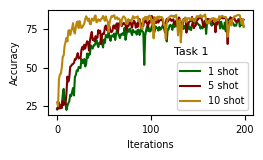

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

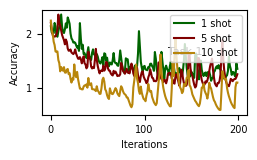

In [57]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

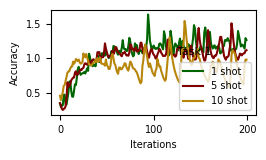

In [58]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [59]:
_reg_fit_loss51 = fit_loss
_reg_train_loss51 = train_loss11
_reg_accuracy51 = accuracy11

NameError: name 'fit_loss' is not defined

In [60]:
_reg_fit_loss51 = [0.0468945695507911,
 0.04471916921677128,
 0.04968428996301467,
 0.04744521071833949,
 0.056674963043582056,
 0.06306810725119806,
 0.06730762412471156,
 0.06410690661399596,
 0.06498570019199003,
 0.07341820578421315,
 0.07444421033705434,
 0.06337281388621177,
 0.06352702648408952,
 0.07449741132797734,
 0.07062212017274672,
 0.06234801055923585,
 0.06346325384032342,
 0.06643578602421668,
 0.06610290994567256,
 0.06625681082087179,
 0.0652528979605244,
 0.05831613968456945,
 0.05592176089844396,
 0.06165276936465694,
 0.06986315452283429,
 0.061979298029215105,
 0.05391553044319153,
 0.05463039742842797,
 0.06132785951898944,
 0.0664419460320665,
 0.05929260304377925,
 0.056720162471455914,
 0.05674144024810483,
 0.04707231877311584,
 0.04128608035464441,
 0.04379231086181056,
 0.04380680188055961,
 0.044127958676507394,
 0.039066225170127804,
 0.038423680429977757,
 0.03631948655651462,
 0.03508161296767573,
 0.034977497713219736,
 0.03482229118385623,
 0.03473933401607698,
 0.034706259566930034,
 0.034623811682385784,
 0.034573786201015595,
 0.03451066548305173,
 0.034459525418858376,
 0.034409252265768665,
 0.03434341545066526,
 0.03427527965076508,
 0.034234373920386835,
 0.03415829532088772,
 0.034104999755659414,
 0.034038123824904044,
 0.03397540267436735,
 0.033931209555556695,
 0.03390906522831609,
 0.03386424373715154,
 0.033804075732346506,
 0.03371393584435986,
 0.033676374703645706,
 0.0336400868911897,
 0.03358089779653857,
 0.03348618193018821,
 0.033413734046682235,
 0.033366891765786756,
 0.03331663375419955,
 0.03322253820876921,
 0.03315596294499213,
 0.033083917032326424,
 0.033017628615902316,
 0.03295381150899395,
 0.03287283259053384,
 0.032805387531557394,
 0.032750790758479024,
 0.03267605350382866,
 0.03259071948066834,
 0.03253466635942459,
 0.0324492766972511,
 0.032359098354654926,
 0.032277984244208184,
 0.032197990124264074,
 0.03211954620576674,
 0.03203919481846594,
 0.031961324474503915,
 0.031885333839924104,
 0.03182306068558847,
 0.031762376307479794,
 0.03169465101053638,
 0.031607221211156535,
 0.03152452577506342,
 0.03144609555602074,
 0.03136890285438107,
 0.03129437217308629,
 0.031212226697994817,
 0.03113425468965884,
 0.03105452368336339,
 0.030975419367032665,
 0.03090181910703259,
 0.030822360407440894,
 0.030731343874527563,
 0.030653689417146867,
 0.030574405625943216,
 0.03049256874909324,
 0.03040433843289652,
 0.03032019860561817,
 0.03022851055908588,
 0.030134446258025784,
 0.03005551973417882,
 0.029971629020667846,
 0.029920150495825276,
 0.029796531423926353,
 0.02969173023537282,
 0.029605288419031327,
 0.029527916843372005,
 0.02942361087808686,
 0.02932660107410723,
 0.02923714874252196,
 0.02914566738951591,
 0.029054137066968026,
 0.02897675569740034,
 0.028892303666760846,
 0.028833462586325985,
 0.02870308493654574,
 0.028601827280175303,
 0.02849421896521122,
 0.028380891848956386,
 0.0282690892176282,
 0.02817185673742525,
 0.02812807790694698,
 0.02806445715888854,
 0.027934621779188033,
 0.02779736610189561,
 0.027691113732514844,
 0.027602909853862177,
 0.027527073278061805,
 0.02746063032217564,
 0.25838342026597066,
 0.1037874702484377,
 0.09560104243216976,
 0.08426373932630785,
 0.06487488386131102,
 0.06511719861338215,
 0.07133312595467414,
 0.056360121215543436,
 0.0502769683878268,
 0.05004731661850406,
 0.04389731814303706,
 0.0417922699163037,
 0.04149452416646865,
 0.040065732934782584,
 0.038945391173324274,
 0.0382806055488125,
 0.03821652094202657,
 0.037975366317456766,
 0.0377954546241991,
 0.037669692308672016,
 0.037586138133079774,
 0.03748898604704488,
 0.037395264232350935,
 0.03730392744464259,
 0.03722071611592846,
 0.03712758229624841,
 0.037044402452245835,
 0.036956236126922795,
 0.036862081577700954,
 0.03677835483704844,
 0.03669008528513293,
 0.036604467298715346,
 0.03651697092479275,
 0.03642580273651307,
 0.036336060613393784,
 0.03624686863153211,
 0.03616258502006531,
 0.036081355065107346,
 0.03600248442061486,
 0.03592343988918489,
 0.03583934482547545,
 0.035758999927390005,
 0.03567727090370271,
 0.03559342062761707,
 0.03551093068334364,
 0.0354278243837818,
 0.03534389046892043,
 0.03526126112668745,
 0.03517766873682699,
 0.03510123563389624,
 0.035030361385114735,
 0.03495811190335981,
 0.03488710330378625,
 0.03480995290221706,
 0.034735224299853845,
 0.03466009108289596,
 0.034584063195413156,
 0.03450899126548921,
 0.03443387306986317,
 0.03435422780532991]

In [61]:
_reg_train_loss51 = [1.8339944577986194,
 1.4895579276546356,
 1.3250382292655207,
 1.2080677651589917,
 1.099552112240945,
 1.052628509459957,
 0.9468818729923617,
 0.8688065351978425,
 0.7544427619826409,
 0.7530937425551876,
 0.6537503975052987,
 0.5978997359352727,
 0.5184033080454795,
 0.48456042043624387,
 0.4650489038998081,
 0.3871467921041673,
 0.33278959556933374,
 0.30445189149149005,
 0.28272596434239416,
 0.25008622677095477,
 0.23636363254439446,
 0.21281726081525126,
 0.16830656341006678,
 0.17325894895099825,
 0.18399793438373074,
 0.16369280651692422,
 0.13270736870265776,
 0.11557053822663522,
 0.1250120962579404,
 0.1421960883082882,
 0.12804451272372278,
 0.10620695424656715,
 0.10320227833524827,
 0.08373396218784394,
 0.0608622497848926,
 0.06313452196698036,
 0.06219026338188879,
 0.06679809754413943,
 0.049213560718682506,
 0.04807660344146913,
 0.04276157110448806,
 0.038798875986568386,
 0.03804599445673727,
 0.03732346827464719,
 0.036929903612021475,
 0.036801201081083666,
 0.036459256804758505,
 0.03633471566342538,
 0.036097668952518897,
 0.03595606754383733,
 0.03584892074427297,
 0.035691497667181875,
 0.03552778245460603,
 0.035461374949063026,
 0.03529185212908253,
 0.03519750975312725,
 0.035070794604478345,
 0.03495320954149769,
 0.034872949964577155,
 0.03483418531475529,
 0.034737829359308366,
 0.034670608058091135,
 0.03453719303492577,
 0.03448153215069925,
 0.034428401219268,
 0.034369538748456586,
 0.034202673863018715,
 0.034116222733451475,
 0.034079535473738945,
 0.03397794933088364,
 0.033869996186225645,
 0.03379931000451888,
 0.03372004363806017,
 0.033617890169543606,
 0.033568439824927236,
 0.033446638334182,
 0.03337221905108421,
 0.03332033549104967,
 0.033236908696351514,
 0.03312392845269172,
 0.033057716464804064,
 0.03298260235498028,
 0.03288320788452702,
 0.032789134089985204,
 0.0326984420178398,
 0.032625019550323486,
 0.03253548736533811,
 0.032455135737696005,
 0.03236631964964251,
 0.03229215633003942,
 0.03223061874028175,
 0.032164540862844836,
 0.032066518140415994,
 0.03198564413093751,
 0.03189938070793306,
 0.03182799981967095,
 0.03175751648602947,
 0.03165838963562442,
 0.03158406300410148,
 0.03150407501286076,
 0.03142132616091159,
 0.03136586097459639,
 0.03127136033388876,
 0.031165049801911076,
 0.03109423846246735,
 0.031021934663576466,
 0.03092679345319348,
 0.030845697128003644,
 0.030752045132460132,
 0.03065102943970311,
 0.030558413014777245,
 0.030495854875733776,
 0.030428106986707257,
 0.030360753077172464,
 0.03023000157648517,
 0.03012160464159904,
 0.030024152849951097,
 0.029967534926629836,
 0.029853695222446994,
 0.0297476886621406,
 0.02967120905316645,
 0.029583410750473698,
 0.0295088883609541,
 0.029423038565343427,
 0.029346252941796856,
 0.029287193030599627,
 0.029164704163708994,
 0.029039704150730563,
 0.02893137204791269,
 0.028824513718005148,
 0.028701396298504645,
 0.02861009411994488,
 0.028608286212528904,
 0.028546860381480185,
 0.028387761885120023,
 0.028231559501540278,
 0.02812935940680965,
 0.0280528822012486,
 0.027989272448805072,
 0.02795646051245351,
 1.6313209862358147,
 0.8490646885287377,
 0.5325371815312293,
 0.3434492431340679,
 0.22238539399639254,
 0.16408742771994683,
 0.17284687320070882,
 0.11897133122528752,
 0.09164029179561523,
 0.0796129016145583,
 0.061600637411878954,
 0.054264852476696816,
 0.05069994866367309,
 0.04741437324593144,
 0.04384199433749722,
 0.041745316838064504,
 0.041064638163774245,
 0.04037186419290881,
 0.03977116786183849,
 0.039280379972150246,
 0.03910267893825808,
 0.03884645911955064,
 0.03865819772885692,
 0.038464677429968314,
 0.038331800530995094,
 0.038164080391007084,
 0.03804412291895959,
 0.03790638595819473,
 0.03773460188700307,
 0.03762913014619581,
 0.03749531098911839,
 0.03739871805714023,
 0.037283082642862876,
 0.03714865590295484,
 0.037027358888618404,
 0.036909297469162175,
 0.03681293214040418,
 0.036706232976528905,
 0.03660298511385918,
 0.036521735811425794,
 0.036408412120034615,
 0.036315144910927744,
 0.03621382686880327,
 0.03612332009980755,
 0.03602378334729902,
 0.03593177696870219,
 0.035839310336497524,
 0.03574558876214489,
 0.035653389509647124,
 0.0355746949151639,
 0.035493233751866124,
 0.035407531045136914,
 0.03533931437038606,
 0.0352457664426296,
 0.035166254807864464,
 0.03508576438311608,
 0.03499908096367313,
 0.034920653748896816,
 0.034847941249608994,
 0.03476299633902888]

In [62]:
_reg_accuracy51 = [29.01307966706302,
 47.91914387633769,
 49.34601664684899,
 56.59928656361475,
 60.52318668252081,
 61.236623067776456,
 63.3769322235434,
 63.73365041617122,
 66.11177170035671,
 68.84661117717003,
 69.08442330558859,
 71.46254458977408,
 70.15457788347206,
 75.86206896551724,
 76.81331747919144,
 79.42925089179548,
 79.54815695600476,
 78.359096313912,
 82.40190249702735,
 80.7372175980975,
 81.80737217598097,
 83.23424494649227,
 84.30439952437574,
 84.18549346016647,
 82.99643281807373,
 84.0665873959572,
 84.78002378121285,
 83.59096313912009,
 83.82877526753865,
 83.82877526753865,
 85.37455410225921,
 86.20689655172414,
 84.78002378121285,
 85.61236623067776,
 85.96908442330559,
 83.94768133174792,
 85.4934601664685,
 85.61236623067776,
 86.20689655172414,
 85.61236623067776,
 85.85017835909632,
 85.73127229488703,
 85.73127229488703,
 85.96908442330559,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 85.96908442330559,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 85.96908442330559,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 85.96908442330559,
 85.85017835909632,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 85.96908442330559,
 85.85017835909632,
 85.85017835909632,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 85.85017835909632,
 85.96908442330559,
 85.85017835909632,
 85.85017835909632,
 85.96908442330559,
 85.85017835909632,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 85.73127229488703,
 85.61236623067776,
 85.73127229488703,
 85.85017835909632,
 85.96908442330559,
 85.73127229488703,
 85.73127229488703,
 85.73127229488703,
 85.85017835909632,
 85.85017835909632,
 85.73127229488703,
 85.85017835909632,
 85.73127229488703,
 85.73127229488703,
 85.73127229488703,
 85.73127229488703,
 85.85017835909632,
 85.96908442330559,
 85.73127229488703,
 85.96908442330559,
 85.96908442330559,
 86.08799048751486,
 85.85017835909632,
 86.08799048751486,
 85.85017835909632,
 85.73127229488703,
 85.73127229488703,
 85.73127229488703,
 85.85017835909632,
 85.85017835909632,
 86.08799048751486,
 85.85017835909632,
 85.73127229488703,
 85.73127229488703,
 85.85017835909632,
 85.4934601664685,
 85.37455410225921,
 57.907253269916765,
 71.3436385255648,
 78.359096313912,
 81.80737217598097,
 82.75862068965517,
 83.94768133174792,
 84.66111771700356,
 84.42330558858502,
 85.61236623067776,
 84.89892984542212,
 84.89892984542212,
 84.66111771700356,
 85.25564803804994,
 85.13674197384067,
 85.4934601664685,
 85.13674197384067,
 85.61236623067776,
 85.25564803804994,
 85.01783590963139,
 85.13674197384067,
 85.37455410225921,
 85.25564803804994,
 85.37455410225921,
 85.25564803804994,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 85.25564803804994,
 85.4934601664685,
 85.4934601664685,
 85.25564803804994,
 85.37455410225921,
 85.25564803804994,
 85.25564803804994,
 85.61236623067776,
 85.4934601664685,
 85.25564803804994,
 85.61236623067776,
 85.25564803804994,
 85.4934601664685,
 85.4934601664685,
 85.61236623067776,
 85.4934601664685,
 85.4934601664685,
 85.4934601664685,
 85.61236623067776,
 85.4934601664685,
 85.61236623067776,
 85.4934601664685,
 85.4934601664685,
 85.61236623067776,
 85.4934601664685,
 85.4934601664685,
 85.4934601664685,
 85.73127229488703,
 85.61236623067776,
 85.4934601664685,
 85.4934601664685,
 85.4934601664685,
 85.61236623067776]

In [63]:
_reg_fit_loss52 = fit_loss
_reg_train_loss52 = train_loss11
_reg_accuracy52 = accuracy11

NameError: name 'fit_loss' is not defined

In [64]:
_reg_fit_loss52 = [0.30063128045627047,
 0.3513124861887523,
 0.4520351269415447,
 0.5090768486261368,
 0.569210555936609,
 0.5738542973995209,
 0.6590432822704315,
 0.7168442489845412,
 0.7750248227800641,
 0.8309392492686,
 0.8955905756780079,
 0.9072383514472416,
 0.9176501035690308,
 0.9422428118331092,
 0.962160971547876,
 0.9683117749435561,
 1.051267490855285,
 1.0328119514243943,
 1.0036998210208756,
 0.9674711003899574,
 1.0236722890819823,
 1.0072343253663607,
 1.011395470372268,
 0.9832893429057938,
 0.9432526592697416,
 0.915408438869885,
 0.8900649057967323,
 0.908925039427621,
 1.083435672734465,
 1.074286736547947,
 1.0449679653559412,
 1.0250291004776955,
 1.026990027299949,
 0.9845284894108772,
 0.9837573766708374,
 0.9871421541486468,
 1.0628736391663551,
 1.1543475346905845,
 1.1920223661831446,
 1.0956469561372484,
 1.0633915758558683,
 0.9908594946776118,
 0.9715124975357737,
 0.9469420633145741,
 0.9569965015564647,
 0.9740509656923158,
 1.0162608698010445,
 1.0255142961229597,
 0.9694512592894691,
 0.9741357192397118,
 0.9582804186003548,
 0.9422192062650409,
 0.917493357190064,
 0.8738929011992046,
 0.9047219433954784,
 0.9569147218550954,
 0.9751257396170071,
 0.92523000815085,
 0.8748194075056485,
 0.8367097824811935,
 0.9057410327451569,
 1.0092738451702254,
 0.9752063346760613,
 0.9324756275330272,
 0.8966430734310832,
 0.8838495303477559,
 0.9434209700141635,
 0.9577356811080661,
 1.2223541183131081,
 1.1436797359160014,
 1.0782235275421823,
 1.0079104442681586,
 0.9435117638536862,
 0.8980548179575375,
 0.9362729766539165,
 0.9655628608805793,
 0.9315406552382878,
 0.9016157644135612,
 0.9253748516951289,
 0.9010941269142287,
 0.9206486408199582,
 0.9351261332631111,
 1.0287443782602037,
 0.9890060126781464,
 0.9584527068904468,
 0.9282886173043933,
 0.9025262423924038,
 0.9005827850529126,
 0.880741468497685,
 0.8514055354254586,
 0.7979598694614002,
 0.7769233903714589,
 0.9116742451276098,
 1.072149708867073,
 0.9436660664422172,
 0.8738751166633197,
 0.894663796893188,
 0.8525237164327076,
 0.832815616258553,
 0.8614821976849011,
 0.8995027212159974,
 0.9071467380438533,
 0.9641759331737246,
 0.9559734857508114,
 0.9684751204081944,
 1.033443947987897,
 1.0337629988789558,
 0.9577723549945014,
 0.859029543186937,
 0.8102167791553906,
 0.8028675413557461,
 0.7485581977026803,
 0.7275611364415714,
 0.7308833982263293,
 0.7929662561842373,
 0.9604296503322465,
 1.089609555900097,
 0.9914665445685387,
 0.9200441475425448,
 0.9072409740516117,
 0.9240680070860046,
 0.9381694751126426,
 0.9275293116058622,
 0.8911302387714386,
 0.8464489824005536,
 0.8701343834400177,
 0.8793372948254857,
 1.1115483599049705,
 1.1385817165885652,
 1.0259317361882754,
 0.943590158862727,
 0.8675371046577182,
 0.8684594205447606,
 0.8685314250843865,
 0.8126159629651478,
 0.7773003088576453,
 0.7695471388953072,
 0.8069154311503682,
 0.8201695403882435,
 0.9731903459344592,
 1.3223322523491723,
 1.2011801664318358,
 1.0942198314837046,
 0.9900126702019146,
 0.9620322414806911,
 0.9669100588985852,
 0.9441655320780618,
 0.9015725350805691,
 0.8693873424615178,
 0.8456049444419997,
 0.8059404534952981,
 0.76456368714571,
 0.757734552025795,
 0.7689022272825241,
 0.8092554743800845,
 0.8987864053675106,
 0.9198851351227079,
 0.996042509164129,
 1.2711997755936213,
 1.1068801954388618,
 0.9708326512149402,
 0.9341052972844669,
 0.866926548736436,
 0.7925103998609951,
 0.7366055782352176,
 0.6874448550598962,
 0.6504831228937421,
 0.6482486384255546,
 0.7700544989534787,
 1.2045070827007294,
 1.220127718789237,
 1.0804371503846986,
 0.9824657291173935,
 1.0209504589438438,
 0.975162359220641,
 0.864903663950307,
 0.8005277099353927,
 0.7443861812353134,
 0.6937131168586868,
 0.6526826236929212,
 0.6354709193110466,
 0.7422751017979213,
 0.9572415554097721,
 0.9403699625815664,
 1.0716172456741333,
 1.0271947905421257,
 0.9462307883160455,
 0.8968964187162263,
 0.9450783133506775,
 0.9062067217060498,
 0.8446364083460399,
 0.7858772916453225,
 0.7817738641585622,
 0.8169922913823809,
 0.7736308702400753,
 0.7925698373998914,
 0.7913551703095436,
 0.7823849309767995,
 0.8095026665500232,
 0.8990908094814846]

In [65]:
_reg_train_loss52 = [2.0716391610247746,
 2.03855933036123,
 1.8871485676084245,
 1.821219386798995,
 1.7947250349181039,
 1.718835519892829,
 1.659590054835592,
 1.6790704322712762,
 1.5995194890669413,
 1.5859381684235163,
 1.525629264967782,
 1.471568145922252,
 1.4246506180082048,
 1.3918380098683494,
 1.381574117711612,
 1.35905436532838,
 1.433438892875399,
 1.382063484617642,
 1.2947803160973959,
 1.1949741489120893,
 1.2645611869437354,
 1.2216501150812422,
 1.217255361378193,
 1.1656873705131667,
 1.1037224914346422,
 1.0405411369034223,
 1.0084890872240067,
 1.0332548820546694,
 1.3077063794646944,
 1.2690269563879286,
 1.220687359571457,
 1.165127474282469,
 1.1598635613918304,
 1.0830199367233686,
 1.0883753480655807,
 1.0919307555471147,
 1.2905852517911367,
 1.3148770821946008,
 1.3592176756688528,
 1.1845887643950326,
 1.150597665991102,
 1.0562940101538385,
 1.0378956198692322,
 1.0329871763076102,
 1.0548924846308572,
 1.0552932651979583,
 1.1111781810011183,
 1.111538145158972,
 1.0314978903957777,
 1.0407852019582475,
 1.026871681213379,
 1.0103647772754942,
 0.9859912991523743,
 0.9209046566060611,
 0.9522066989115306,
 1.0245776304176875,
 1.0522594792502267,
 0.9709678419998714,
 0.9164271556905338,
 0.8672705345920154,
 0.970104089805058,
 1.117349004106862,
 1.0615999123879842,
 0.994359685906342,
 0.9364242862377848,
 0.9234975076147488,
 1.0062297305890493,
 1.20357838592359,
 1.3589153225932802,
 1.2327828109264374,
 1.150633535214833,
 1.039568953216076,
 0.9685265294143132,
 0.9284445270895958,
 0.9781733261687415,
 1.059351877442428,
 0.984605939260551,
 0.9373869140233312,
 0.9688133671879768,
 0.9351374836904662,
 0.9637880314673696,
 0.9923892106328692,
 1.1008503256099564,
 1.03875605655568,
 0.997711321072919,
 0.9783869151558194,
 0.9321054230843272,
 0.945202177124364,
 0.9199825056961605,
 0.8922115106667791,
 0.8194783415113177,
 0.8042069364871297,
 0.9743817533765521,
 1.1797254692230905,
 0.9812313084091459,
 0.9075378328561783,
 0.9375101200171879,
 0.8964384123682976,
 0.8709338860852378,
 0.9099982700177601,
 0.960120157471725,
 0.9615405563797269,
 1.0142519601753779,
 0.9982732502477509,
 1.038543462753296,
 1.1350224145821162,
 1.0973576509526797,
 0.9948386741536004,
 0.8783166908792087,
 0.8303227562989507,
 0.8194986603089741,
 0.7664108616965157,
 0.7468817031809262,
 0.7546229766947883,
 0.8470632178442818,
 1.0797278040221758,
 1.1988684960774012,
 1.0531523312841142,
 0.9546586839216096,
 0.9550267979502678,
 0.9594407816018377,
 0.9736869175519262,
 0.959712992821421,
 0.9171166121959686,
 0.8696283123322895,
 0.9140589226569448,
 0.9270575610654694,
 1.2337589338421822,
 1.2277751863002777,
 1.074102908372879,
 0.9763868078589439,
 0.886541445340429,
 0.8906212342636926,
 0.8947145545056888,
 0.8317742688315255,
 0.7942041435411998,
 0.7930443521056857,
 0.8368016087583133,
 0.853669078222343,
 1.1183547771402769,
 1.4961222601788384,
 1.2798162187848772,
 1.1435711596693312,
 1.0066914409399033,
 0.9943656144397599,
 1.0017452016472816,
 0.9840790054627827,
 0.9281142332724163,
 0.8890851991517204,
 0.8704930703554835,
 0.8209993509309632,
 0.7798231499535697,
 0.7774440028837749,
 0.7935049097452845,
 0.8362339011260441,
 0.9510753442134176,
 0.9770476786153657,
 1.1255207902618818,
 1.358421185186931,
 1.1423157921859197,
 0.9898417230163302,
 0.9677819386124611,
 0.8805963556681361,
 0.7999110988208226,
 0.7441217026540211,
 0.6962302465523992,
 0.6622004115155765,
 0.667424310530935,
 0.8215122776372092,
 1.3511190276060785,
 1.3455545966114317,
 1.1428204774856567,
 1.0244150087237358,
 1.0872893705964088,
 1.0077606311866216,
 0.8767890089324543,
 0.8144789604204041,
 0.7538782485893795,
 0.7019796084080424,
 0.663456954061985,
 0.6510709492223603,
 0.7890417660985675,
 1.0535190658909934,
 1.0201268685715539,
 1.160661252481597,
 1.0823096537164278,
 0.9912622017519814,
 0.9305990168026516,
 1.0126965450389045,
 0.9395429406847272,
 0.8678497884954725,
 0.8024129750473159,
 0.8047681525349617,
 0.8419444454567773,
 0.7956124288695199,
 0.8321080537778991,
 0.8256984949111938,
 0.8117729925683567,
 0.8451329852853503,
 0.9445308830056872]

In [66]:
_reg_accuracy52 = [23.42449464922711,
 35.07728894173603,
 36.6230677764566,
 44.946492271105825,
 43.99524375743163,
 50.059453032104635,
 52.55648038049941,
 53.5077288941736,
 59.45303210463734,
 62.18787158145065,
 67.41973840665874,
 70.63020214030915,
 68.6087990487515,
 70.8680142687277,
 72.7705112960761,
 69.44114149821641,
 67.65755053507729,
 74.07847800237812,
 75.02972651605232,
 67.06302021403091,
 73.2461355529132,
 72.88941736028538,
 77.28894173602853,
 77.05112960761,
 75.98097502972652,
 79.54815695600476,
 78.00237812128418,
 71.70035671819262,
 72.53269916765755,
 74.43519619500594,
 78.47800237812129,
 74.31629013079667,
 78.00237812128418,
 74.79191438763377,
 78.71581450653983,
 77.76456599286564,
 75.26753864447087,
 69.08442330558859,
 75.74316290130797,
 77.52675386444709,
 79.42925089179548,
 78.47800237812129,
 77.05112960761,
 76.09988109393579,
 77.28894173602853,
 75.50535077288941,
 75.26753864447087,
 79.07253269916765,
 80.26159334126041,
 76.57550535077289,
 75.14863258026159,
 79.54815695600476,
 78.71581450653983,
 77.52675386444709,
 78.00237812128418,
 79.19143876337694,
 78.47800237812129,
 78.359096313912,
 79.19143876337694,
 78.95362663495838,
 75.74316290130797,
 76.69441141498217,
 77.40784780023782,
 79.7859690844233,
 80.49940546967895,
 77.64565992865636,
 79.07253269916765,
 74.31629013079667,
 75.98097502972652,
 78.59690844233056,
 78.00237812128418,
 80.02378121284185,
 79.19143876337694,
 77.76456599286564,
 78.359096313912,
 77.28894173602853,
 79.07253269916765,
 78.71581450653983,
 78.359096313912,
 78.59690844233056,
 78.359096313912,
 78.359096313912,
 78.83472057074911,
 78.12128418549347,
 78.24019024970274,
 80.14268727705112,
 78.83472057074911,
 79.3103448275862,
 79.90487514863258,
 80.38049940546968,
 80.97502972651606,
 80.85612366230677,
 75.50535077288941,
 79.54815695600476,
 79.54815695600476,
 78.95362663495838,
 79.7859690844233,
 80.14268727705112,
 77.64565992865636,
 79.07253269916765,
 78.47800237812129,
 79.07253269916765,
 77.52675386444709,
 81.2128418549346,
 72.17598097502973,
 75.02972651605232,
 76.93222354340071,
 80.85612366230677,
 81.2128418549346,
 79.19143876337694,
 80.97502972651606,
 79.19143876337694,
 79.19143876337694,
 80.85612366230677,
 80.7372175980975,
 78.12128418549347,
 76.09988109393579,
 79.42925089179548,
 81.45065398335315,
 78.95362663495838,
 80.38049940546968,
 79.19143876337694,
 80.26159334126041,
 80.7372175980975,
 78.83472057074911,
 79.19143876337694,
 74.91082045184304,
 76.57550535077289,
 78.00237812128418,
 80.26159334126041,
 80.14268727705112,
 80.97502972651606,
 76.21878715814506,
 79.90487514863258,
 78.95362663495838,
 79.19143876337694,
 79.7859690844233,
 80.26159334126041,
 77.52675386444709,
 70.15457788347206,
 77.05112960761,
 76.45659928656362,
 79.07253269916765,
 79.7859690844233,
 82.99643281807373,
 79.3103448275862,
 80.97502972651606,
 80.85612366230677,
 79.3103448275862,
 80.38049940546968,
 79.90487514863258,
 80.26159334126041,
 80.49940546967895,
 81.33174791914388,
 79.3103448275862,
 78.00237812128418,
 78.00237812128418,
 76.21878715814506,
 78.71581450653983,
 80.14268727705112,
 80.61831153388823,
 80.26159334126041,
 81.92627824019024,
 81.6884661117717,
 81.6884661117717,
 81.56956004756242,
 81.80737217598097,
 79.7859690844233,
 74.6730083234245,
 73.84066587395957,
 76.09988109393579,
 78.95362663495838,
 78.95362663495838,
 79.19143876337694,
 80.14268727705112,
 81.56956004756242,
 80.02378121284185,
 79.90487514863258,
 80.14268727705112,
 80.97502972651606,
 80.26159334126041,
 78.95362663495838,
 77.64565992865636,
 77.88347205707491,
 79.19143876337694,
 81.09393579072533,
 80.14268727705112,
 79.19143876337694,
 81.56956004756242,
 78.95362663495838,
 81.33174791914388,
 81.09393579072533,
 79.54815695600476,
 80.61831153388823,
 76.57550535077289,
 81.6884661117717,
 80.02378121284185,
 81.33174791914388,
 77.88347205707491,
 79.19143876337694]

In [67]:
_reg_fit_loss53 = fit_loss
_reg_train_loss53 = train_loss11
_reg_accuracy53 = accuracy11

NameError: name 'fit_loss' is not defined

In [68]:
_reg_fit_loss53 = [0.4059409886598587,
 0.3285484105348587,
 0.34431611001491547,
 0.35864983648061755,
 0.3749630868434906,
 0.41194343417882917,
 0.43673176169395445,
 0.45451359152793885,
 0.4621292367577553,
 0.49796088635921476,
 0.5135579198598862,
 0.5273277044296265,
 0.5398915886878968,
 0.5557646363973617,
 0.5558282688260079,
 0.570480440557003,
 0.5850105911493302,
 0.6004673033952713,
 0.6168486252427101,
 0.6241000637412071,
 0.6224035933613777,
 0.6222395181655884,
 0.6325099244713783,
 0.6332838326692581,
 0.6319925546646118,
 0.6443269446492195,
 0.6615517511963844,
 0.645127184689045,
 0.6556856513023377,
 0.6555784478783607,
 0.6473064661026001,
 0.6385029032826424,
 0.6231324970722198,
 0.6236881226301193,
 0.6236971691250801,
 0.641287000477314,
 0.6731088154017926,
 0.6623692110180854,
 0.6760256126523018,
 0.6524499043822288,
 0.6369909852743149,
 0.6331635162234306,
 0.638758048415184,
 0.622057531774044,
 0.6202619135379791,
 0.6166998863220214,
 0.6172072798013687,
 0.6305058434605598,
 0.6280573412775994,
 0.6354845002293587,
 0.6282298654317856,
 0.6309323519468307,
 0.6477919965982437,
 0.6264676317572594,
 0.6177516788244247,
 0.6059839442372322,
 0.6083226680755616,
 0.6426260739564895,
 0.6801236420869827,
 0.6617822900414467,
 0.6482698962092399,
 0.622418437898159,
 0.6053414925932884,
 0.5925218552350998,
 0.5808021992444992,
 0.5727965161204338,
 0.5943971872329712,
 0.6568182460963726,
 0.6333888411521912,
 0.6107972890138627,
 0.5974421814084053,
 0.5827463299036026,
 0.5716008752584457,
 0.5597558870911599,
 0.5502759978175163,
 0.5427960589528084,
 0.5667050749063491,
 0.6229828342795372,
 0.649393592774868,
 0.6575581878423691,
 0.6179020136594773,
 0.6036658853292465,
 0.6018012553453446,
 0.5862405955791473,
 0.571329727768898,
 0.5582314670085907,
 0.5509009301662445,
 0.543892440199852,
 0.5376064524054527,
 0.5428560212254524,
 0.5624989479780197,
 0.6101379051804543,
 0.6333203434944152,
 0.6344740375876426,
 0.6560486719012261,
 0.6341196417808532,
 0.6016506403684616,
 0.5966509103775024,
 0.5810010820627213,
 0.5740176767110825,
 0.567988358438015,
 0.5642936617136002,
 0.5526318252086639,
 0.5422111034393311,
 0.5328493967652321,
 0.5261991903185844,
 0.5259866021573544,
 0.5453451663255692,
 0.5722958579659462,
 0.5858688071370125,
 0.6155970603227615,
 0.6545112431049347,
 0.6159687414765358,
 0.60086410343647,
 0.5998524144291878,
 0.5874646440148353,
 0.5664184540510178,
 0.5516763061285019,
 0.5399419233202934,
 0.5305175766348839,
 0.5253099828958512,
 0.5223113030195237,
 0.5223739892244339,
 0.5347815319895745,
 0.6194119557738305,
 0.6109130382537842,
 0.6042279869318008,
 0.5895820662379265,
 0.5729154959321022,
 0.5677140161395073,
 0.5608230888843536,
 0.547423529624939,
 0.5361052840948105,
 0.531211368739605,
 0.5271781623363495,
 0.5214709505438805,
 0.5148650065064431,
 0.548677658289671,
 0.575601302087307,
 0.6486143961548805,
 0.606704218685627,
 0.5912595480680466,
 0.5654634401202202,
 0.5527052626013755,
 0.5416387304663658,
 0.532291728258133,
 0.5226912379264832,
 0.521543063223362,
 0.5394551560282708,
 0.5642710462212562,
 0.5743844956159592,
 0.5897677704691887,
 0.597586490213871,
 0.5962613061070442,
 0.6000914499163628,
 0.5881760969758034,
 0.588812230527401,
 0.5598915010690689,
 0.545402929186821,
 0.5334494516253472,
 0.522707550227642,
 0.5140682145953178,
 0.5077490553259849,
 0.5034372046589851,
 0.5004068411886692,
 0.540537666529417,
 0.6351684294641018,
 0.6216429799795151,
 0.5823783129453659,
 0.5911188930273056,
 0.5743893399834633,
 0.55900739133358,
 0.5641544684767723,
 0.5622084736824036,
 0.5436244636774064,
 0.5314027935266494,
 0.5217374682426452,
 0.51325923204422,
 0.5087194517254829,
 0.501994700729847,
 0.49745196029543876,
 0.4942465677857399,
 0.493880582600832,
 0.5142964988946914,
 0.6022008791565895,
 0.6309790432453155,
 0.5939261853694916,
 0.5630867049098015,
 0.551303319633007,
 0.536913377046585,
 0.5248069822788238,
 0.5139583632349968,
 0.5058560386300087,
 0.5007186770439148,
 0.49856523647904394,
 0.49664165154099466,
 0.5175474181771278,
 0.5775269240140914,
 0.5674279257655144,
 0.5866137892007828]

In [69]:
_reg_train_loss53 = [2.2205015420913696,
 1.988735592365265,
 1.8308125615119935,
 1.6817919850349425,
 1.6220131158828734,
 1.5406920313835144,
 1.4973495960235597,
 1.4551167905330658,
 1.3289924770593644,
 1.3166501104831696,
 1.291824509203434,
 1.2547184556722641,
 1.182840931415558,
 1.133526061475277,
 1.069538766145706,
 1.0430580377578735,
 1.0020873233675958,
 1.0075739175081253,
 1.012482500076294,
 0.9658935979008675,
 0.9512481406331063,
 0.9086760491132736,
 0.8792683139443398,
 0.8856883674860001,
 0.8195057019591332,
 0.8189426258206367,
 0.9132961824536323,
 0.8171709015965462,
 0.7971689343452454,
 0.8085220098495484,
 0.7793539345264435,
 0.7619338735938073,
 0.7031205177307129,
 0.6928185477852822,
 0.6975239977240563,
 0.7223588094115257,
 0.833653225004673,
 0.749998813867569,
 0.7928976491093636,
 0.7337410494685173,
 0.6917996898293495,
 0.6826169893145562,
 0.7062376499176025,
 0.6660214439034462,
 0.666634751856327,
 0.6594010427594185,
 0.6629787236452103,
 0.6900855451822281,
 0.6801901236176491,
 0.6919330149888993,
 0.6760580629110337,
 0.6804130256175995,
 0.7183923423290253,
 0.6726036101579667,
 0.6513608723878861,
 0.6317222699522972,
 0.6473239332437515,
 0.7147301256656646,
 0.8001784265041352,
 0.760580162703991,
 0.7018745958805084,
 0.6517469480633735,
 0.626186715066433,
 0.610693234205246,
 0.5988436847925186,
 0.5933389648795128,
 0.6426205724477768,
 0.7640491738915444,
 0.7025245293974877,
 0.6486039400100708,
 0.6274126052856446,
 0.6042252704501152,
 0.5911405190825463,
 0.5771183013916016,
 0.5677903890609741,
 0.5616703435778618,
 0.6060593083500863,
 0.70129803866148,
 0.7544716030359269,
 0.7908421322703362,
 0.6584981411695481,
 0.6313956901431084,
 0.6400535598397254,
 0.6128915220499038,
 0.5913452357053757,
 0.5730880558490753,
 0.5695034906268119,
 0.5654557138681412,
 0.5588172018527985,
 0.5694098636507988,
 0.6049976825714112,
 0.707153083384037,
 0.7292180180549621,
 0.7141558140516281,
 0.7485324144363403,
 0.7106233447790146,
 0.627703121304512,
 0.6240692600607872,
 0.6035085275769234,
 0.5983908757567405,
 0.5898332104086876,
 0.5882782623171806,
 0.5721552550792695,
 0.5585529536008835,
 0.5484514579176902,
 0.544017031788826,
 0.5525611460208892,
 0.5863168820738792,
 0.6239532425999641,
 0.6542083352804184,
 0.6762296229600906,
 0.7568152144551277,
 0.6826422810554504,
 0.6364862829446792,
 0.636731070280075,
 0.6203014805912972,
 0.5818905368447304,
 0.5637899413704872,
 0.5525931134819985,
 0.5447919651865959,
 0.5449741542339325,
 0.5431565374135972,
 0.5458065211772919,
 0.5658591479063034,
 0.7242395281791687,
 0.6874621048569679,
 0.6629167437553406,
 0.6227708265185357,
 0.594467855989933,
 0.5906343385577202,
 0.5885647431015968,
 0.5672358348965645,
 0.5515415236353874,
 0.5499341428279877,
 0.5485067158937454,
 0.5399336725473404,
 0.5339814469218254,
 0.5982297778129577,
 0.6368259966373444,
 0.8004054799675941,
 0.6848559975624084,
 0.629122868180275,
 0.5847862631082534,
 0.5681604355573654,
 0.5568239733576774,
 0.547779269516468,
 0.5378061771392822,
 0.5408524617552757,
 0.5805575653910637,
 0.6253705009818077,
 0.6244579568505287,
 0.6653400927782058,
 0.6574267521500587,
 0.6352803185582161,
 0.6520334929227829,
 0.618013682961464,
 0.6304454565048218,
 0.5741156920790672,
 0.5565505817532539,
 0.544818302989006,
 0.535394036769867,
 0.5282641261816025,
 0.524366469681263,
 0.5209394872188569,
 0.519660459458828,
 0.583355775475502,
 0.7977672979235649,
 0.7526967346668243,
 0.6234284177422523,
 0.6397517174482346,
 0.6074183538556099,
 0.5761203095316887,
 0.5994972363114357,
 0.5974135011434555,
 0.56242536008358,
 0.5458666041493416,
 0.5356043055653572,
 0.5272027283906937,
 0.5272674933075905,
 0.5185766398906708,
 0.5148453056812287,
 0.5135311141610146,
 0.5138955026865005,
 0.5462665662169457,
 0.7128295838832855,
 0.7609691485762596,
 0.6600719660520553,
 0.587996719777584,
 0.5691994443535805,
 0.5503790706396103,
 0.5368484869599343,
 0.5263561248779297,
 0.5204683870077134,
 0.5180635869503021,
 0.5187391370534897,
 0.5167241707444191,
 0.5537994429469109,
 0.6716491997241973,
 0.6277422145009041,
 0.6642375141382217]

In [70]:
_reg_accuracy53 = [27.586206896551722,
 32.81807372175981,
 44.946492271105825,
 47.08680142687277,
 50.41617122473246,
 54.34007134363853,
 60.166468489892985,
 61.11771700356718,
 63.73365041617122,
 63.020214030915575,
 61.11771700356718,
 65.16052318668252,
 71.93816884661118,
 71.3436385255648,
 73.84066587395957,
 73.95957193816885,
 76.21878715814506,
 71.70035671819262,
 77.17003567181926,
 79.07253269916765,
 80.38049940546968,
 80.38049940546968,
 79.66706302021403,
 80.7372175980975,
 80.85612366230677,
 81.6884661117717,
 81.80737217598097,
 81.6884661117717,
 85.37455410225921,
 82.87752675386444,
 80.97502972651606,
 83.23424494649227,
 82.1640903686088,
 84.42330558858502,
 83.59096313912009,
 82.40190249702735,
 82.75862068965517,
 80.97502972651606,
 83.70986920332938,
 82.6397146254459,
 84.0665873959572,
 83.59096313912009,
 84.30439952437574,
 83.23424494649227,
 84.42330558858502,
 84.42330558858502,
 84.5422116527943,
 84.30439952437574,
 83.35315101070155,
 84.42330558858502,
 83.82877526753865,
 84.78002378121285,
 82.28299643281808,
 85.01783590963139,
 85.13674197384067,
 83.82877526753865,
 84.42330558858502,
 80.26159334126041,
 81.92627824019024,
 83.23424494649227,
 82.28299643281808,
 84.18549346016647,
 84.42330558858502,
 85.96908442330559,
 85.25564803804994,
 84.42330558858502,
 78.95362663495838,
 80.7372175980975,
 85.96908442330559,
 84.42330558858502,
 85.13674197384067,
 84.78002378121285,
 85.13674197384067,
 84.89892984542212,
 84.78002378121285,
 85.13674197384067,
 85.25564803804994,
 83.115338882283,
 82.28299643281808,
 84.78002378121285,
 83.94768133174792,
 84.0665873959572,
 85.73127229488703,
 85.96908442330559,
 85.25564803804994,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 86.32580261593341,
 85.01783590963139,
 82.28299643281808,
 82.87752675386444,
 83.23424494649227,
 79.3103448275862,
 85.61236623067776,
 83.94768133174792,
 85.13674197384067,
 85.37455410225921,
 86.32580261593341,
 85.01783590963139,
 85.25564803804994,
 84.30439952437574,
 84.78002378121285,
 85.73127229488703,
 84.89892984542212,
 85.96908442330559,
 84.89892984542212,
 84.42330558858502,
 85.25564803804994,
 84.89892984542212,
 83.115338882283,
 82.1640903686088,
 83.115338882283,
 84.0665873959572,
 84.30439952437574,
 87.27705112960761,
 85.85017835909632,
 86.68252080856124,
 85.61236623067776,
 85.96908442330559,
 85.37455410225921,
 85.01783590963139,
 85.96908442330559,
 81.45065398335315,
 83.82877526753865,
 83.115338882283,
 84.5422116527943,
 86.20689655172414,
 85.73127229488703,
 84.78002378121285,
 83.115338882283,
 84.89892984542212,
 85.61236623067776,
 84.30439952437574,
 85.96908442330559,
 85.37455410225921,
 83.23424494649227,
 81.92627824019024,
 78.359096313912,
 83.115338882283,
 85.73127229488703,
 85.13674197384067,
 86.44470868014268,
 85.4934601664685,
 85.37455410225921,
 85.96908442330559,
 85.96908442330559,
 85.13674197384067,
 81.92627824019024,
 86.44470868014268,
 80.26159334126041,
 84.18549346016647,
 84.5422116527943,
 85.85017835909632,
 83.115338882283,
 86.44470868014268,
 85.01783590963139,
 85.4934601664685,
 85.37455410225921,
 85.37455410225921,
 85.13674197384067,
 86.08799048751486,
 86.32580261593341,
 84.5422116527943,
 84.89892984542212,
 84.66111771700356,
 77.76456599286564,
 83.82877526753865,
 85.25564803804994,
 81.80737217598097,
 84.78002378121285,
 85.13674197384067,
 85.37455410225921,
 85.25564803804994,
 86.20689655172414,
 85.96908442330559,
 86.32580261593341,
 86.20689655172414,
 85.96908442330559,
 85.13674197384067,
 85.73127229488703,
 85.25564803804994,
 85.73127229488703,
 74.07847800237812,
 77.17003567181926,
 77.88347205707491,
 84.89892984542212,
 85.25564803804994,
 85.85017835909632,
 85.13674197384067,
 85.4934601664685,
 85.4934601664685,
 85.61236623067776,
 85.96908442330559,
 84.30439952437574,
 84.0665873959572,
 83.94768133174792,
 82.1640903686088,
 82.87752675386444,
 84.30439952437574]

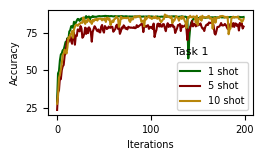

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

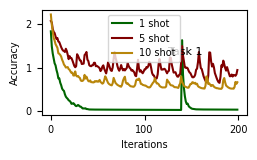

In [72]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

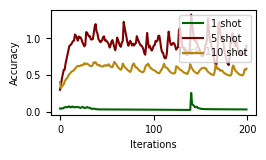

In [73]:
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [74]:
_reg_fit_loss61 = fit_loss
_reg_train_loss61 = train_loss11
_reg_accuracy61 = accuracy11

NameError: name 'fit_loss' is not defined

In [75]:
_reg_fit_loss61 = [0.024626702973336884,
 0.02609492793227687,
 0.03783691290653113,
 0.028054732264894428,
 0.03214395407474402,
 0.03514372218738903,
 0.04583159721258915,
 0.048122619137619484,
 0.040442369200966576,
 0.04392490152156714,
 0.04252723130312833,
 0.04300758423227252,
 0.051293053861820335,
 0.039785082593108666,
 0.04785320975563743,
 0.04490772318659407,
 0.041456949078675476,
 0.03238244625655087,
 0.03028691424564882,
 0.0367340264898358,
 0.028384022188909126,
 0.03112040211757024,
 0.022552789668693687,
 0.021054388503685142,
 0.02270638050906586,
 0.027003302097772106,
 0.02717694143454234,
 0.04065759022804824,
 0.03270452351055362,
 0.03199885825090336,
 0.035926766100932254,
 0.026111651649416395,
 0.008296541784974661,
 0.006405730435455387,
 0.006701411764052781,
 0.01136584380274695,
 0.02452821655650482,
 0.02813025585121729,
 0.010307452810758894,
 0.006439636200384209,
 0.005430555098097433,
 0.004122399329913385,
 0.003967065660452301,
 0.0037647429289239826,
 0.0037503760999463725,
 0.0037184016158183417,
 0.0036851494206172047,
 0.003733713264492425,
 0.003706009049589435,
 0.003672786085217288,
 0.003673670446556626,
 0.0036801177528545713,
 0.003703767758314357,
 0.0036842948474893064,
 0.003654710108865843,
 0.0036568061561521254,
 0.003659114749594168,
 0.003650132108084632,
 0.00365100072160589,
 0.0036562776517574534,
 0.003642807291312651,
 0.0036473757530929465,
 0.003645127011237271,
 0.003639104338645032,
 0.003665447933599353,
 0.0036600219918358507,
 0.003648746003763694,
 0.0036452680289971104,
 0.0036451796309627366,
 0.003648000204879226,
 0.003644062834086292,
 0.0036452463263589325,
 0.003646854099563577,
 0.0036585788722291136,
 0.0036460826187535668,
 0.00364132442822059,
 0.0036453076807612724,
 0.003640673010412491,
 0.0036398478938887515,
 0.003637469190201073,
 0.003633661414355491,
 0.003631205636669289,
 0.0036296261559155855,
 0.003628584429283034,
 0.0036274933778313975,
 0.0036260489176845913,
 0.0036252587187019262,
 0.003624639389189807,
 0.003623330457644029,
 0.0036237665000512743,
 0.0036207738713445988,
 0.0036199088843370027,
 0.003618998234301354,
 0.0036185714416205883,
 0.0036159217371746445,
 0.003615136787464673,
 0.003614459059793841,
 0.003613784323644006,
 0.003610655150348038,
 0.003610200502655723,
 0.0036097721648261404,
 0.0036075360593244886,
 0.003608375837123304,
 0.003609930228611285,
 0.003607331979737589,
 0.0036037675048591514,
 0.003613389710980383,
 0.003602874535841472,
 0.0036017108765063863,
 0.0035994007026381564,
 0.003597220349492449,
 0.0035954256062254763,
 0.0035935471991472173,
 0.0035910064523870296,
 0.0035897758154367857,
 0.0035885902841321445,
 0.003585934540200414,
 0.003584124408944538,
 0.0035818024877120147,
 0.0035800123093367524,
 0.0035804523945306287,
 0.003577907188710841,
 0.003574640229062149,
 0.003572536568919366,
 0.003570072628049688,
 0.003568603621908661,
 0.0035659166010604663,
 0.0035635743388962565,
 0.003561300535996755,
 0.0035602577439876218,
 0.00355781273295482,
 0.0035550230267373,
 0.003552926859507958,
 0.0035502097823403096,
 0.003547762210170428,
 0.0035452644312472053,
 0.003542498586642923,
 0.0035404403708084965,
 0.003537478299359932,
 0.00353482204743407,
 0.003531999011157137,
 0.003529111106851787,
 0.0035265468300856423,
 0.003523879698618795,
 0.003520934059369293,
 0.0035182957706803627,
 0.0035153040732962618,
 0.0035128754168523083,
 0.003509605917232958,
 0.00350651978938417,
 0.003503606245486122,
 0.0035001184565551353,
 0.0034970233400324078,
 0.0034944443384919205,
 0.003491537920622663,
 0.0034889724162040334,
 0.00348446080037816,
 0.003480579040831689,
 0.003477002176540819,
 0.00347384768820396,
 0.003470660307247079,
 0.0034665303855118427,
 0.003462879050692374,
 0.0034596148074011912,
 0.0034565901891751723,
 0.0034542773201158552,
 0.003451785630066738,
 0.003448254330027284,
 0.0034440006905545792,
 0.003441270835923426,
 0.0034363135963565473,
 0.0034341571965452395,
 0.0034296412204364033,
 0.0034251841434249372,
 0.003421263169553695,
 0.003417305859991095,
 0.003413341756006985,
 0.0034091738052666187,
 0.003405068133195693,
 0.0034013640798741217,
 0.0033970206877160253,
 0.0033927770952383676,
 0.0033892876835483494,
 0.0033846926649637294,
 0.003379761946923805,
 0.0033761624133948126,
 0.0033709668610809426,
 0.0033659587303797403,
 0.0033611650649232397,
 0.0033560724237538648,
 0.003351480481355931,
 0.0033463218432822914,
 0.003341678614643487,
 0.003336062231524424,
 0.0033307449440612936,
 0.003325540353685166,
 0.003320327988176635,
 0.0033146159751622968,
 0.003309208236521844,
 0.0033041646238416433]

In [76]:
_reg_train_loss61 = [1.830697673739809,
 1.6150010354591138,
 1.485252199750958,
 1.3171418688514016,
 1.17050935644092,
 1.0421336419654614,
 0.947088113336852,
 0.8737895344242905,
 0.7530599850596804,
 0.6624939450711915,
 0.5805606598203833,
 0.5133243997891744,
 0.48249283162030304,
 0.40144598032488965,
 0.36751593830007495,
 0.32313588826042233,
 0.30115035582672467,
 0.22951731153509833,
 0.19583394039760937,
 0.18728440006573996,
 0.15439429450215716,
 0.14336085534005455,
 0.11136769537221301,
 0.09124046281883211,
 0.09150303121317517,
 0.08728229576213793,
 0.08254838458290606,
 0.1172205066364823,
 0.09548278237608346,
 0.09778739794185667,
 0.09546509757637978,
 0.0715429445897991,
 0.029410531800804718,
 0.019622457016146545,
 0.01967732072102301,
 0.023893227631395512,
 0.048034224630982586,
 0.06230992600886208,
 0.026289337977879877,
 0.015280014538968151,
 0.01230599708629377,
 0.008254233197393742,
 0.007242143972579277,
 0.006437163926999678,
 0.006134282360135606,
 0.005753959712544174,
 0.005506407751729994,
 0.005484469615938989,
 0.005356199277395552,
 0.0050775874547208805,
 0.004972676492550157,
 0.0049266584612654915,
 0.004918368434477033,
 0.004842834314331412,
 0.004657409379653858,
 0.004599620263571992,
 0.004591066009280356,
 0.004491518674926324,
 0.004457301361429872,
 0.004417507344800414,
 0.0043661074049657946,
 0.004324706031404661,
 0.004298209621937889,
 0.004248988207881198,
 0.004252871639575019,
 0.004239757771067547,
 0.004184535478777958,
 0.004163613811022405,
 0.004140092934848684,
 0.004127168597540621,
 0.0041067068549719725,
 0.004083396556476752,
 0.004069973538262826,
 0.004058552165092392,
 0.004043259869583629,
 0.004016650113926241,
 0.004019917031242089,
 0.004000763676947717,
 0.003978520935175546,
 0.0039661897092380305,
 0.003947568365908934,
 0.003935237295191848,
 0.003922899070224075,
 0.00391611911949109,
 0.003905142431683613,
 0.0039019861018680263,
 0.0038865021020738463,
 0.003875720300570582,
 0.0038647401626362944,
 0.0038634620352902198,
 0.0038508452602069487,
 0.003843650652208563,
 0.0038401748928608317,
 0.0038321139855366764,
 0.0038231343002707668,
 0.003813433221005129,
 0.0038080400307521677,
 0.003806749831489993,
 0.0037937253487832618,
 0.0037897343846094427,
 0.003787842896682295,
 0.0037772518681418715,
 0.003773800076239488,
 0.0037738978933317194,
 0.0037661894210473156,
 0.0037554523724159508,
 0.003769376174067006,
 0.0037509431695622025,
 0.003748104688852574,
 0.003740066528376756,
 0.003734373529864983,
 0.003729309667974259,
 0.0037232131175132413,
 0.0037174540374315147,
 0.00371173913872829,
 0.0037130457701895275,
 0.0037039189289013543,
 0.0036995229593506365,
 0.00369568918408318,
 0.003689358384828224,
 0.003690143172262293,
 0.00368603848090226,
 0.0036790510992322006,
 0.003674365438972459,
 0.003668688414053935,
 0.0036651175821933784,
 0.003660629051878597,
 0.003655461911958727,
 0.0036514458161863413,
 0.003648585802169912,
 0.003643618988324747,
 0.0036403151426577206,
 0.003636425135262085,
 0.0036315527377706585,
 0.0036280696689518113,
 0.003623572015909083,
 0.0036184861832721667,
 0.003616099147069635,
 0.003610165874389085,
 0.0036058097964886465,
 0.0036019617621081343,
 0.003596845485100692,
 0.0035935056988488545,
 0.0035903995969530306,
 0.0035847944108712854,
 0.003581609626328855,
 0.0035763033171833463,
 0.003572932980728872,
 0.003568087767978961,
 0.0035634984361064253,
 0.00356080517821917,
 0.0035543181425468488,
 0.0035506927648164105,
 0.0035489252345128493,
 0.0035438826378209123,
 0.0035396987205427704,
 0.0035329579347462363,
 0.0035280399447814984,
 0.003523957852104848,
 0.0035208239869186373,
 0.0035171574122752204,
 0.0035108952768937206,
 0.003507660419651956,
 0.003502534074483044,
 0.0034994632640684194,
 0.003496201645413583,
 0.0034923087241071644,
 0.0034875801595097237,
 0.0034834780433977194,
 0.003480570623651147,
 0.003474269591441209,
 0.003470687661319971,
 0.003466958977338491,
 0.003462048134568966,
 0.0034587720451368527,
 0.0034539685020166817,
 0.003449845141872312,
 0.0034435504172561746,
 0.0034386688264820614,
 0.0034362282815643334,
 0.003430507512706699,
 0.0034267440170162554,
 0.003421985353766517,
 0.0034175502686676655,
 0.003412466503284646,
 0.0034088722260838204,
 0.0034029987414903712,
 0.003397350044300159,
 0.0033942818585218806,
 0.0033876181820012403,
 0.0033829883728740792,
 0.003377051078573321,
 0.0033719851282622776,
 0.0033663444602015343,
 0.0033605451145294037,
 0.0033552454516404505,
 0.003350417341359637,
 0.003343730268887047,
 0.003338337918235497,
 0.003334029500062267]

In [77]:
_reg_accuracy61 = [29.48870392390012,
 42.21165279429251,
 47.56242568370987,
 53.0321046373365,
 58.501783590963136,
 64.92271105826397,
 60.40428061831153,
 65.2794292508918,
 69.20332936979786,
 72.53269916765755,
 71.10582639714626,
 75.50535077288941,
 75.38644470868014,
 78.95362663495838,
 77.88347205707491,
 78.359096313912,
 80.14268727705112,
 81.6884661117717,
 82.52080856123662,
 83.115338882283,
 83.94768133174792,
 82.75862068965517,
 83.23424494649227,
 82.87752675386444,
 84.66111771700356,
 84.5422116527943,
 85.4934601664685,
 84.30439952437574,
 83.70986920332938,
 83.115338882283,
 83.59096313912009,
 84.18549346016647,
 84.89892984542212,
 85.73127229488703,
 85.4934601664685,
 84.78002378121285,
 85.4934601664685,
 84.42330558858502,
 85.37455410225921,
 84.42330558858502,
 84.66111771700356,
 84.18549346016647,
 84.66111771700356,
 84.30439952437574,
 84.78002378121285,
 84.66111771700356,
 84.30439952437574,
 84.66111771700356,
 84.5422116527943,
 84.5422116527943,
 84.18549346016647,
 84.5422116527943,
 83.94768133174792,
 84.5422116527943,
 84.66111771700356,
 84.66111771700356,
 84.89892984542212,
 84.66111771700356,
 84.5422116527943,
 84.78002378121285,
 84.89892984542212,
 84.42330558858502,
 84.78002378121285,
 84.78002378121285,
 84.78002378121285,
 84.66111771700356,
 84.78002378121285,
 84.78002378121285,
 84.66111771700356,
 84.42330558858502,
 84.5422116527943,
 84.66111771700356,
 84.5422116527943,
 84.66111771700356,
 84.42330558858502,
 84.5422116527943,
 84.5422116527943,
 84.5422116527943,
 84.5422116527943,
 84.30439952437574,
 84.30439952437574,
 84.5422116527943,
 84.30439952437574,
 84.66111771700356,
 84.5422116527943,
 84.5422116527943,
 84.5422116527943,
 84.30439952437574,
 84.66111771700356,
 84.30439952437574,
 84.66111771700356,
 84.30439952437574,
 84.5422116527943,
 84.18549346016647,
 84.66111771700356,
 84.78002378121285,
 84.66111771700356,
 84.30439952437574,
 84.66111771700356,
 84.66111771700356,
 84.18549346016647,
 84.5422116527943,
 84.5422116527943,
 84.66111771700356,
 84.5422116527943,
 84.30439952437574,
 84.66111771700356,
 84.5422116527943,
 84.5422116527943,
 84.30439952437574,
 84.5422116527943,
 84.66111771700356,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.5422116527943,
 84.5422116527943,
 84.30439952437574,
 84.18549346016647,
 84.0665873959572,
 84.42330558858502,
 84.18549346016647,
 84.18549346016647,
 84.30439952437574,
 84.30439952437574,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.18549346016647,
 84.30439952437574,
 84.18549346016647,
 84.30439952437574,
 84.30439952437574,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.42330558858502,
 84.18549346016647,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.18549346016647,
 84.5422116527943,
 84.18549346016647,
 84.30439952437574,
 84.42330558858502,
 84.30439952437574,
 84.30439952437574,
 84.42330558858502,
 84.42330558858502,
 84.30439952437574,
 84.5422116527943,
 84.18549346016647,
 84.42330558858502,
 84.42330558858502,
 84.30439952437574,
 84.42330558858502,
 84.42330558858502,
 84.5422116527943,
 84.42330558858502,
 84.18549346016647,
 84.42330558858502,
 84.5422116527943,
 84.18549346016647,
 84.18549346016647,
 84.30439952437574,
 84.5422116527943,
 84.5422116527943,
 84.66111771700356,
 84.42330558858502,
 84.5422116527943,
 84.5422116527943,
 84.5422116527943,
 84.30439952437574,
 84.66111771700356,
 84.78002378121285,
 84.66111771700356,
 84.42330558858502,
 84.42330558858502,
 84.42330558858502,
 85.01783590963139,
 84.5422116527943,
 84.42330558858502,
 84.42330558858502,
 84.42330558858502,
 84.42330558858502,
 84.78002378121285,
 84.78002378121285,
 84.5422116527943,
 84.18549346016647,
 84.18549346016647,
 84.18549346016647,
 84.66111771700356]

In [78]:
_reg_fit_loss62 = fit_loss
_reg_train_loss62 = train_loss11
_reg_accuracy62 = accuracy11

NameError: name 'fit_loss' is not defined

In [79]:
_reg_fit_loss62 = [0.039402102937503736,
 0.047062180480178524,
 0.05257000120318666,
 0.055540221078055244,
 0.0656695378069975,
 0.06698607911868971,
 0.06836585244353936,
 0.07332244880345402,
 0.07227078870851167,
 0.07635814194776575,
 0.07592591217585973,
 0.06690943545224715,
 0.07341385374263841,
 0.07359302074325327,
 0.06549705488949406,
 0.06848235884491279,
 0.06879930388258428,
 0.08066514788233504,
 0.06164114686603449,
 0.06797884229798706,
 0.06918048174405585,
 0.06588154955177891,
 0.066732115663436,
 0.05924157866713952,
 0.05355313465911515,
 0.05456456576226926,
 0.04918799670983334,
 0.06895557106757651,
 0.09406465535261194,
 0.06611829448719414,
 0.04878515780580287,
 0.0526749523622649,
 0.04551480231540544,
 0.05981492311978827,
 0.059335073646234006,
 0.05054196707752286,
 0.042310680053672015,
 0.039360315443909895,
 0.03904008416801083,
 0.03889967759653014,
 0.03878826184236273,
 0.038706510802920986,
 0.0386112562703843,
 0.03853663125512551,
 0.03843504114418614,
 0.0383402584310697,
 0.03823656429137502,
 0.03814955709540114,
 0.03807262779802692,
 0.03797945288979277,
 0.0379055883659392,
 0.03782297457967486,
 0.03771979559441002,
 0.03763615005478567,
 0.03753123774516339,
 0.03743808465648671,
 0.037328731952881326,
 0.037228159302351425,
 0.03715446294874561,
 0.03702926187186825,
 0.03690168641659678,
 0.03679021440294324,
 0.03668979677010556,
 0.03658162901292042,
 0.036479126738042246,
 0.03636595462353862,
 0.03627356947684775,
 0.036162963631201764,
 0.036046553935323446,
 0.03594079263964478,
 0.03582060321861384,
 0.03570642398328197,
 0.035588224627533735,
 0.03546559841048961,
 0.03534771768110139,
 0.035225357252116105,
 0.03509466198025918,
 0.034964638325024625,
 0.03483378773137015,
 0.034696487747893044,
 0.03456432919721214,
 0.034428494545269986,
 0.03431367592848077,
 0.03415371089869616,
 0.03403611716871359,
 0.033856079818642866,
 0.03370805122718519,
 0.033563519694975445,
 0.033410469868353436,
 0.03328851952540631,
 0.03312337809071249,
 0.03294545898632127,
 0.032770823535262325,
 0.03260700670736177,
 0.03244568437946086,
 0.03228864339845521,
 0.032138929151150644,
 0.03197602365089922,
 0.03182518641863551,
 0.03166078411194743,
 0.031486118934592425,
 0.0313193391324306,
 0.031146552451715177,
 0.03097303873118089,
 0.03084982676925708,
 0.030665293107835615,
 0.030498142031078437,
 0.010378796949374432,
 0.16214683651924133,
 0.09950540503677056,
 0.08523130873028113,
 0.07560486521343796,
 0.06719762923157944,
 0.06593654988979807,
 0.05034991019234365,
 0.05088339860037881,
 0.04742222750673489,
 0.044824667198925604,
 0.04616898199429317,
 0.04422099424564108,
 0.08803721749204763,
 0.07519379911982284,
 0.05370788861598287,
 0.04873734849448107,
 0.04401508414623689,
 0.041548935430390496,
 0.041268435135787845,
 0.04112482124141285,
 0.04098896188091258,
 0.04085219164892119,
 0.04072213887560124,
 0.040577812690515906,
 0.04044006232704435,
 0.04030097701719829,
 0.040162840744062345,
 0.040042243517783224,
 0.03992646354801801,
 0.03981372561989999,
 0.039698545573925485,
 0.0395778405423067,
 0.03945674427918026,
 0.03933676902432831,
 0.03921420241192895,
 0.0390901761699696,
 0.03896499752086036,
 0.038842899230669956,
 0.03871534308608698,
 0.03858589411390071,
 0.03845503006358536,
 0.03832503735106819,
 0.03819888746555971,
 0.03807022802683772,
 0.037939499075315436,
 0.0378046486602754,
 0.03767072964383631,
 0.03753537061263104,
 0.037399819843014895,
 0.037262459874761344,
 0.03712301898975762,
 0.03698098302191617,
 0.03683893230496621,
 0.03669471164443055,
 0.036549982595808654,
 0.03640331403941524,
 0.036253197460758446,
 0.03610276925016423,
 0.03595111184582418,
 0.03579777570403352,
 0.03564130051099524,
 0.03548370210491881,
 0.03532566913232511,
 0.035163763226295004,
 0.03500166839482833,
 0.03483846297069472,
 0.03467149530746499,
 0.03450480407598067,
 0.034335860336313445,
 0.03416691500009322,
 0.03399959655136478,
 0.03383263801129497,
 0.03365415076212007,
 0.033476688880093246,
 0.033306902540581565,
 0.033116133465450635,
 0.03293141471792241,
 0.032747279244418045,
 0.032565905123340844,
 0.03239236125836567,
 0.032196951992049506,
 0.03207569379283457,
 0.0319911998753645,
 0.03175132592417756,
 0.0314941471632646,
 0.031280575130058795,
 0.031093732016731282,
 0.030885691241342193,
 0.030673155941221178,
 0.03046361307556532,
 0.030260158892796964,
 0.030066140870354613]

In [80]:
_reg_train_loss62 = [1.8206009962120835,
 1.4891869000026159,
 1.2946565005244042,
 1.1446477223415763,
 1.0424452606512575,
 0.9442519217121358,
 0.8386789061585251,
 0.7699798339483689,
 0.6853196079633674,
 0.6178947042445747,
 0.5812716417166651,
 0.4658043798135251,
 0.41415361695143643,
 0.3693460758243288,
 0.3118677321745425,
 0.2880757945228596,
 0.25379358901053056,
 0.2679477508883087,
 0.19793640350808903,
 0.18991299186434066,
 0.17364966443606786,
 0.16825581174723955,
 0.14521228810962367,
 0.1342659168401543,
 0.10440962921295847,
 0.09783633159739631,
 0.08245565293698895,
 0.10805313007868066,
 0.15651642956904002,
 0.11709219544213645,
 0.07420362144404528,
 0.07730498354958028,
 0.05985002462961236,
 0.08118900428621137,
 0.08706433554084933,
 0.06796110801550807,
 0.05030855582076676,
 0.043369618225462585,
 0.041823931342485,
 0.041057447389680514,
 0.040614278644931556,
 0.04035042484804076,
 0.040052615334184805,
 0.039889084365294904,
 0.039666892314443786,
 0.03950210387001232,
 0.039274138227409244,
 0.03913353938533335,
 0.0389971062541008,
 0.03883676717475969,
 0.03873086515433934,
 0.03860520883178224,
 0.03846072990979467,
 0.038337307240889996,
 0.038216017262668024,
 0.038093499307121546,
 0.03795046883882308,
 0.03783850151361251,
 0.03774745754745542,
 0.037612234223253875,
 0.03746152745217693,
 0.03733181801377511,
 0.03722061346075973,
 0.03709715483139972,
 0.03698583175333179,
 0.03686005918651211,
 0.03675494441876606,
 0.03664135104235338,
 0.036505747358409724,
 0.036394222278376014,
 0.036270986178091595,
 0.03615884193960501,
 0.0360286114167194,
 0.03589681018980182,
 0.03578034134543672,
 0.035645600256262996,
 0.035523139776623976,
 0.03538263748799052,
 0.03526147006421673,
 0.03511693723955933,
 0.03497647144356553,
 0.03484801507117797,
 0.034748525187677265,
 0.03457654518436412,
 0.03444498100755166,
 0.03426935181629901,
 0.034119866028123974,
 0.03398173766172662,
 0.03382529135869474,
 0.03370815439491856,
 0.03353537406240191,
 0.03336445059703321,
 0.033189636712171594,
 0.03303792129973976,
 0.032878946436911215,
 0.032706079434375375,
 0.03257399797439575,
 0.03240085986195779,
 0.032280138712756486,
 0.0320884824863502,
 0.03190927564793704,
 0.03175898588129452,
 0.03158430899588429,
 0.03141136053113305,
 0.0313258521943068,
 0.031112550586766125,
 0.03097938837445512,
 0.43127041739620725,
 1.0776521502708902,
 0.455171033131833,
 0.2485050774958669,
 0.15998061396637742,
 0.12753657745767613,
 0.11392492496845674,
 0.07503350329946498,
 0.06823184987416073,
 0.05929511382567639,
 0.05313152918706135,
 0.05282884554899469,
 0.048505805280743816,
 0.12888964029903316,
 0.1087806332020127,
 0.06916497579338599,
 0.057928532970194915,
 0.049139607469646296,
 0.043317586715732305,
 0.04236581176519394,
 0.04201988951892269,
 0.04177120335552157,
 0.04154911378816682,
 0.0413432777384106,
 0.04116060105817659,
 0.04096939680831773,
 0.040794268858676055,
 0.04061931546549408,
 0.04047146629618139,
 0.04033125579661252,
 0.040195771778116424,
 0.04006305466196975,
 0.03992370257572252,
 0.0397863862465839,
 0.039656036286329736,
 0.03952154775663298,
 0.03938615481768336,
 0.03925090237539642,
 0.03912106392030813,
 0.03898883284050591,
 0.03885097718056368,
 0.03871464318766886,
 0.03858020217442999,
 0.038448759715776056,
 0.03831420055761629,
 0.03818631628338171,
 0.038042482748931766,
 0.03791078970748551,
 0.03776914314651976,
 0.037630489362137656,
 0.0374952214865052,
 0.037349562027624676,
 0.03720546004419424,
 0.037062941689272315,
 0.03691797984801993,
 0.03677616815785972,
 0.03662636435153533,
 0.036477320580458154,
 0.03632604520843954,
 0.03617591684570118,
 0.03602175353741159,
 0.035864826595904876,
 0.03570923346037767,
 0.03555071186654422,
 0.03539249559446257,
 0.03522942009933141,
 0.035070658946523864,
 0.034908009655013374,
 0.034742181094325315,
 0.034573628662192095,
 0.03440592263121994,
 0.03425018056010713,
 0.03407872551862074,
 0.033903109403897305,
 0.033727239589301905,
 0.03357495314308575,
 0.03337117368165327,
 0.03318834836993899,
 0.03300912739062796,
 0.0328365973367983,
 0.03265773102032895,
 0.03247095507626631,
 0.03238020502791113,
 0.03233608512245879,
 0.03206276756768324,
 0.03177284631802111,
 0.03156894810345708,
 0.0313824828410027,
 0.03118664242935424,
 0.03096179542492847,
 0.030757140520275856,
 0.03056096559276386,
 0.030379591737778818]

In [81]:
_reg_accuracy62 = [34.720570749108205,
 48.51367419738407,
 54.81569560047562,
 53.269916765755056,
 62.30677764565993,
 63.97146254458978,
 67.77645659928656,
 67.65755053507729,
 72.05707491082045,
 70.27348394768133,
 73.2461355529132,
 76.57550535077289,
 77.05112960761,
 75.26753864447087,
 80.7372175980975,
 81.09393579072533,
 79.90487514863258,
 82.1640903686088,
 84.66111771700356,
 84.18549346016647,
 83.70986920332938,
 85.25564803804994,
 83.35315101070155,
 84.5422116527943,
 85.37455410225921,
 85.96908442330559,
 86.92033293697979,
 84.5422116527943,
 83.115338882283,
 85.73127229488703,
 84.18549346016647,
 85.73127229488703,
 84.66111771700356,
 84.18549346016647,
 85.61236623067776,
 85.01783590963139,
 86.44470868014268,
 86.68252080856124,
 85.4934601664685,
 86.68252080856124,
 86.08799048751486,
 86.68252080856124,
 86.56361474435197,
 86.68252080856124,
 86.56361474435197,
 86.8014268727705,
 86.92033293697979,
 86.8014268727705,
 86.8014268727705,
 86.56361474435197,
 86.68252080856124,
 86.92033293697979,
 86.8014268727705,
 86.8014268727705,
 86.32580261593341,
 86.8014268727705,
 86.8014268727705,
 86.92033293697979,
 86.68252080856124,
 86.68252080856124,
 86.68252080856124,
 86.92033293697979,
 86.68252080856124,
 86.8014268727705,
 86.8014268727705,
 86.68252080856124,
 86.8014268727705,
 86.8014268727705,
 86.68252080856124,
 86.56361474435197,
 86.8014268727705,
 86.56361474435197,
 86.44470868014268,
 86.08799048751486,
 86.56361474435197,
 86.68252080856124,
 86.56361474435197,
 86.68252080856124,
 86.44470868014268,
 86.20689655172414,
 86.44470868014268,
 86.32580261593341,
 86.44470868014268,
 86.08799048751486,
 86.08799048751486,
 86.44470868014268,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 86.44470868014268,
 86.32580261593341,
 86.20689655172414,
 86.44470868014268,
 86.32580261593341,
 86.56361474435197,
 86.44470868014268,
 86.56361474435197,
 86.20689655172414,
 86.32580261593341,
 86.08799048751486,
 86.20689655172414,
 86.68252080856124,
 86.56361474435197,
 86.56361474435197,
 53.15101070154578,
 76.21878715814506,
 78.95362663495838,
 85.25564803804994,
 86.44470868014268,
 84.78002378121285,
 84.5422116527943,
 85.4934601664685,
 87.03923900118906,
 85.25564803804994,
 85.25564803804994,
 85.4934601664685,
 86.44470868014268,
 82.75862068965517,
 84.78002378121285,
 86.68252080856124,
 84.89892984542212,
 86.68252080856124,
 85.96908442330559,
 85.96908442330559,
 85.85017835909632,
 86.08799048751486,
 85.96908442330559,
 86.32580261593341,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 86.20689655172414,
 85.96908442330559,
 85.96908442330559,
 85.96908442330559,
 86.08799048751486,
 85.73127229488703,
 85.96908442330559,
 85.85017835909632,
 85.85017835909632,
 86.08799048751486,
 85.61236623067776,
 85.85017835909632,
 85.96908442330559,
 85.73127229488703,
 85.73127229488703,
 85.61236623067776,
 85.85017835909632,
 85.73127229488703,
 85.73127229488703,
 85.85017835909632,
 86.08799048751486,
 85.73127229488703,
 85.73127229488703,
 85.73127229488703,
 85.61236623067776,
 85.85017835909632,
 85.61236623067776,
 85.61236623067776,
 85.61236623067776,
 85.73127229488703,
 85.61236623067776,
 85.61236623067776,
 85.37455410225921,
 85.61236623067776,
 85.73127229488703,
 85.4934601664685,
 85.61236623067776,
 85.61236623067776,
 85.85017835909632,
 85.73127229488703,
 85.85017835909632,
 85.96908442330559,
 85.85017835909632,
 85.85017835909632,
 85.96908442330559,
 85.73127229488703,
 85.73127229488703,
 86.32580261593341,
 86.32580261593341,
 86.44470868014268,
 86.20689655172414,
 86.56361474435197,
 86.56361474435197,
 86.08799048751486,
 86.68252080856124,
 86.92033293697979,
 86.92033293697979,
 86.8014268727705,
 86.44470868014268]

In [82]:
_reg_fit_loss63 = fit_loss
_reg_train_loss63 = train_loss11
_reg_accuracy63 = accuracy11

NameError: name 'fit_loss' is not defined

In [83]:
_reg_fit_loss63 = [0.223372931383094,
 0.3394423820534531,
 0.3755584699766977,
 0.39174207011047674,
 0.4637516615342121,
 0.5514744945934841,
 0.6055536671560637,
 0.6655420405524117,
 0.6914166309395615,
 0.732170540459302,
 0.7419137127545415,
 0.7124280321354769,
 0.7447903837476458,
 0.7782221558142681,
 0.8136748805338022,
 0.8139540723391941,
 0.7536867127126577,
 0.7869681521337859,
 0.808364601767793,
 0.7672453401040058,
 0.7545052912770486,
 0.8689578954054384,
 0.8243058846921337,
 0.7799408216865695,
 0.7495803978978371,
 0.7841024192012086,
 0.9623717385895398,
 0.9149456425588958,
 0.8900713932757475,
 0.8257748107520901,
 0.7737061308354748,
 0.7358683493672585,
 0.7796787291157002,
 0.7706105417134811,
 0.7736788951620763,
 0.7585184440320852,
 0.808179142523785,
 0.8026674122226481,
 0.7682526391379687,
 0.7580344287716613,
 0.7204428424640578,
 0.6852384489409777,
 0.6708763898635397,
 0.6739313991702333,
 0.6987931752691463,
 0.7640380530941243,
 0.8329991381995532,
 0.7901220200013142,
 0.7437118608124402,
 0.7637057267889684,
 0.718959062683339,
 0.7447880847113473,
 0.7504893371037075,
 0.8019935963105183,
 0.7809255804334369,
 0.7947642949162698,
 0.7794344960426798,
 0.7408509619381963,
 0.732063500248656,
 0.6762055073465619,
 0.6386616935535353,
 0.6066713917012118,
 0.5770933263155879,
 0.5499510643433552,
 0.5250515402579794,
 0.5028946004351791,
 0.48844382592609953,
 0.46513256613089116,
 0.443805954894241,
 0.4525902173957046,
 0.6922378552203275,
 0.8013878622833563,
 0.8006480080740792,
 0.779416179170414,
 0.7244673310493936,
 0.6802340417492146,
 0.6657730085509164,
 0.6844668960084721,
 0.6547970017608331,
 0.6945582652578548,
 0.7864422068303946,
 0.7440371695829897,
 0.7677144931287182,
 0.7433192729949951,
 0.6776395075175227,
 0.6327287554740906,
 0.5981007571123085,
 0.5680889657565525,
 0.5402487784015889,
 0.5155684692519051,
 0.4936712986352492,
 0.639654312814985,
 0.8695768957235375,
 0.8333175462119433,
 0.7750206005816557,
 0.7624156657530337,
 0.7519400922619567,
 0.757011176372061,
 0.7427591109762386,
 0.7325195013260355,
 0.7084920807760589,
 0.6660277515041585,
 0.6276905913742221,
 0.5926590282089856,
 0.5668222356815728,
 0.5471734355907051,
 0.5189113008732699,
 0.4953338023351163,
 0.4738652292562991,
 0.4569378738500634,
 0.4411371222564152,
 0.4305306216891931,
 0.6241533658942398,
 0.9880742284716392,
 1.0128947508578399,
 0.9789821700173982,
 0.8633112019422103,
 0.825624198329692,
 0.8382108917041701,
 0.8259510178955234,
 0.8271110678205684,
 0.8077212000379757,
 0.7605919010785162,
 0.7087297403082555,
 0.665533819977118,
 0.6537914811348429,
 0.6265046851975578,
 0.5970298964150098,
 0.5674573231716545,
 0.5402320745039959,
 0.5156669762669778,
 0.49309527934813985,
 0.4773360600276869,
 0.5867523623972523,
 0.7330433032950576,
 0.7533873100670017,
 0.7784153697442036,
 0.7430766504638049,
 0.7148879036611441,
 0.8159104111243267,
 0.7656981799067283,
 0.7565750163428637,
 0.7417745067148792,
 0.8463975191116333,
 0.8042208832137439,
 0.7551995467166511,
 0.695019048087451,
 0.6617793331340868,
 0.6370649629709672,
 0.6090902661790654,
 0.5797805214414791,
 0.5530583384085674,
 0.52893129903443,
 0.5070043090654879,
 0.49096184786485164,
 0.46920290041942986,
 0.4521460764262141,
 0.4355502055615795,
 0.5915975826127189,
 0.7207271651345857,
 0.7311484302793231,
 0.6957451701164246,
 0.6866025705726779,
 0.6379999153468073,
 0.5896009839310938,
 0.5519466108205368,
 0.5193700352493598,
 0.49077585035440874,
 0.4651471990711835,
 0.4424104921671809,
 0.4232037164727036,
 0.4060828564118366,
 0.660407900202031,
 1.0411842733013386,
 0.9406653168250103,
 0.9333303911345345,
 0.8349385565640975,
 0.8002987929752895,
 0.7768049896979818,
 0.7478171149078681,
 0.7160837382686381,
 0.7103993977819171,
 0.7017359745745756,
 0.6700823148902582,
 0.6656548526822305,
 0.638714929016269,
 0.5990411249958739,
 0.5673537108362937,
 0.5401784619506524,
 0.5151119280834587,
 0.49243856449516454,
 0.47219716894383335,
 0.4864772393995402,
 0.5857018731078323,
 0.697864755075805,
 0.752420931446309,
 0.7510531836626481,
 0.7439825194222587,
 0.7363284862771327,
 0.7354091941093912]

In [84]:
_reg_train_loss63 = [1.9776049317145834,
 1.8129634735535602,
 1.701348866735186,
 1.57262722570069,
 1.4706714907471015,
 1.371606865707709,
 1.3000664029802596,
 1.309031496242601,
 1.2454949203802614,
 1.156511637629295,
 1.1552234000089217,
 0.9982837256120176,
 1.0395484299075848,
 1.0113882252148219,
 1.0493253031555487,
 1.0412429388688536,
 0.8971928126957952,
 0.9357010941116177,
 0.9519664462731809,
 0.8761951412473407,
 0.8399157061868784,
 1.0651540756225586,
 1.0034852137370986,
 0.8673795133220906,
 0.8294153213500977,
 0.8459978979461047,
 1.2650264793512773,
 1.0850133640425546,
 0.9848993092167134,
 0.8823975166495965,
 0.8235185049018081,
 0.7673797169510199,
 0.8390861725320622,
 0.8115780365710356,
 0.8264962532082383,
 0.8120019800808965,
 0.8665464435304914,
 0.8814905310163692,
 0.8007633467109836,
 0.806538458989591,
 0.7489413789340428,
 0.7034881236601849,
 0.6856586702015935,
 0.6930619101135098,
 0.7306254031706829,
 0.8096977910216974,
 0.924945339864614,
 0.8429715973990304,
 0.7735376698630196,
 0.8139369414777172,
 0.743852440191775,
 0.7836112611147822,
 0.7834145864661859,
 0.856703622000558,
 0.8333471636382901,
 0.849281329281476,
 0.8427431802360379,
 0.7631459150995527,
 0.7608525193467433,
 0.6863996800111265,
 0.6446085791198575,
 0.6109556190821589,
 0.5810084732211366,
 0.5542028996409202,
 0.5297444061357148,
 0.5083381478883782,
 0.49454512644787224,
 0.47064315482061736,
 0.4493767722528808,
 0.4666009958909482,
 0.7938535724367414,
 0.9532567785710705,
 0.9047860113941893,
 0.8694551550612157,
 0.7590161221367973,
 0.7045518792405421,
 0.692510939374262,
 0.7115362055447637,
 0.6692901059072844,
 0.734301435704134,
 0.8718745161075981,
 0.7850554317844157,
 0.8147458507090198,
 0.785262039729527,
 0.6954664624467188,
 0.6416793952182848,
 0.6026340285126044,
 0.5717455915042332,
 0.5435466936656407,
 0.5193522621174248,
 0.49767196117615214,
 0.7229121783558203,
 1.0633564408944578,
 0.8981666005387599,
 0.8123520393760837,
 0.8114979486076199,
 0.7815905675596121,
 0.7906381816280131,
 0.7693499947080806,
 0.7722184889170588,
 0.7393177407128471,
 0.6789510736660082,
 0.6365908250516775,
 0.5971692447759667,
 0.5709339720862252,
 0.5560380402876406,
 0.5230442042253456,
 0.49966986021217036,
 0.4777629886354719,
 0.4614112565712053,
 0.44557096520248723,
 0.43581381805089053,
 0.7008321187934097,
 1.3648683465256983,
 1.1702320575714111,
 1.070238047716569,
 0.9040521006194913,
 0.8627718869520693,
 0.8863478400269333,
 0.8646417320991049,
 0.8837930328991949,
 0.8485000778217705,
 0.7834305665930923,
 0.7216874640815112,
 0.6716664798405706,
 0.6629668352555256,
 0.6323155018748069,
 0.6012926150341423,
 0.5707503326085149,
 0.5434145148919554,
 0.5190843063957837,
 0.4967645084371372,
 0.48282228440654523,
 0.632600161494041,
 0.8285278738761435,
 0.8399301657871324,
 0.84637685819548,
 0.7825946236143306,
 0.7513675385591935,
 0.8597251858030047,
 0.7859285035911872,
 0.7856200361738399,
 0.7768339368761802,
 0.9487532802990505,
 0.8465232301731499,
 0.773737794282485,
 0.7067771213395255,
 0.6684500052004444,
 0.6439189825739179,
 0.6150435379573277,
 0.5833697562315026,
 0.5562322127575777,
 0.5321673544085755,
 0.5106312754202862,
 0.4948085491754571,
 0.47418494796266364,
 0.4561167572225843,
 0.4404482707685354,
 0.6444659166190089,
 0.8131408618420971,
 0.7765092399655557,
 0.7179750860953817,
 0.7188547569878248,
 0.6526905444203591,
 0.595462369675539,
 0.5554289842138485,
 0.5221484364295492,
 0.49361500387289087,
 0.4685259339760761,
 0.446293262194614,
 0.42804982771678846,
 0.4109692409330485,
 0.7899201469761985,
 1.2559431024960108,
 1.02043344414964,
 0.9982915776116508,
 0.8721328839963797,
 0.8297301153747403,
 0.8194052941945135,
 0.7727869019216421,
 0.730071488691836,
 0.7264536254260004,
 0.7240984780447823,
 0.6792021418104366,
 0.6808350402481702,
 0.6480855807966116,
 0.6049948663127666,
 0.5707021331300541,
 0.543340655005708,
 0.5186576806769079,
 0.4962071083029922,
 0.4763800909324568,
 0.4963177284415887,
 0.6179477171022065,
 0.7541978432207691,
 0.802512390272958,
 0.7765340671247366,
 0.7768678689489559,
 0.7753892589588555,
 0.7528688895459078]

In [85]:
_reg_accuracy63 = [33.17479191438763,
 42.687277051129605,
 46.37336504161712,
 49.464922711058264,
 54.81569560047562,
 61.11771700356718,
 63.020214030915575,
 67.06302021403091,
 69.9167657550535,
 70.03567181926279,
 71.8192627824019,
 75.6242568370987,
 74.31629013079667,
 73.7217598097503,
 72.7705112960761,
 77.28894173602853,
 79.19143876337694,
 78.359096313912,
 79.19143876337694,
 79.66706302021403,
 77.76456599286564,
 76.09988109393579,
 80.38049940546968,
 80.97502972651606,
 80.26159334126041,
 78.12128418549347,
 74.79191438763377,
 79.66706302021403,
 81.45065398335315,
 82.1640903686088,
 82.52080856123662,
 80.26159334126041,
 81.92627824019024,
 80.02378121284185,
 82.52080856123662,
 81.2128418549346,
 79.90487514863258,
 81.92627824019024,
 81.92627824019024,
 79.54815695600476,
 81.09393579072533,
 82.52080856123662,
 81.92627824019024,
 79.66706302021403,
 81.56956004756242,
 78.359096313912,
 78.71581450653983,
 81.80737217598097,
 83.47205707491082,
 81.80737217598097,
 83.47205707491082,
 80.02378121284185,
 82.28299643281808,
 81.45065398335315,
 82.6397146254459,
 83.35315101070155,
 82.52080856123662,
 81.80737217598097,
 83.115338882283,
 84.89892984542212,
 84.66111771700356,
 84.5422116527943,
 84.42330558858502,
 84.66111771700356,
 84.30439952437574,
 85.01783590963139,
 84.0665873959572,
 84.5422116527943,
 84.42330558858502,
 82.1640903686088,
 75.50535077288941,
 77.52675386444709,
 78.95362663495838,
 82.40190249702735,
 81.80737217598097,
 82.40190249702735,
 78.83472057074911,
 82.1640903686088,
 81.33174791914388,
 78.59690844233056,
 82.04518430439953,
 79.90487514863258,
 81.2128418549346,
 82.52080856123662,
 82.52080856123662,
 82.40190249702735,
 84.18549346016647,
 83.82877526753865,
 84.42330558858502,
 83.59096313912009,
 82.75862068965517,
 71.10582639714626,
 79.42925089179548,
 81.09393579072533,
 79.7859690844233,
 80.7372175980975,
 82.04518430439953,
 81.33174791914388,
 81.45065398335315,
 78.83472057074911,
 82.04518430439953,
 81.56956004756242,
 82.1640903686088,
 82.52080856123662,
 82.52080856123662,
 83.35315101070155,
 83.23424494649227,
 84.30439952437574,
 84.18549346016647,
 84.18549346016647,
 84.42330558858502,
 83.94768133174792,
 78.71581450653983,
 76.45659928656362,
 80.02378121284185,
 82.40190249702735,
 83.82877526753865,
 79.90487514863258,
 81.6884661117717,
 79.90487514863258,
 80.26159334126041,
 82.1640903686088,
 81.45065398335315,
 81.80737217598097,
 84.0665873959572,
 81.92627824019024,
 82.99643281807373,
 82.75862068965517,
 82.99643281807373,
 82.52080856123662,
 82.28299643281808,
 83.23424494649227,
 79.7859690844233,
 79.54815695600476,
 79.42925089179548,
 79.42925089179548,
 80.38049940546968,
 80.38049940546968,
 76.45659928656362,
 82.40190249702735,
 80.02378121284185,
 83.47205707491082,
 76.45659928656362,
 80.97502972651606,
 81.45065398335315,
 81.80737217598097,
 81.80737217598097,
 82.75862068965517,
 82.28299643281808,
 82.6397146254459,
 82.6397146254459,
 82.6397146254459,
 82.40190249702735,
 82.99643281807373,
 82.28299643281808,
 83.23424494649227,
 83.115338882283,
 81.09393579072533,
 78.59690844233056,
 80.85612366230677,
 81.09393579072533,
 80.14268727705112,
 82.1640903686088,
 82.87752675386444,
 81.33174791914388,
 82.52080856123662,
 82.87752675386444,
 83.35315101070155,
 83.59096313912009,
 83.70986920332938,
 82.28299643281808,
 82.75862068965517,
 74.19738406658739,
 79.07253269916765,
 79.42925089179548,
 77.64565992865636,
 80.85612366230677,
 79.90487514863258,
 80.38049940546968,
 80.14268727705112,
 79.90487514863258,
 79.7859690844233,
 79.54815695600476,
 80.14268727705112,
 79.54815695600476,
 80.49940546967895,
 81.6884661117717,
 81.6884661117717,
 81.80737217598097,
 81.6884661117717,
 81.80737217598097,
 82.28299643281808,
 81.45065398335315,
 80.61831153388823,
 79.90487514863258,
 79.7859690844233,
 81.56956004756242,
 80.7372175980975,
 80.61831153388823,
 81.6884661117717]

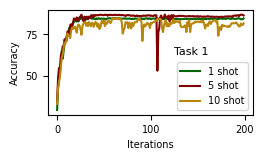

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy61, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy62, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

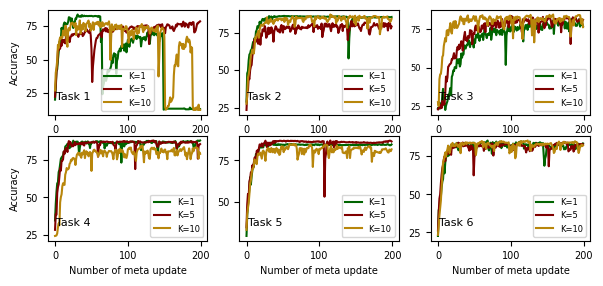

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_accuracy21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_reg_accuracy51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_reg_accuracy41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.12, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_reg_accuracy31, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy33, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_reg_accuracy61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy63, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_reg_accuracy11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_accuracy12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_accuracy13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('adaptive-acc.pdf')
plt.show()

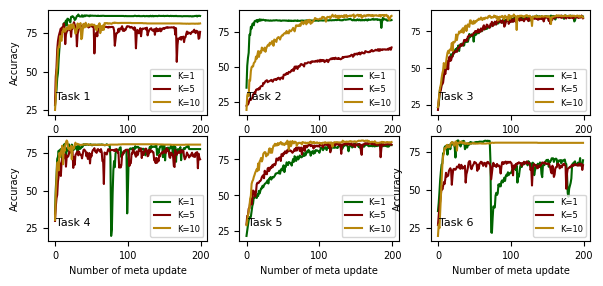

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_accuracy21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_accuracy51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_accuracy41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.12, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_accuracy31, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy33, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_accuracy61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy63, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_accuracy11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-acc.pdf')
plt.show()

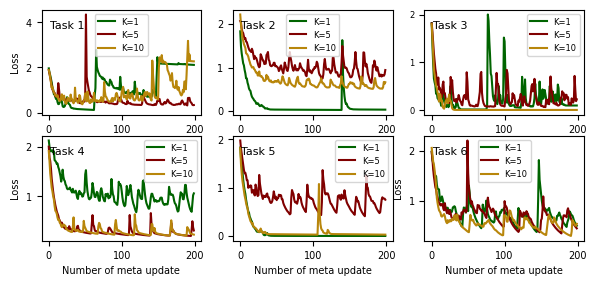

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_train_loss21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_reg_train_loss51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_train_loss31, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss33, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.8, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_reg_train_loss33, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss31, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_reg_train_loss61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss63, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss62, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_reg_train_loss11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_train_loss12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_train_loss13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('adaptation-loss.pdf')
plt.show()

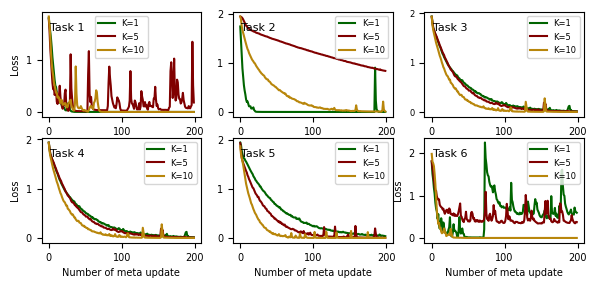

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_train_loss21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_train_loss51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_train_loss41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.8, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_train_loss41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_train_loss61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss63, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_train_loss11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-loss.pdf')
plt.show()

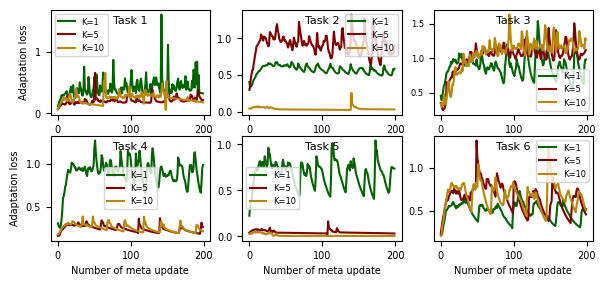

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_reg_fit_loss23, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss21, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_reg_fit_loss53, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss51, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Adaption loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_reg_fit_loss43, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss41, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.5, 0.85, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_reg_fit_loss33, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss31, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_reg_fit_loss63, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss61, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_reg_fit_loss13, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_reg_fit_loss12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_reg_fit_loss11, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Adapattion loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-fit.pdf')
plt.show()

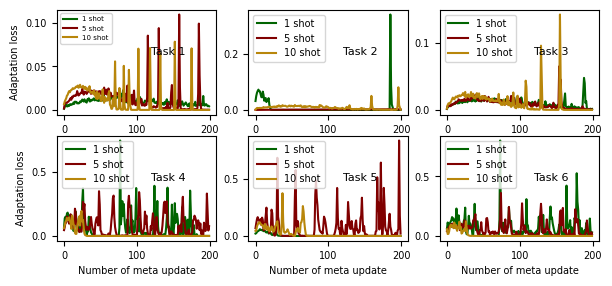

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_fit_loss61, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss62, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=5)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_fit_loss51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_fit_loss41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_fit_loss31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_fit_loss21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_fit_loss11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.savefig('adaptative-fit.pdf')
plt.show()

In [91]:
_fit_loss11 = [0.06277605259057248,
 0.11282062982067917,
 0.07892176599213571,
 0.09690769513448079,
 0.10577407569596262,
 0.12000185431856097,
 0.13134240742885706,
 0.15828073340834994,
 0.1350186731327664,
 0.1464790263862321,
 0.07472562485120514,
 0.07062442953500783,
 0.12617955368125078,
 0.2298330780908917,
 0.12767304472667587,
 0.07113385038224584,
 0.1728398029156255,
 0.11415729506618598,
 0.0711474893491179,
 0.054688111282743965,
 0.05665927802240758,
 0.03899484714951761,
 0.07218942554335984,
 0.12249723521315238,
 0.1453828501910197,
 0.23753817613716377,
 0.03863741782366891,
 0.014001852484921763,
 0.01673287255901166,
 0.0817956713056474,
 0.16898836309767581,
 0.09312893959665389,
 0.10350513456890467,
 0.08548077547598179,
 0.058295928977630945,
 0.0071786509106321755,
 0.008941601349678504,
 0.1303328470509741,
 0.2691289836992369,
 0.09586198965773678,
 0.048407160602933305,
 0.12236804104621556,
 0.12147036589786611,
 0.04158213433719759,
 0.049284101273687236,
 0.005163132659369942,
 0.004212720514811791,
 0.002424778637787588,
 0.008960644078911173,
 0.0005072208082172879,
 0.00033891555944082387,
 0.000283610517599162,
 0.0016577649539199642,
 0.0007207683008938616,
 0.00014917054601186686,
 0.0001775898019872963,
 0.0002366967177687746,
 0.00017894877183524923,
 0.00018081706450561109,
 0.0002133540270629434,
 0.00020266838758385401,
 0.00021827621752422465,
 0.00018742722968592275,
 0.00018626090934848241,
 0.0001819645541204271,
 0.00027234694031514636,
 0.0011622033942771711,
 0.00027365196045235336,
 0.00021983098704462614,
 0.00020181672757437562,
 0.00020586738611255538,
 0.00030983618860215177,
 0.13480215810229468,
 0.8003221262585033,
 0.10069285017071349,
 0.05449617089647235,
 0.03826828797658285,
 0.11078110608187589,
 0.0585338988087394,
 0.09023447921781828,
 0.0700763129826748,
 0.025693136634248676,
 0.0773238738377889,
 0.08127340855020465,
 0.07124441049315712,
 0.2412490424784747,
 0.12780068588979315,
 0.11102123423056169,
 0.1274568700429165,
 0.033338838454448814,
 0.03357908355467247,
 0.035000160336494446,
 0.044415298736456665,
 0.032514214515686035,
 0.02502268236694914,
 0.03149295033830585,
 0.009837495106639284,
 0.025269763487758057,
 0.041908597855856926,
 0.014682127670808271,
 0.03157810008887089,
 0.03259693311922478,
 0.036771087483926254,
 0.012512407745375778,
 0.015204209044124142,
 0.03857417043411371,
 0.06469225499666098,
 0.09024129062891006,
 0.028026610838644432,
 0.3085379817269065,
 0.09634767427588954,
 0.08932188017801805,
 0.029134353905013115,
 0.041885304180058563,
 0.024864591883890556,
 0.0441030403881362,
 0.03319254472400203,
 0.020105749368667603,
 0.020032598665266327,
 0.014952579230973215,
 0.010665763508189808,
 0.02913334130337744,
 0.0230884285587253,
 0.043216630816459656,
 0.04212499703421737,
 0.06250666172215433,
 0.16107716162999472,
 0.08848997724778725,
 0.17140109904787756,
 0.133690117660797,
 0.03318211255651532,
 0.031202073350097195,
 0.17655338030872922,
 0.04669949773586157,
 0.007912498080369198,
 0.02102577957240018,
 0.015930219355857735,
 0.007611618800596757,
 0.035080192667065246,
 0.00921211459419944,
 0.019760420376604252,
 0.1505380446712176,
 0.24692584122672226,
 0.14531421209826614,
 0.15568939539970775,
 0.10666354700471416,
 0.07586768021186192,
 0.04463807719223427,
 0.021217292231140716,
 0.014589790367718899,
 0.010906967588446358,
 0.017951814514217956,
 0.02943868359381502,
 0.05353138415199338,
 0.09569631178270686,
 0.07273722304539247,
 0.09720952334729108,
 0.028539654206145893,
 0.001974854731198513,
 0.02127699689431624,
 0.03835489126768979,
 0.002723652305025043,
 0.001359964410463969,
 0.014689265552795294,
 0.42200892463778006,
 0.10363728936874506,
 0.06108928900776488,
 0.08516182107004253,
 0.09565143829042261,
 0.13248740497863654,
 0.023378378288312393,
 0.07459035967335556,
 0.0038346677567019606,
 0.0014698505401611328,
 0.011626801255977514,
 0.15071198705470923,
 0.12434539966511005,
 0.11271927708929236,
 0.5256327995748231,
 0.28743408846132684,
 0.22234077616171402,
 0.08368573766766173,
 0.13269283283840527,
 0.005639042818185055,
 0.03435579574469364,
 0.0657175833528692,
 0.03234204062909791,
 0.0027813197988452334,
 0.0029549612240357833,
 0.04989283870566975,
 0.029134388222838894,
 0.10856607059637706,
 0.016457865861329166,
 0.01138552887873216,
 0.01032909502585729,
 0.021183293877225933,
 0.1460451583067576,
 0.04083642408703313,
 0.017270700949611084,
 0.030288966767715687]

In [92]:
_train_loss11 = [1.7927885525154346,
 1.512302774371523,
 1.3732896429119688,
 1.178764623222929,
 1.0416906236699133,
 0.8318538814783096,
 0.6931013717795863,
 0.626008722818259,
 0.45181964947418735,
 0.560820910289432,
 0.29424734001584124,
 0.2199193457085075,
 0.33191829174757004,
 0.4640995055211313,
 0.3521064234029671,
 0.17730123862257283,
 0.3640033455255131,
 0.24870850792098226,
 0.16019296876655778,
 0.1202966642220307,
 0.124411814006497,
 0.08730830785520305,
 0.12089504582179485,
 0.1960036880336702,
 0.25280446337648865,
 0.4880993602247062,
 0.08675898408524296,
 0.039221097722364706,
 0.037797304009224965,
 0.12991279145618054,
 0.32343849118544976,
 0.16326562847913892,
 0.17236257334847818,
 0.1497198003943953,
 0.11644077323999778,
 0.023435082523778048,
 0.02036117729717675,
 0.18923635825172602,
 0.4904004130512476,
 0.16212230146938414,
 0.10244894416218538,
 0.1917942289960868,
 0.2234028119251668,
 0.10445586910702442,
 0.0958634651012813,
 0.026623500968222896,
 0.022588703948754715,
 0.01879734958535981,
 0.02511402232747087,
 0.015840542651035044,
 0.01400435791414235,
 0.012817211431151023,
 0.014026454927922961,
 0.012285204089969491,
 0.011072326040658536,
 0.011420100937340121,
 0.011248326447395646,
 0.011287275059802678,
 0.011044875615935422,
 0.0109376611887049,
 0.010562863841259556,
 0.01094991812239803,
 0.01071629002204373,
 0.010650070622914704,
 0.010389375551987174,
 0.010889584018674337,
 0.016030353263302634,
 0.012057941627021633,
 0.010472983260275338,
 0.01006234154625972,
 0.0099892903936672,
 0.010241781820266565,
 0.20205879663202492,
 2.249017206105319,
 1.8808597073410496,
 1.7330498460567358,
 1.5464659875089473,
 1.4765322560613805,
 1.4498019977049394,
 1.3238420793504426,
 1.2542224842490572,
 1.2099567958802888,
 1.2259564914486625,
 1.168024331331253,
 1.0748354097207387,
 1.2024746672673658,
 1.2384275983680377,
 1.098590741554896,
 1.02743102294026,
 0.9150705346555421,
 0.8908088089841785,
 0.8411193259737708,
 0.8099960079698851,
 0.8409427363764156,
 0.7532700833046075,
 0.7569709126696442,
 0.7197772381883679,
 0.7317062431212628,
 0.7451667862408089,
 0.7083819951071884,
 0.7122339394056436,
 0.7164313770604857,
 0.7096305977214467,
 0.6632515119783806,
 0.6451755513747534,
 0.6804851072304177,
 0.666015060562076,
 0.7229433784430678,
 0.645940887882854,
 1.2989335624557552,
 0.8967840888283469,
 0.8435305790467695,
 0.7397081860990236,
 0.6709899789456165,
 0.6212273926445933,
 0.6200772182959499,
 0.594370203713576,
 0.5669147397081057,
 0.5803722371206139,
 0.5605381487896948,
 0.5559801043886127,
 0.5971328830628684,
 0.5614720100932049,
 0.5783999094908888,
 0.5721014230088755,
 0.6151480959220366,
 0.7799534991835103,
 0.7774161569999926,
 0.7752994761774035,
 0.7124125036326322,
 0.5610246227094622,
 0.5399652622414358,
 0.8572234292373513,
 0.7538199880809495,
 0.632824718952179,
 0.597947819666429,
 0.5669251876798543,
 0.5527595024217259,
 0.5948613155068774,
 0.5603889100479357,
 0.5768310820514505,
 0.7695236607934489,
 0.9144255491820249,
 0.8019431287592108,
 0.8316860101891287,
 0.6696256710724398,
 0.6319667216051709,
 0.5916644966963566,
 0.5317861248146404,
 0.5035453258138715,
 0.48825050190542685,
 0.489068562898672,
 0.531317726342064,
 0.5534699780471397,
 0.5816481506282632,
 0.6502681902863763,
 0.5840446153147654,
 0.48155788783774234,
 0.4632316753268242,
 0.5072898307081425,
 0.5280497356346159,
 0.4696993933934154,
 0.45353498874288617,
 0.4613477477070057,
 0.985255795220534,
 0.6090765843788782,
 0.574265342995976,
 0.5662955930738738,
 0.5902401786861997,
 0.7084043974226172,
 0.5197715899257949,
 0.5730812685056166,
 0.4868553149880785,
 0.4751500387986501,
 0.4720642234791409,
 0.7531324433106364,
 0.6675381845597065,
 0.7027961546272943,
 1.582191576108788,
 1.6097700252677456,
 1.2142000099023182,
 1.020065064683105,
 0.9925035685300827,
 0.8083144615996968,
 0.7364618633732651,
 0.6806188681811998,
 0.6148989281871102,
 0.5772719184557596,
 0.5534643467628595,
 0.5926811284188068,
 0.6221036405274363,
 0.6692608493295583,
 0.5812776978268768,
 0.5651155078049862,
 0.5608761771158739,
 0.550374544253855,
 0.7158307460221377,
 0.63240792399103,
 0.6079970875924284,
 0.5938885257099614]

In [93]:
_accuracy11 = [36.02853745541022,
 41.26040428061831,
 48.275862068965516,
 56.48038049940547,
 61.950059453032104,
 66.46848989298454,
 67.30083234244947,
 73.84066587395957,
 73.7217598097503,
 77.76456599286564,
 78.47800237812129,
 78.71581450653983,
 77.17003567181926,
 73.00832342449465,
 76.69441141498217,
 79.3103448275862,
 78.359096313912,
 76.57550535077289,
 80.49940546967895,
 80.85612366230677,
 81.09393579072533,
 79.3103448275862,
 80.02378121284185,
 77.40784780023782,
 71.10582639714626,
 79.19143876337694,
 81.92627824019024,
 82.28299643281808,
 82.28299643281808,
 79.66706302021403,
 79.7859690844233,
 78.359096313912,
 80.26159334126041,
 81.6884661117717,
 80.26159334126041,
 82.04518430439953,
 81.80737217598097,
 76.57550535077289,
 77.76456599286564,
 80.26159334126041,
 77.64565992865636,
 79.07253269916765,
 80.49940546967895,
 79.54815695600476,
 81.09393579072533,
 81.33174791914388,
 80.26159334126041,
 80.85612366230677,
 80.85612366230677,
 80.38049940546968,
 80.97502972651606,
 80.7372175980975,
 81.2128418549346,
 81.33174791914388,
 81.09393579072533,
 81.33174791914388,
 81.33174791914388,
 81.56956004756242,
 81.45065398335315,
 81.56956004756242,
 81.45065398335315,
 81.45065398335315,
 81.33174791914388,
 81.80737217598097,
 82.04518430439953,
 82.1640903686088,
 82.04518430439953,
 81.92627824019024,
 82.1640903686088,
 81.92627824019024,
 82.04518430439953,
 81.92627824019024,
 68.6087990487515,
 22.11652794292509,
 21.759809750297265,
 31.391200951248514,
 39.12009512485137,
 38.40665873959572,
 38.40665873959572,
 46.13555291319857,
 48.03804994054697,
 46.611177170035674,
 47.681331747919145,
 53.5077288941736,
 52.199762187871585,
 53.86444708680143,
 52.199762187871585,
 55.410225921522,
 56.123662306777646,
 54.81569560047562,
 56.123662306777646,
 57.907253269916765,
 55.76694411414982,
 58.85850178359096,
 59.92865636147444,
 59.096313912009514,
 61.474435196195,
 59.571938168846614,
 60.642092746730086,
 60.99881093935791,
 60.87990487514863,
 61.950059453032104,
 63.25802615933413,
 63.3769322235434,
 63.97146254458978,
 63.73365041617122,
 64.09036860879905,
 62.901307966706305,
 65.75505350772889,
 54.69678953626635,
 59.92865636147444,
 58.501783590963136,
 62.54458977407848,
 65.51724137931035,
 66.70630202140309,
 64.92271105826397,
 67.41973840665874,
 66.58739595719382,
 66.70630202140309,
 68.01426872770512,
 67.65755053507729,
 67.89536266349585,
 67.89536266349585,
 65.99286563614744,
 68.72770511296076,
 68.01426872770512,
 67.41973840665874,
 66.11177170035671,
 64.8038049940547,
 67.30083234244947,
 67.77645659928656,
 67.30083234244947,
 59.571938168846614,
 62.54458977407848,
 63.97146254458978,
 66.230677764566,
 65.75505350772889,
 67.06302021403091,
 66.46848989298454,
 64.92271105826397,
 67.89536266349585,
 67.18192627824018,
 60.40428061831153,
 58.26397146254459,
 65.99286563614744,
 66.70630202140309,
 66.11177170035671,
 68.37098692033294,
 68.72770511296076,
 69.56004756242568,
 69.32223543400714,
 69.67895362663496,
 65.04161712247324,
 68.48989298454221,
 68.37098692033294,
 69.20332936979786,
 70.63020214030915,
 70.39239001189061,
 70.63020214030915,
 68.25208085612367,
 69.56004756242568,
 70.27348394768133,
 70.39239001189061,
 69.79785969084423,
 65.63614744351962,
 68.48989298454221,
 69.20332936979786,
 69.20332936979786,
 69.44114149821641,
 67.41973840665874,
 69.32223543400714,
 68.6087990487515,
 69.08442330558859,
 69.56004756242568,
 69.79785969084423,
 67.41973840665874,
 66.82520808561236,
 60.760998810939356,
 47.800237812128415,
 45.422116527942926,
 50.77288941736028,
 52.67538644470868,
 54.4589774078478,
 57.431629013079665,
 66.11177170035671,
 67.30083234244947,
 66.34958382877527,
 68.13317479191439,
 68.6087990487515,
 66.11177170035671,
 66.34958382877527,
 66.46848989298454,
 67.77645659928656,
 66.58739595719382,
 67.41973840665874,
 70.74910820451844,
 65.87395957193817,
 65.51724137931035,
 65.75505350772889,
 69.32223543400714]

In [94]:
_fit_loss12 = fit_loss
_train_loss12 = train_loss11
_accuracy12 = accuracy11

NameError: name 'fit_loss' is not defined

In [95]:
_fit_loss12 = [0.04024165326898748,
 0.045654249913764725,
 0.0684888128078345,
 0.07567459525484027,
 0.08623107003443169,
 0.09058937701311978,
 0.10096249074646921,
 0.0740543802579244,
 0.08372705994230328,
 0.10756791405605548,
 0.10131810108820598,
 0.07267780421358166,
 0.08174182542345741,
 0.08065123043277046,
 0.08177590957193663,
 0.0727734545415098,
 0.08574831485748291,
 0.07243887493104646,
 0.04752957098411791,
 0.08134453901738832,
 0.1025496292294878,
 0.09304311239358151,
 0.06988469872510794,
 0.08134086723580505,
 0.12772055354082223,
 0.1297483995105281,
 0.05623818708188606,
 0.07563445762251363,
 0.08235576206987555,
 0.07043298091174978,
 0.08637624990307924,
 0.06224590156114462,
 0.07543163498242696,
 0.061715665866028176,
 0.06873381228157968,
 0.0744296596808867,
 0.13119208411962696,
 0.13108679516748947,
 0.1544984457167712,
 0.18240372475349542,
 0.05666975338350643,
 0.050467775175065704,
 0.026944870072783844,
 0.008984506807544014,
 0.00720959021286531,
 0.04361588033762845,
 0.05453894377657861,
 0.11520295883669998,
 0.045889169655062935,
 0.030466825898849602,
 0.011917837528568325,
 0.02080538665706461,
 0.015259885426723597,
 0.02854790132154118,
 0.14637241732667794,
 0.15041004764762791,
 0.11441412421338486,
 0.036152034772164894,
 0.03898965070645014,
 0.011122023630322832,
 0.01829129254276102,
 0.03207645486250068,
 0.024590607803089148,
 0.037589999536673226,
 0.018878604539416054,
 0.014125170242605787,
 0.037699740041385994,
 0.02172876759008928,
 0.018705409923286148,
 0.022550815659942047,
 0.021948127957964032,
 0.03669054919120037,
 0.06979311630129814,
 0.15242820865277087,
 0.3604443601586602,
 0.08088333656390508,
 0.04394825277003375,
 0.04839340780833454,
 0.024050644288460415,
 0.07805097216006482,
 0.13862194662744348,
 0.05763255511269425,
 0.021982601589777252,
 0.05334706773812121,
 0.1020910358903083,
 0.24312660707668823,
 0.12299032012621562,
 0.11170907809653065,
 0.07025434697667758,
 0.01719698016390656,
 0.016148231847733823,
 0.011446100970109304,
 0.0052392170058958454,
 0.0035705762830647554,
 0.012102479736010233,
 0.035361522300676865,
 0.021990271002957314,
 0.012836321511051872,
 0.00483535805886442,
 0.004055317717068123,
 0.0035140270536596126,
 0.034445061828150894,
 0.10536062627127676,
 0.2734869723067139,
 0.14286767307556036,
 0.05105848700711221,
 0.07495710106961655,
 0.08478912395058257,
 0.02476801226536433,
 0.036089830439199104,
 0.039397297483502014,
 0.02784909237401955,
 0.013933156362988731,
 0.003879865687904936,
 0.003319793917012937,
 0.021891629154031925,
 0.013746224908214626,
 0.02215066190921899,
 0.01672198267822916,
 0.008642496484698671,
 0.005247227308714311,
 0.005615887203902909,
 0.001893358248652834,
 0.007775230163877661,
 0.023295712233944374,
 0.01119159839370034,
 0.01227725443966461,
 0.06035523658449,
 0.18679399968999805,
 0.2696694374987573,
 0.17108256008588907,
 0.040822047401558266,
 0.02211779886574456,
 0.055734352293339645,
 0.05332079281409582,
 0.028638959608294746,
 0.06629557580207333,
 0.13847616585818204,
 0.07694447836415334,
 0.04862095934875084,
 0.053775916722687805,
 0.01850341587807193,
 0.03224482316396792,
 0.012124294076453556,
 0.011872160389567867,
 0.005082261461983294,
 0.0017565226916110878,
 0.005505333908579566,
 0.004419225526252183,
 0.0023259424011815677,
 0.0046329788412108565,
 0.0024683886405193443,
 0.014175708095232645,
 0.01713408845843691,
 0.013769308838880423,
 0.1888142783533443,
 0.21415568888187408,
 0.08840366627908114,
 0.15661541891820502,
 0.23501998592506756,
 0.04123193070744023,
 0.035572012942848785,
 0.029173861850391735,
 0.05787369179906267,
 0.009905068147363085,
 0.003677230779871796,
 0.004197183770663811,
 0.019764047101930235,
 0.05010529472069307,
 0.013892080296169628,
 0.014647673363938477,
 0.012883781596566692,
 0.005142041453809449,
 0.006324069253451219,
 0.023794020102782684,
 0.00802565896601388,
 0.2240115904221029,
 0.14621828948006485,
 0.11695951178218379,
 0.1407882250619657,
 0.09422408653931184,
 0.01945208464608048,
 0.022451144050468098,
 0.012146388829657526,
 0.010286923497915268,
 0.005636762488972057,
 0.004524007213838173,
 0.00594022452379718,
 0.0020636414939706974,
 0.0018597920284126744,
 0.029230336686878494,
 0.04025063658076705,
 0.12973797716426128,
 0.06899190468318535,
 0.025167860542282913,
 0.008531506088646975,
 0.0034541373677325973,
 0.005107075653292916,
 0.031865003208319344,
 0.016299567665114548]

In [96]:
_train_loss12 = [1.8138439185691602,
 1.6621134985576977,
 1.5423661524599248,
 1.3518012418891445,
 1.2402815024058025,
 1.1078091471484213,
 1.1106803778446082,
 0.9804322538953839,
 0.9301969345771905,
 0.8978140886985895,
 0.9090164935950077,
 0.7823617395126459,
 0.747942154154633,
 0.7272328467983188,
 0.7128738286820325,
 0.6714509847489271,
 0.6894650278669415,
 0.618182175990307,
 0.5693898648023605,
 0.6218388028668634,
 0.6535322113019048,
 0.6649301578149651,
 0.5949912093805544,
 0.5877205912362445,
 0.6956136402758685,
 0.6644633109822418,
 0.5654388618740168,
 0.5617881376634944,
 0.5452150693445494,
 0.5333682545884089,
 0.5792979949125738,
 0.5214550571911263,
 0.555614869702946,
 0.5207579436175751,
 0.521384004390601,
 0.5166714484944488,
 0.5609655014493249,
 0.6289621036161076,
 0.7184898090181928,
 0.8125885837908947,
 0.5190305490836953,
 0.500618117776784,
 0.4304123362808516,
 0.39347933684334613,
 0.373944577619885,
 0.4492567689581351,
 0.4724451769707781,
 0.6172588659506856,
 0.4426325979557904,
 0.424559918542703,
 0.38914132648796745,
 0.4103756349420909,
 0.3862525592699195,
 0.4131897755644538,
 0.5914645311281537,
 0.6133006194775755,
 0.5688209123345036,
 0.45310894625656534,
 0.47097371044484054,
 0.3963854236133171,
 0.38440534551486827,
 0.4187989779042475,
 0.3915219032064532,
 0.4207750576915163,
 0.38534994637875847,
 0.37812944614525995,
 0.41218538920987735,
 0.3897444431980451,
 0.37970411359812273,
 0.3937951795982592,
 0.386138991392782,
 0.40179197332172684,
 0.4511815326457674,
 0.598023388767615,
 1.087119456041943,
 0.5715791553710446,
 0.44575563050580747,
 0.4386354014277458,
 0.40356081532257976,
 0.5346981192176993,
 0.5701459569461418,
 0.48503115344228165,
 0.40660517436988425,
 0.4464963624874751,
 0.5161455824519648,
 0.7739153039274793,
 0.5706406240210389,
 0.6393222964622758,
 0.49605654462268856,
 0.39296998896382074,
 0.38395456627018354,
 0.3821151571517641,
 0.35711753515131545,
 0.3568249907005917,
 0.36836132870027516,
 0.4006343890320171,
 0.4054500298066573,
 0.37673029709946027,
 0.3568134547183008,
 0.3509080537566633,
 0.3604923100634055,
 0.408784758073814,
 0.5176869857717644,
 0.8036298444776824,
 0.647642520115231,
 0.44232548197562044,
 0.5132672128578027,
 0.49809799162727414,
 0.4060056568546729,
 0.41219045932997356,
 0.40277925156282657,
 0.404676593896566,
 0.3731690826966907,
 0.35744977516658377,
 0.34712891754778946,
 0.3793839526673158,
 0.37550667244376557,
 0.3797954031915376,
 0.3676171443340453,
 0.35645452322381915,
 0.3524447503309189,
 0.35532771400881535,
 0.34631207461158436,
 0.35008755585912504,
 0.37798820074760553,
 0.35927839012760104,
 0.3652931335523273,
 0.42387861103722546,
 0.6249952131148541,
 1.0126448192379691,
 0.7896239843332407,
 0.48024919098525337,
 0.4110811494968154,
 0.44963397492061963,
 0.4249713189448371,
 0.40545408901843155,
 0.4724880645446705,
 0.6428843508615638,
 0.48169903840982553,
 0.4357273621541081,
 0.4559137721856435,
 0.40170411443845794,
 0.39089004598049953,
 0.3711691712113944,
 0.36487046267950174,
 0.3441284753869034,
 0.3399647666197835,
 0.3444845513863997,
 0.34506288517172146,
 0.3427924190393903,
 0.3475972232267712,
 0.3401294332562071,
 0.3640263686803254,
 0.37573843799305684,
 0.36297348672241875,
 0.627086415886879,
 0.8706747288956787,
 0.5693485205146399,
 0.6404470216595766,
 0.8768696094101126,
 0.541342942552133,
 0.483449466074958,
 0.4480760684519103,
 0.45879570056091656,
 0.3946976045315916,
 0.37547409771518275,
 0.3707604901582906,
 0.3871382090940394,
 0.44737277563774225,
 0.4019213122400371,
 0.38986034792932595,
 0.3869799492937146,
 0.36836877115296596,
 0.3580673826526794,
 0.3919657790525393,
 0.3688832265183781,
 0.8137664006966533,
 0.7971415589704658,
 0.6099761719956542,
 0.6239675588228486,
 0.544803831613425,
 0.40578913620927115,
 0.40296007805701456,
 0.38651391502582666,
 0.3736849002765887,
 0.3683745549483733,
 0.3578545766120607,
 0.35597451584357204,
 0.3562243754665057,
 0.35260703414678574,
 0.38947711738221574,
 0.4110334019430659,
 0.5372335310235168,
 0.4528520717991121,
 0.3991641436110843,
 0.3727768294964776,
 0.3483294563537294,
 0.3469004091439825,
 0.379058582313133,
 0.3735507327047261]

In [97]:
_accuracy12 = [26.872770511296075,
 33.29369797859691,
 38.88228299643282,
 42.21165279429251,
 46.84898929845422,
 52.199762187871585,
 50.17835909631391,
 52.318668252080855,
 54.9346016646849,
 53.74554102259215,
 56.837098692033294,
 61.11771700356718,
 58.501783590963136,
 59.45303210463734,
 59.21521997621879,
 62.30677764565993,
 63.3769322235434,
 64.09036860879905,
 62.78240190249703,
 53.269916765755056,
 59.33412604042806,
 63.3769322235434,
 63.73365041617122,
 63.25802615933413,
 63.13912009512485,
 63.8525564803805,
 65.16052318668252,
 65.04161712247324,
 64.68489892984542,
 66.58739595719382,
 63.97146254458978,
 63.73365041617122,
 66.34958382877527,
 64.92271105826397,
 63.8525564803805,
 64.8038049940547,
 64.3281807372176,
 65.75505350772889,
 54.69678953626635,
 60.166468489892985,
 61.950059453032104,
 64.3281807372176,
 67.89536266349585,
 68.72770511296076,
 68.72770511296076,
 64.3281807372176,
 63.495838287752676,
 64.92271105826397,
 66.11177170035671,
 66.82520808561236,
 68.25208085612367,
 67.89536266349585,
 67.65755053507729,
 66.70630202140309,
 62.425683709869205,
 66.230677764566,
 63.61474435196195,
 67.18192627824018,
 67.53864447086801,
 68.37098692033294,
 67.18192627824018,
 67.89536266349585,
 65.63614744351962,
 66.58739595719382,
 67.65755053507729,
 67.06302021403091,
 65.16052318668252,
 67.65755053507729,
 68.25208085612367,
 68.13317479191439,
 67.18192627824018,
 66.94411414982164,
 65.39833531510106,
 56.837098692033294,
 60.99881093935791,
 65.04161712247324,
 67.65755053507729,
 65.75505350772889,
 66.230677764566,
 65.51724137931035,
 64.92271105826397,
 66.94411414982164,
 65.87395957193817,
 65.75505350772889,
 65.87395957193817,
 64.3281807372176,
 60.642092746730086,
 65.04161712247324,
 68.01426872770512,
 68.13317479191439,
 66.82520808561236,
 67.89536266349585,
 68.25208085612367,
 68.48989298454221,
 67.06302021403091,
 67.89536266349585,
 68.37098692033294,
 67.65755053507729,
 67.89536266349585,
 68.37098692033294,
 67.77645659928656,
 67.18192627824018,
 63.020214030915575,
 59.45303210463734,
 65.87395957193817,
 65.99286563614744,
 64.56599286563615,
 66.94411414982164,
 66.58739595719382,
 67.53864447086801,
 67.18192627824018,
 68.01426872770512,
 67.30083234244947,
 67.41973840665874,
 67.41973840665874,
 65.63614744351962,
 67.30083234244947,
 67.41973840665874,
 68.37098692033294,
 66.94411414982164,
 67.65755053507729,
 67.53864447086801,
 68.6087990487515,
 67.18192627824018,
 67.53864447086801,
 67.65755053507729,
 67.18192627824018,
 62.901307966706305,
 64.3281807372176,
 52.794292508917955,
 62.901307966706305,
 66.46848989298454,
 66.82520808561236,
 65.87395957193817,
 66.230677764566,
 65.75505350772889,
 64.20927467300832,
 64.09036860879905,
 65.87395957193817,
 65.04161712247324,
 66.11177170035671,
 65.87395957193817,
 66.70630202140309,
 67.89536266349585,
 67.77645659928656,
 67.30083234244947,
 67.89536266349585,
 67.18192627824018,
 67.41973840665874,
 66.94411414982164,
 66.82520808561236,
 67.18192627824018,
 67.18192627824018,
 66.11177170035671,
 64.44708680142688,
 61.950059453032104,
 60.760998810939356,
 65.75505350772889,
 63.3769322235434,
 58.382877526753866,
 59.92865636147444,
 64.09036860879905,
 64.8038049940547,
 64.8038049940547,
 67.06302021403091,
 66.94411414982164,
 66.34958382877527,
 63.97146254458978,
 65.75505350772889,
 64.92271105826397,
 64.68489892984542,
 66.58739595719382,
 66.230677764566,
 67.06302021403091,
 66.230677764566,
 65.63614744351962,
 50.65398335315101,
 60.52318668252081,
 63.73365041617122,
 64.09036860879905,
 64.44708680142688,
 65.04161712247324,
 64.68489892984542,
 65.87395957193817,
 66.230677764566,
 65.51724137931035,
 66.34958382877527,
 65.99286563614744,
 66.82520808561236,
 66.58739595719382,
 66.11177170035671,
 65.99286563614744,
 65.75505350772889,
 66.94411414982164,
 65.87395957193817,
 67.06302021403091,
 66.94411414982164,
 66.94411414982164,
 63.020214030915575,
 66.11177170035671]

In [98]:
_fit_loss13 = fit_loss
_train_loss13 = train_loss11
_accuracy13 = accuracy11

NameError: name 'fit_loss' is not defined

In [99]:
_fit_loss13 = [0.05587882411723234,
 0.01591815267290388,
 0.017816241906613718,
 0.03834115729040029,
 0.0754529602673589,
 0.09296931174336648,
 0.092121138864634,
 0.07534836749641263,
 0.08869237893698168,
 0.06468309979049527,
 0.11261076860281886,
 0.06778849497893635,
 0.09313393733939346,
 0.06051368251138804,
 0.0428029489038246,
 0.07101039758560304,
 0.0839387907371001,
 0.11919089687075846,
 0.05708651826241795,
 0.07606143370384769,
 0.0198889511485337,
 0.02555923975234357,
 0.042905399611466846,
 0.04641174011607179,
 0.05873621305526824,
 0.04077950867168529,
 0.1217203920003863,
 0.06586114623659879,
 0.015965928820113898,
 0.006745661863087848,
 0.004282960538872356,
 0.002154600562269999,
 0.0006135553515062439,
 0.0002449831108049471,
 0.0006520888915586009,
 0.00171147258174178,
 0.0004350528179573451,
 0.0007496305957569607,
 0.0004090024040681096,
 0.0005091127260705119,
 0.0005363102438274595,
 0.0004980887110554138,
 0.0003440481250065056,
 0.00033064827673987733,
 0.00016443635456885297,
 0.00018216711017588266,
 9.232161305682931e-05,
 8.826213579781398e-05,
 4.152733703338118e-05,
 1.0933844889074622e-05,
 3.2125087588555083e-06,
 2.204457301763332e-06,
 2.2874262645111267e-06,
 1.806987414483399e-06,
 2.526937220993984e-06,
 8.228656956909654e-07,
 9.66893232581075e-07,
 6.616985316139441e-07,
 6.665398658771331e-07,
 5.834327074975293e-07,
 9.612358344755342e-07,
 3.4157867456978776e-07,
 4.279899100338855e-07,
 3.1360449221600515e-07,
 5.591676579904148e-07,
 4.224758431890371e-07,
 2.6319016843463404e-07,
 2.275636577497626e-07,
 3.4594031650176847e-07,
 2.445186551920749e-07,
 2.498989219094831e-07,
 2.0650699465180397e-07,
 2.596260327088518e-07,
 2.0861669232006682e-07,
 1.5167176097376648e-07,
 1.7329182587765937e-07,
 1.9358701540661097e-07,
 1.7749291647324215e-07,
 1.0277340825083155e-07,
 1.0505787101038197e-07,
 1.686257004324461e-07,
 8.916739651405286e-08,
 1.105670667222549e-07,
 9.823340907151222e-08,
 1.1207957033214054e-07,
 7.465609764856671e-08,
 7.621867915039896e-08,
 8.525837436499554e-08,
 8.205641010210123e-08,
 1.0367657709213411e-07,
 7.414091878301258e-08,
 8.126679817070574e-08,
 6.402048980742954e-08,
 6.535101211200674e-08,
 8.022338385430606e-08,
 4.6786439901441146e-08,
 4.5458212214874276e-08,
 5.274471138308195e-08,
 7.907848199391416e-08,
 5.000454189494307e-08,
 3.2635115326693455e-08,
 3.709244793401235e-08,
 4.963886586127195e-08,
 3.6890477466451036e-08,
 5.1894071661155644e-08,
 3.227216893719742e-08,
 3.5065655232088196e-08,
 2.8333377077633856e-08,
 3.501252287643016e-08,
 3.0340660886191027e-08,
 2.912989838459536e-08,
 3.264964984087523e-08,
 3.415979850912236e-08,
 2.9669718292190775e-08,
 3.2107913498015365e-08,
 3.022097489264877e-08,
 1.927271012168696e-08,
 2.237395132656924e-08,
 2.8377370403622805e-08,
 1.8856477087253125e-08,
 1.927974130457911e-08,
 2.4985730962670255e-08,
 1.3508859373526933e-08,
 1.75704051761553e-08,
 1.509130242993706e-08,
 1.897631229476989e-08,
 1.6426313044464725e-08,
 1.9092268809001733e-08,
 1.8432124724480375e-08,
 1.4592526950968467e-08,
 1.0980741939308747e-08,
 1.5748660896916794e-08,
 1.3195860948162962e-08,
 1.4531444637158325e-08,
 1.6533189692585883e-08,
 1.0704730598541685e-08,
 1.1736623972011534e-08,
 1.1553510728622406e-08,
 1.4957394996042926e-08,
 1.1436639499374813e-08,
 1.2404222374874623e-08,
 8.641001275055733e-09,
 1.0154947431703699e-08,
 7.60131368280076e-09,
 1.0278049975735188e-08,
 9.486304676027764e-09,
 8.945293086758376e-09,
 7.906810226962321e-09,
 8.030341706792254e-09,
 7.242921147197342e-09,
 6.994788023172189e-09,
 9.004582222717415e-09,
 6.143533464266363e-09,
 6.993468443805777e-09,
 5.898623014069685e-09,
 7.721393955057001e-09,
 5.424873140272008e-09,
 6.39787586174973e-09,
 5.296958626823486e-09,
 5.716505690580394e-09,
 5.716551513336415e-09,
 6.3869813564971474e-09,
 6.687787158532919e-09,
 5.229980838428637e-09,
 5.412413990913536e-09,
 6.081600239277967e-09,
 7.235221474098691e-09,
 3.6489524871062807e-09,
 4.200939786512338e-09,
 5.230032316524799e-09,
 4.985338654366888e-09,
 4.196316328433364e-09,
 4.13543354662412e-09,
 3.5881236485414665e-09,
 4.197956087057032e-09,
 4.380290633611255e-09,
 4.439548157668989e-09,
 3.942136630735613e-09,
 3.3449124105443063e-09,
 3.344954028047401e-09,
 4.9385701514642725e-09,
 4.439523796203762e-09,
 2.250282318759766e-09,
 3.3464731394147117e-09,
 2.8584056844827466e-09,
 3.2249034825790843e-09,
 3.1016959522331694e-09,
 2.7368087660074613e-09,
 2.7399047022132734e-09,
 2.7383590542499127e-09,
 2.859998605289343e-09,
 2.314192955180038e-09,
 2.067814364181686e-09,
 2.9800613314902727e-09,
 2.1286619088715846e-09,
 2.189459353048176e-09,
 1.4596456107288498e-09,
 1.9461579921305515e-09,
 2.5309784562950324e-09,
 1.7637547114422979e-09]

In [100]:
_train_loss13 = [1.9804324106294282,
 1.8023610309678681,
 1.7599439037089446,
 1.6925049363350382,
 1.5036573531676312,
 1.2713324159991986,
 0.9487972064894072,
 0.6488707095992808,
 0.4918726694827177,
 0.32905758567610566,
 0.35557938336717837,
 0.23144353673394238,
 0.23846388456164574,
 0.14917733710335226,
 0.1102866989617445,
 0.12083689347669786,
 0.1517199256210303,
 0.22506928881060104,
 0.12247550804928249,
 0.12214055123301792,
 0.04462002049086197,
 0.054709136072660286,
 0.06684957943115459,
 0.08165307098058794,
 0.10011282050982118,
 0.06665048127927418,
 0.21423288172928198,
 0.11877936939233724,
 0.034822503684506734,
 0.01751226677359747,
 0.009501405284138354,
 0.008207738939559856,
 0.006864777475872257,
 0.003787709653379909,
 0.006432302290593317,
 0.007224528907147255,
 0.0049814612122311384,
 0.005338830051632427,
 0.0034634586646294634,
 0.005627938604633602,
 0.0042382219170929375,
 0.004302080536388308,
 0.0031850674106918835,
 0.0024666604496109803,
 0.0015537302563884902,
 0.001172100506776086,
 0.0007151287992683695,
 0.0005839111786372086,
 0.00031218059649866205,
 0.00020420613641270355,
 0.00014007867264586004,
 0.00011596980569878242,
 0.00010381745535281025,
 9.143121371139109e-05,
 8.39369582972351e-05,
 7.369802883473238e-05,
 6.708138934931301e-05,
 6.194828847119239e-05,
 5.7586331777480266e-05,
 5.334022813833738e-05,
 5.108053908640743e-05,
 4.609151920815247e-05,
 4.378374085007988e-05,
 4.0524409400302606e-05,
 3.9236306095666136e-05,
 3.64694559795346e-05,
 3.391559834354592e-05,
 3.1969083159551976e-05,
 3.064421343183034e-05,
 2.896766822074397e-05,
 2.7595504160653572e-05,
 2.6054759761178983e-05,
 2.4980567176573124e-05,
 2.3721470426482706e-05,
 2.2723255696922822e-05,
 2.1716510508556486e-05,
 2.0638663053077556e-05,
 1.9811805325574897e-05,
 1.881712483268251e-05,
 1.8063259215857532e-05,
 1.751646184820114e-05,
 1.6550030323389588e-05,
 1.5934789680776313e-05,
 1.531399021234615e-05,
 1.4827801381364465e-05,
 1.4012697021120849e-05,
 1.3643334662444839e-05,
 1.3106615325823998e-05,
 1.2701416717878341e-05,
 1.2248514070792022e-05,
 1.1813063637493208e-05,
 1.1306086604440216e-05,
 1.0881442749775618e-05,
 1.0475352948388922e-05,
 1.0162980398648387e-05,
 9.686121144596303e-06,
 9.36783871278452e-06,
 9.07792700185642e-06,
 8.864402797352879e-06,
 8.46894453399254e-06,
 8.110897275248381e-06,
 7.876004090399986e-06,
 7.649728001631362e-06,
 7.372254470060491e-06,
 7.1754418942817914e-06,
 6.860240737133998e-06,
 6.645334225391262e-06,
 6.440433923314361e-06,
 6.2273547789990685e-06,
 6.033745004473605e-06,
 5.8198492470229234e-06,
 5.663201287294511e-06,
 5.499109289762694e-06,
 5.297547493321e-06,
 5.133374011038262e-06,
 5.002613524663029e-06,
 4.768770300332256e-06,
 4.623553209046118e-06,
 4.492499540122351e-06,
 4.325912748160534e-06,
 4.188505268335316e-06,
 4.074339721151606e-06,
 3.914515803024429e-06,
 3.8132080973986266e-06,
 3.6869250109526657e-06,
 3.585954547760389e-06,
 3.4558487635823737e-06,
 3.3745642562215446e-06,
 3.2852542413096744e-06,
 3.156533162380082e-06,
 3.0450038446080113e-06,
 2.9718783721642577e-06,
 2.8748279594693412e-06,
 2.793963377210006e-06,
 2.7187308229103183e-06,
 2.628574136150171e-06,
 2.547972064484597e-06,
 2.475565654437771e-06,
 2.410422728862428e-06,
 2.3327210442113138e-06,
 2.2607282792645195e-06,
 2.1916055114375024e-06,
 2.1226984266465424e-06,
 2.0560163040745835e-06,
 2.0025422281136974e-06,
 1.946814189802715e-06,
 1.8913875984498312e-06,
 1.8284296470715256e-06,
 1.7818404761648744e-06,
 1.7223576661222626e-06,
 1.6767817587385847e-06,
 1.6385291140042627e-06,
 1.5813996438338312e-06,
 1.5392628744404174e-06,
 1.49450617925595e-06,
 1.4561490781415744e-06,
 1.4103025293801071e-06,
 1.3743340303437657e-06,
 1.3307175396796677e-06,
 1.2922223428444925e-06,
 1.2567835419619714e-06,
 1.2260975124985059e-06,
 1.1904622595278276e-06,
 1.1536465951785291e-06,
 1.121933113958736e-06,
 1.1004749290880308e-06,
 1.07024640136174e-06,
 1.0247442026362869e-06,
 9.980849246402362e-07,
 9.721095633860192e-07,
 9.430659338619597e-07,
 9.184587431823089e-07,
 8.896413418554227e-07,
 8.666413086305103e-07,
 8.475953832313438e-07,
 8.23927514006778e-07,
 7.985376700561369e-07,
 7.743246515634401e-07,
 7.48650462512046e-07,
 7.303789139567072e-07,
 7.140654490738966e-07,
 7.028664399524819e-07,
 6.659280467466274e-07,
 6.507505517851203e-07,
 6.300365065939962e-07,
 6.131928242448815e-07,
 5.963488597087944e-07,
 5.786334955127948e-07,
 5.626487603899506e-07,
 5.489707162323275e-07,
 5.343037940974682e-07,
 5.1868109078505e-07,
 5.028247170109668e-07,
 4.903171002999155e-07,
 4.749818105453034e-07,
 4.621502399274681e-07,
 4.4671784123971633e-07,
 4.3729821137448576e-07,
 4.268388089781415e-07,
 4.091998230509308e-07]

In [101]:
_accuracy13 = [19.738406658739596,
 27.110582639714625,
 24.851367419738406,
 35.43400713436385,
 44.827586206896555,
 55.053507728894175,
 65.87395957193817,
 71.8192627824019,
 73.60285374554103,
 77.28894173602853,
 77.17003567181926,
 77.28894173602853,
 79.3103448275862,
 79.42925089179548,
 77.76456599286564,
 78.47800237812129,
 77.88347205707491,
 80.02378121284185,
 80.38049940546968,
 81.2128418549346,
 81.2128418549346,
 80.38049940546968,
 78.83472057074911,
 79.7859690844233,
 81.56956004756242,
 81.56956004756242,
 75.6242568370987,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 81.45065398335315,
 80.85612366230677,
 81.56956004756242,
 80.7372175980975,
 80.85612366230677,
 80.49940546967895,
 81.09393579072533,
 80.02378121284185,
 80.14268727705112,
 80.26159334126041,
 80.61831153388823,
 80.02378121284185,
 80.26159334126041,
 80.14268727705112,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.38049940546968,
 80.61831153388823,
 80.38049940546968,
 80.49940546967895,
 80.14268727705112,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.38049940546968,
 80.49940546967895,
 80.38049940546968,
 80.38049940546968,
 80.49940546967895,
 80.38049940546968,
 80.7372175980975,
 80.85612366230677,
 80.85612366230677,
 80.7372175980975,
 80.7372175980975,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.85612366230677,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975]

In [102]:
_fit_loss21 = fit_loss
_train_loss21 = train_loss11
_accuracy21 = accuracy11

NameError: name 'fit_loss' is not defined

In [103]:
_fit_loss21 = [0.02093066410584883,
 0.023887428370389072,
 0.034508421565547134,
 0.041312779441024315,
 0.04339016567577015,
 0.05016446565136765,
 0.05915917772235292,
 0.05563391970865654,
 0.05187331839944377,
 0.050033322337901955,
 0.0521115990299167,
 0.04202653716007868,
 0.05044987238943577,
 0.04413583152221911,
 0.03415890647606416,
 0.0301057943566279,
 0.0364621618311062,
 0.03930001931660103,
 0.021091144687185686,
 0.02434856533496217,
 0.02436240158523574,
 0.025967067460331953,
 0.012573124862022021,
 0.007745121009506736,
 0.013289906056315609,
 0.012759016452808723,
 0.026282167414937056,
 0.07880389407474661,
 0.0633705080218726,
 0.015019675752035144,
 0.007883193384093995,
 0.0026176576846575535,
 0.0020602797563752215,
 0.0014118187426709373,
 0.00030913661193511814,
 7.241991746316974e-05,
 4.8773880266570345e-05,
 4.0292496454309337e-05,
 2.4397384329473205e-05,
 2.2818955723337378e-05,
 2.1497282211908676e-05,
 1.1890380295826066e-05,
 1.35281747630374e-05,
 1.2938426648774607e-05,
 1.0886312366258636e-05,
 1.184864374932438e-05,
 1.3366663937852012e-05,
 9.11278821700817e-06,
 7.1250182042025365e-06,
 1.010598525957021e-05,
 6.0062525197722465e-06,
 5.87628975071394e-06,
 6.234615615209226e-06,
 5.745718887985938e-06,
 4.265465770114326e-06,
 5.102732536739275e-06,
 7.875088571877727e-06,
 3.974656961376737e-06,
 3.68129925239676e-06,
 3.368484502778191e-06,
 3.794396461947172e-06,
 3.251552367477085e-06,
 2.4303078107274785e-06,
 2.477612697200102e-06,
 2.1782357593606734e-06,
 2.3880297703726683e-06,
 2.564253505128859e-06,
 1.7488691259076763e-06,
 2.376219526922796e-06,
 1.5756747664206407e-06,
 1.6141072564730139e-06,
 1.3773407607169992e-06,
 1.6269567767625577e-06,
 1.321891486992227e-06,
 1.31353411261719e-06,
 1.5857964502753352e-06,
 1.0982288806575746e-06,
 1.05283816358706e-06,
 1.0268743911486429e-06,
 1.4458651989888025e-06,
 1.8113696707146256e-06,
 1.142378247701951e-06,
 7.327194136010031e-07,
 8.290250186539858e-07,
 9.977466106647626e-07,
 9.57389705614663e-07,
 6.906926004872234e-07,
 6.12824819792436e-07,
 6.755066985506071e-07,
 6.82964499984254e-07,
 5.492285888039712e-07,
 6.600468457856384e-07,
 5.567660881559167e-07,
 5.279144357755836e-07,
 4.828694231533022e-07,
 4.799742810339949e-07,
 5.79647941335817e-07,
 4.493941753136107e-07,
 4.5002765559867397e-07,
 4.750723112947801e-07,
 4.0533533744261757e-07,
 3.5964500387887133e-07,
 4.55277572517375e-07,
 3.677201524017922e-07,
 3.6988909056217933e-07,
 3.6491735155516036e-07,
 2.7000321482994355e-07,
 3.108372463126822e-07,
 2.5758506374338386e-07,
 2.98780268835661e-07,
 3.380710040801205e-07,
 3.3239048620585393e-07,
 2.4788359227882623e-07,
 2.400356537912034e-07,
 2.490430877818047e-07,
 2.417256189691023e-07,
 2.313049146158102e-07,
 1.889144241982704e-07,
 1.8514915747359875e-07,
 2.0159374151152212e-07,
 1.8768619638925002e-07,
 1.715930631524481e-07,
 1.8112064370859915e-07,
 1.6140054895279746e-07,
 1.399708349763938e-07,
 1.376060522902249e-07,
 1.5181427153782517e-07,
 1.4151917391493704e-07,
 1.265130935500951e-07,
 1.2891933059136412e-07,
 1.1582125986905974e-07,
 1.1756717791892395e-07,
 1.0209388426918656e-07,
 1.0442503632172399e-07,
 9.278722479917412e-08,
 1.1523857348506819e-07,
 8.247466591152867e-08,
 8.31363164169571e-08,
 9.63593858173364e-08,
 9.381103420006791e-08,
 9.902766326817844e-08,
 8.963915702638174e-08,
 7.719757611608435e-08,
 7.288388236371578e-08,
 7.643559525383876e-08,
 8.556454927753349e-08,
 6.054405117317925e-08,
 5.801453453662389e-08,
 5.7252078256693276e-08,
 5.7754081436459354e-08,
 9.800328026551253e-08,
 1.1520759726684474e-07,
 3.8068494080961857e-08,
 4.750062592420639e-08,
 4.9106263028961344e-08,
 4.824307245943408e-08,
 4.051729478526271e-08,
 3.840972598564721e-08,
 3.808913168706402e-08,
 4.348751930950984e-08,
 4.6417205002206065e-08,
 3.263047582977103e-08,
 3.798883750333158e-08,
 3.116552833985638e-08,
 3.120601032798842e-08,
 3.0423396165960265e-08,
 3.411605489694039e-08,
 2.687133877026843e-08,
 2.8697548579905495e-08,
 2.9600778878540786e-08,
 2.486456024240452e-08,
 2.3359445556321367e-08,
 2.4142273311802208e-08,
 2.2516568757661542e-08,
 2.92998472352999e-08,
 2.757387132092073e-08,
 2.8617548788602246e-08,
 2.1433130179750813e-08,
 1.976735230720916e-08,
 1.6977894161259013e-08,
 1.619531875610736e-08,
 1.5633330266692527e-08,
 1.753990762732759e-08,
 1.589426352149365e-08,
 1.192073069212325e-08,
 1.5513017294985977e-08,
 1.597460566520595e-08,
 1.3506196134557918e-08,
 1.603483385128074e-08,
 1.6998132140901307e-08,
 1.4730354902178189e-08,
 1.3847371195824411e-08,
 1.0355418825466504e-08,
 1.1459205194169595e-08,
 1.1720120147112373e-08,
 1.2984436421682018e-08,
 9.853733021455728e-09,
 9.1513136193512e-09,
 9.432307325768665e-09,
 7.987356446282127e-09]

In [104]:
_train_loss21 = [1.8067401990746006,
 1.6538661898988667,
 1.5409082770347595,
 1.4100952979290124,
 1.2439283818909617,
 1.049786776304245,
 0.9032178593404365,
 0.7645996009761636,
 0.6147295200463497,
 0.5068128872098345,
 0.47573966894185904,
 0.3730143388789712,
 0.3349619541091449,
 0.2971777322165894,
 0.23089163129528364,
 0.1789553076536818,
 0.17476674420476862,
 0.16841343395186192,
 0.10397864619947293,
 0.09389180458630576,
 0.08941918548027222,
 0.0887511544155352,
 0.04959238332583371,
 0.03137509737192004,
 0.03656462701319745,
 0.030192663801382438,
 0.04919070145644417,
 0.17280560466601994,
 0.1384925788804663,
 0.041801551808462,
 0.025113118008117784,
 0.010804962431200582,
 0.007407085179169591,
 0.005494530343805143,
 0.0028812839725904987,
 0.0016109725331647717,
 0.0013149112291461224,
 0.001148996329875169,
 0.0009654021147677364,
 0.0008547140835920194,
 0.0007919192593721109,
 0.0006805056834833301,
 0.0006352106202305577,
 0.0005873358498898928,
 0.0005375325061763623,
 0.0005104234650471798,
 0.00047035046725685595,
 0.00043376093636845434,
 0.0003970267060856603,
 0.0003873491644326626,
 0.00035120594089455676,
 0.00032339129668826263,
 0.0003096887470967362,
 0.00029128733160288186,
 0.000269984872747128,
 0.0002621939458384242,
 0.0002591409168169114,
 0.00023628352642624645,
 0.00021329920452968287,
 0.00020134932872844564,
 0.00019642640097916944,
 0.00018400846161195219,
 0.00017287137890172855,
 0.00016226209002277093,
 0.00015592890488760807,
 0.00014623789857895727,
 0.00014223471458590762,
 0.00013164066380837042,
 0.00013046085198518333,
 0.00012003139311149646,
 0.0001149235996501485,
 0.0001077799284950853,
 0.00010421299341969919,
 9.923904762024793e-05,
 9.618310528050202e-05,
 9.377404556730515e-05,
 8.689161771171987e-05,
 8.217350887207431e-05,
 7.871509768103186e-05,
 7.683482384422722e-05,
 7.704566317470656e-05,
 7.14374784200283e-05,
 6.560560542780105e-05,
 6.27263668155303e-05,
 6.226258813402444e-05,
 5.9838359730389186e-05,
 5.541560052403259e-05,
 5.289537324587758e-05,
 5.0914178190754626e-05,
 4.9900262541941075e-05,
 4.649788736583794e-05,
 4.5410330502901076e-05,
 4.3288223919675644e-05,
 4.148939988777839e-05,
 3.9545051108827025e-05,
 3.779430210215651e-05,
 3.778994991162935e-05,
 3.506680230781388e-05,
 3.378813678202939e-05,
 3.313778709277606e-05,
 3.0950531977809575e-05,
 2.9794959545776663e-05,
 2.9376816945097577e-05,
 2.7495420674699055e-05,
 2.7081759712514625e-05,
 2.534738226848166e-05,
 2.4131044511071224e-05,
 2.3371278185743105e-05,
 2.2273639212306246e-05,
 2.143784378504141e-05,
 2.100527028618892e-05,
 2.0523761901186486e-05,
 1.9077449525356673e-05,
 1.823935034887351e-05,
 1.769051174209601e-05,
 1.7258662803049614e-05,
 1.6475636939641404e-05,
 1.565723778874213e-05,
 1.5042052086066564e-05,
 1.4591969033972418e-05,
 1.41478081462937e-05,
 1.3347127333652294e-05,
 1.2799169556990709e-05,
 1.2588934842397341e-05,
 1.1847637696601767e-05,
 1.136338886281561e-05,
 1.10442192601223e-05,
 1.079367746459673e-05,
 1.0256061507403281e-05,
 9.904989834660338e-06,
 9.461291059861567e-06,
 9.071806757812297e-06,
 8.675263955231486e-06,
 8.404352663340184e-06,
 8.008196490746657e-06,
 7.822458960824655e-06,
 7.421240520266041e-06,
 7.118953436013202e-06,
 7.0144182311168786e-06,
 6.7196889705373355e-06,
 6.445036133713571e-06,
 6.308026387835001e-06,
 6.004061028554795e-06,
 5.754362985733293e-06,
 5.541434368503608e-06,
 5.356701164470051e-06,
 5.163951295178942e-06,
 4.8837334592269945e-06,
 4.714739877485816e-06,
 4.534812998110393e-06,
 4.657304072686726e-06,
 4.54633758787774e-06,
 4.085977384317051e-06,
 3.883366029337291e-06,
 3.7138911526460907e-06,
 3.6263501800876288e-06,
 3.456274475349181e-06,
 3.3080075535384492e-06,
 3.1918124370873335e-06,
 3.0977722885974357e-06,
 3.056792774135498e-06,
 2.831243012802919e-06,
 2.7855698485354603e-06,
 2.642459917572551e-06,
 2.5602207642805297e-06,
 2.4419378295340612e-06,
 2.376052709574982e-06,
 2.2557220475074713e-06,
 2.211089258191185e-06,
 2.1257182521422333e-06,
 2.0387010718795038e-06,
 1.9428735979235254e-06,
 1.8723330491139456e-06,
 1.8000860313718752e-06,
 1.7837703712223518e-06,
 1.7244865957040516e-06,
 1.6515585158596437e-06,
 1.604097070553783e-06,
 1.5072850113090845e-06,
 1.4341748779274481e-06,
 1.3813548969727145e-06,
 1.3434245100067226e-06,
 1.3133020450533712e-06,
 1.2414354411262276e-06,
 1.1796244444550403e-06,
 1.16106064862117e-06,
 1.1226290693553946e-06,
 1.0692665410064448e-06,
 1.0485956584654394e-06,
 1.0305338200566894e-06,
 9.742208373891668e-07,
 9.507606816586386e-07,
 8.8393156239659e-07,
 8.500755812130565e-07,
 8.23143407926912e-07,
 8.048004474834202e-07,
 7.643218072995627e-07,
 7.339376609760359e-07,
 7.074670546361713e-07,
 6.922348556727367e-07]

In [105]:
_accuracy21 = [28.180737217598097,
 33.650416171224734,
 37.93103448275862,
 45.65992865636147,
 49.10820451843044,
 58.14506539833531,
 64.92271105826397,
 72.88941736028538,
 72.53269916765755,
 73.60285374554103,
 78.47800237812129,
 77.88347205707491,
 81.45065398335315,
 79.42925089179548,
 82.04518430439953,
 83.23424494649227,
 80.02378121284185,
 84.42330558858502,
 84.30439952437574,
 83.47205707491082,
 83.23424494649227,
 82.04518430439953,
 85.61236623067776,
 85.73127229488703,
 86.08799048751486,
 85.61236623067776,
 85.01783590963139,
 83.59096313912009,
 83.94768133174792,
 85.01783590963139,
 86.20689655172414,
 86.32580261593341,
 87.15814506539833,
 86.20689655172414,
 85.85017835909632,
 85.85017835909632,
 85.85017835909632,
 86.68252080856124,
 85.73127229488703,
 85.85017835909632,
 86.56361474435197,
 85.96908442330559,
 86.56361474435197,
 86.56361474435197,
 86.32580261593341,
 86.44470868014268,
 86.32580261593341,
 85.96908442330559,
 86.56361474435197,
 86.44470868014268,
 86.32580261593341,
 86.44470868014268,
 86.32580261593341,
 86.32580261593341,
 86.32580261593341,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.20689655172414,
 86.44470868014268,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.32580261593341,
 86.20689655172414,
 86.32580261593341,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 86.32580261593341,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 85.96908442330559,
 86.20689655172414,
 85.96908442330559,
 86.32580261593341,
 86.08799048751486,
 85.96908442330559,
 86.32580261593341,
 85.96908442330559,
 86.20689655172414,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 86.08799048751486,
 86.32580261593341,
 86.32580261593341,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.32580261593341,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.20689655172414,
 86.32580261593341,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 86.20689655172414,
 86.32580261593341,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.08799048751486,
 86.20689655172414,
 86.08799048751486,
 86.32580261593341,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 85.96908442330559,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 86.08799048751486,
 85.96908442330559,
 85.85017835909632,
 86.08799048751486,
 85.96908442330559,
 86.08799048751486,
 86.20689655172414,
 86.20689655172414,
 86.32580261593341,
 85.85017835909632,
 86.32580261593341,
 86.20689655172414,
 86.32580261593341,
 86.20689655172414]

In [106]:
_fit_loss22 = fit_loss
_train_loss22 = train_loss11
_accuracy22 = accuracy11

NameError: name 'fit_loss' is not defined

In [107]:
_fit_loss22 = [0.06824076540616093,
 0.1105532852970824,
 0.14602413712715617,
 0.1648080990630753,
 0.14374110847711563,
 0.13704960914898892,
 0.1116463485725072,
 0.14752373407233735,
 0.09633930502649472,
 0.16080795711248505,
 0.14042157561955404,
 0.05105203564982025,
 0.04897878383053467,
 0.10577311755956284,
 0.17317795087298266,
 0.24833275617233344,
 0.11776426523847848,
 0.07142201498416918,
 0.059782110136810084,
 0.024863368849467833,
 0.0636760232615527,
 0.06156389284475079,
 0.23065741099995946,
 0.19986591229158246,
 0.0589552465517416,
 0.01982159346936191,
 0.003215940732198593,
 0.004708047522269355,
 0.028870184048897424,
 0.13085743807949962,
 0.6855724686661697,
 0.1677421881836288,
 0.12635344338730425,
 0.04576249853146562,
 0.019417273109903196,
 0.004043403871779743,
 0.0026680576739562065,
 0.00035300019055507526,
 0.00031052228163092396,
 0.0003706800098185266,
 0.00020653609156128444,
 0.00014945846498671834,
 0.00011781896043606937,
 0.00017527435416616995,
 0.00015637254891052348,
 0.00039630249761084626,
 0.0033785332892529605,
 0.0006460473247871653,
 0.0006482341198118819,
 0.0001587354117107828,
 0.00014867192942637192,
 0.0002906402368241789,
 0.0011057584714075149,
 0.0017065917604981576,
 0.3309212521033652,
 0.5783647645492943,
 0.09576715205853083,
 0.05618781474780063,
 0.1304949346064989,
 0.02498214714388287,
 0.017692295485176146,
 0.005817591088664497,
 0.0008644801264334983,
 0.00046211854348781825,
 0.002243503130928878,
 0.0006930695676740526,
 0.00033796963525766876,
 0.0004902752915970212,
 0.00033753092133203644,
 0.0007464570312132143,
 0.00036737745603557194,
 0.00030974639705108327,
 0.001346659306470744,
 0.0005187692821003074,
 0.0004920667838725459,
 0.00037102162964773166,
 0.0002844100710661929,
 0.00034821984307083307,
 0.0002717547562391636,
 0.00026185528780650445,
 0.000708381034149388,
 0.055257321698593154,
 0.3616874779881054,
 0.4864731457616602,
 0.337649241127834,
 0.2693242140242602,
 0.14385152111223148,
 0.09478192916347845,
 0.05197297088771124,
 0.0398915856766303,
 0.030539425536425583,
 0.035830918282811104,
 0.01951052358847728,
 0.08142059890086302,
 0.16925709894029733,
 0.15176096784837714,
 0.11772822180714405,
 0.07283170346129955,
 0.02433023478569135,
 0.0010263331328707298,
 0.0004584226040299896,
 0.00033883016775415836,
 0.0001806083988135609,
 0.0005180121668078699,
 0.0004369945388010673,
 0.00022858144937771966,
 0.00040796445200548846,
 0.0008684759150183333,
 0.011006938480126916,
 0.032715132314545536,
 0.06346511522494622,
 0.11488772606153654,
 0.42086249848409574,
 0.1571554206950205,
 0.06460465026530389,
 0.06892045065604188,
 0.02125324111766189,
 0.009339051864681003,
 0.13263959527404942,
 0.06748835560084648,
 0.03923290380128375,
 0.01099309764700962,
 0.023312477357026264,
 0.015417905405551748,
 0.0973698286085792,
 0.0158990503034688,
 0.08078501296714866,
 0.29797394384945713,
 0.1990945314771515,
 0.09228345673598745,
 0.06283652628455164,
 0.06167498141153057,
 0.13070090558790276,
 0.06835718899230485,
 0.05894221012457524,
 0.012911508856462622,
 0.0021542747346665887,
 0.10717027160530215,
 0.13615610086706198,
 0.05001652553600432,
 0.05602662486046534,
 0.026459499975717383,
 0.031737649100696756,
 0.042054837753049176,
 0.15496753497537333,
 0.17817248203567262,
 0.33549224901939595,
 0.13994248058992986,
 0.04174032458748148,
 0.08633728359484487,
 0.024455269253226334,
 0.002837889179068884,
 0.014318835724429527,
 0.010193773602011612,
 0.0005452569427534724,
 0.0006509398080136412,
 0.0005324599169166411,
 0.0003248694608309242,
 0.00039843835453868393,
 0.000486477436409242,
 0.00046796497779918615,
 0.00038980885719228596,
 0.0007018371675584365,
 0.0006378017619372618,
 0.0011320187774332652,
 0.03891990470056031,
 0.0452278202018954,
 0.5144648999101206,
 0.2226915985954051,
 0.29180253755386765,
 0.05672902171618818,
 0.24406437571480769,
 0.6435151180093253,
 0.12598793170439776,
 0.013002420398010497,
 0.08795745382924591,
 0.42162299943427073,
 0.27252598697484753,
 0.07845775448486722,
 0.048622555679274655,
 0.043188841519418486,
 0.005051470017734817,
 0.04938530851678497,
 0.11983170194179807,
 0.19440031157317822,
 0.08170909389441565,
 0.054824610083421405,
 0.01514200002606198,
 0.0020868098208921414,
 0.00106770203435408,
 0.00895997595718811,
 0.003931229928016121,
 0.02784970092527083,
 0.0019233798458731782,
 0.002065995982232073,
 0.045795292286579616,
 0.060756378732841246,
 0.8373351618124891,
 0.1782219750815928,
 0.02095751303689912]

In [108]:
_train_loss22 = [1.7874121860582002,
 1.5684368403590456,
 1.2380190522086865,
 1.0229508213850917,
 0.7764010642256055,
 0.5598136394911882,
 0.4358823088054754,
 0.4647889571378426,
 0.3260396861528255,
 0.3686542002370163,
 0.4040704911992866,
 0.19273377207050824,
 0.15356173791342928,
 0.2083610204447593,
 0.3033796752118791,
 0.5028691665478506,
 0.28664905327011125,
 0.16668020953110665,
 0.1366258357581445,
 0.06131485896890363,
 0.12814439297089478,
 0.13522080470848238,
 0.3606152765985603,
 0.4284088491101046,
 0.1384453186646522,
 0.06188939439699443,
 0.029856722836164373,
 0.020987646292900425,
 0.04733723825351337,
 0.20399817544076002,
 1.1058072747368062,
 0.45249772487607387,
 0.2558109596622894,
 0.12792637059301712,
 0.06483418181518832,
 0.030024192187998518,
 0.02533941670946883,
 0.018406980132224315,
 0.0173877149243207,
 0.016929574211533283,
 0.015496964069393935,
 0.0150348625484231,
 0.014302657934146217,
 0.014043880748061123,
 0.013486837404787838,
 0.013659716104512238,
 0.018605604830450977,
 0.013373341682955233,
 0.013439190852427682,
 0.011538919982246291,
 0.011052779901226134,
 0.011111154354177777,
 0.012416059288140492,
 0.013523346217470813,
 0.7269048621245185,
 1.1665675372493511,
 0.35016900718174115,
 0.19006162446125277,
 0.28872011256480246,
 0.12043563258413663,
 0.07659690079697389,
 0.05472012464208686,
 0.044666760924310926,
 0.041153290683781756,
 0.04042853002550944,
 0.03678157896382224,
 0.03569491138798686,
 0.035051348786762956,
 0.034357022665924615,
 0.03522517465155627,
 0.03404085083158806,
 0.03343334461890069,
 0.03441798077686571,
 0.03393363229606064,
 0.0336296897633669,
 0.0332929901551482,
 0.03246935053862426,
 0.03315959464840914,
 0.032488262767993104,
 0.0323909597210611,
 0.032443265013014574,
 0.11446089335367551,
 0.5525560191718444,
 0.8697300993965711,
 0.6593446736128963,
 0.5094820515214636,
 0.3056379211676005,
 0.23930028815396195,
 0.16731980484117379,
 0.12816246452118266,
 0.08502352273086444,
 0.10770807719188202,
 0.07048633421315598,
 0.15627056200168177,
 0.2796486378886454,
 0.24065314624745066,
 0.22283848511359589,
 0.1665653250081528,
 0.06613373116615827,
 0.031415223121547056,
 0.028629095508163897,
 0.02758592396440769,
 0.026398004836200847,
 0.025695369887876792,
 0.024845242119886778,
 0.02458984750209751,
 0.024413353008725127,
 0.02511834997601625,
 0.04738265078677947,
 0.07273094367744497,
 0.1036015306134322,
 0.22067550064970645,
 0.7835908666709248,
 0.2519792963920532,
 0.1621657055784971,
 0.14955485058086818,
 0.10437159441623767,
 0.05945832492115167,
 0.21932745220322916,
 0.18394450951552932,
 0.11160685519927949,
 0.04848850353232483,
 0.05416940646206812,
 0.048759937618835986,
 0.1672161845274463,
 0.04647805198714654,
 0.10656693298000675,
 0.3993546568027229,
 0.29931108832736963,
 0.2332510614658703,
 0.10960099779023944,
 0.1058270464346352,
 0.1887177587587799,
 0.10450012425737648,
 0.13564640638753672,
 0.06118575310067603,
 0.04365787982775207,
 0.156230060415331,
 0.1924112508857666,
 0.11273978876775412,
 0.1151394377861349,
 0.11514859377989951,
 0.09586313152050985,
 0.09077958525275341,
 0.2570083190363593,
 0.2549504084332582,
 0.4824135144956759,
 0.24621165396438055,
 0.1143187546036465,
 0.14387927298388523,
 0.07375337678751899,
 0.04841875670858907,
 0.05746733124928447,
 0.05929303760136194,
 0.04101868011368168,
 0.040378146152426866,
 0.040662119125680206,
 0.039894607073313645,
 0.039628929876962385,
 0.040769744400041476,
 0.04057073761696338,
 0.040082908102571244,
 0.03932453531511616,
 0.037599941600689364,
 0.03370456075404468,
 0.08004298068161915,
 0.09849039851352562,
 0.7851971258740379,
 0.9532074496454123,
 0.6859996835914992,
 0.26797501838823057,
 0.47939156476707245,
 1.0235046306969502,
 0.3646107088205855,
 0.21849855032438487,
 0.26672046546102174,
 0.6193843326900101,
 0.5647680185181918,
 0.33384108868075957,
 0.25125298231175025,
 0.24673685392734077,
 0.16157277666811468,
 0.18345621992687897,
 0.2542855279935774,
 0.36656137367502495,
 0.2294810991710804,
 0.1613650873896563,
 0.10190134443363827,
 0.08008703388292943,
 0.07506045298988201,
 0.07496151745339072,
 0.06758570870259886,
 0.11284228640231647,
 0.0733578034489676,
 0.06929901845859847,
 0.10441247383806809,
 0.13152500016715724,
 1.34641826118554,
 0.5046388582623802,
 0.18119184002504268]

In [109]:
_accuracy22 = [28.77526753864447,
 46.730083234244944,
 52.318668252080855,
 64.20927467300832,
 69.9167657550535,
 72.88941736028538,
 74.79191438763377,
 76.33769322235435,
 78.12128418549347,
 72.65160523186682,
 78.95362663495838,
 78.24019024970274,
 81.2128418549346,
 78.359096313912,
 67.89536266349585,
 74.19738406658739,
 75.86206896551724,
 76.57550535077289,
 78.12128418549347,
 79.66706302021403,
 77.05112960761,
 78.95362663495838,
 72.65160523186682,
 78.12128418549347,
 77.88347205707491,
 80.61831153388823,
 82.1640903686088,
 80.49940546967895,
 79.3103448275862,
 78.12128418549347,
 66.46848989298454,
 74.55410225921521,
 76.45659928656362,
 78.359096313912,
 78.71581450653983,
 78.95362663495838,
 79.90487514863258,
 79.7859690844233,
 79.7859690844233,
 79.66706302021403,
 79.90487514863258,
 79.7859690844233,
 79.7859690844233,
 79.54815695600476,
 79.66706302021403,
 79.3103448275862,
 78.71581450653983,
 79.54815695600476,
 79.42925089179548,
 79.42925089179548,
 79.42925089179548,
 79.7859690844233,
 79.19143876337694,
 79.7859690844233,
 61.83115338882283,
 72.53269916765755,
 73.84066587395957,
 75.50535077288941,
 73.00832342449465,
 77.40784780023782,
 78.359096313912,
 77.76456599286564,
 78.359096313912,
 78.12128418549347,
 78.59690844233056,
 79.07253269916765,
 79.07253269916765,
 78.83472057074911,
 78.95362663495838,
 79.07253269916765,
 79.19143876337694,
 78.95362663495838,
 78.95362663495838,
 78.59690844233056,
 79.19143876337694,
 78.83472057074911,
 78.95362663495838,
 79.07253269916765,
 79.07253269916765,
 79.07253269916765,
 78.83472057074911,
 76.81331747919144,
 66.82520808561236,
 70.74910820451844,
 74.91082045184304,
 74.91082045184304,
 75.50535077288941,
 77.88347205707491,
 75.98097502972652,
 78.00237812128418,
 77.64565992865636,
 78.359096313912,
 79.54815695600476,
 76.57550535077289,
 77.88347205707491,
 76.45659928656362,
 77.28894173602853,
 77.28894173602853,
 78.83472057074911,
 79.54815695600476,
 79.42925089179548,
 79.42925089179548,
 79.3103448275862,
 78.59690844233056,
 78.71581450653983,
 79.07253269916765,
 78.59690844233056,
 78.359096313912,
 77.28894173602853,
 78.83472057074911,
 78.00237812128418,
 65.16052318668252,
 74.19738406658739,
 77.17003567181926,
 76.45659928656362,
 74.91082045184304,
 76.45659928656362,
 78.24019024970274,
 73.00832342449465,
 76.93222354340071,
 78.00237812128418,
 77.88347205707491,
 78.00237812128418,
 78.12128418549347,
 78.24019024970274,
 77.28894173602853,
 78.59690844233056,
 73.60285374554103,
 75.6242568370987,
 76.57550535077289,
 77.64565992865636,
 77.88347205707491,
 78.24019024970274,
 77.05112960761,
 76.69441141498217,
 76.45659928656362,
 77.64565992865636,
 73.95957193816885,
 77.40784780023782,
 78.24019024970274,
 76.21878715814506,
 77.76456599286564,
 76.45659928656362,
 76.81331747919144,
 78.12128418549347,
 76.21878715814506,
 76.69441141498217,
 78.00237812128418,
 78.00237812128418,
 78.359096313912,
 77.76456599286564,
 78.47800237812129,
 78.59690844233056,
 78.83472057074911,
 78.47800237812129,
 78.83472057074911,
 78.59690844233056,
 78.71581450653983,
 78.71581450653983,
 78.71581450653983,
 78.83472057074911,
 78.71581450653983,
 78.71581450653983,
 78.95362663495838,
 78.47800237812129,
 74.07847800237812,
 78.24019024970274,
 56.36147443519619,
 67.30083234244947,
 71.58145065398335,
 71.3436385255648,
 71.3436385255648,
 72.41379310344827,
 70.74910820451844,
 72.53269916765755,
 72.294887039239,
 72.7705112960761,
 69.20332936979786,
 72.05707491082045,
 72.41379310344827,
 74.55410225921521,
 76.09988109393579,
 74.43519619500594,
 75.50535077288941,
 75.14863258026159,
 75.14863258026159,
 74.43519619500594,
 75.38644470868014,
 75.98097502972652,
 75.6242568370987,
 76.57550535077289,
 77.28894173602853,
 75.6242568370987,
 75.02972651605232,
 76.57550535077289,
 76.33769322235435,
 75.98097502972652,
 71.3436385255648,
 71.8192627824019,
 75.86206896551724]

In [110]:
_fit_loss23 = fit_loss
_train_loss23 = train_loss11
_accuracy23 = accuracy11

NameError: name 'fit_loss' is not defined

In [111]:
_fit_loss23 = [0.044125410914421084,
 0.04625518620014191,
 0.0827047199010849,
 0.09957300573587417,
 0.1109755277633667,
 0.12015207260847091,
 0.11928646638989449,
 0.1033065877854824,
 0.10046466514468193,
 0.09381701089441777,
 0.08681612592190505,
 0.09041912611573935,
 0.06137787494808435,
 0.10535007324069738,
 0.08585872836410999,
 0.06543960608541965,
 0.054333364591002464,
 0.08341739941388368,
 0.0731999546289444,
 0.04106123382225633,
 0.06030765883624554,
 0.05256316379527561,
 0.08318351651541889,
 0.07242030771449208,
 0.03682821273105219,
 0.04075181180378422,
 0.048992834100499746,
 0.08526426155585795,
 0.09531356813386083,
 0.11420440492220223,
 0.12893831660039723,
 0.05838936138898134,
 0.03203504265839001,
 0.019316606305073945,
 0.011457301472546533,
 0.013974253459309693,
 0.11055503828101791,
 0.3748001217842102,
 0.12416075961664319,
 0.037836239440366626,
 0.028519249951932578,
 0.029553062340710312,
 0.034665273741120474,
 0.043098492501303556,
 0.057952251634560525,
 0.04047374112415127,
 0.023623253061668948,
 0.01010468855383806,
 0.012865224515553563,
 0.01787621985859005,
 0.01306145434791688,
 0.006772541817190359,
 0.0019718166779057354,
 0.0007814768634489156,
 0.0003655745714240766,
 0.02562236477715487,
 0.054904543455631935,
 0.053341780620394276,
 0.07036013941760758,
 0.038636210758704694,
 0.05015020638093119,
 0.02936596329091117,
 0.11477729966281913,
 0.12045824211090803,
 0.14993824125267566,
 0.26181353637948634,
 0.21191208160889802,
 0.1176034306990914,
 0.05692750705638901,
 0.014994107958045788,
 0.0024226826948904544,
 0.0005601129494607448,
 0.0002176702233555261,
 8.152010286721634e-05,
 3.648356341727777e-05,
 2.5520343660900836e-05,
 2.2011487089912407e-05,
 1.6276938890769087e-05,
 1.1213152083655586e-05,
 9.42169333484344e-06,
 8.48979680085904e-06,
 6.36270725635768e-06,
 9.783687767139782e-06,
 6.021496119501535e-06,
 4.432362197803741e-06,
 5.505649596670992e-06,
 3.308272084723285e-06,
 3.715451630341704e-05,
 7.781129716022405e-06,
 2.966709587326477e-05,
 4.821049105885322e-06,
 2.9942781111458317e-06,
 1.937567822096753e-06,
 2.0020301235490478e-06,
 1.8018144146481062e-06,
 2.94136225420516e-06,
 1.6878210544746253e-06,
 1.2033318625981337e-06,
 1.440730684976188e-06,
 1.4357668987940996e-06,
 1.012729114791e-06,
 9.983484346776094e-07,
 9.61049897796329e-07,
 8.664442248118576e-07,
 9.19331910154142e-07,
 7.609055842294765e-07,
 8.070049943853519e-07,
 7.938341013868921e-07,
 8.785160275692761e-07,
 7.347592372752842e-07,
 5.63901505756803e-07,
 1.4668571338916082e-06,
 7.473385835510271e-07,
 5.517121962839155e-07,
 4.6689289661117074e-07,
 4.5681530309593653e-07,
 3.615890932451293e-07,
 3.489911478027352e-07,
 2.9603122584376253e-07,
 4.4926966893399365e-07,
 3.935792690867856e-07,
 4.052093913742283e-07,
 2.9482729360097435e-07,
 3.1143626415541804e-07,
 2.99786825053161e-07,
 2.2604093601330534e-07,
 3.268951388690766e-07,
 2.951846965970617e-07,
 1.96607061297982e-07,
 2.534779838470058e-07,
 2.351146008550131e-07,
 2.1215275864960858e-07,
 2.0498850972217042e-07,
 1.2309756129980088e-07,
 2.352428396079631e-07,
 1.811340155200014e-07,
 1.3788673669523632e-07,
 1.5523419278906657e-07,
 1.6818225958559197e-07,
 1.555562732846738e-07,
 1.6923230532484014e-07,
 1.7085510819470074e-07,
 1.2579312738125737e-07,
 1.3673652574652805e-07,
 1.2582883073264385e-07,
 1.4529771306115435e-07,
 1.317426608693495e-07,
 1.2350350289125345e-07,
 1.234530230931341e-07,
 1.0243871315651631e-07,
 8.412886813857767e-08,
 9.896141079934751e-08,
 8.149920063260652e-08,
 1.162448057812071e-07,
 9.163671848000376e-08,
 1.1935728707612726e-07,
 8.859440754349635e-08,
 7.554039029855631e-08,
 8.270344267202745e-08,
 6.002629788781633e-08,
 7.586743890897197e-08,
 7.022422607860789e-08,
 7.775963126732676e-08,
 7.07132414845546e-08,
 8.78937612469599e-08,
 6.84272890794091e-08,
 6.110807646564353e-08,
 5.399901681357733e-08,
 7.489482314326779e-08,
 5.8617183640308214e-08,
 5.114057444188802e-08,
 5.394409186010307e-08,
 5.153709849992083e-08,
 4.0128730915967024e-08,
 6.387093662851839e-08,
 5.2857262744510083e-08,
 4.651026301871752e-08,
 4.042355499223049e-08,
 2.814033734921395e-08,
 3.4866319253978874e-08,
 4.999196221433522e-08,
 4.3385838921494724e-08,
 3.928145133613725e-08,
 5.2703035180456935e-08,
 3.5426837996510586e-08,
 4.397957837909417e-08,
 3.441535767478854e-08,
 3.034210607211207e-08,
 3.7285938958575573e-08,
 4.803794979579834e-08,
 2.5191285146775046e-08,
 2.1010785644648423e-08,
 3.405496826758281e-08,
 2.2692711354466156e-08,
 2.5966723171677585e-08,
 2.007290618166735e-08,
 3.4540497040325134e-08,
 1.9656586403016264e-08,
 2.667554781510262e-08,
 2.2225188445190726e-08]

In [112]:
_train_loss23 = [1.8313904464244843,
 1.6445493012666703,
 1.4634703308343888,
 1.1532967045903206,
 0.9396402060985565,
 0.795570294559002,
 0.7038652695715427,
 0.5675490669906139,
 0.5032297920435667,
 0.4305345356464386,
 0.36993861459195615,
 0.3644925128668547,
 0.2738902037963271,
 0.2936816610395908,
 0.274379176273942,
 0.21213783705607056,
 0.17293569091707467,
 0.23498016148805617,
 0.22448630016297103,
 0.13771778037771581,
 0.15111959124915303,
 0.14399020927376113,
 0.1698988270945847,
 0.1655787829309702,
 0.1022328978870064,
 0.08701652402523904,
 0.10291689049918204,
 0.16387875645887107,
 0.17682389076799154,
 0.21560312025249004,
 0.232894713524729,
 0.13039577631279825,
 0.08262597666471265,
 0.05173344086506404,
 0.028592980955727397,
 0.031597973305906635,
 0.18065034066094085,
 0.8731788598001003,
 0.3555720405653119,
 0.1282332138158381,
 0.08468549444805831,
 0.07219749588984996,
 0.06938442763348576,
 0.07806143898051232,
 0.1120949343428947,
 0.07848645630292594,
 0.05107418203842826,
 0.031835803306603336,
 0.026974731450900437,
 0.03886942237004405,
 0.027604215138287768,
 0.020791518483747495,
 0.012410130063653924,
 0.007829593140013458,
 0.007049609283694735,
 0.04155579638718336,
 0.07524195891091949,
 0.10263641539495438,
 0.11768648654760909,
 0.08473432882456108,
 0.08747930031095166,
 0.05278133811079897,
 0.17608018387691118,
 0.20185061637312174,
 0.26257451963610945,
 0.41561702392064037,
 0.3741698166471906,
 0.2000019287574105,
 0.10822933147428557,
 0.03643744555010926,
 0.01429169939369217,
 0.004822079453879269,
 0.0026485809990845154,
 0.0019831474700367836,
 0.0014329629615531304,
 0.001165666868109838,
 0.0009892863047753053,
 0.0008515102450246559,
 0.000739147317563038,
 0.0006539804550357075,
 0.0005997597143505117,
 0.0005246759129335033,
 0.0004894392953019633,
 0.00044076357658013877,
 0.0003957630726745265,
 0.00036992516094187523,
 0.00033941798867545005,
 0.0005807658416415506,
 0.00030494042398458986,
 0.00034334005132450327,
 0.0002722332871144317,
 0.00023615051068190951,
 0.00021636270223552857,
 0.00020072633249128556,
 0.00018385721782578912,
 0.00017747673103052364,
 0.0001633665726330946,
 0.00014884345180234959,
 0.00014122208225160194,
 0.00013414110903795518,
 0.00012666336736515403,
 0.00011789107707045332,
 0.00011292827335864785,
 0.00010696763881696824,
 0.00010553951167366905,
 9.754136979154283e-05,
 9.279509699808842e-05,
 8.905769429645716e-05,
 8.967103827899337e-05,
 8.152529487688298e-05,
 7.914682437331067e-05,
 7.665525807851737e-05,
 7.272084829992309e-05,
 6.805748175793269e-05,
 6.482495937234489e-05,
 6.209335189168996e-05,
 5.903647884473173e-05,
 5.78198965285992e-05,
 5.47008063335852e-05,
 5.577417236395377e-05,
 5.073001474755756e-05,
 4.929979492658276e-05,
 4.715345694421558e-05,
 4.531012932282863e-05,
 4.422534376544718e-05,
 4.219628290229594e-05,
 4.2568787910113316e-05,
 3.958886667305705e-05,
 3.7918886619081604e-05,
 3.6804723060868126e-05,
 3.552506979644932e-05,
 3.424859228533528e-05,
 3.346782764310774e-05,
 3.186481495731641e-05,
 3.2206676621626684e-05,
 3.100149649242212e-05,
 2.9078718074515564e-05,
 2.8162423193744956e-05,
 2.765753066569232e-05,
 2.675616620706478e-05,
 2.5552233804759795e-05,
 2.5807001139810382e-05,
 2.4172436815206312e-05,
 2.3292596525337217e-05,
 2.2850690714193435e-05,
 2.2422696190460556e-05,
 2.1613444454260387e-05,
 2.1090472162654806e-05,
 2.013792039861073e-05,
 2.0176046660935754e-05,
 1.901142483689e-05,
 1.8472145535497474e-05,
 1.795246121787386e-05,
 1.7291717481704438e-05,
 1.6819707052651012e-05,
 1.7203819214728356e-05,
 1.6356099598624497e-05,
 1.5424182444689903e-05,
 1.4898325445855676e-05,
 1.4571055288570278e-05,
 1.4120918232585212e-05,
 1.3739667385159748e-05,
 1.3299450534987045e-05,
 1.3008795984426058e-05,
 1.2669413271026997e-05,
 1.2725824446135902e-05,
 1.193920639366297e-05,
 1.157788983618957e-05,
 1.1402208523492163e-05,
 1.1452743892448325e-05,
 1.088179710109216e-05,
 1.0486636683992856e-05,
 1.0126777450381041e-05,
 1.015454992625564e-05,
 9.805614453739508e-06,
 9.4061122521083e-06,
 9.056437221488522e-06,
 8.88348677889894e-06,
 8.65501560838311e-06,
 8.37927607904021e-06,
 8.18871626222517e-06,
 8.422120294326873e-06,
 7.795492793150061e-06,
 7.526769215360218e-06,
 7.299244488478962e-06,
 7.669893012263174e-06,
 6.931310618085717e-06,
 6.705824488051348e-06,
 7.232043738270022e-06,
 6.406193272567862e-06,
 6.167055508399244e-06,
 6.09111482674507e-06,
 5.8507513418515344e-06,
 5.710381145718202e-06,
 5.554330826562648e-06,
 5.3871811900307875e-06,
 5.348579512087781e-06,
 5.1199929025358415e-06,
 4.9985044664691e-06,
 4.917597100728699e-06]

In [113]:
_accuracy23 = [25.089179548156956,
 33.055885850178356,
 48.870392390011894,
 53.74554102259215,
 63.97146254458978,
 66.34958382877527,
 65.99286563614744,
 73.12722948870392,
 70.74910820451844,
 70.03567181926279,
 75.98097502972652,
 75.86206896551724,
 78.12128418549347,
 76.09988109393579,
 76.09988109393579,
 77.52675386444709,
 78.59690844233056,
 78.12128418549347,
 77.52675386444709,
 80.26159334126041,
 79.42925089179548,
 77.40784780023782,
 80.7372175980975,
 79.66706302021403,
 78.47800237812129,
 80.7372175980975,
 78.83472057074911,
 77.88347205707491,
 74.6730083234245,
 75.26753864447087,
 77.76456599286564,
 81.33174791914388,
 78.359096313912,
 79.07253269916765,
 80.7372175980975,
 81.56956004756242,
 71.10582639714626,
 71.8192627824019,
 77.17003567181926,
 81.09393579072533,
 78.83472057074911,
 78.83472057074911,
 81.80737217598097,
 79.66706302021403,
 79.3103448275862,
 79.42925089179548,
 80.97502972651606,
 80.26159334126041,
 79.7859690844233,
 80.61831153388823,
 80.38049940546968,
 80.7372175980975,
 80.38049940546968,
 80.38049940546968,
 80.49940546967895,
 78.47800237812129,
 79.66706302021403,
 76.81331747919144,
 79.54815695600476,
 80.02378121284185,
 78.95362663495838,
 81.45065398335315,
 75.02972651605232,
 77.17003567181926,
 79.66706302021403,
 77.05112960761,
 80.14268727705112,
 77.28894173602853,
 81.56956004756242,
 81.33174791914388,
 81.56956004756242,
 81.56956004756242,
 81.2128418549346,
 81.45065398335315,
 81.2128418549346,
 81.45065398335315,
 81.33174791914388,
 81.09393579072533,
 81.2128418549346,
 81.56956004756242,
 81.80737217598097,
 81.56956004756242,
 81.92627824019024,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.56956004756242,
 81.56956004756242,
 81.6884661117717,
 81.56956004756242,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.6884661117717,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.56956004756242,
 81.45065398335315,
 81.45065398335315,
 81.45065398335315,
 81.45065398335315,
 81.45065398335315,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.33174791914388,
 81.2128418549346,
 81.33174791914388,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.09393579072533,
 81.2128418549346,
 81.2128418549346,
 81.09393579072533,
 81.2128418549346,
 81.09393579072533,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.09393579072533,
 81.2128418549346,
 81.2128418549346,
 81.2128418549346,
 81.09393579072533,
 81.33174791914388,
 81.2128418549346,
 81.33174791914388]

In [114]:
_fit_loss31 = fit_loss
_train_loss31 = train_loss11
_accuracy31 = accuracy11

NameError: name 'fit_loss' is not defined

In [115]:
_fit_loss31 = [0.06823584254907102,
 0.1381125316327932,
 0.1497543262583869,
 0.12433349721285762,
 0.17377454110858392,
 0.18175499004368878,
 0.12260513292739586,
 0.1590558661109939,
 0.111340183337048,
 0.10859796929420257,
 0.10418704400143149,
 0.13661490511909433,
 0.08642561495190068,
 0.0387312736319454,
 0.053079616667747936,
 0.15236870748969744,
 0.18945887765124897,
 0.1262119043599434,
 0.07924919894288238,
 0.0478480538004078,
 0.036777634411845034,
 0.060876221397959354,
 0.07960337517802052,
 0.03417308402750139,
 0.09346480838075297,
 0.26843541755541694,
 0.37091645172092413,
 0.13505938799864117,
 0.056933923224872215,
 0.08059721103879328,
 0.05308351402942145,
 0.007784063787349456,
 0.02788714073102135,
 0.03666564750781601,
 0.14962926796735182,
 0.08892527117026178,
 0.061631848088725336,
 0.02715003054559829,
 0.019168040158508946,
 0.00785024640839944,
 0.0004690543907780612,
 0.00038907687696525164,
 0.00035081937640144966,
 0.00048212264501481345,
 0.000386698740286531,
 0.00046072052108126155,
 0.0003566353318125069,
 0.0002409501195568491,
 0.0003755783882683415,
 0.0003250791924752933,
 0.00043552620784365623,
 0.0002843331707363791,
 0.00021264678602759903,
 0.0002337975583258452,
 0.0002515950461478397,
 0.0002589656414282528,
 0.00037542290052129185,
 0.0002772915764729899,
 0.00034335758926383263,
 0.00026272793421790825,
 0.00023791181174807573,
 0.00023309061795837537,
 0.00019481285192182672,
 0.0002194892638825928,
 0.00019277077996644827,
 0.00048612727652683717,
 0.0004216892805478769,
 0.000600245751109455,
 0.0004145511201457924,
 0.00033203573013388456,
 0.00022234597404136025,
 0.0002799736132245542,
 0.0003041259522329748,
 0.00021656209783693195,
 0.0003295358350781867,
 0.0002668917641233931,
 0.06228771252888417,
 0.7435429048705466,
 0.09038619605862365,
 0.16133750032405464,
 0.2709107067512006,
 0.15687015287730158,
 0.2491176933126182,
 0.12557561687022753,
 0.060590243593001754,
 0.02494470002034641,
 0.04581929911093576,
 0.13056643967687778,
 0.05598162889049379,
 0.028680322745124297,
 0.021018260097954617,
 0.08794730552902792,
 0.23807990544401963,
 0.09793600624003115,
 0.12110569937269655,
 0.02585912401766146,
 0.03589828897136951,
 0.034564311805065605,
 0.14428712248255324,
 0.3730857186066937,
 0.1323451405885268,
 0.1510044448837942,
 0.06398796342814328,
 0.0358851195161355,
 0.1391148526046,
 0.03536003356518394,
 0.018140098448440063,
 0.004506072195567867,
 0.004920048606515352,
 0.014375300155056813,
 0.019815167224968327,
 0.0248123645182461,
 0.014479792292179957,
 0.02328782599222589,
 0.0019963114643519243,
 0.0015538849549028787,
 0.0010447492272032484,
 0.0006514156909044491,
 0.00048085774676014017,
 0.0010313074176689623,
 0.0004168528805102332,
 0.005181050582296553,
 0.0003949181185889791,
 0.09268049935232783,
 0.3906203284062272,
 0.10464714801061319,
 0.11551001995807225,
 0.1204704536036416,
 0.272399110538999,
 0.07567556095377118,
 0.019169159160325612,
 0.017789646267232808,
 0.02539121419103066,
 0.01074787723474405,
 0.008320702038721307,
 0.0020894322701565343,
 0.009374259639627147,
 0.013917853431566485,
 0.0076339543102297205,
 0.011541701470108459,
 0.061477789721778295,
 0.14062603619076985,
 0.37622451521642586,
 0.06575945090699693,
 0.072221181588085,
 0.004377003792507458,
 0.008704582516731998,
 0.03868553339383398,
 0.2441999326574103,
 0.061733087327463305,
 0.0132763735475129,
 0.07079257896939638,
 0.2553156810283772,
 0.10133218392706325,
 0.1448494768470727,
 0.17234456833975462,
 0.1315292111253509,
 0.03775771206470353,
 0.026883895255734275,
 0.006554542527520861,
 0.00997358260956859,
 0.04714492808464908,
 0.22365146024386826,
 0.014590877437077293,
 0.011610820282340296,
 0.03302801839716357,
 0.14820044172772529,
 0.11244774824447165,
 0.014002539972993907,
 0.1158961561706241,
 0.12723915963811216,
 0.04885779766244023,
 0.08203484576306994,
 0.3530065183492613,
 0.17293052976396447,
 0.0029587990156044537,
 0.0028249381663695713,
 0.014307658811552475,
 0.08437547929299195,
 0.012207392983503885,
 0.0026355855978241385,
 0.004857083315589582,
 0.013899972548515447,
 0.0015897999478911562,
 0.00017616553182924527,
 0.00017761358908408473,
 0.0003677682975941995,
 0.00015012562286990626,
 0.00020527487792457337,
 0.00019272899395944904,
 0.00018639817260788862,
 0.00020100266225954653,
 0.00023503875820667919,
 0.00022249855890420025,
 0.00019501024136847395,
 0.0003438814929196195,
 0.00022282647621082384,
 0.00019998666436076376,
 0.00019094768123085318,
 0.00020378999363401817]

In [116]:
_train_loss31 = [1.8217653802462987,
 1.3494813983537712,
 0.9716016796170449,
 0.660554578717874,
 0.5794498482528998,
 0.5145690106615728,
 0.34001688461522667,
 0.35648655982650057,
 0.2458035457945828,
 0.22617339354236515,
 0.19445223729031122,
 0.291587805708072,
 0.1615429770543563,
 0.08717722350040127,
 0.10134944352689579,
 0.25682163738160946,
 0.3220684996578006,
 0.21690149889897783,
 0.1379157998385288,
 0.09206154775729745,
 0.061724884633507345,
 0.09208461916687713,
 0.11568671069033705,
 0.05812080593813687,
 0.13728405008802436,
 0.3618952490666246,
 0.5030597830054645,
 0.2565081348804263,
 0.10726449160099538,
 0.1116831101357167,
 0.07716092292480889,
 0.02509273131211242,
 0.04722351862396492,
 0.06017632484745913,
 0.23044828858047015,
 0.15687801058193515,
 0.09640483986331859,
 0.04423173553330717,
 0.03474965419232519,
 0.021920298676936144,
 0.010543263709540528,
 0.010325972304105663,
 0.009652586384507937,
 0.01054532847309161,
 0.009950025390536353,
 0.01036537829965908,
 0.009804393301324692,
 0.0100428861678695,
 0.01007960197874162,
 0.009977246186662582,
 0.009869068005217349,
 0.009881384134946991,
 0.009180731500895755,
 0.009301231222149906,
 0.009648967631313702,
 0.009632599204065784,
 0.009972044353357265,
 0.009636185965417982,
 0.009834541676673116,
 0.009721686167382247,
 0.009346131796082692,
 0.009255896474038119,
 0.009195931293308085,
 0.008958740095900699,
 0.009265262939413823,
 0.009647946233109156,
 0.00926136488163957,
 0.01111651110664599,
 0.009776706152273017,
 0.009422445913873999,
 0.009275055606956064,
 0.009593125064913558,
 0.009727835314051272,
 0.009385171022455249,
 0.009359788939618944,
 0.008971238257523138,
 0.0822700507304456,
 2.0031755914037324,
 1.868464008885987,
 1.453437210345755,
 1.1529411570150025,
 0.7644553031696348,
 0.7126189825714243,
 0.49593813896977473,
 0.2887445846021253,
 0.21746327747989977,
 0.18699396539121302,
 0.30713648273970706,
 0.2077714295608493,
 0.1433010208837338,
 0.12305178822513964,
 0.2186870415158521,
 0.5005433805838075,
 0.24666292465791434,
 0.30865679556718906,
 0.15863751673222562,
 0.14171739455220508,
 0.13393769316447718,
 0.23250695952040018,
 1.5184265315242833,
 1.43760873711839,
 0.8497840769741,
 0.2431531202967618,
 0.15659473142509062,
 0.31510760245034863,
 0.15248660471876732,
 0.12208773055659103,
 0.09052724221612839,
 0.08285667698653174,
 0.09653931805009311,
 0.0884654607957252,
 0.09743417436186767,
 0.09976349330774462,
 0.10057631289416757,
 0.05753178169943605,
 0.05477916304666517,
 0.05363952326373935,
 0.05337562998632064,
 0.053545270371197794,
 0.05044041958738697,
 0.04897616624638201,
 0.053602071149496194,
 0.045012659887139775,
 0.16186374704593431,
 0.6952781699421616,
 0.38692755394256484,
 0.2505368458955858,
 0.34963897841073643,
 0.6410116956341175,
 0.24645212290832724,
 0.12553736384820138,
 0.11222960228204622,
 0.11320624319330529,
 0.09437904148952353,
 0.09799581718161801,
 0.07434474165434803,
 0.07236280362606692,
 0.08147822958838422,
 0.07205122190005775,
 0.07561872204999444,
 0.13704922346286164,
 0.24685502014661226,
 0.5504825908315829,
 0.31254817289270564,
 0.24386727615680165,
 0.13145639668182585,
 0.12025076818314599,
 0.14727269047402894,
 0.5960250618158245,
 0.25820839755562,
 0.1253999565891972,
 0.2481319268497048,
 0.43190476850595144,
 0.23662496420228984,
 0.3051358916453976,
 0.41913510919884484,
 0.329061751927586,
 0.23382995757071967,
 0.1667884931651687,
 0.13660368801549969,
 0.12593020562550145,
 0.16799039129087595,
 0.5041754511905344,
 0.19342350867055044,
 0.1705718635533343,
 0.18683911804718992,
 0.38692105870641913,
 0.30733779167156916,
 0.16059610782086914,
 0.2626855287581038,
 0.3253419824972743,
 0.188701632955773,
 0.19862790375010747,
 0.5330270188611355,
 0.4610501528746491,
 0.17273204458637811,
 0.1553743007327331,
 0.13418310952621712,
 0.24670525750933242,
 0.1215298812906651,
 0.12003360498619356,
 0.10684477632796323,
 0.11280003934257544,
 0.0953646785596737,
 0.09375040105698222,
 0.09354780869186338,
 0.0946297119011827,
 0.09339440956463753,
 0.0935345318512003,
 0.09352909055366036,
 0.09340111328596472,
 0.09318417966298755,
 0.09370173710803553,
 0.09342349752251752,
 0.09348860393101427,
 0.09366159455658897,
 0.09370668424513073,
 0.09347034938151608,
 0.09325959141923902,
 0.09334911122644379]

In [117]:
_accuracy31 = [34.720570749108205,
 51.010701545778836,
 59.690844233055884,
 70.98692033293698,
 72.294887039239,
 76.45659928656362,
 72.05707491082045,
 77.17003567181926,
 77.05112960761,
 77.76456599286564,
 70.27348394768133,
 78.359096313912,
 79.19143876337694,
 80.97502972651606,
 78.71581450653983,
 71.22473246135553,
 77.88347205707491,
 78.12128418549347,
 76.45659928656362,
 80.7372175980975,
 78.71581450653983,
 76.21878715814506,
 77.28894173602853,
 80.49940546967895,
 76.69441141498217,
 78.47800237812129,
 77.17003567181926,
 79.54815695600476,
 77.88347205707491,
 78.24019024970274,
 79.3103448275862,
 76.09988109393579,
 79.54815695600476,
 80.38049940546968,
 77.52675386444709,
 78.00237812128418,
 78.359096313912,
 79.54815695600476,
 79.19143876337694,
 80.7372175980975,
 80.38049940546968,
 80.61831153388823,
 80.26159334126041,
 80.7372175980975,
 80.61831153388823,
 80.49940546967895,
 80.26159334126041,
 80.38049940546968,
 80.61831153388823,
 80.7372175980975,
 80.14268727705112,
 80.02378121284185,
 80.49940546967895,
 80.38049940546968,
 80.38049940546968,
 80.49940546967895,
 80.26159334126041,
 80.38049940546968,
 80.26159334126041,
 80.49940546967895,
 80.38049940546968,
 80.49940546967895,
 80.38049940546968,
 80.49940546967895,
 80.61831153388823,
 80.49940546967895,
 80.26159334126041,
 80.38049940546968,
 80.02378121284185,
 80.14268727705112,
 80.38049940546968,
 80.7372175980975,
 80.26159334126041,
 80.14268727705112,
 80.02378121284185,
 80.26159334126041,
 72.53269916765755,
 19.85731272294887,
 24.494649227110582,
 47.800237812128415,
 63.25802615933413,
 69.56004756242568,
 65.51724137931035,
 74.6730083234245,
 75.98097502972652,
 77.17003567181926,
 77.05112960761,
 76.69441141498217,
 77.17003567181926,
 78.47800237812129,
 78.71581450653983,
 72.17598097502973,
 74.79191438763377,
 75.14863258026159,
 74.55410225921521,
 76.33769322235435,
 76.45659928656362,
 76.57550535077289,
 76.93222354340071,
 34.83947681331748,
 51.48632580261593,
 71.10582639714626,
 77.28894173602853,
 77.88347205707491,
 78.00237812128418,
 77.52675386444709,
 77.64565992865636,
 78.359096313912,
 78.00237812128418,
 77.17003567181926,
 79.42925089179548,
 78.71581450653983,
 78.47800237812129,
 78.95362663495838,
 78.95362663495838,
 78.24019024970274,
 78.24019024970274,
 77.76456599286564,
 77.64565992865636,
 77.52675386444709,
 77.64565992865636,
 77.76456599286564,
 77.52675386444709,
 74.55410225921521,
 73.36504161712247,
 75.6242568370987,
 76.33769322235435,
 74.07847800237812,
 74.07847800237812,
 76.93222354340071,
 78.95362663495838,
 77.64565992865636,
 79.7859690844233,
 79.07253269916765,
 78.83472057074911,
 79.19143876337694,
 79.19143876337694,
 79.42925089179548,
 78.83472057074911,
 80.02378121284185,
 73.60285374554103,
 77.28894173602853,
 74.6730083234245,
 77.17003567181926,
 79.07253269916765,
 79.3103448275862,
 79.7859690844233,
 79.90487514863258,
 72.17598097502973,
 79.07253269916765,
 80.14268727705112,
 70.03567181926279,
 77.40784780023782,
 78.24019024970274,
 76.33769322235435,
 78.59690844233056,
 75.74316290130797,
 77.88347205707491,
 78.12128418549347,
 79.7859690844233,
 79.3103448275862,
 77.52675386444709,
 72.7705112960761,
 79.7859690844233,
 76.93222354340071,
 78.95362663495838,
 69.08442330558859,
 76.81331747919144,
 77.40784780023782,
 76.45659928656362,
 77.40784780023782,
 77.64565992865636,
 78.83472057074911,
 70.15457788347206,
 76.69441141498217,
 76.09988109393579,
 77.28894173602853,
 78.24019024970274,
 77.52675386444709,
 78.47800237812129,
 78.83472057074911,
 79.3103448275862,
 78.71581450653983,
 79.66706302021403,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709,
 77.52675386444709]

In [118]:
_fit_loss32 = fit_loss
_train_loss32 = train_loss11
_accuracy32 = accuracy11

NameError: name 'fit_loss' is not defined

In [119]:
_fit_loss32 = [0.045361197447475,
 0.07098240339303319,
 0.1048351375362541,
 0.1054079328911214,
 0.15081820835041093,
 0.13158947946150093,
 0.1255234800562074,
 0.09526193594630761,
 0.1079890731769272,
 0.16880362207376504,
 0.09413281611249416,
 0.13250741900145252,
 0.10926226309583156,
 0.05999100236575815,
 0.06781954803987394,
 0.2123339531731002,
 0.17868160861956922,
 0.09054098646097546,
 0.10548582352414916,
 0.05737534328069113,
 0.043050691791916194,
 0.030049930167490545,
 0.04936571544201314,
 0.03781753589245904,
 0.03351425030858173,
 0.093763828265799,
 0.2651458077981502,
 0.20938999856574625,
 0.24877862302185613,
 0.11817224991000906,
 0.06931978398992951,
 0.04685533829799653,
 0.07003407854044551,
 0.06550228879845972,
 0.04747215357367421,
 0.0647459638819299,
 0.1049748065194728,
 0.14778279800180205,
 0.09568739513854814,
 0.0612554390740852,
 0.04756165440842698,
 0.016109223910047425,
 0.010469792541145948,
 0.09511799237667289,
 0.12752103497262432,
 0.14534562256753067,
 0.10961109912022948,
 0.0818883875573549,
 0.3483847070469144,
 0.24493454564126987,
 0.045578658840135684,
 0.03262650068035892,
 0.010478699708039153,
 0.0054309171800578275,
 0.010751576931547385,
 0.007069451250710607,
 0.007350702276762835,
 0.005733342314267213,
 0.0029297193845356758,
 0.0031015791247239266,
 0.0067505141200911835,
 0.01931089936601605,
 0.007083567795844725,
 0.009985324301943606,
 0.04796835266930844,
 0.11918747286854571,
 0.1734216103176999,
 0.2947910375232938,
 0.31430395895355867,
 0.14509195529655378,
 0.06978097611808372,
 0.03561782608504254,
 0.012248996141973788,
 0.0025454322867517476,
 0.0017549244512338191,
 0.0010160207962086778,
 0.0008672848069849513,
 0.0008138166020308986,
 0.0025743534569289605,
 0.0008509974615685966,
 0.0048363126732948345,
 0.0035447714651092635,
 0.0017941542483882425,
 0.001975559222184437,
 0.005385181344421124,
 0.0019318720961057842,
 0.004197237885035474,
 0.007336850130315402,
 0.2565172513478282,
 0.31280656988862193,
 0.22770427473926846,
 0.22512597970287257,
 0.11518998109275781,
 0.03826778914506438,
 0.012508325082584449,
 0.0028429485038158637,
 0.0028846469155919467,
 0.011067578282068731,
 0.0030989612344375374,
 0.006551737963410589,
 0.002208029524636119,
 0.13130959572050943,
 0.15365441321525014,
 0.34129396816597707,
 0.2779198807628849,
 0.13533982893900026,
 0.04045885011754176,
 0.02480054496422033,
 0.018963327677036294,
 0.04258174435648171,
 0.05955219447069,
 0.18973195585245384,
 0.09537167084525645,
 0.15893116793772089,
 0.05813464594274005,
 0.020220198197536395,
 0.006860337333047845,
 0.005642789187789541,
 0.0022474312984890783,
 0.07625765228723036,
 0.04976147027756972,
 0.1199595335446581,
 0.17623505478465482,
 0.11419001767482562,
 0.02108031405777747,
 0.008330562058589851,
 0.07983357493077751,
 0.14826076883893413,
 0.05613498280710494,
 0.029798821154548058,
 0.01263320718503622,
 0.012066004299303811,
 0.0037428696469944526,
 0.011346383566303124,
 0.03126037476601043,
 0.08027884718568559,
 0.15763232088058338,
 0.24954058427976655,
 0.26740168959279603,
 0.1787375453152234,
 0.206258345317962,
 0.27019614542398274,
 0.1094002618654808,
 0.08532549627613398,
 0.03710909370153176,
 0.007159645938372705,
 0.00881201633450174,
 0.03625836058503571,
 0.021176620593214925,
 0.020698061424350503,
 0.005195186743146189,
 0.00909224417132694,
 0.00889047466840635,
 0.002484955758322767,
 0.004421416692855905,
 0.008586647553479048,
 0.0006597098862515896,
 0.07880295652784632,
 0.03655073755604301,
 0.036991008240276436,
 0.08826719427581131,
 0.03084884829591898,
 0.21715910629105173,
 0.3050389075769654,
 0.11435721199252183,
 0.12056706579405037,
 0.07119350568978064,
 0.01552286329784186,
 0.02112236058517254,
 0.02592050071705418,
 0.014131114979205403,
 0.04903464285451241,
 0.01147051413144991,
 0.003788756561836651,
 0.008317407884132386,
 0.016794001566382385,
 0.028587533491518807,
 0.12211150678257641,
 0.12468619902119826,
 0.15788444563086274,
 0.14448104381172247,
 0.12246125611134723,
 0.05646204299989983,
 0.09556607805860017,
 0.12187519436112687,
 0.10098333515321152,
 0.045795257219674854,
 0.09738104697758969,
 0.01596499568653069,
 0.04437058699249398,
 0.005928911165971647,
 0.003842786295939576,
 0.10324040665685678,
 0.06993597950580047,
 0.03876502914655006,
 0.07803455750436575,
 0.33029767426001233,
 0.19146864875396596,
 0.04243689029760844,
 0.07536815866976063]

In [120]:
_train_loss32 = [1.8168674435796617,
 1.6259134524985204,
 1.4002178364162203,
 1.1862886487683164,
 1.0340001899984819,
 0.862127628884738,
 0.7654444892195207,
 0.5500923908209499,
 0.5311941457322881,
 0.6806021323309669,
 0.42904778296434426,
 0.4677850670075115,
 0.4229115004403682,
 0.29715852920390384,
 0.2678670556390587,
 0.5332897491753101,
 0.5955806257604044,
 0.34671585525892956,
 0.3528019081376776,
 0.246072638626623,
 0.19192221256185182,
 0.15269644383364653,
 0.18815370334335899,
 0.15772446954646444,
 0.14718889658592782,
 0.252189690034978,
 0.6928018416407742,
 0.4977353465142129,
 0.6254288647559625,
 0.37978302910216627,
 0.23551386298576393,
 0.18409881302556377,
 0.2078969197795738,
 0.22623628221711592,
 0.15728589380159974,
 0.1938458678660372,
 0.23187708426885825,
 0.3134792542815963,
 0.24919598948658456,
 0.1882920547202819,
 0.17206653593332047,
 0.11400819211591129,
 0.09874379513505256,
 0.2169317803758232,
 0.2908351617994942,
 0.31333566653907674,
 0.2853734579078759,
 0.22540818764002923,
 0.7907916617998264,
 0.5888954860075742,
 0.22159280148157967,
 0.17015852986929256,
 0.10308811603161165,
 0.08700605255626791,
 0.09259667192991747,
 0.09055927926026096,
 0.08376146035778773,
 0.08123096990809095,
 0.07535280906808964,
 0.07322286212517691,
 0.0812075653023074,
 0.1108444882648206,
 0.08320563456137176,
 0.08044290593208436,
 0.14165874053918442,
 0.25198903605872414,
 0.377247626321461,
 0.7583510403674615,
 0.7984294056703772,
 0.35456280430330883,
 0.21574647197075472,
 0.14627686105786433,
 0.11150964761014344,
 0.08287865175556869,
 0.07899930278506849,
 0.07399611056213491,
 0.07073611426473886,
 0.0719171238038431,
 0.07405137367367146,
 0.06945089933023028,
 0.07564473418880903,
 0.07822562638733571,
 0.07321341192446314,
 0.07090667959332504,
 0.07359455327430255,
 0.06846660449820222,
 0.0755720101604259,
 0.07878432494310834,
 0.42700604525471364,
 0.7772473357146299,
 0.5397603308098226,
 0.5472895671153748,
 0.3653790594750567,
 0.17122065120155974,
 0.11867033048106293,
 0.09489553441113757,
 0.08761990067469475,
 0.08701873365553874,
 0.08953180672273724,
 0.07766026868230716,
 0.07257324133772985,
 0.23325871990159555,
 0.3214765280850609,
 0.8404263869116578,
 0.7655569090496136,
 0.4701240954425516,
 0.20008495797202747,
 0.1427088798719305,
 0.1200830809804434,
 0.15107735218126564,
 0.16178510945159175,
 0.3498299576318528,
 0.26031034589226393,
 0.3134869731840371,
 0.21835564392842824,
 0.1273768668634378,
 0.10296799165131879,
 0.09351792280459806,
 0.0825555893880167,
 0.1972524894234176,
 0.17343553443309628,
 0.24525351243357385,
 0.33508384281981596,
 0.2996048042668572,
 0.14354641221023806,
 0.09055679428815835,
 0.20897142921416725,
 0.28371915607889997,
 0.18100515858872934,
 0.14531587310212568,
 0.10107055146851698,
 0.1084202494675992,
 0.08683002571374604,
 0.09282163685796947,
 0.13352728954210658,
 0.19370598388195504,
 0.3499482615255527,
 0.5037525932251511,
 0.543222301038383,
 0.3877085991958274,
 0.44480427271167783,
 0.6524596579750127,
 0.3268986108559596,
 0.28136529962584167,
 0.17302614027454483,
 0.11440125843244782,
 0.10600573133423714,
 0.15967174783928167,
 0.12053849419970891,
 0.11683574606835855,
 0.08480269832436327,
 0.0801281947719584,
 0.08771322493070433,
 0.06817520237815142,
 0.06067823911491613,
 0.0692610248603977,
 0.05962406071107638,
 0.21246753505035681,
 0.13924727475137222,
 0.15529576781317458,
 0.21850436586791597,
 0.11998353655231951,
 0.4120196895766893,
 0.7025196208984037,
 0.4588005393861404,
 0.3619352885377534,
 0.23967594207578594,
 0.14005708526153135,
 0.13781720501573763,
 0.12916597417884826,
 0.11622978385381844,
 0.15321135385220028,
 0.10413032682903184,
 0.0939675710637708,
 0.0927657736257144,
 0.10557912761737237,
 0.1175907984173027,
 0.2548002465708309,
 0.26072250874140773,
 0.3916054390653779,
 0.3381722520188063,
 0.35265877262889583,
 0.20224821501635962,
 0.2601365176673472,
 0.32048083261787136,
 0.314599912094919,
 0.23734923466350044,
 0.2697628256431051,
 0.11437286244168557,
 0.14523934898155444,
 0.11748029701706292,
 0.10705651054140182,
 0.24331604926940079,
 0.20188199393001763,
 0.15405581061848744,
 0.1952461485073204,
 0.714013480149621,
 0.4166514223229282,
 0.1845187997190715,
 0.2240419502145702]

In [121]:
_accuracy32 = [29.845422116527942,
 39.12009512485137,
 44.827586206896555,
 47.08680142687277,
 56.00475624256837,
 59.80975029726516,
 65.16052318668252,
 67.89536266349585,
 59.690844233055884,
 69.20332936979786,
 71.3436385255648,
 70.63020214030915,
 72.53269916765755,
 73.60285374554103,
 74.07847800237812,
 65.87395957193817,
 72.17598097502973,
 73.12722948870392,
 72.53269916765755,
 74.07847800237812,
 77.40784780023782,
 75.26753864447087,
 75.26753864447087,
 76.93222354340071,
 75.86206896551724,
 65.04161712247324,
 72.05707491082045,
 67.06302021403091,
 73.48394768133174,
 74.43519619500594,
 75.38644470868014,
 75.98097502972652,
 73.36504161712247,
 75.86206896551724,
 74.19738406658739,
 73.84066587395957,
 73.7217598097503,
 71.3436385255648,
 74.07847800237812,
 76.81331747919144,
 77.28894173602853,
 76.57550535077289,
 75.98097502972652,
 72.7705112960761,
 75.14863258026159,
 70.98692033293698,
 71.93816884661118,
 74.91082045184304,
 68.01426872770512,
 73.95957193816885,
 72.65160523186682,
 75.6242568370987,
 76.93222354340071,
 77.17003567181926,
 78.12128418549347,
 75.98097502972652,
 75.86206896551724,
 75.02972651605232,
 77.17003567181926,
 77.52675386444709,
 76.57550535077289,
 76.57550535077289,
 75.74316290130797,
 77.52675386444709,
 75.74316290130797,
 69.56004756242568,
 69.79785969084423,
 54.34007134363853,
 75.26753864447087,
 74.43519619500594,
 74.55410225921521,
 73.95957193816885,
 75.98097502972652,
 77.52675386444709,
 77.28894173602853,
 76.09988109393579,
 77.05112960761,
 76.93222354340071,
 76.81331747919144,
 76.93222354340071,
 76.93222354340071,
 76.33769322235435,
 77.17003567181926,
 76.33769322235435,
 77.52675386444709,
 76.93222354340071,
 75.26753864447087,
 75.6242568370987,
 65.2794292508918,
 66.94411414982164,
 65.2794292508918,
 66.94411414982164,
 73.84066587395957,
 73.7217598097503,
 75.98097502972652,
 75.26753864447087,
 76.09988109393579,
 77.05112960761,
 76.93222354340071,
 77.17003567181926,
 77.05112960761,
 72.53269916765755,
 66.34958382877527,
 68.25208085612367,
 68.13317479191439,
 74.55410225921521,
 74.55410225921521,
 77.40784780023782,
 76.09988109393579,
 74.91082045184304,
 73.7217598097503,
 72.41379310344827,
 75.98097502972652,
 73.36504161712247,
 74.31629013079667,
 77.28894173602853,
 76.33769322235435,
 76.69441141498217,
 78.00237812128418,
 71.58145065398335,
 75.86206896551724,
 73.60285374554103,
 75.02972651605232,
 75.6242568370987,
 77.76456599286564,
 77.76456599286564,
 76.57550535077289,
 72.7705112960761,
 73.12722948870392,
 76.93222354340071,
 75.26753864447087,
 77.05112960761,
 75.98097502972652,
 76.33769322235435,
 75.50535077288941,
 75.38644470868014,
 70.03567181926279,
 71.22473246135553,
 68.25208085612367,
 71.70035671819262,
 68.48989298454221,
 71.10582639714626,
 69.44114149821641,
 73.60285374554103,
 72.65160523186682,
 74.19738406658739,
 75.02972651605232,
 75.50535077288941,
 74.6730083234245,
 75.86206896551724,
 76.57550535077289,
 75.38644470868014,
 75.02972651605232,
 78.12128418549347,
 76.57550535077289,
 77.05112960761,
 75.50535077288941,
 72.17598097502973,
 71.70035671819262,
 75.26753864447087,
 73.84066587395957,
 74.43519619500594,
 72.53269916765755,
 66.230677764566,
 65.63614744351962,
 76.81331747919144,
 75.02972651605232,
 73.7217598097503,
 75.02972651605232,
 75.14863258026159,
 76.09988109393579,
 75.02972651605232,
 75.02972651605232,
 76.81331747919144,
 75.98097502972652,
 75.38644470868014,
 76.57550535077289,
 72.7705112960761,
 70.74910820451844,
 71.8192627824019,
 72.7705112960761,
 75.26753864447087,
 73.7217598097503,
 73.7217598097503,
 71.93816884661118,
 73.00832342449465,
 72.88941736028538,
 74.19738406658739,
 75.14863258026159,
 73.12722948870392,
 72.53269916765755,
 73.95957193816885,
 72.294887039239,
 75.02972651605232,
 75.14863258026159,
 75.50535077288941,
 64.8038049940547,
 74.43519619500594,
 71.8192627824019,
 70.74910820451844]

In [122]:
_fit_loss33 = fit_loss
_train_loss33 = train_loss11
_accuracy33 = accuracy11

NameError: name 'fit_loss' is not defined

In [123]:
_fit_loss33 = [0.06163383613933216,
 0.08536833795634183,
 0.10761679302562367,
 0.12083381143483249,
 0.14016208865425803,
 0.12598710642619568,
 0.12540539658882402,
 0.14461929689754138,
 0.11087354137138887,
 0.10529809309677644,
 0.05484782910736447,
 0.15992369680580767,
 0.13665454597635704,
 0.08988226497207176,
 0.08110953437757086,
 0.022983743819746782,
 0.015937037289735268,
 0.01621898311846466,
 0.07398435147214596,
 0.10497800957157531,
 0.1321228126974099,
 0.1531136543913321,
 0.08125947367145935,
 0.1679873183284971,
 0.1945335939526558,
 0.11131018783304501,
 0.12432447617704218,
 0.06134782671737908,
 0.01810789563883604,
 0.006025552045519527,
 0.003928573383911333,
 0.0005141359827327753,
 5.282058877624381e-05,
 1.3529751826850275e-05,
 9.914059195249468e-06,
 6.413516612982758e-06,
 4.9668025212668e-06,
 3.6719758017253215e-06,
 2.703361587919062e-06,
 2.1316887300186367e-06,
 1.8633727036517071e-06,
 1.5287970944138414e-06,
 1.3352154052303045e-06,
 1.0142823715465388e-06,
 8.767724879858592e-07,
 7.35001218675858e-07,
 6.711788128913295e-07,
 5.698510883369388e-07,
 5.193915884857151e-07,
 4.887868643973806e-07,
 4.0580030455120403e-07,
 3.692524098203814e-07,
 3.274251825628612e-07,
 3.1862576964737277e-07,
 2.863534353475023e-07,
 3.9232882252029166e-07,
 2.6499996734359726e-07,
 1.9598235212470172e-07,
 2.1937151731518414e-07,
 1.828570568498187e-07,
 1.7778265518328143e-07,
 1.7414042862252577e-07,
 1.5157509510159303e-07,
 1.3397131355800826e-07,
 1.2327387821642333e-07,
 1.1773866245593209e-07,
 1.0764150395268436e-07,
 1.068002213535444e-07,
 9.545896194719138e-08,
 1.0289726953322481e-07,
 8.746937654987877e-08,
 8.456610409914654e-08,
 8.026423033284531e-08,
 7.938968399850471e-08,
 6.884397407702636e-08,
 7.722899071764418e-08,
 5.924674310749238e-08,
 6.453012443588788e-08,
 6.46631354522304e-08,
 5.9581416487410686e-08,
 5.3526042103674794e-08,
 5.404289864104199e-08,
 4.8716825321290263e-08,
 4.611543534916895e-08,
 4.692259897803359e-08,
 4.337498570417996e-08,
 4.595888598983451e-08,
 3.9585880916671486e-08,
 3.991650807868361e-08,
 3.683251489664227e-08,
 3.417929406168696e-08,
 3.311037165655183e-08,
 3.265139722233554e-08,
 3.052306076576563e-08,
 2.8130596195875445e-08,
 2.848890868666455e-08,
 2.6840968881846162e-08,
 2.6560906524702495e-08,
 2.713851059028953e-08,
 2.447176618922888e-08,
 2.2607821392739424e-08,
 2.4099638163864835e-08,
 2.110875966950103e-08,
 2.1169053742265864e-08,
 2.0674487576467403e-08,
 1.938744792989217e-08,
 1.810233062439114e-08,
 1.7757121833545334e-08,
 1.7023569140209558e-08,
 1.5640035206326338e-08,
 1.6361029379781525e-08,
 1.4859122901808323e-08,
 1.504694906047503e-08,
 1.4670396291711024e-08,
 1.2873863914302836e-08,
 1.2445442817724224e-08,
 1.3446871414337445e-08,
 1.1132587215715003e-08,
 1.2001919458271004e-08,
 1.216842545917726e-08,
 1.2146095038836145e-08,
 1.0889050630877054e-08,
 1.0514700544593903e-08,
 1.2011671980293282e-08,
 9.92867977732782e-09,
 9.664936648980736e-09,
 9.17583003518468e-09,
 9.447536409755809e-09,
 8.60469578418071e-09,
 9.177337677680374e-09,
 7.996165023045747e-09,
 8.063471506664593e-09,
 9.199815374152175e-09,
 8.056398376704072e-09,
 6.740561078996424e-09,
 7.214014436323685e-09,
 7.342406278935828e-09,
 7.214437532225434e-09,
 6.49971551328318e-09,
 6.477483277029189e-09,
 6.605043784640491e-09,
 6.131407624045757e-09,
 6.139036269236054e-09,
 5.837987063469799e-09,
 5.0554779756401495e-09,
 6.6200653040224015e-09,
 5.108264841427709e-09,
 5.469524146726392e-09,
 4.514004362218574e-09,
 5.3569638422149265e-09,
 4.2658092008258045e-09,
 4.506751658730288e-09,
 4.935840665480514e-09,
 4.371190439914327e-09,
 3.73184085653768e-09,
 4.077688489897727e-09,
 3.7242768061415436e-09,
 3.671557764887852e-09,
 3.6642501558245303e-09,
 3.3105229264988752e-09,
 3.6116557825235677e-09,
 3.1300783379348022e-09,
 2.8141200077284752e-09,
 3.551465061429388e-09,
 2.949535242309635e-09,
 2.9420222218008844e-09,
 3.370973641639549e-09,
 2.874317188302071e-09,
 2.814197521481467e-09,
 2.4681341415089264e-09,
 2.5884219212457538e-09,
 3.431339414625902e-09,
 2.6261330080243088e-09,
 2.7992318765965056e-09,
 2.227328624568062e-09,
 2.1068748362102433e-09,
 2.227318935348938e-09,
 2.2875432457360808e-09,
 3.573911752399991e-09,
 2.5809986875008854e-09,
 2.0392896260545967e-09,
 1.7458564694937775e-09,
 1.6253826567497692e-09,
 1.6855753156877736e-09,
 1.6855575521193796e-09,
 2.107013069069746e-09,
 1.6254214136262651e-09,
 1.7834396585798954e-09,
 1.2642312247573334e-09,
 1.444799512352223e-09,
 1.3244064431009147e-09,
 1.7458739100882005e-09,
 1.7383260083906034e-09,
 1.7383185799892751e-09,
 1.4448547409012297e-09,
 1.0836367762708092e-09,
 1.1438310500786677e-09,
 1.2040356590535919e-09,
 1.0836332235571304e-09,
 1.1438526893347114e-09]

In [124]:
_train_loss33 = [1.8009569482369856,
 1.51861063729633,
 1.1767851520668378,
 0.8557017730040983,
 0.7322836911136453,
 0.6029035665772178,
 0.5081904503432187,
 0.4626198993487792,
 0.3672701381146908,
 0.31116622974249447,
 0.17495555817996236,
 0.336607948707586,
 0.3099911173974926,
 0.17999485513957386,
 0.20225951477715914,
 0.06676801974588836,
 0.04089945291211321,
 0.026089724829282866,
 0.10535671343809967,
 0.17262338095513935,
 0.20205846433104438,
 0.2334194720976732,
 0.13979713117111137,
 0.24582393679090522,
 0.32306796684861183,
 0.18921797872859647,
 0.19173678260465915,
 0.11002086806746031,
 0.03805820382231931,
 0.015123032485214273,
 0.0072175501475364645,
 0.002234027851458946,
 0.0010913981393307702,
 0.000685693280915571,
 0.0005403396040822951,
 0.0004223791380685394,
 0.0003461174076629835,
 0.0002873254627088913,
 0.00024577327564078257,
 0.00021449203648609745,
 0.0001908498105132656,
 0.00016861658810863776,
 0.0001532651668557347,
 0.000135481804725466,
 0.00012360665459709708,
 0.00011356111523045084,
 0.00010596120887385041,
 9.597422441939588e-05,
 8.871368792866137e-05,
 8.25499188915108e-05,
 7.719742368098278e-05,
 7.20398978005092e-05,
 6.712645948813257e-05,
 6.302937134188886e-05,
 5.914233223723965e-05,
 6.414204970248896e-05,
 5.231079388646652e-05,
 4.970295035697993e-05,
 4.714463606154079e-05,
 4.407907053922083e-05,
 4.2420722918863746e-05,
 4.007920576689437e-05,
 3.820183024510532e-05,
 3.612199007689428e-05,
 3.449842167087395e-05,
 3.307359705476384e-05,
 3.1407626967062576e-05,
 3.0023749171835913e-05,
 2.898518670494096e-05,
 2.7573609871338206e-05,
 2.634650612714557e-05,
 2.5533347251315387e-05,
 2.4271258672053424e-05,
 2.3515762687896892e-05,
 2.242877098462321e-05,
 2.159463529561766e-05,
 2.072659865410225e-05,
 1.995509554252418e-05,
 1.9511117200595024e-05,
 1.8490173674349947e-05,
 1.7628497695134435e-05,
 1.7003835440928842e-05,
 1.632651367086427e-05,
 1.5787201306238785e-05,
 1.5295168072849595e-05,
 1.4659792642842975e-05,
 1.4769278332044616e-05,
 1.3802489837127558e-05,
 1.3145078753495909e-05,
 1.265030914380945e-05,
 1.2212382630009829e-05,
 1.1783531236501817e-05,
 1.143799859384196e-05,
 1.1024621315414151e-05,
 1.0611408262145067e-05,
 1.0287010814574222e-05,
 9.977589648067145e-06,
 9.80152819868801e-06,
 9.360259864815196e-06,
 9.002527478556162e-06,
 8.680281193142811e-06,
 8.44004267719356e-06,
 8.153980231058581e-06,
 7.9285427832784e-06,
 7.65547632526746e-06,
 7.429024352942096e-06,
 7.178943095260076e-06,
 7.02605855063997e-06,
 6.808610674046246e-06,
 6.523909422381538e-06,
 6.333749834265166e-06,
 6.140105840818871e-06,
 6.014724100757783e-06,
 5.792271776075805e-06,
 5.6004423114395445e-06,
 5.452475436000399e-06,
 5.498167061675345e-06,
 5.21487151158598e-06,
 5.039568720958827e-06,
 4.905113717706461e-06,
 4.706795570024786e-06,
 4.545900424091087e-06,
 4.4718346824300746e-06,
 4.308540538809004e-06,
 4.164312575418514e-06,
 4.110904180782365e-06,
 3.96364420008798e-06,
 3.796334142562459e-06,
 3.6883209989210544e-06,
 3.624385609413139e-06,
 3.477145492909854e-06,
 3.377243416803243e-06,
 3.3881344424199513e-06,
 3.20344360525062e-06,
 3.097884122641145e-06,
 3.019773719808489e-06,
 2.9218507878231943e-06,
 2.856663930375899e-06,
 2.761917527813942e-06,
 2.7351115310381147e-06,
 2.62824071419552e-06,
 2.5608264073313918e-06,
 2.4697456039875347e-06,
 2.394985790940299e-06,
 2.3310523225623054e-06,
 2.275635921316683e-06,
 2.2085777938617537e-06,
 2.160203945581171e-06,
 2.087796903925788e-06,
 2.0325985717177404e-06,
 1.9851957737480253e-06,
 1.9335872306927824e-06,
 1.870350356692928e-06,
 1.8335413387986095e-06,
 1.7779652294274746e-06,
 1.7602027446111441e-06,
 1.7019851558007881e-06,
 1.6389248965641523e-06,
 1.605856107967828e-06,
 1.5472293897806304e-06,
 1.5050000866555602e-06,
 1.4705079964210717e-06,
 1.4346608107971484e-06,
 1.4154060220438292e-06,
 1.36039799611157e-06,
 1.319958738673935e-06,
 1.2857274748706067e-06,
 1.282532467944913e-06,
 1.2405050885501045e-06,
 1.1874145765230795e-06,
 1.159459373764352e-06,
 1.12746994496149e-06,
 1.133312232584868e-06,
 1.096597413924821e-06,
 1.0463884172069853e-06,
 1.0263497076062384e-06,
 9.87263015339579e-07,
 9.635059202201484e-07,
 1.0933851263575631e-06,
 9.22292092394886e-07,
 9.018477040712014e-07,
 8.675541865505404e-07,
 8.446918598924537e-07,
 8.218751594442479e-07,
 8.133196025348546e-07,
 7.914661269804345e-07,
 7.654129966606537e-07,
 7.714416933944015e-07,
 7.229322874477165e-07,
 7.063388254897002e-07,
 6.876530851811098e-07,
 6.726402823822106e-07,
 6.632565238039557e-07,
 6.475358943189039e-07,
 6.253355179937485e-07,
 6.087871193827255e-07,
 5.956175498670032e-07,
 5.76043701466295e-07,
 5.630020912502945e-07,
 5.481844049803897e-07]

In [125]:
_accuracy33 = [30.439952437574316,
 46.25445897740785,
 56.59928656361475,
 68.37098692033294,
 68.84661117717003,
 63.3769322235434,
 75.02972651605232,
 72.53269916765755,
 75.50535077288941,
 77.17003567181926,
 79.7859690844233,
 67.41973840665874,
 78.24019024970274,
 76.09988109393579,
 79.90487514863258,
 82.04518430439953,
 83.23424494649227,
 82.28299643281808,
 77.88347205707491,
 78.47800237812129,
 76.81331747919144,
 76.81331747919144,
 79.66706302021403,
 70.74910820451844,
 79.19143876337694,
 78.359096313912,
 77.88347205707491,
 80.38049940546968,
 81.80737217598097,
 80.38049940546968,
 80.97502972651606,
 80.97502972651606,
 80.7372175980975,
 80.49940546967895,
 80.38049940546968,
 80.26159334126041,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.7372175980975,
 80.7372175980975,
 80.61831153388823,
 80.61831153388823,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.26159334126041,
 80.38049940546968,
 80.26159334126041,
 80.26159334126041,
 80.38049940546968,
 80.38049940546968,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.7372175980975,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.61831153388823,
 80.49940546967895,
 80.61831153388823,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.38049940546968,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895,
 80.49940546967895]

In [126]:
_fit_loss41 = fit_loss
_train_loss41 = train_loss11
_accuracy41 = accuracy11

NameError: name 'fit_loss' is not defined

In [127]:
_fit_loss41 = [0.001458219119480678,
 0.0050975059976383135,
 0.005089835244782117,
 0.00572117737361363,
 0.005877351274295729,
 0.006794771369622678,
 0.006713662828717913,
 0.007931930678231376,
 0.00813151622305111,
 0.008229087810127102,
 0.009344538863824338,
 0.008986400098216777,
 0.012419625204436633,
 0.010429900519701898,
 0.010148421842224744,
 0.00963111434664045,
 0.012441637564678582,
 0.01018842872308225,
 0.011738971788056043,
 0.011891549947310467,
 0.01189903093844044,
 0.010403841125721834,
 0.012155009775745625,
 0.01367332375779444,
 0.012077270721902653,
 0.0116635013599785,
 0.014723051567466892,
 0.015304070346209467,
 0.011454896051056531,
 0.01661585909979684,
 0.013150768620627267,
 0.013968456764610447,
 0.015598184600168345,
 0.013964419462242904,
 0.012782323725369513,
 0.01895654566433965,
 0.013801398934150229,
 0.014171454371238242,
 0.016445890373113205,
 0.01259203103123879,
 0.015394072143398985,
 0.014107734573130705,
 0.018851914576121738,
 0.015850035511717504,
 0.014611019771926257,
 0.013130589407317492,
 0.016259867926033175,
 0.012568490845816476,
 0.014582579841419143,
 0.01608110933887715,
 0.014481865325752569,
 0.013652116668467619,
 0.014505812100001745,
 0.01579894581619574,
 0.015026316350820114,
 0.014383739962869761,
 0.015767794178456675,
 0.01482834986277989,
 0.014365336420584698,
 0.012241085877223891,
 0.016216798096287007,
 0.01248562609662815,
 0.014167651229975174,
 0.01252850312359479,
 0.015394351007987042,
 0.017424401580070963,
 0.01359549377645765,
 0.01670631066877015,
 0.011735979391604054,
 0.012058134285771117,
 0.011738848017186535,
 0.014997311392608953,
 0.010946854340786837,
 0.010535892479273737,
 0.015005276823530391,
 0.014029056442027189,
 0.014357287360697376,
 0.01349571833805162,
 0.012968966851429063,
 0.010653710791042872,
 0.010511237291657195,
 0.016350655379344006,
 0.015644377135500615,
 0.01049341078923673,
 0.011216025419381201,
 0.01049120861048601,
 0.011849232626204588,
 0.01108535135887107,
 0.012625814852665881,
 0.01386033545951454,
 0.014494889092688657,
 0.014335091624941145,
 0.010951512854318229,
 0.009938302544914946,
 0.011001927512032645,
 0.01403534290741901,
 0.01989776489077782,
 0.013766336729940104,
 0.009675660303660802,
 0.008943976644350558,
 0.00793675166003558,
 0.009000458735592512,
 0.018677335460575258,
 0.013456878765505187,
 0.009983771157507993,
 0.008578040161911321,
 0.008952348359993525,
 0.010138246401840327,
 0.007773214837118071,
 0.007095511318469534,
 0.008105045678664227,
 0.011161573155193913,
 0.011498823001676676,
 0.008686237721418848,
 0.010651431293511877,
 0.007884164093708505,
 0.008434796743855184,
 0.012131750887754013,
 0.011180243397853812,
 0.007774012125268274,
 0.008253891325118591,
 0.010127798178974462,
 0.008345844642240174,
 0.009508434416992324,
 0.006672618948683447,
 0.0109895899587748,
 0.01513360858875878,
 0.012157439995481044,
 0.007293116871495636,
 0.00831612587279203,
 0.0052936171390572375,
 0.00591146288325592,
 0.007470403512825771,
 0.0070285223500460995,
 0.006178319606245781,
 0.01302567177585193,
 0.00783073696859029,
 0.0048531926408105965,
 0.006908336350200128,
 0.004715288057923317,
 0.007128321337608659,
 0.008580043531802237,
 0.006228529696105694,
 0.007144554518163204,
 0.006075608753124062,
 0.005004823055802559,
 0.007790877293719321,
 0.009043936921777775,
 0.006686250128004016,
 0.006686058617672142,
 0.006419529891287794,
 0.0043475764936634475,
 0.006127217499425216,
 0.003815045580267906,
 0.0063133486356510195,
 0.003937489220074245,
 0.005215315414326531,
 0.00334076351505153,
 0.0043726971144883,
 0.007716295499430627,
 0.005301241867472322,
 0.014626342860259572,
 0.024672281833327547,
 0.005705837816076011,
 0.00418416298545745,
 0.003522773225772746,
 0.004422289300329832,
 0.005111731303741737,
 0.0041230630832819306,
 0.003963972631917924,
 0.003314538041547853,
 0.009158280687596726,
 0.004633027128875256,
 0.004389575863143011,
 0.004012884790724029,
 0.005416454319671101,
 0.003812650712777157,
 0.004137818958154138,
 0.0022670027077654185,
 0.002390364546100704,
 0.004262227013859214,
 0.004056315460451403,
 0.0025162773815040687,
 0.0020336128951867626,
 0.0018077661634936016,
 0.0026145264487333446,
 0.0066598217497218625,
 0.027675503009588133,
 0.0478735713060109,
 0.03994142359160647,
 0.010484676256927908,
 0.013402753528587672,
 0.0015378344747028789,
 0.0014000373265268852,
 0.0014651946685447985,
 0.001523017213318725,
 0.001302080661324518,
 0.001945166344925457,
 0.0010843309526312717,
 0.001505582636146217]

In [128]:
_train_loss41 = [1.9353889324227158,
 1.8255635840552193,
 1.7093962309311848,
 1.6641334319601253,
 1.6193539950312401,
 1.5781883828494014,
 1.5342065266200475,
 1.4968747703396543,
 1.4571684136682628,
 1.4141293958741792,
 1.3706376893179757,
 1.3331134878859228,
 1.304376626501278,
 1.255638871874128,
 1.2143340074286169,
 1.1758008842565575,
 1.1488783541990786,
 1.1117177252866783,
 1.0821446350642614,
 1.0533856664385115,
 1.024899193218776,
 0.993546762028519,
 0.9649510541740729,
 0.9513887690038098,
 0.9238617067434349,
 0.8952330363040067,
 0.884946380342756,
 0.8659139652641452,
 0.8356201612219518,
 0.8307425099976209,
 0.8082301908609818,
 0.7888052414874641,
 0.7740465998649597,
 0.7565991209477795,
 0.727884866753403,
 0.7415941406269463,
 0.7086778234462349,
 0.6888066274779183,
 0.6810886951125398,
 0.6535412851645022,
 0.6486983858809179,
 0.6276391282373545,
 0.6428292752528677,
 0.6133200355938503,
 0.5944502006988136,
 0.5769690627954445,
 0.5766631352658175,
 0.5486077191878338,
 0.5424899142615649,
 0.5377096114109974,
 0.5186223056243391,
 0.5011091846592572,
 0.49831877557598814,
 0.4865025567765139,
 0.4831811171405169,
 0.46152790103639874,
 0.45410158865305844,
 0.44919595730548,
 0.43111531679727594,
 0.41333115283323796,
 0.42278187493888697,
 0.3944599713597979,
 0.3943380968911307,
 0.3783089767913429,
 0.38160902018449744,
 0.38075636236035093,
 0.36676921893139275,
 0.3628807597014369,
 0.3376580580156677,
 0.3329190529730855,
 0.3196807080993847,
 0.32509679332071423,
 0.3052864657068739,
 0.2925901160556443,
 0.3016310656557278,
 0.29625845107497,
 0.28867195060058515,
 0.27648271589863055,
 0.2728440937947254,
 0.25944739823438684,
 0.24820006319454738,
 0.2587288432583517,
 0.2610321744364135,
 0.23464758952661435,
 0.22918753234707578,
 0.22263289896809324,
 0.22164595035874113,
 0.21533403834518122,
 0.21165181954904477,
 0.21071163488894093,
 0.21337801704601367,
 0.20220663352888457,
 0.1917447434852318,
 0.18356759253205085,
 0.17993684280283598,
 0.18642786403699796,
 0.1996553909717774,
 0.19031310225931966,
 0.16584964567909435,
 0.1598184428044728,
 0.150558203458786,
 0.14982864595189385,
 0.18326191771395353,
 0.16147075525047827,
 0.1454726983698047,
 0.13620903814325527,
 0.13102950535866678,
 0.14103545681858548,
 0.1279102829189933,
 0.12016155160203272,
 0.12086063509388846,
 0.12657833403470564,
 0.13019392145227413,
 0.11749727689490026,
 0.11903485792632006,
 0.10888173780879196,
 0.10776782925335729,
 0.1178297788969108,
 0.11514390290391688,
 0.09910928948345232,
 0.09706877320244604,
 0.10228655688768747,
 0.09455905987748078,
 0.09527684972450441,
 0.08925080979813119,
 0.0939735628056283,
 0.11154822054870274,
 0.09793721854078527,
 0.08210062022720065,
 0.0844081920400566,
 0.07193288343901537,
 0.07156902274154887,
 0.0758219063282013,
 0.07248338486771194,
 0.069129703110274,
 0.08879731614522789,
 0.07142914881055452,
 0.06224825199009204,
 0.06474961526691914,
 0.05983142893077159,
 0.061264664428878804,
 0.0670247945022218,
 0.059099331080001226,
 0.05975841413423115,
 0.055634728328762005,
 0.05351767688989639,
 0.059717899416478315,
 0.06264710597389815,
 0.05520858087253814,
 0.05290051612394805,
 0.05399264151952705,
 0.04589867525334869,
 0.04752672324907415,
 0.041566915525009435,
 0.046608982142060995,
 0.039293555561833234,
 0.042031920971158813,
 0.037728900869129875,
 0.03660651545363421,
 0.049847692384251525,
 0.038258247885244845,
 0.06229440455457994,
 0.08405777530706658,
 0.04157639272054847,
 0.03352911183040361,
 0.03251991450444472,
 0.033899922817185214,
 0.037274706709597795,
 0.031457385589957844,
 0.03079188155124382,
 0.028535204141267707,
 0.040964195580810915,
 0.03205121707703386,
 0.030750899300055236,
 0.02911113535187074,
 0.032667585211444874,
 0.026201128237405603,
 0.027186340661909506,
 0.021946675894895986,
 0.022002663929015398,
 0.02502534253408714,
 0.02585966943059953,
 0.021179574826846317,
 0.01871853784600995,
 0.01764731506855056,
 0.01870846766408305,
 0.026758957882316744,
 0.0713660281569678,
 0.11584432208340387,
 0.12383548059139629,
 0.04313048043725442,
 0.04198545626155576,
 0.017807363798575743,
 0.015885413804908797,
 0.015727894133603086,
 0.015551614280485985,
 0.014948439157130768,
 0.016500697157592798,
 0.013502149847431146,
 0.013857121878702725]

In [129]:
_accuracy41 = [23.305588585017837,
 24.851367419738406,
 31.27229488703924,
 36.26634958382878,
 35.315101070154576,
 39.357907253269914,
 40.903686087990486,
 43.51961950059453,
 45.18430439952438,
 45.89774078478003,
 50.41617122473246,
 50.41617122473246,
 52.199762187871585,
 52.08085612366231,
 54.9346016646849,
 54.9346016646849,
 54.9346016646849,
 57.312722948870395,
 59.45303210463734,
 58.26397146254459,
 57.907253269916765,
 60.87990487514863,
 59.80975029726516,
 60.99881093935791,
 62.78240190249703,
 61.950059453032104,
 63.61474435196195,
 62.66349583828775,
 65.39833531510106,
 61.59334126040428,
 65.2794292508918,
 65.16052318668252,
 65.2794292508918,
 66.70630202140309,
 66.58739595719382,
 65.16052318668252,
 65.51724137931035,
 68.84661117717003,
 68.6087990487515,
 67.77645659928656,
 69.56004756242568,
 67.89536266349585,
 69.67895362663496,
 73.2461355529132,
 70.98692033293698,
 71.8192627824019,
 73.00832342449465,
 71.93816884661118,
 72.17598097502973,
 68.01426872770512,
 72.88941736028538,
 73.2461355529132,
 72.65160523186682,
 73.2461355529132,
 74.43519619500594,
 74.79191438763377,
 73.7217598097503,
 75.14863258026159,
 76.21878715814506,
 75.74316290130797,
 75.02972651605232,
 76.69441141498217,
 76.93222354340071,
 77.88347205707491,
 76.21878715814506,
 77.52675386444709,
 76.81331747919144,
 76.69441141498217,
 77.88347205707491,
 78.12128418549347,
 77.52675386444709,
 78.359096313912,
 78.12128418549347,
 79.42925089179548,
 79.7859690844233,
 79.66706302021403,
 80.38049940546968,
 80.85612366230677,
 79.66706302021403,
 80.14268727705112,
 80.02378121284185,
 81.92627824019024,
 80.49940546967895,
 80.49940546967895,
 81.80737217598097,
 82.1640903686088,
 81.33174791914388,
 82.1640903686088,
 80.85612366230677,
 82.99643281807373,
 82.28299643281808,
 82.87752675386444,
 82.28299643281808,
 81.56956004756242,
 83.23424494649227,
 82.1640903686088,
 82.87752675386444,
 83.70986920332938,
 81.45065398335315,
 82.40190249702735,
 84.30439952437574,
 83.94768133174792,
 81.6884661117717,
 82.99643281807373,
 84.18549346016647,
 84.18549346016647,
 82.99643281807373,
 82.75862068965517,
 84.66111771700356,
 84.0665873959572,
 83.35315101070155,
 82.99643281807373,
 84.18549346016647,
 84.78002378121285,
 83.82877526753865,
 84.30439952437574,
 84.30439952437574,
 83.35315101070155,
 84.30439952437574,
 84.42330558858502,
 85.01783590963139,
 84.0665873959572,
 84.42330558858502,
 83.82877526753865,
 84.42330558858502,
 85.01783590963139,
 82.28299643281808,
 84.42330558858502,
 84.30439952437574,
 83.70986920332938,
 85.13674197384067,
 84.30439952437574,
 84.89892984542212,
 84.89892984542212,
 84.78002378121285,
 85.85017835909632,
 85.4934601664685,
 85.01783590963139,
 84.78002378121285,
 85.37455410225921,
 85.01783590963139,
 84.42330558858502,
 85.4934601664685,
 85.13674197384067,
 84.66111771700356,
 84.89892984542212,
 84.30439952437574,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 84.30439952437574,
 85.25564803804994,
 84.66111771700356,
 85.13674197384067,
 85.25564803804994,
 85.85017835909632,
 85.25564803804994,
 85.37455410225921,
 85.61236623067776,
 84.30439952437574,
 85.37455410225921,
 83.115338882283,
 85.01783590963139,
 85.61236623067776,
 85.37455410225921,
 85.61236623067776,
 84.89892984542212,
 84.78002378121285,
 84.78002378121285,
 85.25564803804994,
 85.73127229488703,
 85.37455410225921,
 84.78002378121285,
 83.59096313912009,
 85.13674197384067,
 85.96908442330559,
 85.61236623067776,
 85.4934601664685,
 85.25564803804994,
 85.61236623067776,
 84.0665873959572,
 85.25564803804994,
 85.85017835909632,
 85.4934601664685,
 85.61236623067776,
 85.61236623067776,
 85.25564803804994,
 81.80737217598097,
 82.52080856123662,
 84.78002378121285,
 85.25564803804994,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 85.37455410225921,
 85.61236623067776,
 85.13674197384067,
 85.13674197384067]

In [130]:
_fit_loss42 = fit_loss
_train_loss42 = train_loss11
_accuracy42 = accuracy11

NameError: name 'fit_loss' is not defined

In [131]:
_fit_loss42 = [0.0021575331687927247,
 0.006286251544952393,
 0.007411405444145203,
 0.006087249517440796,
 0.006651800870895386,
 0.005666172504425049,
 0.008358192443847657,
 0.007315516471862793,
 0.008356896042823792,
 0.009547770023345947,
 0.010074242949485779,
 0.009260836243629455,
 0.011542984843254089,
 0.011098340153694153,
 0.01286057084798813,
 0.0128779336810112,
 0.015885527431964874,
 0.014633072912693024,
 0.014779682457447051,
 0.014186760783195496,
 0.013416385650634766,
 0.015057414770126343,
 0.014587673544883727,
 0.013534550368785859,
 0.01695642024278641,
 0.015006352961063386,
 0.013446101546287536,
 0.01488000452518463,
 0.01707211583852768,
 0.018040092289447786,
 0.014643681049346925,
 0.01470964401960373,
 0.013981106877326965,
 0.01842137277126312,
 0.017410124093294142,
 0.017425809055566788,
 0.017471741884946823,
 0.01945975199341774,
 0.018430519849061966,
 0.022726820409297945,
 0.019516116380691527,
 0.01635403260588646,
 0.014494022727012635,
 0.014767518639564515,
 0.013250963389873504,
 0.019081976264715195,
 0.015557992458343505,
 0.0132534958422184,
 0.016236021369695663,
 0.01640852838754654,
 0.015720003843307497,
 0.013446497172117234,
 0.020919166132807733,
 0.015473109856247901,
 0.01809799112379551,
 0.012582360580563546,
 0.014828523248434066,
 0.019594911485910416,
 0.015292743220925331,
 0.012293623387813568,
 0.012278423458337785,
 0.012116342782974243,
 0.014461258426308632,
 0.011569967865943909,
 0.01146914642304182,
 0.012227432429790496,
 0.011858654953539372,
 0.015445710718631744,
 0.016107747331261635,
 0.011593327671289445,
 0.011886661872267723,
 0.01308225691318512,
 0.010547225177288056,
 0.012205122038722038,
 0.014603117480874062,
 0.008599755167961121,
 0.010957099124789238,
 0.011584278754889965,
 0.012523944489657879,
 0.011532398872077465,
 0.008060459000989794,
 0.009215128794312476,
 0.014533129706978797,
 0.011683184746652841,
 0.009933719970285892,
 0.009261380694806576,
 0.012974736094474793,
 0.013631744123995305,
 0.020974224992096425,
 0.01349265817552805,
 0.015701996721327306,
 0.012763434648513794,
 0.01817489918321371,
 0.010363143868744373,
 0.00947802783921361,
 0.008068013843148947,
 0.008389569260179997,
 0.010137270763516426,
 0.015795709565281868,
 0.011630100850015878,
 0.016999265179038048,
 0.014863296877592802,
 0.009459696151316166,
 0.008199964184314013,
 0.0061626706272363664,
 0.006407360825687647,
 0.008971317764371633,
 0.007301039807498455,
 0.006657431833446026,
 0.009464513137936592,
 0.007592752575874329,
 0.009406458679586649,
 0.011174251837655903,
 0.007708664424717427,
 0.009985432075336576,
 0.005185053450986743,
 0.006156340311281383,
 0.005084647273179144,
 0.009743511909618974,
 0.006688620964996517,
 0.00908386658411473,
 0.012660620524547994,
 0.00727712158113718,
 0.0053217326756566765,
 0.007365494314581156,
 0.0085168425925076,
 0.011272668233141303,
 0.005012713605538011,
 0.004204686591401696,
 0.00710153547115624,
 0.004236060287803411,
 0.0029865189746487884,
 0.002957423962652683,
 0.006300343573093415,
 0.004309613141231239,
 0.003947954869363457,
 0.0040393629344180225,
 0.004120265669189394,
 0.004407412686850876,
 0.005568175343796611,
 0.007099219877272844,
 0.005816601775586605,
 0.005478237848728895,
 0.00399010629625991,
 0.0026266171131283044,
 0.0056496985955163835,
 0.010869662277400494,
 0.0043989032274112105,
 0.004338551370892674,
 0.002621797879692167,
 0.003935653786174953,
 0.003277730033732951,
 0.007575447263661772,
 0.00934580952161923,
 0.06520504960790277,
 0.03612385210581124,
 0.045339023834094404,
 0.013785068551078439,
 0.004213017132133246,
 0.002236093452665955,
 0.003300546435639262,
 0.0030421853240113705,
 0.0017519089742563665,
 0.0011885785788763314,
 0.0013424707693047821,
 0.0012369089876301587,
 0.0017009081901051104,
 0.001313849352300167,
 0.0009577671822626144,
 0.0016794098424725234,
 0.0017877451959066094,
 0.0027871213213074954,
 0.0016846123500727117,
 0.0011617554002441466,
 0.0015393803943879903,
 0.0016111280769109727,
 0.0011375740403309464,
 0.0016327427118085324,
 0.0013469687837641686,
 0.0012093796860426665,
 0.0016684865346178412,
 0.001135840913048014,
 0.0008497202943544835,
 0.0008043522015213966,
 0.0012371346878353507,
 0.003183221776271239,
 0.005454310169443488,
 0.002610339503735304,
 0.0019710578257218004,
 0.0016767743567470462,
 0.0008794970985036343,
 0.0010871122940443456,
 0.000918399219517596,
 0.001190487644635141,
 0.0009321951947640628,
 0.0008427265100181102,
 0.0009244158427463844,
 0.0008178219402907416,
 0.0010305334231816231,
 0.0006387428962625563]

In [132]:
_train_loss42 = [1.929359433054924,
 1.8267058342695237,
 1.7095886170864105,
 1.663027748465538,
 1.6185835599899292,
 1.579457738995552,
 1.5518104434013367,
 1.5188248604536057,
 1.4718117266893387,
 1.4349351316690444,
 1.3993002623319626,
 1.3535503685474395,
 1.3210497617721557,
 1.2816102236509324,
 1.239277695119381,
 1.2067191883921624,
 1.1788889646530152,
 1.1506264328956604,
 1.1056102484464645,
 1.078551097214222,
 1.0452005550265313,
 1.0156472727656365,
 0.9877943053841591,
 0.9388728618621827,
 0.9230659753084183,
 0.8989110857248306,
 0.859121136367321,
 0.8502436563372612,
 0.8279320895671844,
 0.8111331894993782,
 0.7751862280070781,
 0.7438245996832847,
 0.7243864700198174,
 0.7181239873170853,
 0.71710938885808,
 0.6843403458595276,
 0.6611852616071701,
 0.658988681435585,
 0.6323139108717442,
 0.6191950008273125,
 0.6064301513135433,
 0.5909427300095558,
 0.5663608968257904,
 0.5472612999379635,
 0.5246758930385113,
 0.51934769526124,
 0.5129831433296204,
 0.4880429744720459,
 0.47266903817653655,
 0.4679376997053623,
 0.4527819897979498,
 0.4325692061334848,
 0.43530084043741224,
 0.43592626191675665,
 0.40550549924373624,
 0.3960803054273129,
 0.3760590083897114,
 0.3902454644441605,
 0.36971645802259445,
 0.34530931785702706,
 0.33371655009686946,
 0.32673627883195877,
 0.3237481202930212,
 0.3048798475414515,
 0.2928714510053396,
 0.29439386650919913,
 0.2817065306007862,
 0.28806332107633353,
 0.27792109176516533,
 0.26093272417783736,
 0.25394072849303484,
 0.25111410934478046,
 0.2344704657793045,
 0.23393384367227554,
 0.2355874389410019,
 0.2131107322871685,
 0.20950354337692262,
 0.2089319657534361,
 0.2069763895124197,
 0.1938805766403675,
 0.18445364674553275,
 0.1791819665580988,
 0.18933504316955804,
 0.18225382566452025,
 0.1702499592676759,
 0.16326546762138605,
 0.1604827458038926,
 0.16446682289242745,
 0.18967619724571705,
 0.1707176024094224,
 0.17124450020492077,
 0.16003656927496196,
 0.17562915980815888,
 0.13906735526397823,
 0.13488896330818534,
 0.12526968559250234,
 0.12046000249683857,
 0.12995788594707847,
 0.13652255218476056,
 0.13240119600668548,
 0.13947159368544818,
 0.13525780579075217,
 0.11605646731331945,
 0.10973874982446433,
 0.09815575499087573,
 0.09597425959073007,
 0.10030767153948546,
 0.10047912085428834,
 0.08865334610454738,
 0.09775973581708967,
 0.08836378422565758,
 0.09623036477714778,
 0.09515029871836304,
 0.08646730077452958,
 0.08529734029434621,
 0.0771922565996647,
 0.07308177447412163,
 0.0680514832958579,
 0.07978365067392587,
 0.07088039403315634,
 0.07064126913901418,
 0.08047093751374632,
 0.07413058537058533,
 0.060301712807267906,
 0.06750450651161373,
 0.06562264594249427,
 0.07550106621347367,
 0.05566940451972187,
 0.05285382780712098,
 0.05623319689184427,
 0.04836543423589319,
 0.04429587167687714,
 0.042294646799564364,
 0.049048543977551165,
 0.04467815854586661,
 0.04365537874400616,
 0.0429501200444065,
 0.04098180760629475,
 0.0404958113678731,
 0.044863220979459585,
 0.044238247978501025,
 0.04946537683717907,
 0.03776401593349874,
 0.041973843227606264,
 0.030639275698922573,
 0.03896165802143514,
 0.054053678666241466,
 0.03529375351499766,
 0.03321294542984106,
 0.027548540895804764,
 0.03172500249929726,
 0.02878768288064748,
 0.037052503507584336,
 0.03768965236376971,
 0.1901756102219224,
 0.11138562439009547,
 0.1663603640627116,
 0.07492178708780557,
 0.034773125988431276,
 0.02659879419952631,
 0.025871103093959392,
 0.027237553714076056,
 0.022159812727477402,
 0.019730407558381558,
 0.019254865893162786,
 0.01841832935460843,
 0.01981302727945149,
 0.01842190863098949,
 0.01675850577885285,
 0.018719749082811175,
 0.01804552684770897,
 0.020751727989409118,
 0.01799563050735742,
 0.015527435473632067,
 0.016323822515551,
 0.017071533866692336,
 0.014985153882298619,
 0.015307311317883432,
 0.015132212190655992,
 0.01406338270753622,
 0.014628951135091484,
 0.012898684904212133,
 0.012005038670031354,
 0.011267817253246904,
 0.012500734138302504,
 0.015719912911299615,
 0.02546543290372938,
 0.016674058651551603,
 0.013452879738179036,
 0.012719275202834978,
 0.010536722576944157,
 0.01025519595714286,
 0.010324285153183154,
 0.010263089626096188,
 0.009553454487468116,
 0.008704174263402819,
 0.00942671342927497,
 0.009007953105901833,
 0.0092339362250641,
 0.007941437757108361]

In [133]:
_accuracy42 = [21.284185493460168,
 27.586206896551722,
 31.510107015457788,
 33.41260404280618,
 34.95838287752675,
 39.00118906064209,
 38.88228299643282,
 39.95243757431629,
 43.876337693222354,
 48.63258026159334,
 45.77883472057075,
 48.870392390011894,
 51.96195005945303,
 54.4589774078478,
 49.10820451843044,
 56.71819262782402,
 57.78834720570749,
 54.81569560047562,
 55.29131985731272,
 57.312722948870395,
 57.907253269916765,
 59.92865636147444,
 60.760998810939356,
 60.760998810939356,
 61.59334126040428,
 61.11771700356718,
 60.99881093935791,
 62.78240190249703,
 63.8525564803805,
 63.73365041617122,
 64.68489892984542,
 66.34958382877527,
 65.16052318668252,
 65.2794292508918,
 65.75505350772889,
 67.18192627824018,
 69.20332936979786,
 68.96551724137932,
 68.37098692033294,
 69.44114149821641,
 68.72770511296076,
 71.46254458977408,
 71.8192627824019,
 72.294887039239,
 72.17598097502973,
 72.17598097502973,
 72.53269916765755,
 72.05707491082045,
 73.00832342449465,
 73.95957193816885,
 73.95957193816885,
 75.14863258026159,
 75.26753864447087,
 74.55410225921521,
 74.19738406658739,
 76.45659928656362,
 74.43519619500594,
 75.86206896551724,
 74.6730083234245,
 77.05112960761,
 76.21878715814506,
 75.50535077288941,
 78.24019024970274,
 79.19143876337694,
 76.69441141498217,
 76.81331747919144,
 78.12128418549347,
 79.66706302021403,
 79.3103448275862,
 78.00237812128418,
 78.00237812128418,
 77.52675386444709,
 80.02378121284185,
 79.7859690844233,
 81.56956004756242,
 78.59690844233056,
 79.19143876337694,
 80.02378121284185,
 81.6884661117717,
 81.2128418549346,
 79.66706302021403,
 82.28299643281808,
 81.80737217598097,
 81.33174791914388,
 83.23424494649227,
 82.6397146254459,
 82.1640903686088,
 80.85612366230677,
 82.04518430439953,
 82.52080856123662,
 81.6884661117717,
 78.24019024970274,
 79.19143876337694,
 81.2128418549346,
 82.6397146254459,
 82.28299643281808,
 83.115338882283,
 80.14268727705112,
 81.2128418549346,
 81.56956004756242,
 81.33174791914388,
 83.35315101070155,
 82.87752675386444,
 81.56956004756242,
 81.80737217598097,
 83.70986920332938,
 83.47205707491082,
 81.56956004756242,
 81.09393579072533,
 83.70986920332938,
 83.82877526753865,
 84.0665873959572,
 82.28299643281808,
 82.99643281807373,
 83.94768133174792,
 82.6397146254459,
 82.99643281807373,
 82.87752675386444,
 81.92627824019024,
 83.115338882283,
 84.18549346016647,
 83.35315101070155,
 83.47205707491082,
 83.23424494649227,
 82.04518430439953,
 84.66111771700356,
 82.87752675386444,
 83.94768133174792,
 83.35315101070155,
 84.42330558858502,
 84.42330558858502,
 83.94768133174792,
 83.59096313912009,
 83.70986920332938,
 83.70986920332938,
 83.70986920332938,
 84.42330558858502,
 82.99643281807373,
 83.115338882283,
 83.47205707491082,
 84.5422116527943,
 83.59096313912009,
 84.66111771700356,
 83.35315101070155,
 84.89892984542212,
 81.80737217598097,
 83.35315101070155,
 84.5422116527943,
 84.89892984542212,
 84.66111771700356,
 84.66111771700356,
 83.70986920332938,
 82.1640903686088,
 84.0665873959572,
 80.26159334126041,
 84.30439952437574,
 82.6397146254459,
 83.115338882283,
 84.5422116527943,
 84.42330558858502,
 84.0665873959572,
 84.5422116527943,
 85.01783590963139,
 85.4934601664685,
 84.78002378121285,
 84.5422116527943,
 85.01783590963139,
 85.37455410225921,
 84.5422116527943,
 85.85017835909632,
 84.18549346016647,
 85.01783590963139,
 84.78002378121285,
 84.66111771700356,
 85.37455410225921,
 84.30439952437574,
 83.82877526753865,
 84.66111771700356,
 84.89892984542212,
 85.13674197384067,
 84.18549346016647,
 84.18549346016647,
 84.30439952437574,
 84.42330558858502,
 84.78002378121285,
 84.18549346016647,
 83.82877526753865,
 84.42330558858502,
 84.89892984542212,
 84.89892984542212,
 84.5422116527943,
 85.25564803804994,
 84.42330558858502,
 84.18549346016647,
 84.5422116527943,
 84.5422116527943,
 84.42330558858502,
 85.85017835909632,
 84.78002378121285,
 83.94768133174792]

In [134]:
_fit_loss43 = fit_loss
_train_loss43 = train_loss11
_accuracy43 = accuracy11

NameError: name 'fit_loss' is not defined

In [135]:
_fit_loss43 = [0.002099745127619529,
 0.007421712486111388,
 0.009859757763998849,
 0.009114941772149533,
 0.010426085822436273,
 0.011678605663533114,
 0.013478786361460783,
 0.01605048228283318,
 0.018497712758122658,
 0.016426270713611524,
 0.015874329878359426,
 0.017935290020339344,
 0.019924619976355105,
 0.01985635866924208,
 0.01858829357186142,
 0.021144956350326538,
 0.020270778816573475,
 0.02197537464754922,
 0.020493070081788665,
 0.020752814351295938,
 0.02241158637465263,
 0.022342211737924694,
 0.025211096114041855,
 0.02396736582931207,
 0.020797101210574716,
 0.026946084839957102,
 0.01842848804532265,
 0.021060176041661476,
 0.021861946704436322,
 0.02342005378129531,
 0.019342109104808495,
 0.0196007923508177,
 0.021904183133524293,
 0.02677158889721851,
 0.020972911040393675,
 0.020105953575397024,
 0.02427966847103469,
 0.017746352875719264,
 0.017781977294659128,
 0.01711209802603235,
 0.022441813418147515,
 0.02522581230316843,
 0.019442243007372836,
 0.02072961278715912,
 0.024804308630374014,
 0.017920966431194424,
 0.016161046047904054,
 0.01864644466918342,
 0.020851831351007735,
 0.01641114941817157,
 0.02089601952810677,
 0.018079532690498293,
 0.016989410645803626,
 0.020041380799850638,
 0.015443694834806482,
 0.017806813995144805,
 0.017087765570197786,
 0.01576738682936649,
 0.017030788623556798,
 0.012769470713576493,
 0.013072192231763383,
 0.015718833201241737,
 0.017081300575970387,
 0.013573757353789953,
 0.013941900823645445,
 0.0129442692601255,
 0.013916005779589926,
 0.014236105548940142,
 0.012930702570141579,
 0.013259043460901903,
 0.014361694949317952,
 0.023942242661605075,
 0.011102261934049276,
 0.012675543420244845,
 0.00788627050303835,
 0.01102815716223297,
 0.007480848148199064,
 0.008517476482963075,
 0.01566318207781534,
 0.007296648864843407,
 0.01058594371211164,
 0.009054846035278574,
 0.011180739365137962,
 0.020718621185087428,
 0.007156732330592919,
 0.012680499035180832,
 0.0068422944869427965,
 0.01010471243620375,
 0.004536345365875382,
 0.005693638181713011,
 0.011395191132300059,
 0.02608351589997812,
 0.0071430031153164346,
 0.0037930799880996346,
 0.0032784396198065,
 0.0026052393285291536,
 0.01805422441767795,
 0.02130507587037068,
 0.003934636158507546,
 0.004447903125356807,
 0.008717592622685646,
 0.004927836622263552,
 0.0032707337903010907,
 0.005860749185465428,
 0.008583580250661743,
 0.004219360502284704,
 0.0025212615514554233,
 0.012129362528830082,
 0.04371896679798255,
 0.034667927013919214,
 0.002477875024517428,
 0.0013997895068165902,
 0.0019354751839644599,
 0.0008691759015034352,
 0.0012423021954066139,
 0.0008121088981077227,
 0.0007679718130800341,
 0.0034210122991068176,
 0.0007549692206654926,
 0.0006241813903123292,
 0.0015526672157611015,
 0.0005186150576301603,
 0.0007932032494121517,
 0.0012811271055620543,
 0.0005933494545870974,
 0.0009984504407727901,
 0.00044471748726803583,
 0.0003695039848359872,
 0.003463540228002952,
 0.0959401316584411,
 0.046019306912429024,
 0.0027068881888170633,
 0.00047854331858950303,
 0.0003833078211458514,
 0.000334170758035224,
 0.00033920846062199196,
 0.0002371603412178288,
 0.0001776629544518964,
 0.00029668047648797534,
 0.00020883769914745447,
 0.0001847954180058358,
 0.00016528388190710424,
 0.00021713110618293285,
 0.00035080900273228786,
 0.00020788020153805536,
 0.00013215783288540812,
 0.0001750220206081487,
 0.00017248423638211905,
 0.00016315737638232888,
 0.0001673718661364472,
 0.00021024560496420126,
 0.0002188486259725249,
 0.00012913928189010797,
 0.0001216758246300742,
 0.008215659756536538,
 0.1424454477169,
 0.045431750935825466,
 0.002649620567372411,
 0.0009180050193598228,
 0.0009270329479774347,
 0.00013305227615518914,
 0.00011186414233133273,
 0.000126437058349197,
 0.00011273780041754397,
 9.378862931934775e-05,
 7.703705697928612e-05,
 7.138812762438034e-05,
 7.190336788082685e-05,
 7.064030321590527e-05,
 7.282148919552945e-05,
 9.479123534164296e-05,
 6.626398770057843e-05,
 5.9397577555203926e-05,
 5.6538767981989193e-05,
 6.570277423170224e-05,
 5.771010865846991e-05,
 5.306696581027033e-05,
 5.7648861874607674e-05,
 5.636730707103234e-05,
 5.5906091542315804e-05,
 4.5231679645699584e-05,
 6.66383055765752e-05,
 5.3248609052685905e-05,
 6.3980243534648e-05,
 6.344864744519605e-05,
 6.665848863753015e-05,
 6.860089803124037e-05,
 5.481110788330588e-05,
 4.8280833318725e-05,
 5.88047913304169e-05,
 3.6397622185474146e-05,
 4.765364614360472e-05,
 7.199619083584533e-05,
 0.00017763916014014192,
 6.713848356133783e-05,
 5.226954149571723e-05,
 5.6896264400815456e-05,
 4.943888631473505e-05,
 3.664170932951288e-05,
 5.310627870019335e-05]

In [136]:
_train_loss43 = [1.928397808756147,
 1.766885637020578,
 1.6659401861988767,
 1.603942693496237,
 1.5336212029262466,
 1.4692923694240803,
 1.401556939494853,
 1.3529606680480801,
 1.305964964993146,
 1.2494672208416218,
 1.1905577991689955,
 1.140789772783007,
 1.101577953416474,
 1.054923958924352,
 1.0004666429393145,
 0.95920806940721,
 0.9082610704460923,
 0.8819319131423016,
 0.8349062988952715,
 0.7958762892046753,
 0.7595243040396242,
 0.7357940351476475,
 0.7235232415247936,
 0.686481488602502,
 0.6522636188536274,
 0.6576184782446647,
 0.5938307749373573,
 0.5828986940335255,
 0.5640831826900949,
 0.5447601472236672,
 0.5070973976838345,
 0.48833885119885817,
 0.47042051809174673,
 0.4765982226449616,
 0.4452202464548909,
 0.41643546871384796,
 0.41455258284600416,
 0.3774827296028332,
 0.3580308627261191,
 0.34118999753679546,
 0.34899510979196247,
 0.3452772596965031,
 0.31158002329115964,
 0.30644342082799697,
 0.30199737086588024,
 0.27335719156021976,
 0.25279003404537026,
 0.24923052304253288,
 0.24988560694060763,
 0.225241518142272,
 0.22877827469183473,
 0.20969968144686854,
 0.2010035014958406,
 0.2021645589218456,
 0.17711955027616755,
 0.17772636391526583,
 0.1708472729185406,
 0.15945806354284286,
 0.15920237208507498,
 0.13855296856134522,
 0.1334957252731737,
 0.13324794868881606,
 0.1331547615023292,
 0.12182606722475314,
 0.11884773989227049,
 0.1123634299681503,
 0.1048242243348944,
 0.10687607347166964,
 0.09665878647368173,
 0.09650864372295993,
 0.09438393854213004,
 0.11493246055835364,
 0.08481282527957644,
 0.08175360740219452,
 0.06796993665416173,
 0.07084131601019478,
 0.06224841448687473,
 0.06385049127916596,
 0.0757737536962163,
 0.05673249345747944,
 0.059177423200132896,
 0.05352968616144998,
 0.055883272731562655,
 0.08024669351170258,
 0.045051732357135235,
 0.057740287099755844,
 0.04130144691693464,
 0.04945371686290873,
 0.03280081003856826,
 0.03428140558226376,
 0.043592824914245584,
 0.07796549587035362,
 0.03608854966029069,
 0.02759280005631474,
 0.024405497309219624,
 0.021486346324791714,
 0.04894089167557505,
 0.059417692699697704,
 0.024041131661482612,
 0.022493701756038532,
 0.03206804549150473,
 0.024369702194532265,
 0.019660257425501336,
 0.023173139775076842,
 0.02839037190590586,
 0.02045582172850489,
 0.014133864932940627,
 0.03402192531776025,
 0.09184098213778011,
 0.08601545916195502,
 0.018005389542014777,
 0.012154475602853512,
 0.013455245090287407,
 0.00959804856185136,
 0.01041515718561084,
 0.00883448151253848,
 0.007700986910744437,
 0.013742791222674506,
 0.007438255535742762,
 0.006873531659057706,
 0.008688742806897404,
 0.006525358263574236,
 0.006446094598445319,
 0.007148952933731584,
 0.005592704907401788,
 0.0062133803380396676,
 0.0048091804908056346,
 0.004491848511174701,
 0.010256527316618748,
 0.20717972670491708,
 0.1179003210795321,
 0.01676694620804557,
 0.007824461352393716,
 0.006584482900655771,
 0.005957282570010165,
 0.005533068341663943,
 0.00494466108128628,
 0.004448297297539265,
 0.004741969740502916,
 0.0040558162988733725,
 0.003940141006379997,
 0.0036657141166387542,
 0.0037140266444743134,
 0.003909036167897284,
 0.0034132929749273676,
 0.002999349811164263,
 0.0029956505803761966,
 0.0029175467937662056,
 0.002778254778418994,
 0.0026855181977782417,
 0.0027506780791053623,
 0.002705709002876407,
 0.0022628889867575,
 0.0022400804735632253,
 0.013950479868146097,
 0.27672620792873204,
 0.11475296936244989,
 0.013663216143589924,
 0.007255999645816961,
 0.006816272619679304,
 0.0044878622747444525,
 0.004117228431396699,
 0.0038582469331936873,
 0.003571797284055311,
 0.0032956889118970732,
 0.0030263083890717172,
 0.002836361781655982,
 0.0027040187830737394,
 0.0025621171356463917,
 0.0024635774672639612,
 0.0024358113081021024,
 0.0022306563072821257,
 0.0020961594314680304,
 0.00198678991238216,
 0.0019443023222859722,
 0.0018378364252477732,
 0.001775051764543976,
 0.0017173994814844004,
 0.001655102244308646,
 0.0015894680159826934,
 0.0014712721249266832,
 0.0015150404681347083,
 0.0014135641350567683,
 0.0013864182062893727,
 0.001331310402673232,
 0.0013189343600450748,
 0.0012403201523868898,
 0.0011669363405101706,
 0.0010974639955413888,
 0.0011124377832652963,
 0.0009985417014757665,
 0.0010029006132717027,
 0.0010125513024609157,
 0.0012527729648317458,
 0.0009585070465061795,
 0.0009008851607641376,
 0.0008561220017828437,
 0.0008005566266305954,
 0.000737359167738314,
 0.0007336664144828802]

In [137]:
_accuracy43 = [23.18668252080856,
 27.348394768133176,
 33.17479191438763,
 36.74197384066587,
 38.763376932223544,
 43.162901307966706,
 46.25445897740785,
 48.275862068965516,
 53.388822829964326,
 51.36741973840666,
 49.940546967895365,
 53.86444708680143,
 57.312722948870395,
 60.28537455410226,
 61.71224732461356,
 60.04756242568371,
 62.425683709869205,
 62.54458977407848,
 63.3769322235434,
 67.06302021403091,
 61.59334126040428,
 67.89536266349585,
 67.41973840665874,
 67.77645659928656,
 68.72770511296076,
 72.88941736028538,
 69.08442330558859,
 72.41379310344827,
 73.00832342449465,
 74.91082045184304,
 74.07847800237812,
 74.91082045184304,
 75.74316290130797,
 74.43519619500594,
 77.17003567181926,
 74.07847800237812,
 76.93222354340071,
 78.24019024970274,
 78.95362663495838,
 75.26753864447087,
 78.24019024970274,
 79.7859690844233,
 78.47800237812129,
 78.12128418549347,
 82.52080856123662,
 82.52080856123662,
 80.49940546967895,
 80.85612366230677,
 80.14268727705112,
 82.28299643281808,
 80.49940546967895,
 81.09393579072533,
 82.1640903686088,
 81.80737217598097,
 82.87752675386444,
 82.75862068965517,
 83.70986920332938,
 83.115338882283,
 83.23424494649227,
 84.5422116527943,
 83.35315101070155,
 82.75862068965517,
 84.0665873959572,
 84.0665873959572,
 83.35315101070155,
 84.42330558858502,
 84.42330558858502,
 84.18549346016647,
 83.94768133174792,
 85.25564803804994,
 85.01783590963139,
 85.73127229488703,
 85.13674197384067,
 84.18549346016647,
 84.5422116527943,
 84.78002378121285,
 84.5422116527943,
 85.85017835909632,
 85.01783590963139,
 85.37455410225921,
 84.18549346016647,
 85.25564803804994,
 82.40190249702735,
 84.78002378121285,
 82.99643281807373,
 85.13674197384067,
 84.89892984542212,
 84.78002378121285,
 85.61236623067776,
 85.25564803804994,
 83.35315101070155,
 83.59096313912009,
 85.73127229488703,
 85.01783590963139,
 84.42330558858502,
 84.89892984542212,
 82.6397146254459,
 86.20689655172414,
 86.08799048751486,
 83.59096313912009,
 85.13674197384067,
 85.4934601664685,
 85.37455410225921,
 85.01783590963139,
 86.56361474435197,
 85.61236623067776,
 85.4934601664685,
 84.78002378121285,
 75.98097502972652,
 85.61236623067776,
 85.37455410225921,
 85.01783590963139,
 85.73127229488703,
 85.37455410225921,
 85.85017835909632,
 85.4934601664685,
 85.61236623067776,
 84.89892984542212,
 85.13674197384067,
 84.89892984542212,
 85.73127229488703,
 85.96908442330559,
 86.08799048751486,
 85.25564803804994,
 85.37455410225921,
 85.25564803804994,
 85.73127229488703,
 85.01783590963139,
 83.47205707491082,
 78.71581450653983,
 84.89892984542212,
 85.01783590963139,
 85.25564803804994,
 85.4934601664685,
 85.01783590963139,
 85.4934601664685,
 84.66111771700356,
 84.89892984542212,
 85.25564803804994,
 85.01783590963139,
 84.78002378121285,
 85.01783590963139,
 85.25564803804994,
 85.4934601664685,
 85.13674197384067,
 85.01783590963139,
 85.37455410225921,
 85.37455410225921,
 85.25564803804994,
 85.13674197384067,
 85.25564803804994,
 84.78002378121285,
 85.37455410225921,
 84.78002378121285,
 84.18549346016647,
 80.02378121284185,
 84.5422116527943,
 85.13674197384067,
 84.89892984542212,
 85.13674197384067,
 85.25564803804994,
 85.25564803804994,
 85.61236623067776,
 86.08799048751486,
 85.37455410225921,
 85.61236623067776,
 85.96908442330559,
 85.61236623067776,
 85.61236623067776,
 85.61236623067776,
 85.37455410225921,
 85.37455410225921,
 85.61236623067776,
 85.37455410225921,
 86.08799048751486,
 85.61236623067776,
 85.4934601664685,
 85.37455410225921,
 85.4934601664685,
 85.61236623067776,
 85.61236623067776,
 85.96908442330559,
 85.25564803804994,
 85.37455410225921,
 85.37455410225921,
 85.73127229488703,
 85.61236623067776,
 85.73127229488703,
 85.25564803804994,
 85.25564803804994,
 85.61236623067776,
 85.85017835909632,
 85.73127229488703,
 85.01783590963139,
 85.73127229488703,
 85.01783590963139,
 85.25564803804994,
 85.37455410225921,
 85.25564803804994,
 84.5422116527943]

In [138]:
_fit_loss51 = fit_loss
_train_loss51 = train_loss11
_accuracy51 = accuracy11

NameError: name 'fit_loss' is not defined

In [139]:
_fit_loss51 = [0.031752897582891335,
 0.04934252900931672,
 0.06085307043017322,
 0.0676053766985886,
 0.07236665282540648,
 0.06726528948727455,
 0.06648654412506645,
 0.05639836982688831,
 0.04602623302916079,
 0.04498656465181412,
 0.06537243449449084,
 0.05387172159802823,
 0.032644983050448974,
 0.041810928320490846,
 0.04243792476530635,
 0.028165666805935723,
 0.03453298140662004,
 0.03563817771496464,
 0.04209813397761633,
 0.018407504802759923,
 0.00818765678998209,
 0.0009792374202826962,
 0.0003969874609579894,
 0.00023849641757382734,
 0.00018865734435736115,
 0.00010172225665883161,
 0.00017375053150789504,
 5.1019564389276946e-05,
 4.403434945916924e-05,
 1.6554244822833174e-05,
 2.925999437666317e-05,
 1.6086215981962568e-05,
 9.78541063761982e-06,
 1.5689119771487285e-05,
 5.942727230685427e-06,
 1.0416205132337694e-05,
 7.537123252849187e-06,
 4.321219372800338e-06,
 6.449793441330424e-06,
 5.504063245250962e-06,
 3.4946732746569605e-06,
 4.286944091249278e-06,
 2.032293362577645e-06,
 2.5717379282697866e-06,
 2.2892634431711124e-06,
 1.7614808585392004e-06,
 2.23434461403284e-06,
 1.279883829440001e-06,
 1.445333596548014e-06,
 1.977921552846243e-06,
 1.0378208772976036e-06,
 9.750176611534614e-07,
 9.604063666822657e-07,
 1.0672360560822878e-06,
 9.226188109887725e-07,
 5.760159013313659e-07,
 8.469649311121756e-07,
 7.806005138291342e-07,
 5.041973823081069e-07,
 6.217169018657474e-07,
 4.436288467165281e-07,
 4.4162142626105e-07,
 2.762092164894126e-07,
 5.617383341383827e-07,
 3.61004136019808e-07,
 2.9120709393997693e-07,
 3.711685173292962e-07,
 2.0549071091374418e-07,
 2.7714223438645164e-07,
 1.8994783611991153e-07,
 2.7984459959168275e-07,
 1.87075260456569e-07,
 2.4382776390985915e-07,
 1.3004086680083472e-07,
 1.6981101289830518e-07,
 1.2396754605036827e-07,
 1.2746665096119267e-07,
 8.79091174748692e-08,
 1.359426092713035e-07,
 7.871232006811818e-08,
 1.0461621426316882e-07,
 7.54143766400153e-08,
 7.850100617722043e-08,
 8.703580838231268e-08,
 6.864228017541214e-08,
 6.065657650117113e-08,
 7.179248647309772e-08,
 4.22807746540908e-08,
 6.804917594301847e-08,
 3.4637712586201456e-08,
 3.938876006021519e-08,
 5.5133706916269203e-08,
 2.9603118857010084e-08,
 2.3699332193058485e-08,
 2.9117476999492963e-08,
 3.0694166014634086e-08,
 2.1596113111550977e-08,
 3.33823022490222e-08,
 1.801731416140294e-08,
 2.6124677396780034e-08,
 1.947311848666929e-08,
 1.514592716554548e-08,
 2.0746446650528082e-08,
 1.4518853078232996e-08,
 1.1526317623850078e-08,
 1.7592094471579108e-08,
 1.1950927440199036e-08,
 9.099803007809216e-09,
 1.0838612274016342e-08,
 1.1222874002475019e-08,
 7.76521263575179e-09,
 8.553800110970047e-09,
 8.95816298494357e-09,
 6.491195435278974e-09,
 8.493037940441715e-09,
 5.217259404821735e-09,
 5.9856087516488745e-09,
 6.491194296241e-09,
 4.812794153030369e-09,
 4.307269221530397e-09,
 4.367924946248124e-09,
 3.76126494157369e-09,
 3.5186033832115676e-09,
 2.3053093954564e-09,
 4.125277666540597e-09,
 3.7612592463838224e-09,
 2.2446396226036682e-09,
 3.862384827575173e-09,
 2.487307052435343e-09,
 1.6986496348615308e-09,
 2.5479677401042393e-09,
 2.851304766508959e-09,
 1.5773157572259832e-09,
 1.6986485229435093e-09,
 1.5166541339187517e-09,
 1.7390939850205374e-09,
 1.395321625840767e-09,
 1.071769509443938e-09,
 1.132433329467261e-09,
 1.0111038181439444e-09,
 1.0313247660456313e-09,
 7.886608753676596e-10,
 1.09199139298396e-09,
 8.49325508989535e-10,
 9.099940750044137e-10,
 1.0313252813247143e-09,
 8.493278548653611e-10,
 6.673288825687582e-10,
 8.493272717863985e-10,
 4.246639206526926e-10,
 2.426648669962345e-10,
 6.67328367289675e-10,
 9.70660417183249e-10,
 6.066626353097539e-10,
 1.2133252163796042e-10,
 4.246639206526926e-10,
 4.853300458719141e-10,
 3.639977547535435e-10,
 6.066627980294644e-10,
 4.2466383929283735e-10,
 3.437756678138834e-10,
 4.2466400201254785e-10,
 3.033313990147322e-10,
 4.853302492715522e-10,
 3.6399764627373654e-10,
 1.8199885025682e-10,
 3.6399770051364e-10,
 2.4266504327592084e-10,
 4.2466405625245136e-10,
 3.6399774119356765e-10,
 4.2466409693237896e-10,
 3.639977547535435e-10,
 3.033314939345633e-10,
 3.033314396946598e-10,
 3.639978225534229e-10,
 3.639977276335918e-10,
 6.066630149890784e-10,
 6.066630149890784e-10,
 3.033314396946598e-10,
 5.459966321303152e-10,
 3.639977954334711e-10,
 1.1526595521995625e-09,
 4.2466409693237896e-10,
 1.0111049707418937e-09,
 6.673293029280103e-10,
 0.3398913431561859,
 0.08537463045444425,
 0.01944549062435039,
 0.01035623335337732,
 0.0025637847721756203,
 0.00033770168346987383,
 4.542174906592518e-05,
 2.284416913224619e-05,
 1.3308886297310183e-05,
 8.849691398990987e-06,
 6.729455598714879e-06,
 5.253474686302792e-06,
 4.375721238538417e-06,
 3.989589778161679e-06,
 3.025145003330389e-06]

In [140]:
_train_loss51 = [1.741162457538925,
 1.4421530161195129,
 1.140812570812138,
 0.8867770285551785,
 0.722893749825827,
 0.5467006113124258,
 0.43883891167645234,
 0.3567632546236042,
 0.25581400230071927,
 0.2045500183847683,
 0.21622586763598992,
 0.16906203191642089,
 0.11557795906098176,
 0.11454600069622103,
 0.11462287743796261,
 0.0714448956969969,
 0.06899709744602868,
 0.0742005918440249,
 0.09331104420800872,
 0.04034786410998546,
 0.022813812061746156,
 0.0062420503051955085,
 0.00353458382113515,
 0.002294078533926922,
 0.0017578575700640995,
 0.0012596975661107056,
 0.0012396756826460278,
 0.0008145661955106806,
 0.0006563238380676782,
 0.0005020463532319524,
 0.00047605364298615037,
 0.0003919679362950371,
 0.00033510644249060416,
 0.0002965813352206974,
 0.00025909464038322905,
 0.00024039337572954704,
 0.00020614105871142525,
 0.00017693225268913498,
 0.00016401442960805,
 0.0001483569472415503,
 0.00013019841250356772,
 0.00011639788124024326,
 0.00010416077579177124,
 9.57522589715154e-05,
 8.633513424898994e-05,
 7.75514274178612e-05,
 7.18018536436823e-05,
 6.407808473254209e-05,
 5.8487133080185744e-05,
 5.349785793590965e-05,
 5.000169935139624e-05,
 4.394888407889001e-05,
 4.0464898340693627e-05,
 3.742343772271935e-05,
 3.425968137636459e-05,
 3.079302719744671e-05,
 2.8954648188702068e-05,
 2.6662816041767268e-05,
 2.4040770048458823e-05,
 2.2001980387826977e-05,
 2.042291699097002e-05,
 1.872504508114807e-05,
 1.6897477011478688e-05,
 1.5837001529786786e-05,
 1.5121860840958356e-05,
 1.3112777311065836e-05,
 1.2574662536409251e-05,
 1.1152179611960443e-05,
 1.0362671844123144e-05,
 9.55913225414906e-06,
 9.129977869271988e-06,
 8.24429509598234e-06,
 7.65478246966483e-06,
 6.9164718533161144e-06,
 6.510919195708806e-06,
 5.898069946267124e-06,
 5.497045897638725e-06,
 4.961890776688308e-06,
 4.725173086271943e-06,
 4.223390522178608e-06,
 4.037960478244852e-06,
 3.652375451917946e-06,
 3.3979159791614557e-06,
 3.24474586726299e-06,
 2.939370937468549e-06,
 2.7070145331427244e-06,
 2.5499710312758644e-06,
 2.270418883589114e-06,
 2.1552438227858328e-06,
 1.947609891295674e-06,
 1.8385132088426607e-06,
 1.7080245944047253e-06,
 1.5882151269516563e-06,
 1.4136681789283685e-06,
 1.3455151936137338e-06,
 1.2570431195838704e-06,
 1.1361852074070568e-06,
 1.0756125579086377e-06,
 9.971635519608153e-07,
 9.269061651347769e-07,
 8.729998088162526e-07,
 7.762998273250115e-07,
 7.494427452840894e-07,
 6.822675299362282e-07,
 6.237465768722688e-07,
 5.949278554172523e-07,
 5.446384921752787e-07,
 4.950548587861485e-07,
 4.6352774649298196e-07,
 4.348332394612757e-07,
 3.997896247811194e-07,
 3.7018421544078466e-07,
 3.463423390727893e-07,
 3.19346306033577e-07,
 2.973241675526757e-07,
 2.725123773390887e-07,
 2.5394819961561793e-07,
 2.3837735484939114e-07,
 2.1534454553393552e-07,
 1.9870190066695918e-07,
 1.8604289951852702e-07,
 1.7026970632421056e-07,
 1.5888472643068398e-07,
 1.4594271948703255e-07,
 1.4011869645220076e-07,
 1.2830896037594565e-07,
 1.2195932215275966e-07,
 1.1633754103240703e-07,
 1.0826901732404435e-07,
 9.417423996183061e-08,
 8.889625234066013e-08,
 8.236452806301248e-08,
 7.708658371172501e-08,
 7.152550593872537e-08,
 6.63486688762218e-08,
 6.074714477330667e-08,
 5.5246745492224246e-08,
 5.1465222611134684e-08,
 4.738035386253614e-08,
 4.305283622059294e-08,
 3.967574150476073e-08,
 3.7228874924331296e-08,
 3.573243757540164e-08,
 3.1809349264873713e-08,
 3.0191587530291615e-08,
 2.8250264824648447e-08,
 2.5965170817503628e-08,
 2.3295854134630645e-08,
 2.1779196773437635e-08,
 1.9938987336527725e-08,
 1.8240331708156856e-08,
 1.7512334381613005e-08,
 1.637989901814936e-08,
 1.4438577180344649e-08,
 1.306347482096856e-08,
 1.1890593737788348e-08,
 1.189059281570999e-08,
 9.76727375484556e-09,
 1.017171514107939e-08,
 9.403275213613416e-09,
 8.02817336951641e-09,
 7.239511192391068e-09,
 7.279955447630243e-09,
 6.410404909186283e-09,
 6.005963305992841e-09,
 5.156635274847793e-09,
 4.954414080011772e-09,
 4.2466404947246344e-09,
 4.731971218595342e-09,
 3.680421965494321e-09,
 3.680422182453935e-09,
 3.2153137353625495e-09,
 3.579311612155876e-09,
 3.033314830865826e-09,
 2.790649801149881e-09,
 2.9119822143080342e-09,
 2.7299834454110695e-09,
 2.7299834725310214e-09,
 2.6086507746133745e-09,
 2.3659856499775986e-09,
 2.426651965036482e-09,
 3.7006441337938363e-09,
 2.1233205117818464e-09,
 2.8310939614692252e-09,
 1.8199890042873074e-09,
 0.9022650566039779,
 0.23122011041197613,
 0.058044583099460555,
 0.02797926739564713,
 0.009859621986584162,
 0.0027382710216769537,
 0.0015015136825435311,
 0.0009369368026524476,
 0.0007008286015279876,
 0.0005562108190897284,
 0.0004618458357655274,
 0.00038588735746963567,
 0.00032889471695221205,
 0.0002847221856441381,
 0.0002470489754291555]

In [141]:
_accuracy51 = [35.196195005945306,
 50.77288941736028,
 56.36147443519619,
 60.04756242568371,
 72.88941736028538,
 72.65160523186682,
 78.59690844233056,
 77.28894173602853,
 80.49940546967895,
 80.97502972651606,
 79.54815695600476,
 82.40190249702735,
 82.75862068965517,
 82.52080856123662,
 83.35315101070155,
 81.80737217598097,
 83.47205707491082,
 82.75862068965517,
 83.82877526753865,
 82.87752675386444,
 83.70986920332938,
 83.115338882283,
 83.47205707491082,
 83.59096313912009,
 83.35315101070155,
 83.23424494649227,
 82.87752675386444,
 83.23424494649227,
 83.115338882283,
 82.99643281807373,
 83.115338882283,
 82.87752675386444,
 82.87752675386444,
 83.115338882283,
 82.87752675386444,
 82.87752675386444,
 82.99643281807373,
 83.115338882283,
 82.99643281807373,
 83.115338882283,
 83.115338882283,
 83.23424494649227,
 83.115338882283,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 83.115338882283,
 82.75862068965517,
 82.75862068965517,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 82.87752675386444,
 82.99643281807373,
 82.75862068965517,
 82.75862068965517,
 83.115338882283,
 82.75862068965517,
 82.75862068965517,
 82.99643281807373,
 82.6397146254459,
 82.75862068965517,
 82.87752675386444,
 82.6397146254459,
 82.99643281807373,
 82.99643281807373,
 82.75862068965517,
 82.75862068965517,
 83.115338882283,
 82.75862068965517,
 82.75862068965517,
 82.75862068965517,
 82.75862068965517,
 82.99643281807373,
 82.87752675386444,
 82.99643281807373,
 82.87752675386444,
 82.87752675386444,
 82.87752675386444,
 82.87752675386444,
 83.115338882283,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 83.23424494649227,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 82.75862068965517,
 82.87752675386444,
 82.87752675386444,
 82.99643281807373,
 82.87752675386444,
 82.99643281807373,
 82.99643281807373,
 82.87752675386444,
 82.75862068965517,
 83.115338882283,
 83.115338882283,
 82.99643281807373,
 83.115338882283,
 82.99643281807373,
 82.99643281807373,
 82.99643281807373,
 83.115338882283,
 83.115338882283,
 83.23424494649227,
 82.99643281807373,
 83.115338882283,
 83.115338882283,
 82.99643281807373,
 83.23424494649227,
 83.23424494649227,
 83.115338882283,
 83.115338882283,
 83.23424494649227,
 83.23424494649227,
 83.23424494649227,
 83.23424494649227,
 83.47205707491082,
 83.35315101070155,
 83.23424494649227,
 83.47205707491082,
 83.47205707491082,
 83.47205707491082,
 83.23424494649227,
 83.23424494649227,
 83.115338882283,
 83.23424494649227,
 83.115338882283,
 83.47205707491082,
 83.70986920332938,
 83.70986920332938,
 83.47205707491082,
 83.59096313912009,
 83.70986920332938,
 83.70986920332938,
 83.94768133174792,
 83.82877526753865,
 84.18549346016647,
 84.0665873959572,
 83.47205707491082,
 83.23424494649227,
 83.115338882283,
 83.82877526753865,
 83.115338882283,
 83.35315101070155,
 83.115338882283,
 83.115338882283,
 83.82877526753865,
 83.59096313912009,
 83.115338882283,
 83.70986920332938,
 83.115338882283,
 83.115338882283,
 83.35315101070155,
 83.115338882283,
 83.35315101070155,
 83.23424494649227,
 83.115338882283,
 83.59096313912009,
 83.70986920332938,
 83.23424494649227,
 82.99643281807373,
 83.82877526753865,
 83.59096313912009,
 83.47205707491082,
 83.47205707491082,
 83.59096313912009,
 83.82877526753865,
 84.0665873959572,
 83.59096313912009,
 83.82877526753865,
 83.59096313912009,
 83.94768133174792,
 83.82877526753865,
 83.94768133174792,
 83.35315101070155,
 83.70986920332938,
 83.59096313912009,
 83.59096313912009,
 83.35315101070155,
 77.76456599286564,
 82.1640903686088,
 84.89892984542212,
 83.70986920332938,
 83.82877526753865,
 83.82877526753865,
 83.59096313912009,
 83.70986920332938,
 82.87752675386444,
 82.99643281807373,
 83.115338882283,
 83.115338882283,
 83.115338882283,
 83.115338882283,
 83.35315101070155]

In [142]:
_fit_loss52 = fit_loss
_train_loss52 = train_loss11
_accuracy52 = accuracy11

NameError: name 'fit_loss' is not defined

In [143]:
_fit_loss52 = [0.00013003620920301994,
 0.00017261656024788,
 0.00025966046731683274,
 0.00037489812585371956,
 0.0005383310438711432,
 0.0006846959077859226,
 0.0007296498817733571,
 0.000686404071276701,
 0.0007600391967387139,
 0.00071781194662746,
 0.0006274362153644804,
 0.0006716960593114925,
 0.0006718514840814132,
 0.0007336381115490877,
 0.0007128806053837643,
 0.0006536713129357447,
 0.0007294627684581128,
 0.0007133001013647152,
 0.0006554896318459812,
 0.0007265715659419193,
 0.0007313323926322068,
 0.0007091926622994338,
 0.0007544801205019408,
 0.0008342945123020607,
 0.0007847456992427005,
 0.0007141556920884531,
 0.0007095065297959727,
 0.0008325395704824714,
 0.0007749901542180701,
 0.0008048166202593454,
 0.0009403017502796801,
 0.0007814772521393209,
 0.0007186554655244079,
 0.0009243488311767578,
 0.0007979386969457699,
 0.0009317564058907424,
 0.0009642884701113158,
 0.0009208615822128102,
 0.0010454911219922802,
 0.0008941451205482965,
 0.0008337739147717439,
 0.00076515010640591,
 0.0009064448030689095,
 0.0007922785191596309,
 0.0009680941135068483,
 0.0010423117046114766,
 0.000953461550459077,
 0.0009819314449648314,
 0.0011322211615646942,
 0.0010311694084843503,
 0.0010476353802258455,
 0.000927413566203057,
 0.001117789292637306,
 0.0010990296738057196,
 0.0010341873651818383,
 0.0009110849114912974,
 0.000980926465384568,
 0.0012266666074342365,
 0.0012378873704354974,
 0.0010638795321500753,
 0.001029047784926016,
 0.0010662388197983368,
 0.0010674588287932962,
 0.001016084151931956,
 0.0010336079174959208,
 0.001111314266542845,
 0.0010696151588536517,
 0.0011519306822668149,
 0.0010785136041761953,
 0.0012093525898607472,
 0.00114373617534396,
 0.0014242273342760304,
 0.0012326119821282882,
 0.0014433521258680126,
 0.0013161701492116421,
 0.001180256469340264,
 0.001070857048034668,
 0.0012497313414947897,
 0.0011914153642292263,
 0.0012314568592023247,
 0.0012016371835636187,
 0.0013435332080985927,
 0.0012593729586540898,
 0.001368530943423887,
 0.0013957008530821981,
 0.0013814960853962958,
 0.0012159581425823743,
 0.0013329794135274766,
 0.001237034797668457,
 0.0014059611513644835,
 0.0013264530821691586,
 0.0015104322493830814,
 0.0013531899150413802,
 0.0012978783136681664,
 0.0014266598073742057,
 0.0015449108956735345,
 0.0016025312339203268,
 0.0012788493422013294,
 0.0015710886520675467,
 0.0016008660763124876,
 0.001348482657082473,
 0.0013975448246243633,
 0.0013263482081739208,
 0.0016941247107107428,
 0.0016908411738238757,
 0.0014171539982662925,
 0.0014101795003383974,
 0.0016906351982792721,
 0.0015005597585364234,
 0.0013956412484374227,
 0.001419191119037097,
 0.0016557038584841957,
 0.0014322558535805232,
 0.0016447584840315807,
 0.00136186503156831,
 0.0017092077037956141,
 0.001629529120046881,
 0.0015400006801267214,
 0.0016194664979282815,
 0.0015365089042277276,
 0.0016800376433360425,
 0.001750793638108652,
 0.0014513964894451673,
 0.0015696951105624816,
 0.0017761331570299366,
 0.0014303070080431202,
 0.0016608336303807513,
 0.0017262584046472476,
 0.0016072686714462088,
 0.001463724088065232,
 0.0017495962637889234,
 0.001988726326181919,
 0.0014724542823018906,
 0.001635876637470873,
 0.0014116115207913555,
 0.0017491314984575102,
 0.0016235905357553989,
 0.001698416245134571,
 0.0017328337778019,
 0.0017867940890638134,
 0.0017779665657236606,
 0.0016636931443516213,
 0.0018574851977674266,
 0.0017865813231166404,
 0.0017644189581086365,
 0.0017186810698690293,
 0.0017176444017434423,
 0.0017269646065144599,
 0.0017564613607865345,
 0.0018873878672153136,
 0.0019243721720538561,
 0.0018742401388627064,
 0.0018356284008750432,
 0.0019805431365966797,
 0.0017954065829892702,
 0.002059782607645928,
 0.0018855521950540664,
 0.0021976617318165454,
 0.0019499282293681858,
 0.001802960528603083,
 0.002225853219816956,
 0.002155818516695047,
 0.0017203039760831035,
 0.001917068716845935,
 0.0023326745516137233,
 0.0018437474588804607,
 0.0021361542653433882,
 0.0017829552481446085,
 0.001857836789722684,
 0.001815560497815096,
 0.0019714975658851335,
 0.0019552043721645694,
 0.0023322294030008435,
 0.002099125445643558,
 0.002075600473186638,
 0.0019981747941125796,
 0.0018686161765569373,
 0.0019135101686550092,
 0.002016026007978222,
 0.001970527670051478,
 0.002154676974574222,
 0.0024999093405808073,
 0.0023400112043453166,
 0.0017960516712333583,
 0.0022146026544933076,
 0.002081434183482882,
 0.0020614583281022086,
 0.002006703539739681,
 0.002001306678675398,
 0.001962181888049162,
 0.0021156193334845048,
 0.0019762448117702823,
 0.0026811934724638733,
 0.002137656453289563,
 0.0020847014988525005,
 0.0018767439111878601,
 0.002301390412487561,
 0.002145651020581209,
 0.0021912938431848453,
 0.0020721298229845263]

In [144]:
_train_loss52 = [1.944158656687676,
 1.9373034284084658,
 1.9265877098976811,
 1.9094681287113624,
 1.8838686716707447,
 1.8515288135673427,
 1.816073927698256,
 1.7841394641731358,
 1.7585618209235276,
 1.7396089155462724,
 1.722560088845748,
 1.7066839254355128,
 1.692979547041881,
 1.6824717672565315,
 1.6733412606806695,
 1.6634187170221835,
 1.6583352843417396,
 1.6518119166168985,
 1.640538908258269,
 1.6361964880665647,
 1.6314173514329935,
 1.6213000499749486,
 1.6127427967288825,
 1.6097828934464273,
 1.605317923087108,
 1.5981997975820228,
 1.5964822889883308,
 1.5855835676193237,
 1.5783788343019123,
 1.573844297022759,
 1.569250481038154,
 1.5628174483021604,
 1.5579035553751113,
 1.5507884900781173,
 1.5454011883916734,
 1.540856642059133,
 1.5367720353452465,
 1.5347209489798244,
 1.5258770773682413,
 1.5206445817705951,
 1.5134453607510916,
 1.5065938294688357,
 1.5031880110124998,
 1.4947041816349271,
 1.4907431451580193,
 1.488901449155204,
 1.4817768018456954,
 1.4797384633293635,
 1.4734117592437357,
 1.4671542146537877,
 1.4655163242847105,
 1.4566515593589107,
 1.4554826187182077,
 1.447630225857602,
 1.441446770595599,
 1.435882135282589,
 1.4332907637463341,
 1.4266676736783377,
 1.4229326263258728,
 1.4155594382104995,
 1.410165951221804,
 1.406231070621104,
 1.398711465582063,
 1.394108075129835,
 1.391874771329421,
 1.3865173119532912,
 1.3794581558130965,
 1.3777400089215628,
 1.3750846099249925,
 1.3661436265027975,
 1.3612513549720184,
 1.3579204889792431,
 1.3504991108858133,
 1.3442882457865943,
 1.3409335537801814,
 1.337419421612462,
 1.329267602932604,
 1.3254152551481995,
 1.320044903061058,
 1.3135757242576986,
 1.3107258443590961,
 1.3061556401132028,
 1.3004012387010115,
 1.3006568913218342,
 1.2954304550267473,
 1.2921590691880336,
 1.2869861050497127,
 1.2801869405975825,
 1.275722381434863,
 1.2737660815444174,
 1.2672279952447625,
 1.2604502628121195,
 1.2554561805121507,
 1.2573212362542938,
 1.2472359432449824,
 1.2439602462551262,
 1.2396178064467032,
 1.234306034408038,
 1.233208426191837,
 1.2256175075905233,
 1.2205236569235596,
 1.2159323458430134,
 1.2109978138645994,
 1.2048401734496974,
 1.2049493020093893,
 1.197264569469645,
 1.1942534944679164,
 1.1888441865957236,
 1.1845206210884867,
 1.1821423746362518,
 1.1781780825385564,
 1.1707479795323144,
 1.1679043898099586,
 1.1669303495672685,
 1.1588006887254836,
 1.1565065376366241,
 1.1535374522209167,
 1.147459115408644,
 1.1408690319785588,
 1.1414017526409295,
 1.1374578038348426,
 1.1291818399972553,
 1.1274351424808744,
 1.1218510881254944,
 1.118581473827362,
 1.112418471257898,
 1.109758479685723,
 1.1059578740144078,
 1.0970595743082747,
 1.096692227110078,
 1.0944363339037835,
 1.0904063303259355,
 1.0824196949789795,
 1.0793037505089482,
 1.076318715946584,
 1.068013941939873,
 1.0685309216945986,
 1.0618668213675293,
 1.0567991484569599,
 1.0543328697168375,
 1.052499943896185,
 1.0460247072992446,
 1.0405460301833818,
 1.0375531210175044,
 1.0383851603616643,
 1.03193820126449,
 1.0224292195295985,
 1.0197848262666147,
 1.0153957507278346,
 1.0157300286655184,
 1.0117088775091534,
 1.0085362392135813,
 1.004193577585341,
 0.9987772808799261,
 0.992454326605495,
 0.9908268210254138,
 0.9863101311876804,
 0.9882604555238651,
 0.9779906672767446,
 0.9766660679744769,
 0.9722904600674593,
 0.9703643442709234,
 0.9623541665982597,
 0.9625547543356691,
 0.9574768460249599,
 0.952770558339131,
 0.9469267046904262,
 0.9464331887945344,
 0.942021369934082,
 0.9425629407544679,
 0.9335963793947727,
 0.9298434929002689,
 0.9292819069910653,
 0.9258756992183154,
 0.9199729591985292,
 0.9135752803162683,
 0.9128536129299598,
 0.9088106083719036,
 0.9066983023776284,
 0.902770838028268,
 0.8980639456193659,
 0.900692603256129,
 0.89385317398023,
 0.8893718877925149,
 0.8851784818534609,
 0.8823417523239232,
 0.8764793167385874,
 0.8731753184825559,
 0.8737021171593968,
 0.8694651089137113,
 0.8634928336626366,
 0.8578851736044582,
 0.86677281916896,
 0.8551508071301859,
 0.8512755443778219,
 0.8467651307582855,
 0.8445172596581375,
 0.8429392527175855,
 0.8390895098070555,
 0.8365762776966337]

In [145]:
_accuracy52 = [22.35434007134364,
 23.42449464922711,
 23.18668252080856,
 24.37574316290131,
 26.51605231866825,
 27.46730083234245,
 26.51605231866825,
 27.2294887039239,
 28.061831153388823,
 30.321046373365043,
 30.79667063020214,
 31.86682520808561,
 31.03448275862069,
 33.650416171224734,
 34.00713436385256,
 34.244946492271104,
 33.769322235434004,
 34.95838287752675,
 34.126040428061835,
 35.90963139120095,
 36.26634958382878,
 36.38525564803805,
 36.38525564803805,
 38.64447086801427,
 38.049940546967896,
 38.88228299643282,
 39.833531510107015,
 40.19024970273484,
 40.54696789536266,
 39.12009512485137,
 39.59571938168847,
 39.71462544589774,
 40.07134363852556,
 40.309155766944116,
 40.78478002378121,
 40.07134363852556,
 39.47681331747919,
 40.66587395957194,
 41.14149821640904,
 41.02259215219976,
 41.37931034482759,
 40.66587395957194,
 41.73602853745541,
 41.617122473246134,
 42.33055885850178,
 41.617122473246134,
 41.02259215219976,
 42.092746730083235,
 42.44946492271106,
 42.33055885850178,
 41.498216409036864,
 44.470868014268724,
 44.23305588585018,
 44.70868014268728,
 44.470868014268724,
 45.65992865636147,
 44.946492271105825,
 45.0653983353151,
 46.4922711058264,
 46.25445897740785,
 46.13555291319857,
 47.08680142687277,
 47.681331747919145,
 47.32461355529132,
 48.51367419738407,
 47.205707491082045,
 50.17835909631391,
 48.870392390011894,
 50.41617122473246,
 49.34601664684899,
 48.51367419738407,
 50.535077288941736,
 50.059453032104635,
 50.29726516052319,
 51.60523186682521,
 52.08085612366231,
 51.60523186682521,
 51.60523186682521,
 51.129607609988106,
 50.29726516052319,
 52.67538644470868,
 52.55648038049941,
 52.43757431629013,
 52.55648038049941,
 53.15101070154578,
 53.269916765755056,
 53.15101070154578,
 53.15101070154578,
 52.55648038049941,
 53.86444708680143,
 53.62663495838288,
 53.983353151010704,
 53.74554102259215,
 53.86444708680143,
 53.62663495838288,
 54.22116527942925,
 54.34007134363853,
 53.62663495838288,
 54.69678953626635,
 54.34007134363853,
 53.74554102259215,
 55.053507728894175,
 53.86444708680143,
 54.9346016646849,
 54.22116527942925,
 54.81569560047562,
 54.81569560047562,
 53.388822829964326,
 54.34007134363853,
 53.983353151010704,
 55.053507728894175,
 54.81569560047562,
 53.388822829964326,
 54.577883472057074,
 55.29131985731272,
 55.410225921522,
 56.00475624256837,
 55.410225921522,
 56.24256837098692,
 55.8858501783591,
 56.24256837098692,
 55.529131985731276,
 56.59928656361475,
 56.123662306777646,
 55.648038049940546,
 55.648038049940546,
 56.36147443519619,
 55.648038049940546,
 55.8858501783591,
 55.410225921522,
 55.648038049940546,
 56.00475624256837,
 57.07491082045184,
 56.48038049940547,
 56.95600475624257,
 57.19381688466112,
 57.07491082045184,
 57.312722948870395,
 57.07491082045184,
 57.431629013079665,
 57.312722948870395,
 57.66944114149822,
 57.55053507728894,
 58.14506539833531,
 58.62068965517241,
 58.501783590963136,
 57.19381688466112,
 57.78834720570749,
 59.33412604042806,
 58.73959571938169,
 59.33412604042806,
 59.45303210463734,
 58.73959571938169,
 59.690844233055884,
 59.33412604042806,
 60.166468489892985,
 58.85850178359096,
 59.45303210463734,
 60.28537455410226,
 60.28537455410226,
 59.690844233055884,
 59.690844233055884,
 59.690844233055884,
 61.236623067776456,
 60.99881093935791,
 60.760998810939356,
 60.52318668252081,
 60.52318668252081,
 60.40428061831153,
 60.99881093935791,
 60.760998810939356,
 61.71224732461356,
 62.06896551724138,
 61.11771700356718,
 61.11771700356718,
 61.474435196195,
 61.59334126040428,
 62.18787158145065,
 61.83115338882283,
 61.71224732461356,
 62.54458977407848,
 61.474435196195,
 62.54458977407848,
 61.474435196195,
 62.54458977407848,
 62.30677764565993,
 61.950059453032104,
 62.54458977407848,
 62.425683709869205,
 62.425683709869205,
 62.54458977407848,
 62.18787158145065,
 62.30677764565993,
 62.30677764565993,
 62.901307966706305,
 62.18787158145065,
 63.3769322235434,
 63.25802615933413,
 62.18787158145065,
 63.8525564803805]

In [146]:
_fit_loss53 = fit_loss
_train_loss53 = train_loss11
_accuracy53 = accuracy11

NameError: name 'fit_loss' is not defined

In [147]:
_fit_loss53 = [0.0011149401014501398,
 0.004019737243652344,
 0.006938679651780562,
 0.007068233056501908,
 0.00650549747727134,
 0.0068138756535269995,
 0.007322463122281161,
 0.006819305094805631,
 0.006931508129293268,
 0.0072751072320071134,
 0.007844263857061213,
 0.010277367450974205,
 0.00848888402635401,
 0.00849684937433763,
 0.009208448908545754,
 0.009168945930220863,
 0.008450986309485002,
 0.010142620314251293,
 0.010727695443413475,
 0.010706888003782793,
 0.011802932078188116,
 0.010805419900200584,
 0.010171752084385265,
 0.010254832831296053,
 0.01169553670016202,
 0.01083218509500677,
 0.012192489071325823,
 0.01059716601263393,
 0.011676754463802685,
 0.01048097014427185,
 0.014227556911381807,
 0.012330968948927793,
 0.016351381486112423,
 0.01411053944717754,
 0.011339466002854433,
 0.013103149831295013,
 0.012460791929201647,
 0.016995271498506718,
 0.015025290575894442,
 0.014172896065495232,
 0.014437510885975578,
 0.014921075918457725,
 0.013100848279216072,
 0.011593638495965437,
 0.011751561679623344,
 0.013248284432021055,
 0.015417406504804438,
 0.015440904281356117,
 0.012434977022084322,
 0.015260796655308117,
 0.013523632491176779,
 0.01401993598450314,
 0.012284232811494307,
 0.011748644777319649,
 0.017550461332906376,
 0.014256815341385927,
 0.014060979878360575,
 0.013741731643676758,
 0.014353734187104485,
 0.0144279653375799,
 0.014945356005972082,
 0.013050154867497358,
 0.016313530843366276,
 0.012387600473382256,
 0.009821746837009083,
 0.012031317434527657,
 0.011071670800447464,
 0.013668472455306486,
 0.009508699178695679,
 0.013074766844511032,
 0.011699441143057564,
 0.011327316476540132,
 0.01264803788878701,
 0.012500593608075922,
 0.01416445557366718,
 0.013765638355504383,
 0.012228109281171452,
 0.009755543517795477,
 0.010440621355717833,
 0.011248332702300766,
 0.01025810262018984,
 0.00804289701310071,
 0.01035563088953495,
 0.011071398007598791,
 0.009836087172681635,
 0.010419479486617174,
 0.00913573903116313,
 0.009299312802878294,
 0.01761227541349151,
 0.012580313465811989,
 0.01604166787795045,
 0.013592121191322803,
 0.011241377331316471,
 0.00904977135360241,
 0.00818696084686301,
 0.009137397547337141,
 0.009939291514456272,
 0.013232718560505997,
 0.012097364630211483,
 0.010571166703646833,
 0.009773251092569395,
 0.005803950300270861,
 0.0065042678774757815,
 0.007467271929437464,
 0.006404187784276225,
 0.00497579024257985,
 0.00697570683603937,
 0.006136351011016152,
 0.007993409283120523,
 0.010633040896870873,
 0.008932514708827843,
 0.006480539302256974,
 0.00676136582412503,
 0.006689466366713697,
 0.004044746260412715,
 0.004755698779428547,
 0.005732116268270395,
 0.004921791567043824,
 0.004999980203468691,
 0.007655994056470015,
 0.006548331627114253,
 0.003963048654523763,
 0.00321841857988726,
 0.004042810506441377,
 0.006756673461164941,
 0.010970747225325216,
 0.009235463676635514,
 0.005508217537267642,
 0.009572331243279305,
 0.01680630360814658,
 0.004857500485906547,
 0.0036834486209872093,
 0.0032865845979276028,
 0.002479696201837876,
 0.0021841647738421507,
 0.0028703758408400145,
 0.0036734983282671733,
 0.0022345419592139397,
 0.0035747301934117622,
 0.003597092126834799,
 0.0018122090894559567,
 0.0030871073884720154,
 0.003212276803837581,
 0.004165991251780229,
 0.0024839289994402366,
 0.007175403604791923,
 0.006317508618601344,
 0.003474856684492393,
 0.004209210492924533,
 0.005252412911927836,
 0.002667817456478422,
 0.0017667095579037612,
 0.0016266584332863038,
 0.0018909994025968692,
 0.002233667055737566,
 0.003305382444523275,
 0.0023610914782197638,
 0.004486217385750602,
 0.01078479118983854,
 0.05004134126515551,
 0.014768030526201155,
 0.003956614644266665,
 0.0012312384047122164,
 0.0015704085923392665,
 0.0027439161150885575,
 0.0014350322837179358,
 0.001073150514540347,
 0.001093894020992924,
 0.0015342712338844483,
 0.0021070806066166947,
 0.0012459174666384404,
 0.0009989005524072456,
 0.0008598627332089977,
 0.0014423905152150176,
 0.0007432464785365896,
 0.0005870811609466645,
 0.0008105585372752764,
 0.0007977918801109561,
 0.0007861905614845455,
 0.0011484784190542996,
 0.0007083170137114146,
 0.0007099371922033077,
 0.0007641965375197204,
 0.0008471310614946891,
 0.001159236501817676,
 0.0008654022451744161,
 0.0007352079264819622,
 0.00048618901531550694,
 0.0005643216268667443,
 0.001311671258670024,
 0.0015965431653471155,
 0.0004859662969300354,
 0.00044124439062381333,
 0.001104200676887889,
 0.0014967766870871526,
 0.015828352778705514,
 0.08068917578467252,
 0.016969249414449387,
 0.008760442221748897,
 0.0010173622973855925]

In [148]:
_train_loss53 = [1.9419998770410365,
 1.885276973247528,
 1.7499350688674233,
 1.6681617444211787,
 1.6125435206023129,
 1.5522839481180364,
 1.4995621849190106,
 1.4369640973481266,
 1.3796519257805564,
 1.329261768947948,
 1.2799365439198234,
 1.2507836723869497,
 1.2016037878665058,
 1.1673373878002167,
 1.1349257989363237,
 1.104342128742825,
 1.0723692869598216,
 1.0486793531612917,
 1.0304272784428163,
 1.0020402602174066,
 0.9914454086260363,
 0.9614156904545698,
 0.9345269717953422,
 0.9117624461650848,
 0.8916393721645529,
 0.8686390234665438,
 0.8516106808727438,
 0.8223842145367102,
 0.8082045885649595,
 0.7845207418907773,
 0.7745505178516562,
 0.755328164181926,
 0.7472411841154099,
 0.7326053110035983,
 0.6997102302583781,
 0.6885055181655017,
 0.6666327464309606,
 0.665091681886803,
 0.6600140712477944,
 0.6268514387986877,
 0.6198423342271284,
 0.6072392775253816,
 0.5863964916630224,
 0.5634719831022349,
 0.5571380873972719,
 0.5461445593021133,
 0.5390201597051187,
 0.5249446325681426,
 0.5114038376645609,
 0.506184040822766,
 0.4863100085746158,
 0.4751096543940631,
 0.4575887017629363,
 0.44212509149854834,
 0.4490902853960341,
 0.43425737389109353,
 0.42099797827276314,
 0.41003837368705054,
 0.40044830536300485,
 0.3886596594344486,
 0.3865830224346031,
 0.36924936419183557,
 0.37430664761499927,
 0.3458957360549407,
 0.3252590024335818,
 0.32503437250852585,
 0.3115775713866407,
 0.3165967247702859,
 0.28824813765558327,
 0.2909733483737165,
 0.28376675329425116,
 0.2708934206854213,
 0.2674659290774302,
 0.26417307589541783,
 0.26037491350011394,
 0.24949986724690956,
 0.24648412960496816,
 0.22845679657025772,
 0.21765274893153796,
 0.2183225271715359,
 0.20940838212316687,
 0.19486962292682042,
 0.19519321247935295,
 0.19247485273940998,
 0.18383705565197903,
 0.17923642288554797,
 0.16813484257595104,
 0.16426493532278322,
 0.1870379453016953,
 0.17255179753357713,
 0.16819202366539024,
 0.16283569442616266,
 0.1491803941740231,
 0.14033643960614095,
 0.13476240194656633,
 0.13212310675192962,
 0.13007510267198086,
 0.1339339723979885,
 0.13530877520414916,
 0.11813375489278273,
 0.11895382319661704,
 0.10092621059580283,
 0.09977903454141183,
 0.09664447309279983,
 0.09774146042764187,
 0.08895187829197808,
 0.09055493170903488,
 0.08479754376987164,
 0.08601002340120348,
 0.09225106908177788,
 0.09017242736775767,
 0.07619149178605188,
 0.0775983425873247,
 0.07529384067112749,
 0.06377969225021926,
 0.06453538563271816,
 0.0630560560067269,
 0.06212899884717031,
 0.06052551075646823,
 0.06304759390398183,
 0.061461387794803486,
 0.05225933542136441,
 0.04826852497221394,
 0.04682094383646141,
 0.05632438296875493,
 0.06409073811532422,
 0.06232264849611304,
 0.0463481234725226,
 0.058309405407106336,
 0.0830930104394528,
 0.046518366656858816,
 0.03963653946464712,
 0.035816915036941115,
 0.035233401164243165,
 0.032860405975952744,
 0.03376978629438037,
 0.03533521254377609,
 0.030289890498600223,
 0.03271355910692364,
 0.032863949478434566,
 0.026005753273652357,
 0.02797509355216541,
 0.028640285314230077,
 0.03045717351646586,
 0.02586963186463849,
 0.036900300490246576,
 0.03716001406692984,
 0.027508625633675943,
 0.027475877527401528,
 0.028590367768298496,
 0.023190831024707717,
 0.020028458791784942,
 0.018012210843153298,
 0.02001580627719787,
 0.01996264275459742,
 0.021872404909862034,
 0.018373236430554905,
 0.02229021107566289,
 0.033126370505091145,
 0.13469388577240435,
 0.04948102904018015,
 0.025323392749256032,
 0.016168723623691636,
 0.01606290681626309,
 0.01692311182110147,
 0.016542077942920678,
 0.01334327866259793,
 0.013196018879005516,
 0.013791964907961135,
 0.014319014957767318,
 0.013199501840228384,
 0.011436416386541996,
 0.010679948101328178,
 0.012093793833628297,
 0.010326631547121162,
 0.009325333056040108,
 0.009708064513026991,
 0.009371828293131495,
 0.009168896845287898,
 0.009699394545433197,
 0.0089545773754997,
 0.008419677160087635,
 0.008432359371164983,
 0.008983261327640239,
 0.00883220606324771,
 0.008244097174610943,
 0.007954442355019803,
 0.00676569330971688,
 0.006817481856242838,
 0.008699876616116275,
 0.009738912694791163,
 0.0063325866781683135,
 0.005986761857374487,
 0.00718257623851638,
 0.008728279763917353,
 0.039046080396722326,
 0.2109383995835246,
 0.05318615075454793,
 0.02277432855176316,
 0.009186593773351475]

In [149]:
_accuracy53 = [19.381688466111772,
 29.369797859690845,
 31.27229488703924,
 29.250891795481568,
 40.78478002378121,
 40.309155766944116,
 47.08680142687277,
 49.82164090368609,
 50.41617122473246,
 50.29726516052319,
 52.67538644470868,
 53.269916765755056,
 54.10225921521997,
 57.312722948870395,
 55.76694411414982,
 58.73959571938169,
 61.236623067776456,
 57.07491082045184,
 59.33412604042806,
 61.236623067776456,
 60.04756242568371,
 63.73365041617122,
 63.020214030915575,
 61.71224732461356,
 61.83115338882283,
 63.73365041617122,
 60.760998810939356,
 62.901307966706305,
 64.3281807372176,
 65.2794292508918,
 65.87395957193817,
 65.04161712247324,
 67.18192627824018,
 66.11177170035671,
 66.70630202140309,
 68.25208085612367,
 68.25208085612367,
 65.04161712247324,
 69.44114149821641,
 69.32223543400714,
 68.25208085612367,
 67.77645659928656,
 70.27348394768133,
 70.8680142687277,
 71.22473246135553,
 70.74910820451844,
 69.44114149821641,
 70.98692033293698,
 71.93816884661118,
 72.53269916765755,
 72.41379310344827,
 73.48394768133174,
 73.84066587395957,
 74.19738406658739,
 73.7217598097503,
 75.50535077288941,
 73.95957193816885,
 74.6730083234245,
 73.84066587395957,
 76.09988109393579,
 75.38644470868014,
 75.38644470868014,
 76.09988109393579,
 76.81331747919144,
 77.76456599286564,
 76.81331747919144,
 75.26753864447087,
 77.40784780023782,
 79.54815695600476,
 78.95362663495838,
 79.54815695600476,
 79.07253269916765,
 79.19143876337694,
 80.26159334126041,
 79.19143876337694,
 81.09393579072533,
 82.28299643281808,
 81.56956004756242,
 80.38049940546968,
 81.45065398335315,
 82.52080856123662,
 82.52080856123662,
 80.26159334126041,
 81.33174791914388,
 83.35315101070155,
 81.6884661117717,
 83.47205707491082,
 83.35315101070155,
 80.61831153388823,
 82.1640903686088,
 81.45065398335315,
 82.1640903686088,
 83.115338882283,
 83.47205707491082,
 84.78002378121285,
 84.30439952437574,
 84.18549346016647,
 83.94768133174792,
 83.82877526753865,
 83.82877526753865,
 83.94768133174792,
 84.42330558858502,
 83.82877526753865,
 84.30439952437574,
 85.61236623067776,
 85.01783590963139,
 85.4934601664685,
 85.01783590963139,
 84.0665873959572,
 82.1640903686088,
 84.78002378121285,
 85.61236623067776,
 85.37455410225921,
 85.37455410225921,
 85.73127229488703,
 84.5422116527943,
 85.85017835909632,
 86.08799048751486,
 87.15814506539833,
 85.85017835909632,
 85.73127229488703,
 85.96908442330559,
 86.8014268727705,
 85.25564803804994,
 85.25564803804994,
 86.32580261593341,
 84.5422116527943,
 86.44470868014268,
 85.13674197384067,
 85.85017835909632,
 86.44470868014268,
 85.73127229488703,
 86.08799048751486,
 85.37455410225921,
 86.8014268727705,
 85.61236623067776,
 86.56361474435197,
 86.92033293697979,
 85.37455410225921,
 85.96908442330559,
 86.20689655172414,
 86.32580261593341,
 86.56361474435197,
 85.96908442330559,
 86.56361474435197,
 86.44470868014268,
 86.8014268727705,
 87.27705112960761,
 85.13674197384067,
 86.08799048751486,
 86.44470868014268,
 86.56361474435197,
 87.03923900118906,
 87.03923900118906,
 85.96908442330559,
 86.92033293697979,
 86.56361474435197,
 87.03923900118906,
 84.89892984542212,
 85.13674197384067,
 86.32580261593341,
 86.56361474435197,
 86.68252080856124,
 85.85017835909632,
 86.44470868014268,
 86.8014268727705,
 86.44470868014268,
 87.03923900118906,
 86.44470868014268,
 86.92033293697979,
 86.68252080856124,
 86.08799048751486,
 86.8014268727705,
 86.92033293697979,
 85.85017835909632,
 86.56361474435197,
 86.68252080856124,
 86.56361474435197,
 86.8014268727705,
 86.44470868014268,
 86.44470868014268,
 86.20689655172414,
 86.8014268727705,
 86.92033293697979,
 85.85017835909632,
 86.8014268727705,
 86.92033293697979,
 86.68252080856124,
 86.92033293697979,
 85.85017835909632,
 86.8014268727705,
 86.8014268727705,
 87.03923900118906,
 85.96908442330559,
 86.32580261593341,
 84.0665873959572,
 83.47205707491082,
 84.89892984542212,
 86.08799048751486,
 86.32580261593341]

In [150]:
_fit_loss54 = fit_loss
_train_loss54 = train_loss11
_accuracy54 = accuracy11

NameError: name 'fit_loss' is not defined

In [151]:
_fit_loss61 = fit_loss
_train_loss61 = train_loss11
_accuracy61 = accuracy11

NameError: name 'fit_loss' is not defined

In [152]:
_fit_loss61 = [0.0013233346323813162,
 0.0035666881069060293,
 0.005719942431296071,
 0.006160459210795741,
 0.004050700895247921,
 0.004122637933300388,
 0.005716969889979209,
 0.004595145102470151,
 0.006415643999653478,
 0.005630773882712087,
 0.006566343768950432,
 0.0062891052615258,
 0.006581710230919623,
 0.008524525550103957,
 0.006937676860440162,
 0.009579658508300781,
 0.009069377376187232,
 0.00931097230603618,
 0.007445942971014207,
 0.008022339113297002,
 0.007475587629502819,
 0.007911178373521375,
 0.009660893870938209,
 0.008821706618032148,
 0.010447082980986564,
 0.011908483120702928,
 0.011022335098635766,
 0.009578968248059672,
 0.012172164455536873,
 0.009781518290119787,
 0.009608426401692053,
 0.008407173618193596,
 0.01207902931397961,
 0.011444968561972342,
 0.013367695193136893,
 0.009810349633616785,
 0.009800947481586088,
 0.011728798189470846,
 0.010850360316614951,
 0.011331294813463766,
 0.01247298909771827,
 0.013282089464126094,
 0.01095410123948128,
 0.011601144267666725,
 0.011978470510052096,
 0.010874361761154668,
 0.012429794957560877,
 0.0102245855715967,
 0.01271353421672698,
 0.010903867983048963,
 0.010423811212662728,
 0.014205623057580764,
 0.013575886526415426,
 0.010718933997615691,
 0.01828093970975568,
 0.013535851432431129,
 0.01045800889691999,
 0.013415028972010459,
 0.012322080712164602,
 0.010876430619147516,
 0.012847536994564918,
 0.01215009343239569,
 0.01160789881983111,
 0.011182238017359087,
 0.014169693954529302,
 0.013153727016141337,
 0.014373811983293103,
 0.01326075965358365,
 0.01611789676450914,
 0.015868249920106704,
 0.012970395626560334,
 0.015530043071316134,
 0.013456800772297767,
 0.014716262778928202,
 0.014788505531126452,
 0.01686755976369304,
 0.020398154374091856,
 0.012345831721059738,
 0.014835232688534645,
 0.018492143481008468,
 0.01580396919481216,
 0.022538384122233236,
 0.012998941444581556,
 0.00983353151429084,
 0.008917587418710031,
 0.009970512120954452,
 0.011427159751615217,
 0.008207244738455742,
 0.011203755294123003,
 0.012339943839657691,
 0.013380553453199325,
 0.016687528260292545,
 0.009856430753584831,
 0.01085089002886126,
 0.013358762668025109,
 0.011049037018129903,
 0.010264621146263616,
 0.01086178566178968,
 0.0096669384548741,
 0.008519408202940417,
 0.009384922923580293,
 0.01335097945505573,
 0.009069785475730896,
 0.00964265484963694,
 0.014855398766456111,
 0.012721692362139303,
 0.012379719365027643,
 0.00825814374031559,
 0.008057218645849535,
 0.007435436450665997,
 0.00853655246957656,
 0.010734361746618825,
 0.009834026857729881,
 0.009846760380652643,
 0.010092893435109046,
 0.010259734046074652,
 0.01068481382343077,
 0.010936858432908212,
 0.010449747164403238,
 0.0083528307657088,
 0.010003512184466086,
 0.010134957490428802,
 0.010805049250202795,
 0.012938892889407373,
 0.008337072787746307,
 0.00812871874340119,
 0.00799097961956455,
 0.00943610793159854,
 0.006821290499741031,
 0.008648517872056654,
 0.008808280311284526,
 0.006129598064768699,
 0.007440850138664246,
 0.009109595970761391,
 0.006154878245246026,
 0.007846293790686515,
 0.006593981577504066,
 0.00591184631470711,
 0.008972048639289795,
 0.006952838070930973,
 0.00990346326462684,
 0.01221713075234044,
 0.008246485864923846,
 0.009117299750927956,
 0.009149377865176047,
 0.0065327164146207995,
 0.008020672466485732,
 0.007294878123268005,
 0.00708082162084118,
 0.00682433694601059,
 0.0075678165641523175,
 0.009516956224556892,
 0.009402963002362558,
 0.0066365572593865855,
 0.005935091525316238,
 0.0067828560788785255,
 0.011100960354651175,
 0.006324478575298863,
 0.004563336170488788,
 0.00515405509260393,
 0.005553336573704597,
 0.006590843741451541,
 0.009869532839905831,
 0.007194457575678825,
 0.0049210600554943085,
 0.006019854197098363,
 0.00728500796662223,
 0.008590836558611162,
 0.007120432392243416,
 0.005388510984278495,
 0.004269273410881719,
 0.004554849178079636,
 0.007571331736060881,
 0.003721253105228947,
 0.004142729445330558,
 0.0032433040680423858,
 0.006945740491632492,
 0.00483271167162926,
 0.00631724568384309,
 0.0052304213806506124,
 0.00931455188941571,
 0.00461806284804498,
 0.005568387527619639,
 0.005322754383087158,
 0.00595683790743351,
 0.016137723480501482,
 0.005729256678492793,
 0.005084372696376616,
 0.006856473102684944,
 0.00505170478455482,
 0.006207988627495304,
 0.015975805960835948,
 0.005382268719615475,
 0.004930371839192605,
 0.006392727816297162,
 0.006638009041067093,
 0.005352095430416446,
 0.004253258237675313,
 0.004864694400420112,
 0.0042205143779996904]

In [153]:
_train_loss61 = [1.9399939852376138,
 1.8921665645414782,
 1.7741566550347112,
 1.699775303563764,
 1.6532438378180228,
 1.620537842473676,
 1.6052590954688288,
 1.5711387165131108,
 1.5507663411478843,
 1.5241637845193186,
 1.493253242584967,
 1.4622722479604906,
 1.4344161056703137,
 1.404090639083616,
 1.372854971116589,
 1.3449625199840916,
 1.3193796527001165,
 1.2971046970736595,
 1.2568882011598157,
 1.2339243235126618,
 1.209361772383413,
 1.1739455673002428,
 1.1595670311681685,
 1.1331438095338884,
 1.1167871721329228,
 1.0988543975737788,
 1.0804053948771568,
 1.0456529682682407,
 1.0434042503756862,
 1.00964520823571,
 0.9866163903667081,
 0.9668322840044575,
 0.9513677262490795,
 0.9430036429435976,
 0.9196334769648891,
 0.897485731109496,
 0.8730644872111659,
 0.863737033259484,
 0.8411206333867965,
 0.8290996186194881,
 0.8144118881994679,
 0.8097410644254377,
 0.7768076985113083,
 0.7661411185418406,
 0.7500951886177063,
 0.7319436611667756,
 0.7257930790224383,
 0.6924555320893565,
 0.6886841077958384,
 0.673587231866775,
 0.6544218505582502,
 0.6506329130741858,
 0.637492036627185,
 0.6203195145053249,
 0.6275806984593791,
 0.6086659335320995,
 0.5776548606734122,
 0.5748382922141783,
 0.5642721835644015,
 0.5431883373568135,
 0.5403542787797989,
 0.5261240255448126,
 0.511450590625886,
 0.49967498548569217,
 0.5037083231633709,
 0.4859563256463697,
 0.4836401775959999,
 0.4695906360303202,
 0.46409220657040995,
 0.470533303676113,
 0.43913758666284625,
 0.4468894697004749,
 0.4274728379903301,
 0.418744521756326,
 0.41536587476730347,
 0.4169593943703559,
 0.4172179545125654,
 0.3878358309307406,
 0.3873917335464108,
 0.3949296560979659,
 0.3781776067710692,
 0.3959870929679563,
 0.3671765519726661,
 0.3385930705455042,
 0.32945717823120857,
 0.3244571695404668,
 0.31943778645607734,
 0.3038282519386661,
 0.30663916324415513,
 0.3064299422887064,
 0.30412829114544776,
 0.3129475482048527,
 0.2844137131206451,
 0.28355044462988455,
 0.288941674174801,
 0.27563858320636137,
 0.2628489415491781,
 0.25967031188549533,
 0.252961746146602,
 0.24205098229069863,
 0.23688214007885225,
 0.24757167120133677,
 0.23137503093288792,
 0.23231179579611747,
 0.23763767629861832,
 0.23731607342919997,
 0.2243746918055319,
 0.21202994017831742,
 0.20154115942216688,
 0.19785004950338794,
 0.19412625845401518,
 0.19866198541656618,
 0.19532599564521544,
 0.1904725153600016,
 0.1895159817030353,
 0.18664314237333113,
 0.18170877425901352,
 0.18503909053341036,
 0.18009878815181793,
 0.16748830363635095,
 0.16727623968355118,
 0.16779839247465134,
 0.16172796607978882,
 0.16596189814229165,
 0.15150950296271232,
 0.15006618117613177,
 0.14543924721017962,
 0.149981485739831,
 0.1382422890634306,
 0.14207581310502945,
 0.13666647396260692,
 0.12823138782574284,
 0.1269827595641536,
 0.13155124360515225,
 0.12116594660666681,
 0.12697662845734628,
 0.11675198231973956,
 0.11434047200506733,
 0.12155522898800912,
 0.11234594280681302,
 0.11521212155780484,
 0.12680098750898916,
 0.11547826290611297,
 0.11130119379489653,
 0.1112474057703249,
 0.10137393061191804,
 0.10504011293092082,
 0.10026675787183546,
 0.09821379461115406,
 0.09465246839869407,
 0.09426349509627588,
 0.09860544916122191,
 0.09506356217447788,
 0.09050170308159243,
 0.08265561105743531,
 0.08590024060780002,
 0.09490976122117811,
 0.08851584599864099,
 0.07500341624742554,
 0.07398936969618644,
 0.07579514925037661,
 0.07783620846607993,
 0.0827064796561195,
 0.07698928288394405,
 0.06787441082058414,
 0.06870585788161523,
 0.0711480310607341,
 0.08088845302981715,
 0.06857069683892111,
 0.06568263621339875,
 0.060885449030226274,
 0.06058052086061047,
 0.06671802357079522,
 0.0566340537681695,
 0.05566203450002978,
 0.051748032471345316,
 0.06419381907870693,
 0.05481367287856917,
 0.058075087144970894,
 0.0540426003956987,
 0.06629136871666677,
 0.05066182776804893,
 0.05158555820103614,
 0.0556009346919675,
 0.05051757449344281,
 0.07925240881741047,
 0.05326793793468706,
 0.04790423023364236,
 0.050245234562504675,
 0.046507605381550327,
 0.04443360408467631,
 0.0708835951142734,
 0.0553778724204148,
 0.04176651650378781,
 0.04733851783338093,
 0.04824087955057621,
 0.046169999085607066,
 0.0395382700427886,
 0.0412572008527575,
 0.036029193219878984]

In [154]:
_accuracy61 = [21.64090368608799,
 25.564803804994053,
 29.131985731272295,
 32.58026159334126,
 34.60166468489893,
 34.00713436385256,
 35.07728894173603,
 39.00118906064209,
 42.568370986920335,
 44.23305588585018,
 48.63258026159334,
 48.15695600475624,
 48.63258026159334,
 49.70273483947681,
 48.03804994054697,
 50.535077288941736,
 49.464922711058264,
 53.0321046373365,
 51.24851367419738,
 52.91319857312723,
 54.81569560047562,
 54.69678953626635,
 56.59928656361475,
 55.529131985731276,
 56.95600475624257,
 57.78834720570749,
 58.26397146254459,
 58.62068965517241,
 59.45303210463734,
 60.40428061831153,
 58.14506539833531,
 61.59334126040428,
 61.35552913198573,
 62.66349583828775,
 60.87990487514863,
 62.30677764565993,
 62.66349583828775,
 62.30677764565993,
 63.020214030915575,
 63.73365041617122,
 65.04161712247324,
 65.16052318668252,
 65.39833531510106,
 65.63614744351962,
 65.2794292508918,
 67.06302021403091,
 64.92271105826397,
 67.41973840665874,
 68.37098692033294,
 67.30083234244947,
 69.67895362663496,
 70.8680142687277,
 66.11177170035671,
 69.79785969084423,
 69.79785969084423,
 72.88941736028538,
 72.17598097502973,
 70.98692033293698,
 73.12722948870392,
 72.88941736028538,
 72.294887039239,
 72.17598097502973,
 70.63020214030915,
 73.36504161712247,
 75.26753864447087,
 73.2461355529132,
 77.17003567181926,
 76.21878715814506,
 73.84066587395957,
 75.26753864447087,
 76.93222354340071,
 74.91082045184304,
 75.98097502972652,
 77.64565992865636,
 77.17003567181926,
 76.33769322235435,
 76.57550535077289,
 77.17003567181926,
 79.3103448275862,
 77.28894173602853,
 79.19143876337694,
 77.76456599286564,
 80.26159334126041,
 80.61831153388823,
 79.66706302021403,
 81.56956004756242,
 80.85612366230677,
 80.26159334126041,
 77.52675386444709,
 78.95362663495838,
 80.38049940546968,
 80.7372175980975,
 78.83472057074911,
 80.49940546967895,
 79.42925089179548,
 81.45065398335315,
 81.2128418549346,
 81.2128418549346,
 80.85612366230677,
 80.61831153388823,
 79.54815695600476,
 81.09393579072533,
 82.99643281807373,
 82.99643281807373,
 83.115338882283,
 81.33174791914388,
 82.99643281807373,
 82.6397146254459,
 83.47205707491082,
 82.52080856123662,
 81.45065398335315,
 83.70986920332938,
 82.99643281807373,
 83.115338882283,
 83.59096313912009,
 80.97502972651606,
 81.6884661117717,
 83.94768133174792,
 83.47205707491082,
 83.23424494649227,
 82.99643281807373,
 83.70986920332938,
 83.23424494649227,
 83.115338882283,
 83.115338882283,
 82.87752675386444,
 83.94768133174792,
 84.30439952437574,
 84.0665873959572,
 84.30439952437574,
 82.87752675386444,
 82.04518430439953,
 82.87752675386444,
 83.94768133174792,
 85.13674197384067,
 84.66111771700356,
 84.89892984542212,
 85.13674197384067,
 84.42330558858502,
 83.82877526753865,
 80.61831153388823,
 83.47205707491082,
 84.30439952437574,
 84.78002378121285,
 84.66111771700356,
 83.23424494649227,
 84.0665873959572,
 83.94768133174792,
 85.85017835909632,
 85.73127229488703,
 84.89892984542212,
 85.01783590963139,
 84.66111771700356,
 85.73127229488703,
 83.47205707491082,
 84.42330558858502,
 82.87752675386444,
 84.42330558858502,
 84.89892984542212,
 85.01783590963139,
 84.78002378121285,
 83.70986920332938,
 84.18549346016647,
 85.13674197384067,
 85.01783590963139,
 85.25564803804994,
 85.96908442330559,
 84.30439952437574,
 84.0665873959572,
 84.42330558858502,
 84.30439952437574,
 84.18549346016647,
 84.89892984542212,
 84.0665873959572,
 84.18549346016647,
 84.78002378121285,
 83.94768133174792,
 84.5422116527943,
 85.37455410225921,
 84.18549346016647,
 85.01783590963139,
 85.25564803804994,
 84.30439952437574,
 85.25564803804994,
 85.4934601664685,
 84.42330558858502,
 85.4934601664685,
 84.0665873959572,
 85.37455410225921,
 84.78002378121285,
 84.18549346016647,
 84.78002378121285,
 84.5422116527943,
 83.82877526753865,
 84.66111771700356,
 83.82877526753865,
 84.66111771700356,
 84.78002378121285,
 84.89892984542212,
 84.89892984542212]

In [155]:
_fit_loss62 = fit_loss
_train_loss62 = train_loss11
_accuracy62 = accuracy11

NameError: name 'fit_loss' is not defined

In [156]:
_fit_loss62 = [0.0018019850661114948,
 0.006940280518880705,
 0.008375403357715142,
 0.008266392277508246,
 0.008102925812325827,
 0.009068710048024247,
 0.009619644502314126,
 0.010637261518617956,
 0.011884100553466052,
 0.01353865425761153,
 0.011686173154086602,
 0.015120310754310794,
 0.014276702229569598,
 0.016320583296985162,
 0.01622114021603654,
 0.015950388297802064,
 0.017300618857872194,
 0.016636077950640423,
 0.021610477348653283,
 0.018891532246659442,
 0.01657228971399912,
 0.01749965257760955,
 0.018644278732741753,
 0.019603688178992853,
 0.01933986312005578,
 0.02415843235283363,
 0.020237175429739605,
 0.01753992968943061,
 0.020894819643439318,
 0.02091424748664949,
 0.019912283595015363,
 0.018392353159625355,
 0.019866513406358113,
 0.024073113028596087,
 0.022471948367793385,
 0.020435974728770373,
 0.023443351431590754,
 0.018393826920811724,
 0.020588887173955035,
 0.021788132626835894,
 0.020723659999486877,
 0.02215050524327813,
 0.022056548697192493,
 0.016746800665448352,
 0.019267317543669445,
 0.021243513448209298,
 0.01922032073503587,
 0.017793410253234027,
 0.02151771762022158,
 0.02039471586666456,
 0.021346783674344783,
 0.017895044440903316,
 0.019718841990319695,
 0.021723797590267366,
 0.017401766213701993,
 0.02559949739313707,
 0.021960441023111343,
 0.018328183035298092,
 0.023195184040360334,
 0.017626281282523783,
 0.017652248872852907,
 0.024642855292413293,
 0.016555693136846145,
 0.014932950186293299,
 0.01972070699784814,
 0.015639958721471996,
 0.015786681369673913,
 0.015895229786997887,
 0.015106401746956313,
 0.01448658799252859,
 0.017173972117101272,
 0.016362788791700108,
 0.019796144080961624,
 0.01906321699753767,
 0.018621592850583357,
 0.01511572392248526,
 0.017289642131001485,
 0.014439781718864673,
 0.01197305353494679,
 0.010927984172978052,
 0.009599293014261781,
 0.01149602039012967,
 0.016019977697330278,
 0.019067541196397166,
 0.017995262473094756,
 0.00976386897992797,
 0.011925618822981671,
 0.027927021836725678,
 0.007414696011237982,
 0.00802840451460059,
 0.010469334222739789,
 0.010927439689999673,
 0.0074585377374981965,
 0.017334020878301888,
 0.006305915996341444,
 0.012575696040762634,
 0.022192486788986658,
 0.0075438562099163125,
 0.0055558596533246156,
 0.005526074208319187,
 0.008645410501829735,
 0.008956164882586496,
 0.006417112061526717,
 0.005791716765975807,
 0.009204178276221926,
 0.01126151430852166,
 0.012653877356702961,
 0.005085615384415156,
 0.006135659934044248,
 0.00670903187426852,
 0.004966205775328889,
 0.0048124470589001,
 0.00711138298303434,
 0.005782371943407669,
 0.014025840539167203,
 0.08508570875018472,
 0.02688457492579956,
 0.009499152457886717,
 0.0035176258221859247,
 0.002343835593087644,
 0.0028771427687166668,
 0.0032290435884511325,
 0.0027237763264920654,
 0.004330584012744267,
 0.0037566213698194523,
 0.00314072934660788,
 0.0026013504475264288,
 0.003942143129434709,
 0.00365255405791331,
 0.009690598493850813,
 0.09368154666636412,
 0.025875264477757055,
 0.005169315564605158,
 0.0024712683814691336,
 0.001615808214765133,
 0.0019321963333002313,
 0.0020033152995449378,
 0.0014191497736269745,
 0.0020688133904846703,
 0.002038882940258013,
 0.0037162549901617373,
 0.001942151410664182,
 0.00803202353900571,
 0.002210682304859979,
 0.0014998057854316402,
 0.0014166514653280924,
 0.003312887067384109,
 0.020066467857715195,
 0.028558314580572543,
 0.007845911518216314,
 0.0037356939922064177,
 0.0017644099908222148,
 0.002360152811800107,
 0.002273949946379062,
 0.0030410521430894732,
 0.0017223757842169485,
 0.0017267175149399696,
 0.008733868215619245,
 0.10928248098438106,
 0.026064614055496527,
 0.0016789719144382129,
 0.0010478207557575731,
 0.0006787814625834183,
 0.0008028457991824281,
 0.0007196133743358277,
 0.0011130197785749305,
 0.0008212959524471221,
 0.0007246310365522598,
 0.00043322077935288957,
 0.0006122107769464847,
 0.0009557163327216829,
 0.0009133355967450614,
 0.0003796407708716465,
 0.0021945860296510526,
 0.000707153492840007,
 0.0006667805953439688,
 0.0007397548505672958,
 0.0006169194785775844,
 0.0007643065239280099,
 0.0004544233620768731,
 0.0009809430729790887,
 0.0005592649487392386,
 0.0007523372577696402,
 0.0022687809655397404,
 0.018381766568892066,
 0.0988517053788755,
 0.03948809325740468,
 0.010629506749044195,
 0.0012752979450075456,
 0.0007523932904516142,
 0.0002270435315284242,
 0.000312886731812685,
 0.00031883854038513654,
 0.0002874832077905899,
 0.0002479594535898508,
 0.00023293787778196174,
 0.00018768740119412541,
 0.00029648867401680566,
 0.00025601496582101213,
 0.00022730362784719412]

In [157]:
_train_loss62 = [1.926595670420949,
 1.7634835839271545,
 1.628657028442476,
 1.5735533877116878,
 1.5227760585342967,
 1.4811061882391208,
 1.4416363515504977,
 1.401624634498503,
 1.3595481936524554,
 1.3291359863630154,
 1.2725729135478414,
 1.2432300005017258,
 1.1965091112183361,
 1.1664014276934833,
 1.1291624474816206,
 1.088564215636835,
 1.0563145919543941,
 1.0219569417034708,
 1.0113802145167095,
 0.9746990945281052,
 0.9343326775039115,
 0.903553257628185,
 0.8832319062657472,
 0.8645083268241185,
 0.8295006308613754,
 0.8351987480390363,
 0.7888931715633811,
 0.7560663735721169,
 0.7439542492715324,
 0.7237279004440075,
 0.6991050159785805,
 0.6646850221767658,
 0.6511405644620337,
 0.6456195548540209,
 0.6186927796863928,
 0.5966772211761009,
 0.5901367377217223,
 0.551135449147806,
 0.5407875458278307,
 0.5341419030616923,
 0.5077099800109863,
 0.5014292128929277,
 0.4838286131256964,
 0.44793571513600466,
 0.44325723444543236,
 0.4300179283429937,
 0.416710417808556,
 0.3913210822133029,
 0.3944571812341853,
 0.37685573228248737,
 0.36444616372265465,
 0.35011457751800373,
 0.3319214392544293,
 0.3417092241892001,
 0.310243722414825,
 0.3278654820126731,
 0.30782245381212814,
 0.284155555614611,
 0.29141723164697975,
 0.26588671072954084,
 0.2575505187326088,
 0.27224283756279366,
 0.23854805588177064,
 0.22500571308702957,
 0.23098751030317166,
 0.21542414059726203,
 0.21004668396057152,
 0.19975441067320546,
 0.19306885573740412,
 0.18253199333643041,
 0.17757125453251163,
 0.17978567570993087,
 0.18568315016242062,
 0.17533071548110102,
 0.1703716319781251,
 0.15133007461341416,
 0.1509625276596081,
 0.14656368852025126,
 0.13644320990254238,
 0.12395867959755223,
 0.1142093773204379,
 0.11839834532541473,
 0.12230990815725995,
 0.13291958724034997,
 0.12560337502509356,
 0.10184240434318781,
 0.09877556585138891,
 0.1408870799875841,
 0.0883096451984673,
 0.08230124234517174,
 0.09050197549527739,
 0.08621115560030065,
 0.07566030200843404,
 0.09931231500217463,
 0.06695659569373763,
 0.08128256148022668,
 0.10688579584494597,
 0.07053082574885793,
 0.05979652618762196,
 0.05701589164119668,
 0.061600353875447336,
 0.062206584778500766,
 0.05329711455851793,
 0.051569887187059335,
 0.05546196828959737,
 0.06060738132403391,
 0.0693088234970119,
 0.04578621542967129,
 0.044924629948715246,
 0.04486405672278346,
 0.0413050575511212,
 0.039363806402855896,
 0.043048528414901074,
 0.03892076671941251,
 0.0540009645472576,
 0.22064429656716017,
 0.08953067755735503,
 0.05049805779850519,
 0.03356508260433812,
 0.029364303475609276,
 0.029027455290438743,
 0.02897754404693842,
 0.027247061527038857,
 0.029941826479554904,
 0.02829102520751426,
 0.026456910583031613,
 0.022842306521630322,
 0.026130668924008383,
 0.024451246409870047,
 0.03483558449008298,
 0.2308883690104888,
 0.08606164716752018,
 0.03140137715708101,
 0.023677377884912237,
 0.019268661237707953,
 0.019317605231729585,
 0.019251160161774153,
 0.017528853745472323,
 0.017814760820417688,
 0.017067251088120405,
 0.021814578087864127,
 0.016050097742685822,
 0.0290636581045053,
 0.017029066497698517,
 0.014493867351741688,
 0.013095500204632649,
 0.017613216365755694,
 0.047581568610195704,
 0.06835051996366508,
 0.029172307928092778,
 0.018303139501523864,
 0.01467918513041762,
 0.01325131614306351,
 0.013966826844119989,
 0.015392507453414998,
 0.011832898221455695,
 0.010203579060233585,
 0.023279775172562862,
 0.24403242037699716,
 0.07800722316975092,
 0.015476188599699882,
 0.012365328846499324,
 0.010461685932014228,
 0.009978241322664318,
 0.009437970572900845,
 0.010166622990765041,
 0.008607155640564131,
 0.008490773271371769,
 0.006856686865808669,
 0.007150325440040722,
 0.0077764583586874166,
 0.00765313611581649,
 0.005907058479440421,
 0.010237496672056206,
 0.00672898469663157,
 0.0058869547586854,
 0.005937018396230642,
 0.0060234119776329705,
 0.005796256502124867,
 0.004626244640193607,
 0.006209301601856856,
 0.0051698764046461025,
 0.004904703186717021,
 0.007932632260745755,
 0.04008959565118591,
 0.19355344149942805,
 0.08544623478679214,
 0.026204774975379156,
 0.009201582473640262,
 0.006806384844466953,
 0.004721090961361259,
 0.0046809931766957314,
 0.004535609954207136,
 0.004277694792906958,
 0.00399523906916573,
 0.0038390901420980966,
 0.0036201315836856007,
 0.003661088198253022,
 0.0036533244916737624,
 0.003394504092994328]

In [158]:
_accuracy62 = [29.845422116527942,
 35.6718192627824,
 35.79072532699168,
 40.66587395957194,
 40.66587395957194,
 45.30321046373365,
 47.681331747919145,
 43.51961950059453,
 46.9678953626635,
 53.269916765755056,
 50.65398335315101,
 52.55648038049941,
 49.10820451843044,
 52.08085612366231,
 57.55053507728894,
 58.73959571938169,
 58.382877526753866,
 58.73959571938169,
 59.80975029726516,
 59.92865636147444,
 60.760998810939356,
 62.54458977407848,
 63.3769322235434,
 63.97146254458978,
 61.83115338882283,
 67.06302021403091,
 65.04161712247324,
 65.63614744351962,
 64.56599286563615,
 68.6087990487515,
 69.08442330558859,
 66.82520808561236,
 67.89536266349585,
 69.56004756242568,
 68.84661117717003,
 70.74910820451844,
 69.56004756242568,
 71.46254458977408,
 71.58145065398335,
 70.8680142687277,
 71.8192627824019,
 75.50535077288941,
 75.26753864447087,
 74.19738406658739,
 75.98097502972652,
 76.09988109393579,
 76.45659928656362,
 73.84066587395957,
 78.59690844233056,
 78.47800237812129,
 77.28894173602853,
 79.54815695600476,
 78.95362663495838,
 80.61831153388823,
 79.3103448275862,
 79.3103448275862,
 81.45065398335315,
 80.38049940546968,
 82.40190249702735,
 81.45065398335315,
 80.61831153388823,
 80.97502972651606,
 80.49940546967895,
 79.54815695600476,
 80.26159334126041,
 80.7372175980975,
 82.28299643281808,
 80.97502972651606,
 83.115338882283,
 81.09393579072533,
 83.115338882283,
 82.87752675386444,
 83.23424494649227,
 80.85612366230677,
 80.7372175980975,
 83.23424494649227,
 78.359096313912,
 82.40190249702735,
 81.80737217598097,
 84.42330558858502,
 80.85612366230677,
 84.42330558858502,
 84.30439952437574,
 83.35315101070155,
 84.66111771700356,
 84.66111771700356,
 85.37455410225921,
 84.89892984542212,
 84.18549346016647,
 84.89892984542212,
 84.42330558858502,
 84.42330558858502,
 82.52080856123662,
 84.66111771700356,
 83.59096313912009,
 84.42330558858502,
 84.5422116527943,
 83.94768133174792,
 84.5422116527943,
 84.42330558858502,
 83.70986920332938,
 85.61236623067776,
 85.13674197384067,
 86.08799048751486,
 84.0665873959572,
 83.35315101070155,
 84.78002378121285,
 85.01783590963139,
 85.25564803804994,
 85.73127229488703,
 85.01783590963139,
 85.25564803804994,
 85.85017835909632,
 83.35315101070155,
 85.37455410225921,
 79.90487514863258,
 84.89892984542212,
 84.42330558858502,
 84.5422116527943,
 85.01783590963139,
 85.37455410225921,
 85.96908442330559,
 84.66111771700356,
 86.20689655172414,
 85.85017835909632,
 85.96908442330559,
 85.13674197384067,
 84.78002378121285,
 85.85017835909632,
 84.5422116527943,
 78.83472057074911,
 85.37455410225921,
 84.78002378121285,
 85.37455410225921,
 85.73127229488703,
 85.25564803804994,
 86.20689655172414,
 85.85017835909632,
 86.08799048751486,
 85.01783590963139,
 86.08799048751486,
 85.85017835909632,
 85.13674197384067,
 85.37455410225921,
 86.08799048751486,
 84.5422116527943,
 84.78002378121285,
 85.61236623067776,
 84.0665873959572,
 83.47205707491082,
 85.61236623067776,
 85.37455410225921,
 85.13674197384067,
 84.89892984542212,
 85.4934601664685,
 85.73127229488703,
 85.13674197384067,
 80.7372175980975,
 78.12128418549347,
 85.25564803804994,
 84.78002378121285,
 85.4934601664685,
 86.08799048751486,
 85.61236623067776,
 86.20689655172414,
 86.08799048751486,
 85.73127229488703,
 86.08799048751486,
 85.73127229488703,
 86.08799048751486,
 86.32580261593341,
 85.73127229488703,
 86.20689655172414,
 85.37455410225921,
 86.44470868014268,
 85.96908442330559,
 85.01783590963139,
 86.20689655172414,
 86.44470868014268,
 84.78002378121285,
 85.85017835909632,
 85.96908442330559,
 85.13674197384067,
 85.61236623067776,
 76.45659928656362,
 82.40190249702735,
 85.61236623067776,
 85.61236623067776,
 84.78002378121285,
 85.25564803804994,
 85.25564803804994,
 85.4934601664685,
 85.37455410225921,
 85.4934601664685,
 85.4934601664685,
 85.4934601664685,
 85.4934601664685,
 85.37455410225921,
 85.61236623067776,
 85.25564803804994]

In [159]:
_fit_loss63 = fit_loss
_train_loss63 = train_loss11
_accuracy63 = accuracy11

NameError: name 'fit_loss' is not defined

In [160]:
_fit_loss63 = [0.006706669318432711,
 0.009788026919170302,
 0.011652932179217436,
 0.013406755668776376,
 0.01639798040292701,
 0.01732422700341867,
 0.019845222940250318,
 0.021528170805196374,
 0.02021460812918994,
 0.022075168180222413,
 0.023057488610549848,
 0.02329066791096512,
 0.02495038805871594,
 0.024297268376970778,
 0.024483884551695416,
 0.024944431984759107,
 0.026398651643979306,
 0.026760880531248997,
 0.026059180422096838,
 0.02799221247016471,
 0.025405160678854705,
 0.026502181614311983,
 0.02882069557411026,
 0.02611825436505736,
 0.025897617532624578,
 0.02592123988113005,
 0.027565744178065538,
 0.024721257844749763,
 0.0243154875102586,
 0.026465208196005195,
 0.023768196751990794,
 0.025382364002455558,
 0.022110760624149853,
 0.022481168018017268,
 0.02405930386632871,
 0.02722440098652293,
 0.019954848469101956,
 0.019585141624034172,
 0.020493348298371027,
 0.020810089631799648,
 0.01823265781051156,
 0.02237369825027655,
 0.01671602513521734,
 0.01860458279792956,
 0.013094790314945775,
 0.021090489998623153,
 0.012469340469560476,
 0.014608083737343526,
 0.019152510665848315,
 0.01568233061475532,
 0.01183798254325146,
 0.010041745797414998,
 0.013606370501812697,
 0.023558145898203625,
 0.012942345140855854,
 0.008165999802295862,
 0.014788099061661342,
 0.010433488382009923,
 0.010868665607111845,
 0.01308291818292432,
 0.010951891153646491,
 0.018672024719461083,
 0.021672084123908964,
 0.006112827031113203,
 0.004570191114889523,
 0.001275774322363889,
 0.0014203321190822806,
 0.01309441083358994,
 0.004120604552157397,
 0.005064306772334133,
 0.05558739642937586,
 0.005855484425011332,
 0.0005817424775013283,
 0.0004720296364297963,
 0.0006887248886813519,
 0.0014659979815655091,
 0.025158964534614137,
 0.008916062226656645,
 0.0005044790082927053,
 0.0002459066415528413,
 0.00023499476891425283,
 0.0003079405411779367,
 0.05048222026180191,
 0.005549421193995377,
 0.000567302330270594,
 0.00021590421559206945,
 0.0001303477286000998,
 0.00011200144128025032,
 0.00015859689961890042,
 0.04591269320965517,
 0.01657904645114172,
 0.004487091438997075,
 0.0002042082484658935,
 7.918927634614656e-05,
 7.523532850678302e-05,
 6.576770173134199e-05,
 5.4534119628062064e-05,
 7.600060417836843e-05,
 6.893925518509103e-05,
 6.783785825087316e-05,
 0.00010058408541885447,
 0.00015470106674290003,
 0.0701802929076336,
 0.004606885945096964,
 0.00011538314414124494,
 4.297695326437063e-05,
 3.559668685537018e-05,
 2.9575565367060928e-05,
 3.083531713836775e-05,
 2.5150531240801778e-05,
 2.5060444734927674e-05,
 2.453217656699686e-05,
 2.949944811585594e-05,
 3.8403040573415157e-05,
 3.0675770167757647e-05,
 6.336185419382553e-05,
 3.90180884205527e-05,
 5.807782659351917e-05,
 0.0709392153682182,
 0.014912713960950093,
 0.00010371531163623238,
 4.552365520659842e-05,
 2.2857387593877337e-05,
 1.9273206764377653e-05,
 1.7598647336366673e-05,
 1.6414713224910845e-05,
 1.6167735124354852e-05,
 1.3079582856354758e-05,
 1.6522016642980185e-05,
 1.63424699172301e-05,
 1.4860460466922855e-05,
 1.2188737154350311e-05,
 0.06486999876733103,
 0.004050297232802965,
 0.0004412707309684868,
 2.650333454205477e-05,
 1.8241552999259103e-05,
 1.4131308223939562e-05,
 1.279575653401879e-05,
 1.1094057509460387e-05,
 1.077791193777056e-05,
 1.0355222935821039e-05,
 9.241220956359753e-06,
 1.0625374857551964e-05,
 9.827225488370273e-06,
 8.919419579920218e-06,
 7.846590813361514e-06,
 9.59239997191431e-06,
 1.2328319498183238e-05,
 1.1438370295488953e-05,
 9.473353750036272e-06,
 1.2057672731434742e-05,
 0.07814842567661831,
 0.0007134836868124935,
 3.0478990925423797e-05,
 1.4550508791096351e-05,
 1.1001934385673422e-05,
 9.110820369595766e-06,
 7.667553323439538e-06,
 7.135725174210313e-06,
 6.409104266694788e-06,
 5.93327151517194e-06,
 5.449451189364555e-06,
 5.867372217108145e-06,
 4.9042559592691056e-06,
 4.9949414793510575e-06,
 4.660978059022529e-06,
 4.644973815903559e-06,
 3.507828911949383e-06,
 4.178520223562447e-06,
 4.967360321675837e-06,
 3.774529559438856e-06,
 3.852015593354606e-06,
 3.434341382853397e-06,
 9.337510434555585e-06,
 0.0705029407058248,
 0.004960733315902852,
 0.00013788102849463026,
 1.2484846228155257e-05,
 7.104625955010454e-06,
 6.386302630415007e-06,
 5.997845398863375e-06,
 3.874776048317527e-06,
 4.159635801699449e-06,
 3.571877351789124e-06,
 3.259451773229158e-06,
 2.6622401817024055e-06,
 3.076632412925698e-06,
 2.5416314882391464e-06,
 2.0159745340478997e-06,
 2.163071012320211e-06,
 1.8451367718254766e-06,
 2.472509094951531e-06,
 1.8114836274816883e-06,
 1.7307131321737351e-06,
 2.289498226632276e-06,
 1.5128586005166468e-06,
 1.4496978623441816e-06,
 1.9191112635186928e-06,
 1.703243763552718e-06]

In [161]:
_train_loss63 = [1.862586599527573,
 1.7044917345046997,
 1.6303350350686483,
 1.557456760230113,
 1.4849288963845797,
 1.39138804756257,
 1.3009719661608035,
 1.1949420611621167,
 1.1017263735435447,
 1.0348135758267374,
 0.9707046529012067,
 0.9077792792219896,
 0.8614297360942071,
 0.8125514778859761,
 0.756455142716212,
 0.7037609772357557,
 0.6762630282426063,
 0.6295456668856193,
 0.5873118864077771,
 0.5536707237134783,
 0.5137137277431938,
 0.48855061439455166,
 0.465253779056425,
 0.4283235129634185,
 0.39792809449136257,
 0.3719130695407868,
 0.36135473795596285,
 0.3211249637522031,
 0.3074286521711786,
 0.2911793658205745,
 0.26990433377142503,
 0.26142696039133456,
 0.23215795361332367,
 0.21291039437910883,
 0.2056801243776061,
 0.20313828930078187,
 0.17580621368227983,
 0.15814443437349318,
 0.15309432006859203,
 0.14255126277745075,
 0.1292210750505138,
 0.13362587124210945,
 0.10808133192567394,
 0.10583813303154395,
 0.0854790760666739,
 0.10012624459333744,
 0.07648627636582224,
 0.07514605279928739,
 0.08268882703795294,
 0.06645423798404315,
 0.059653829401027834,
 0.048730423360304524,
 0.05276281407350325,
 0.0778395931775238,
 0.051006140011386196,
 0.037869371159066925,
 0.045529151511633545,
 0.0402506562816282,
 0.03486663067941459,
 0.04118555908397476,
 0.03568944099310547,
 0.04572060260918023,
 0.05830437692772221,
 0.021845043580673965,
 0.01955992654320096,
 0.009709561518900732,
 0.008780538617754376,
 0.029092539953267636,
 0.014436182369380806,
 0.014348282572218894,
 0.10008964719627422,
 0.02154813121181605,
 0.007116957083600046,
 0.005484969228142959,
 0.00518745907756084,
 0.0061894229246763416,
 0.04771557708242505,
 0.02318173165676952,
 0.004801231309672904,
 0.003308576607966587,
 0.0027912328850041896,
 0.0027030035343836877,
 0.08945274281756427,
 0.015106266758424199,
 0.004729311927448521,
 0.003085615354544476,
 0.0023675264463662994,
 0.0019940680035549067,
 0.0018519800312159235,
 0.07696221495211367,
 0.03312255209085571,
 0.011856092776814162,
 0.002947867385719106,
 0.002040161717879565,
 0.0017417297980041346,
 0.0015142877829990836,
 0.0012910095583134413,
 0.0011963796302444623,
 0.0011064512886166864,
 0.000965631084923177,
 0.0009509619191489029,
 0.0009684372096243077,
 0.12273699939087945,
 0.012901928994092393,
 0.0023214489615500087,
 0.0015445837065264957,
 0.0012856294427682055,
 0.0010910668485723586,
 0.0009605255622135218,
 0.0008441646948166315,
 0.0007351831473199837,
 0.0006727972810403184,
 0.0006124243991206064,
 0.0005740407478014026,
 0.0004930208838168116,
 0.0005036042918336581,
 0.00041720811492365563,
 0.0003993770559965091,
 0.126157971164554,
 0.03326026607973573,
 0.002032360400872712,
 0.0013361674607870505,
 0.0010151294839367173,
 0.000852571636074315,
 0.000738923486366036,
 0.0006389575668094079,
 0.0005565370177866755,
 0.0004820476454935896,
 0.0004304627190242743,
 0.00038708834759404454,
 0.00034304028296158355,
 0.0003002930648773894,
 0.11233658624308623,
 0.008826304032517095,
 0.002701034818138786,
 0.001066847461116799,
 0.0008377365397447403,
 0.0006911115612228736,
 0.0005926200882700586,
 0.0005055153812318098,
 0.0004401341084770495,
 0.0003795454637831597,
 0.0003293696570566755,
 0.00029067115162125044,
 0.0002583752372504245,
 0.00022297805635115457,
 0.00019433501826416017,
 0.00017537706945405514,
 0.00015883384584194178,
 0.00014479466051122531,
 0.00011825458992529473,
 0.00010340672129400049,
 0.1419158231807635,
 0.003284864820277655,
 0.0010923409054068493,
 0.0008104741647286738,
 0.0006403060344879339,
 0.0005279000777551114,
 0.0004426797105706842,
 0.0003787296086189438,
 0.0003223446080196,
 0.00028140215029242113,
 0.00024281023744276533,
 0.00021345891853915262,
 0.00018298920145619373,
 0.00015958763878605084,
 0.00013790074739644326,
 0.00012588606452781643,
 0.00010185241964753646,
 9.641635136200918e-05,
 8.642543956882006e-05,
 7.388531507250692e-05,
 6.447930119057413e-05,
 5.668112505010919e-05,
 6.356079993794914e-05,
 0.11805188992913737,
 0.009690399056390684,
 0.0012737458727058325,
 0.00055142640268894,
 0.00043622521071138014,
 0.00035987563289668336,
 0.0003139031938852817,
 0.0002603115099626951,
 0.00022946861513421478,
 0.0001964272581541796,
 0.00017124537697651816,
 0.0001465802918851537,
 0.00013069522741699608,
 0.00011369971156976228,
 9.694823359566695e-05,
 8.599880866258004e-05,
 7.467926445199018e-05,
 6.696796762556298e-05,
 5.8795428021848496e-05,
 5.117894369440699e-05,
 4.623335245215913e-05,
 3.9001917576333465e-05,
 3.3735428409372195e-05,
 3.1335480801334934e-05,
 2.593463400254164e-05]

In [162]:
_accuracy63 = [29.131985731272295,
 31.98573127229489,
 36.02853745541022,
 38.525564803805,
 41.97384066587396,
 47.44351961950059,
 49.70273483947681,
 57.907253269916765,
 59.690844233055884,
 60.642092746730086,
 62.66349583828775,
 64.09036860879905,
 65.75505350772889,
 66.82520808561236,
 68.13317479191439,
 66.70630202140309,
 72.05707491082045,
 67.53864447086801,
 73.48394768133174,
 74.43519619500594,
 75.98097502972652,
 73.48394768133174,
 74.91082045184304,
 78.71581450653983,
 79.54815695600476,
 80.02378121284185,
 79.90487514863258,
 77.05112960761,
 78.83472057074911,
 77.88347205707491,
 78.83472057074911,
 82.28299643281808,
 82.6397146254459,
 79.54815695600476,
 82.04518430439953,
 79.54815695600476,
 82.52080856123662,
 84.42330558858502,
 84.5422116527943,
 85.85017835909632,
 84.5422116527943,
 85.37455410225921,
 84.66111771700356,
 86.32580261593341,
 85.01783590963139,
 85.96908442330559,
 85.85017835909632,
 87.03923900118906,
 86.44470868014268,
 85.25564803804994,
 86.08799048751486,
 85.37455410225921,
 84.89892984542212,
 85.73127229488703,
 86.68252080856124,
 85.73127229488703,
 87.99048751486326,
 86.8014268727705,
 81.6884661117717,
 85.4934601664685,
 87.51486325802615,
 84.18549346016647,
 85.73127229488703,
 87.75267538644471,
 86.68252080856124,
 86.08799048751486,
 87.27705112960761,
 87.15814506539833,
 86.8014268727705,
 84.30439952437574,
 86.08799048751486,
 86.08799048751486,
 86.56361474435197,
 86.44470868014268,
 86.20689655172414,
 86.56361474435197,
 85.37455410225921,
 87.03923900118906,
 86.8014268727705,
 86.56361474435197,
 86.44470868014268,
 86.68252080856124,
 85.96908442330559,
 86.44470868014268,
 86.56361474435197,
 86.20689655172414,
 86.68252080856124,
 86.56361474435197,
 87.39595719381688,
 86.68252080856124,
 86.20689655172414,
 86.92033293697979,
 86.44470868014268,
 87.03923900118906,
 86.32580261593341,
 86.32580261593341,
 86.68252080856124,
 86.8014268727705,
 86.20689655172414,
 86.32580261593341,
 86.56361474435197,
 86.20689655172414,
 86.32580261593341,
 85.61236623067776,
 86.44470868014268,
 86.56361474435197,
 86.56361474435197,
 86.44470868014268,
 86.92033293697979,
 86.44470868014268,
 86.44470868014268,
 86.56361474435197,
 86.68252080856124,
 86.56361474435197,
 86.68252080856124,
 85.96908442330559,
 86.8014268727705,
 86.56361474435197,
 83.70986920332938,
 86.08799048751486,
 86.8014268727705,
 86.92033293697979,
 86.8014268727705,
 86.92033293697979,
 86.92033293697979,
 86.92033293697979,
 86.68252080856124,
 86.8014268727705,
 86.68252080856124,
 86.8014268727705,
 86.8014268727705,
 86.68252080856124,
 87.99048751486326,
 87.27705112960761,
 87.27705112960761,
 87.15814506539833,
 87.03923900118906,
 87.39595719381688,
 87.15814506539833,
 87.27705112960761,
 87.27705112960761,
 87.39595719381688,
 87.63376932223544,
 87.27705112960761,
 87.51486325802615,
 87.27705112960761,
 87.27705112960761,
 87.15814506539833,
 87.51486325802615,
 87.51486325802615,
 87.03923900118906,
 87.15814506539833,
 87.51486325802615,
 87.75267538644471,
 87.99048751486326,
 87.87158145065398,
 87.87158145065398,
 87.87158145065398,
 88.10939357907253,
 88.10939357907253,
 88.10939357907253,
 87.75267538644471,
 87.63376932223544,
 87.99048751486326,
 87.99048751486326,
 87.87158145065398,
 88.10939357907253,
 87.39595719381688,
 87.75267538644471,
 86.92033293697979,
 86.8014268727705,
 87.03923900118906,
 87.27705112960761,
 87.15814506539833,
 87.03923900118906,
 86.92033293697979,
 87.63376932223544,
 87.03923900118906,
 86.44470868014268,
 86.20689655172414,
 86.56361474435197,
 86.32580261593341,
 86.56361474435197,
 86.68252080856124,
 86.68252080856124,
 87.03923900118906,
 87.15814506539833,
 86.44470868014268,
 87.03923900118906,
 86.92033293697979,
 86.68252080856124,
 86.68252080856124,
 86.92033293697979,
 87.03923900118906,
 86.92033293697979,
 86.8014268727705,
 86.92033293697979,
 86.56361474435197,
 86.8014268727705,
 87.03923900118906]

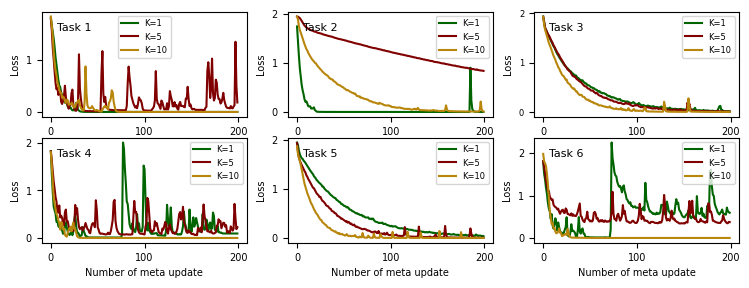

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_train_loss21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_train_loss51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_train_loss41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.8, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_train_loss31, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss33, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_train_loss61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss63, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_train_loss11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.8, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-loss.pdf')
plt.show()

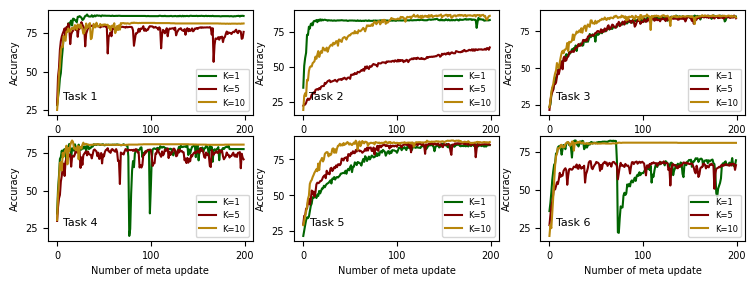

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_accuracy21, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy23, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_accuracy51, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy53, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_accuracy41, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy43, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.16, 0.12, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_accuracy31, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy33, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_accuracy61, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy63, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_accuracy11, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy13, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.16, 0.12, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-acc.pdf')
plt.show()

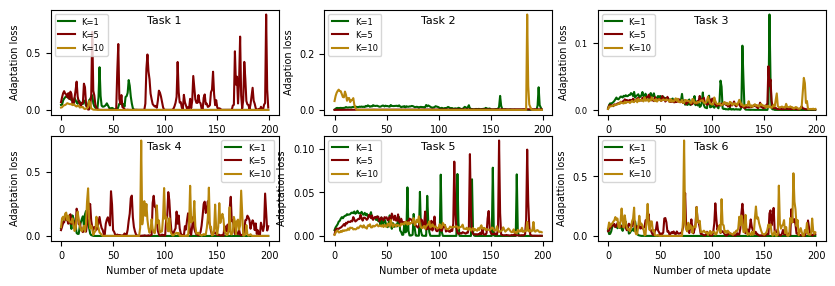

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_fit_loss23, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss22, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss21, label="K=10", color = 'darkgoldenrod')
plt.xlabel('No. of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_fit_loss53, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss52, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss51, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaption loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_fit_loss43, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss42, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss41, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=6)
plt.text(0.5, 0.85, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_fit_loss33, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss32, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss31, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_fit_loss63, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss62, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss61, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adaptation loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_fit_loss13, label="K=1", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss12, label="K=5", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss11, label="K=10", color = 'darkgoldenrod')
plt.xlabel('Number of meta update', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Adapattion loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.5, 0.85, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=6)
plt.grid(False)
plt.savefig('fixed-fit.pdf')
plt.show()

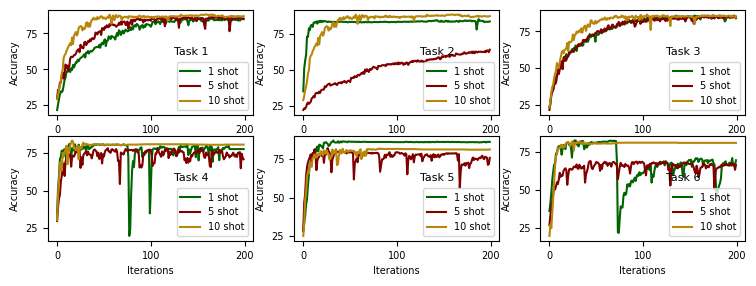

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_accuracy61, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy62, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_accuracy51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_accuracy41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_accuracy31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_accuracy21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_accuracy11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_accuracy12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_accuracy13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

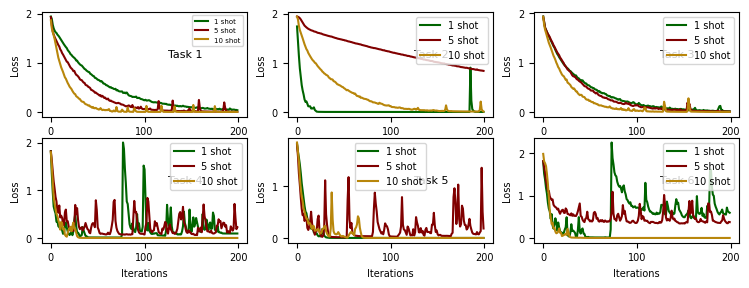

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_train_loss61, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss62, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=5)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_train_loss51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_train_loss41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_train_loss31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_train_loss21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_train_loss11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_train_loss12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_train_loss13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

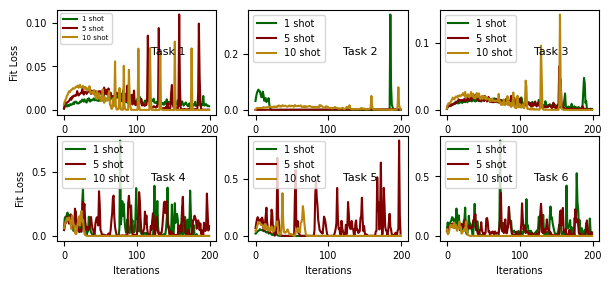

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3))
plt.subplot(2,3,1)
sns.lineplot(x=range(200), y=_fit_loss61, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss62, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss63, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 1', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=5)
plt.grid(False)

plt.subplot(2,3,2)
sns.lineplot(x=range(200), y=_fit_loss51, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss52, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss53, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 2', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,3)
sns.lineplot(x=range(200), y=_fit_loss41, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss42, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss43, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 3', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,4)
sns.lineplot(x=range(200), y=_fit_loss31, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss32, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss33, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 4', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,5)
sns.lineplot(x=range(200), y=_fit_loss21, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss22, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss23, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 5', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)

plt.subplot(2,3,6)
sns.lineplot(x=range(200), y=_fit_loss11, label="1 shot", color = 'darkgreen')
sns.lineplot(x=range(200), y=_fit_loss12, label="5 shot", color = 'maroon')
sns.lineplot(x=range(200), y=_fit_loss13, label="10 shot", color = 'darkgoldenrod')
plt.xlabel('Iterations', fontsize=7)
plt.xticks(fontsize=7)
#plt.ylabel('Fit Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.text(0.7, 0.55, 'Task 6', ha='center', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.legend(fontsize=7)
plt.grid(False)
plt.show()

In [17]:
x_train_image = x_train.send(duet2, searchable = True)
x_test_image = x_test.send(duet2, searchable = True)
y_train_label = y_train.send(duet2, searchable = True)
y_test_lable = y_test.send(duet2, searchable = True)

`searchable` is deprecated please use `pointable` in future
`searchable` is deprecated please use `pointable` in future
`searchable` is deprecated please use `pointable` in future


In [18]:
duet2.requests.add_handler(action="accept")

In [122]:
accuracy_avg_adam = [31.904761904761905,
 34.44444444444444,
 36.03174603174603,
 38.57142857142857,
 50.476190476190474,
 51.26984126984127,
 53.01587301587302,
 56.34920634920635,
 63.333333333333336,
 66.34920634920636,
 67.46031746031746,
 68.0952380952381,
 68.5822856782527,
 69.04761904761905,
 69.68253968253968,
 69.52380952380952,
 70.47619047619048,
 71.11111111111111,
 71.42857142857143,
 72.31746031746032,
 73.01587301587301,
 74.31746031746032,
 75.85714285714286,
 76.03174603174604,
 77.39682539682539,
 77.4015873015873,
 77.66666666666667,
 78.23809523809524,
 78.98412698412699,
 79.17301587301587,
 79.3015873015873,
 79.56507936507937,
 79.75873015873017,
 79.79650793650794,
 79.85396825396825,
 79.96507936507937,
 79.94761904761905,
 80.95238095238095,
 80.68253968253968,
 80.73015873015873,
 80.95238095238095,
 80.84126984126983,
 80.98909433489377,
 81.26984126984127,
 81.38463492063492,
 81.84126984126983,
 81.22222222222223,
 81.58730158730158,
 81.9047619047619,
 81.84126984126983,
 81.91111111111111,
 81.97460317460318,
 82.31746031746032,
 82.01587301587301,
 82.53968253968254,
 82.74603174603175,
 82.76349206349206,
 82.82222222222223,
 82.6984126984127,
 83.17460317460318,
 83.65079365079364,
 83.76984126984127,
 83.83809523809524,
 83.74603174603175,
 83.83333333333333,
 83.6984126984127,
 83.96825396825396,
 83.65079365079364,
 83.6984126984127,
 84.12698412698413,
 84.33333333333333,
 84.12698412698413,
 84.38095238095238,
 84.65079365079364,
 84.96825396825396,
 84.65079365079364,
 84.80952380952381,
 84.76190476190476,
 84.82222222222223,
 84.91587301587301,
 84.96825396825396,
 84.92063492063492,
 84.53333333333333,
 84.96825396825396,
 84.38095238095238,
 84.96825396825396,
 85.23809523809524,
 85.39682539682539,
 85.92063492063492,
 85.80952380952381,
 85.07936507936508,
 85.96825396825396,
 85.12698412698413,
 85.4920634920635,
 85.28571428571429,
 85.96825396825396,
 85.39682539682539,
 85.65079365079364,
 85.92063492063492,
 85.28571428571429,
 85.92063492063492,
 85.12698412698413,
 85.07936507936508,
 85.60317460317461,
 85.23809523809524,
 85.92063492063492,
 85.07936507936508,
 85.23809523809524,
 85.80952380952381,
 86.19047619047619,
 86.07936507936508,
 86.76190476190476,
 86.92063492063492,
 86.07936507936508,
 86.19047619047619,
 86.60317460317461,
 86.92063492063492,
 86.66666666666667,
 86.87301587301587,
 86.96825396825396,
 86.87301587301587,
 86.87301587301587,
 86.87301587301587,
 86.4920634920635,
 86.92063492063492,
 86.34920634920636,
 86.34920634920636,
 86.39682539682539,
 86.5079365079365,
 86.39682539682539,
 86.82539682539682,
 86.19047619047619,
 86.19047619047619,
 86.87301587301587,
 86.98412698412699,
 86.39682539682539,
 86.71428571428571,
 87.14285714285714,
 87.34920634920636,
 87.19047619047619,
 87.34920634920636,
 87.98412698412699,
 87.19047619047619,
 87.5079365079365,
 87.87301587301587,
 87.14285714285714,
 87.23809523809524,
 87.34920634920636,
 87.61904761904762,
 87.76190476190476,
 87.92063492063492,
 87.82539682539682,
 87.03174603174604,
 87.3015873015873,
 88.19047619047619,
 88.07936507936508,
 88.87301587301587,
 88.34920634920636,
 88.5079365079365,
 88.98412698412699,
 88.3015873015873,
 88.39682539682539,
 88.77777777777777,
 88.5079365079365,
 88.87301587301587,
 88.3015873015873,
 88.66666666666667,
 88.66666666666667,
 88.14285714285714,
 88.92063492063492,
 88.3015873015873,
 88.3015873015873,
 88.19047619047619,
 88.19047619047619,
 88.92063492063492,
 88.14285714285714,
 88.23809523809524,
 88.19047619047619,
 88.19047619047619,
 88.66666666666667,
 88.23809523809524,
 88.98412698412699,
 88.14285714285714,
 88.5079365079365,
 88.66666666666667,
 88.71428571428571,
 88.19047619047619,
 88.46031746031746,
 88.14285714285714,
 88.92063492063492,
 88.19047619047619,
 88.3015873015873,
 88.14285714285714,
 88.98412698412699,
 88.28571428571429,
 88.5079365079365,
 88.39682539682539,
 88.82539682539682,
 88.44444444444444,
 88.14285714285714,
 88.87301587301587,
 88.34920634920636,
 88.93650793650794,
 88.71428571428571,
 88.5079365079365,
 88.03174603174604,
 88.46031746031746,
 88.14285714285714,
 88.66666666666667,
 88.66666666666667,
 88.92063492063492,
 88.23809523809524,
 88.66666666666667,
 88.46031746031746,
 88.66666666666667,
 88.98412698412699,
 88.82539682539682,
 88.82539682539682,
 88.44444444444444,
 88.46031746031746,
 88.92063492063492,
 88.82539682539682,
 88.23809523809524,
 88.3015873015873,
 88.34920634920636,
 88.3015873015873,
 88.28571428571429,
 88.39682539682539,
 88.87301587301587,
 88.82539682539682,
 88.39682539682539,
 88.44444444444444,
 88.5079365079365,
 88.66666666666667,
 88.98412698412699,
 88.5079365079365,
 88.87301587301587,
 88.03174603174604,
 88.93650793650794,
 88.55555555555556,
 88.46031746031746,
 88.98412698412699,
 88.19047619047619,
 88.34920634920636,
 88.5079365079365,
 88.03174603174604,
 88.34920634920636,
 88.03174603174604,
 88.77777777777777,
 88.61904761904762,
 88.44444444444444,
 88.23809523809524,
 88.39682539682539,
 88.14285714285714,
 88.98412698412699,
 88.34920634920636,
 88.71428571428571,
 88.82539682539682,
 88.66666666666667,
 88.14285714285714,
 88.14285714285714,
 88.0952380952381,
 88.98412698412699,
 88.14285714285714,
 88.5079365079365,
 88.66666666666667,
 88.3015873015873,
 88.93650793650794,
 88.66666666666667,
 88.92063492063492,
 88.19047619047619,
 88.92063492063492,
 88.96825396825396,
 88.03174603174604,
 88.03174603174604,
 88.34920634920636,
 88.82539682539682,
 88.5079365079365,
 88.14285714285714,
 88.19047619047619,
 88.14285714285714,
 88.19047619047619,
 88.82539682539682,
 86.82539682539682,
 88.87301587301587,
 88.87301587301587,
 88.66666666666667,
 88.66666666666667,
 88.77777777777777,
 88.82539682539682,
 88.14285714285714,
 88.39682539682539,
 88.03174603174604,
 88.14285714285714,
 88.82539682539682,
 88.87301587301587,
 88.28571428571429,
 88.03174603174604,
 88.5079365079365,
 88.66666666666667,
 88.98412698412699,
 88.14285714285714,
 88.87301587301587,
 88.44444444444444,
 88.87301587301587,
 88.92063492063492,
 88.61904761904762,
 88.34920634920636,
 88.82539682539682,
 88.82539682539682,
 88.98412698412699,
 88.5079365079365,
 88.19047619047619,
 88.66666666666667,
 88.98412698412699,
 88.34920634920636,
 88.66666666666667,
 88.03174603174604,
 88.66666666666667,
 88.5079365079365,
 88.14285714285714,
 88.14285714285714,
 88.5079365079365,
 88.87301587301587,
 88.0952380952381,
 88.03174603174604,
 88.71428571428571,
 88.03174603174604,
 88.07936507936508,
 88.23809523809524,
 88.61904761904762,
 88.34920634920636,
 88.55555555555556,
 88.5079365079365,
 88.55555555555556,
 88.82539682539682,
 88.66666666666667,
 88.07936507936508,
 88.80952380952381,
 88.46031746031746,
 88.39682539682539,
 88.34920634920636,
 88.5079365079365,
 88.5079365079365,
 88.80952380952381,
 88.39682539682539,
 88.66666666666667,
 88.71428571428571,
 88.5079365079365,
 88.07936507936508,
 88.19047619047619,
 88.98412698412699,
 88.0952380952381,
 88.66666666666667,
 88.92063492063492,
 88.07936507936508,
 88.66666666666667,
 88.82539682539682,
 88.55555555555556,
 88.3015873015873,
 88.77777777777777,
 88.96825396825396,
 88.03174603174604,
 88.46031746031746,
 88.92063492063492,
 88.66666666666667,
 88.98412698412699,
 88.66666666666667,
 88.07936507936508,
 88.19047619047619,
 88.98412698412699,
 88.23809523809524,
 88.34920634920636,
 88.03174603174604,
 88.66666666666667,
 88.07936507936508,
 88.66666666666667,
 88.34920634920636,
 88.23809523809524,
 88.39682539682539,
 88.03174603174604,
 88.61904761904762,
 88.46031746031746,
 88.66666666666667,
 88.03174603174604,
 88.34920634920636,
 88.14285714285714,
 88.3015873015873,
 88.0952380952381,
 88.14285714285714,
 88.07936507936508,
 88.98412698412699,
 88.46031746031746,
 88.23809523809524,
 88.34920634920636,
 88.87301587301587,
 88.61904761904762,
 88.66666666666667,
 88.5079365079365,
 88.14285714285714,
 88.82539682539682,
 88.39682539682539,
 88.34920634920636,
 88.98412698412699,
 88.5079365079365,
 88.87301587301587,
 88.19047619047619,
 88.34920634920636,
 88.98412698412699,
 88.34920634920636,
 88.5079365079365,
 88.96825396825396,
 88.14285714285714,
 88.98412698412699,
 88.19047619047619,
 88.98412698412699,
 88.98412698412699,
 88.98412698412699,
 88.57142857142857,
 88.25396825396825,
 88.87301587301587,
 88.5079365079365,
 88.39682539682539,
 88.3015873015873,
 88.82539682539682,
 88.14285714285714,
 88.61904761904762,
 88.23809523809524,
 88.34920634920636,
 88.39682539682539,
 88.93650793650794,
 88.57142857142857,
 88.82539682539682,
 88.46031746031746,
 88.82539682539682,
 88.03174603174604,
 88.93650793650794,
 88.77777777777777,
 88.71428571428571,
 88.5079365079365,
 88.61904761904762,
 88.23809523809524,
 88.34920634920636,
 88.5079365079365,
 88.34920634920636,
 88.23809523809524,
 88.61904761904762,
 88.55555555555556,
 88.82539682539682,
 88.14285714285714,
 88.76190476190476,
 88.19047619047619,
 88.25396825396825,
 88.71428571428571,
 88.5079365079365,
 88.19047619047619,
 88.66666666666667,
 88.5079365079365,
 88.66666666666667,
 88.77777777777777,
 88.46031746031746,
 88.98412698412699,
 88.5079365079365,
 88.88888888888889,
 88.98412698412699,
 88.46031746031746,
 88.5079365079365,
 88.98412698412699,
 88.34920634920636,
 88.07936507936508,
 88.41269841269842,
 88.82539682539682,
 88.71428571428571,
 88.68253968253968,
 88.98412698412699,
 88.34920634920636,
 88.03174603174604,
 88.39682539682539,
 88.34920634920636,
 88.92063492063492,
 88.03174603174604,
 88.66666666666667,
 88.55555555555556,
 88.19047619047619,
 88.71428571428571,
 88.03174603174604,
 88.55555555555556,
 88.82539682539682,
 88.19047619047619,
 88.46031746031746,
 88.5079365079365,
 88.87301587301587,
 88.61904761904762,
 88.34920634920636,
 88.03174603174604,
 88.77777777777777,
 88.07936507936508,
 88.98412698412699,
 88.07936507936508,
 88.82539682539682]

In [21]:
accuracy_max_adam = [20.92063492063492,
 21.11111111111111,
 34.285714285714285,
 37.61904761904762,
 44.285714285714285,
 44.952380952380953,
 45.285714285714285,
 50.79365079365079,
 50.23809523809524,
 50.77777777777778,
 50.26984126984127,
 50.06349206349206,
 50.3968253968254,
 50.20634920634921,
 51.07936507936508,
 51.80952380952381,
 51.44444444444444,
 52.20634920634921,
 55.3968253968254,
 55.93650793650794,
 55.98412698412698,
 55.95238095238095,
 55.03174603174603,
 55.58730158730159,
 55.61904761904762,
 55.285714285714285,
 55.96825396825397,
 56.19047619047619,
 56.24126984126984,
 56.46825396825397,
 56.6031746031746,
 56.69047619047619,
 56.507936507936506,
 56.58730158730159,
 56.92063492063492,
 56.61904761904762,
 56.6031746031746,
 56.82539682539682,
 56.55555555555556,
 56.87301587301587,
 56.476190476190474,
 56.57142857142857,
 56.25396825396825,
 56.65079365079365,
 56.301587301587304,
 56.65079365079365,
 57.22222222222222,
 57.38412698412698,
 57.65079365079365,
 57.285714285714285,
 57.58730158730159,
 57.682539682539684,
 57.87301587301587,
 57.904761904761905,
 58.41269841269841,
 58.55238095238095,
 58.333333333333336,
 58.41269841269841,
 58.333333333333336,
 58.666666666666664,
 58.23809523809524,
 58.15873015873016,
 58.46031746031746,
 58.95238095238095,
 58.507936507936506,
 58.3968253968254,
 58.58730158730159,
 59.23809523809524,
 59.35238095238095,
 59.25396825396825,
 59.48412698412698,
 59.476190476190474,
 59.44444444444444,
 59.23809523809524,
 60.34920634920635,
 60.333333333333336,
 60.95238095238095,
 60.507936507936506,
 60.44444444444444,
 60.44444444444444,
 60.84126984126984,
 60.77777777777778,
 60.111111111111114,
 60.95238095238095,
 60.77777777777778,
 61.46031746031746,
 61.25396825396825,
 61.20634920634921,
 61.93650793650794,
 61.682539682539684,
 61.93650793650794,
 61.93650793650794,
 61.25396825396825,
 61.36507936507937,
 61.17460317460318,
 61.46031746031746,
 61.476190476190474,
 61.507936507936506,
 61.22222222222222,
 61.61904761904762,
 61.6031746031746,
 61.57142857142857,
 61.82222222222222,
 62.095238095238095,
 62.07936507936508,
 62.73015873015873,
 62.19047619047619,
 62.492063492063494,
 62.17460317460318,
 62.38095238095238,
 62.76190476190476,
 62.76190476190476,
 62.34920634920635,
 62.74603174603175,
 62.01587301587302,
 62.76190476190476,
 62.74603174603175,
 62.96825396825397,
 63.77777777777778,
 63.03174603174603,
 63.142857142857146,
 63.92063492063492,
 63.57142857142857,
 63.888888888888886,
 63.523809523809526,
 63.65079365079365,
 63.285714285714285,
 63.77777777777778,
 63.06349206349206,
 63.34920634920635,
 63.53968253968254,
 63.15873015873016,
 63.44444444444444,
 63.38095238095238,
 63.3968253968254,
 63.317460317460316,
 63.73015873015873,
 63.65079365079365,
 64.19047619047619,
 64.15873015873016,
 64.142857142857146,
 64.3968253968254,
 64.82539682539682,
 64.07936507936508,
 64.888888888888886,
 64.095238095238095,
 64.04761904761905,
 64.74603174603175,
 64.63492063492063,
 64.25396825396825,
 64.38095238095238,
 64.34920634920635,
 64.34920634920635,
 64.3968253968254,
 64.42857142857143,
 64.285714285714285,
 64.698412698412696,
 64.857142857142854,
 64.41269841269841,
 64.666666666666664,
 64.38095238095238,
 64.23809523809524,
 64.96825396825397,
 65.333333333333336,
 65.41269841269841,
 65.22222222222222,
 65.857142857142854,
 65.92063492063492,
 65.87301587301587,
 65.41269841269841,
 65.904761904761905,
 65.77777777777778,
 67.01587301587302,
 67.714285714285715,
 67.79365079365079,
 67.04761904761905,
 67.3968253968254,
 67.63492063492063,
 67.38095238095238,
 67.82539682539682,
 67.492063492063494,
 67.25396825396825,
 67.61904761904762,
 67.71428571428571,
 67.79365079365079,
 67.82539682539682,
 67.25396825396825,
 67.77777777777778,
 68.06349206349206,
 68.285714285714285,
 68.01587301587302,
 68.42857142857143,
 68.15873015873016,
 68.333333333333336,
 68.904761904761905,
 68.76190476190476,
 68.507936507936506,
 68.857142857142854,
 68.57142857142857,
 69.01587301587302,
 69.58730158730159,
 69.095238095238095,
 69.76190476190476,
 69.28571428571429,
 69.23809523809524,
 69.95238095238095,
 69.73015873015873,
 69.77777777777778,
 69.301587301587304,
 69.79365079365079,
 69.34920634920635,
 69.34920634920635,
 69.44444444444444,
 69.301587301587304,
 69.98412698412698,
 69.46031746031746,
 69.682539682539684,
 69.142857142857146,
 69.03174603174603,
 69.61904761904762,
 69.523809523809526,
 69.82539682539682,
 69.6031746031746,
 70.15873015873016,
 70.15873015873016,
 70.22222222222222,
 70.95238095238095,
 70.82539682539682,
 70.74603174603175,
 70.76190476190476,
 70.476190476190474,
 70.3968253968254,
 70.76190476190476,
 70.12698412698413,
 70.73015873015873,
 70.74603174603175,
 70.095238095238095,
 70.25396825396825,
 70.01587301587302,
 70.476190476190474,
 70.25396825396825,
 70.53968253968254,
 70.38095238095238,
 70.65079365079365,
 70.34920634920635,
 70.38095238095238,
 70.15873015873016,
 70.20634920634921,
 70.38095238095238,
 70.25396825396825,
 70.82539682539682,
 71.38095238095238,
 71.333333333333336,
 71.095238095238095,
 71.98412698412698,
 71.42857142857143,
 71.111111111111114,
 71.57142857142857,
 71.666666666666664,
 71.01587301587302,
 71.12698412698413,
 71.22222222222222,
 71.87301587301587,
 71.84126984126984,
 71.84126984126984,
 71.301587301587304,
 71.12698412698413,
 71.92063492063492,
 71.41269841269841,
 71.333333333333336,
 72.095238095238095,
 72.3968253968254,
 72.74603174603175,
 72.904761904761905,
 72.56349206349206,
 72.67876398396533,
 72.888888888888886,
 72.36507936507937,
 72.63492063492063,
 72.857142857142854,
 72.74603174603175,
 72.285714285714285,
 72.476190476190474,
 72.25396825396825,
 72.55555555555556,
 72.333333333333336,
 72.34920634920635,
 72.698412698412696,
 72.07936507936508,
 72.82539682539682,
 72.53968253968254,
 72.41269841269841,
 72.333333333333336,
 72.55555555555556,
 72.74603174603175,
 73.01587301587302,
 73.111111111111114,
 73.42857142857143,
 73.6031746031746,
 73.42857142857143,
 73.55555555555556,
 73.682539682539684,
 73.111111111111114,
 73.317460317460316,
 73.111111111111114,
 73.76190476190476,
 73.3968253968254,
 73.23809523809524,
 73.333333333333336,
 73.92063492063492,
 74.08763857272782,
 74.03174603174603,
 74.17460317460318,
 74.95238095238095,
 74.19047619047619,
 74.888888888888886,
 74.666666666666664,
 74.36507936507937,
 74.714285714285715,
 74.44444444444444,
 74.25396825396825,
 75.111111111111114,
 75.095238095238095,
 75.111111111111114,
 75.06349206349206,
 75.904761904761905,
 75.20634920634921,
 75.38095238095238,
 75.714285714285715,
 75.92063492063492,
 75.698412698412696,
 75.79365079365079,
 75.44444444444444,
 75.904761904761905,
 75.96825396825397,
 75.317460317460316,
 75.22222222222222,
 75.888888888888886,
 75.57142857142857,
 75.25396825396825,
 75.46031746031746,
 75.93650793650794,
 75.3968253968254,
 75.42857142857143,
 75.04761904761905,
 75.15873015873016,
 75.20634920634921,
 75.57142857142857,
 75.93650793650794,
 75.20634920634921,
 75.20634920634921,
 75.41269841269841,
 75.63492063492063,
 75.38095238095238,
 75.92063492063492,
 75.142857142857146,
 75.77777777777778,
 75.04761904761905,
 75.65079365079365,
 75.317460317460316,
 75.36507936507937,
 75.93650793650794,
 75.61904761904762,
 75.01587301587302,
 75.07936507936508,
 75.87301587301587,
 75.31746031746032,
 75.95238095238095,
 75.904761904761905,
 75.58730158730159,
 75.476190476190474,
 75.03174603174603,
 75.65079365079365,
 75.06349206349206,
 75.14285714285714,
 75.888888888888886,
 75.76190476190476,
 75.0,
 75.857142857142854,
 75.15873015873016,
 75.92063492063492,
 75.25396825396825,
 75.01587301587302,
 75.77777777777778,
 75.55555555555556,
 75.142857142857146,
 75.888888888888886,
 75.23809523809524,
 75.523809523809526,
 75.55555555555556,
 75.58730158730159,
 75.73015873015873,
 75.698412698412696,
 75.23809523809524,
 75.20634920634921,
 75.74603174603175,
 75.095238095238095,
 75.904761904761905,
 75.0,
 75.42857142857143,
 75.26984126984127,
 75.904761904761905,
 75.12698412698413,
 75.60317460317461,
 75.904761904761905,
 75.82539682539682,
 75.25396825396825,
 75.73015873015873,
 75.857142857142854,
 75.25396825396825,
 75.36507936507937,
 75.17460317460318,
 75.07936507936508,
 75.17460317460318,
 75.15873015873016,
 75.23809523809524,
 75.01587301587302,
 75.507936507936506,
 75.095238095238095,
 76.58730158730159,
 76.6031746031746,
 76.82539682539682,
 76.19047619047619,
 76.80952380952381,
 76.95238095238095,
 76.93650793650794,
 76.63492063492063,
 76.71428571428571,
 76.87301587301587,
 76.17460317460318,
 76.63492063492063,
 76.15873015873016,
 76.20634920634921,
 76.39682539682539,
 76.93650793650794,
 76.79365079365079,
 76.12698412698413,
 76.53968253968254,
 76.82539682539682,
 76.93650793650794,
 76.79365079365079,
 76.95238095238095,
 76.93650793650794,
 76.38095238095238,
 76.06349206349206,
 76.857142857142854,
 76.142857142857146,
 76.714285714285715,
 76.77777777777778,
 76.111111111111114,
 76.80952380952381,
 76.06349206349206,
 76.38095238095238,
 76.0,
 76.17460317460318,
 76.26984126984127,
 76.77777777777778,
 76.857142857142854,
 76.61904761904762,
 76.71428571428571,
 76.22222222222222,
 76.3968253968254,
 76.87301587301587,
 76.12698412698413,
 76.61904761904762,
 76.888888888888886,
 76.523809523809526,
 76.682539682539684,
 76.77777777777778,
 76.111111111111114,
 76.3968253968254,
 76.142857142857146,
 76.73015873015873,
 76.82539682539682,
 76.84126984126984,
 76.01587301587302,
 76.01587301587302,
 76.06349206349206,
 76.74603174603175,
 76.06349206349206,
 76.682539682539684,
 76.25396825396825,
 76.5079365079365,
 76.507936507936506,
 76.492063492063494,
 76.74603174603175,
 76.857142857142854,
 76.333333333333336,
 76.73015873015873,
 76.03174603174603,
 76.06349206349206,
 76.95238095238095,
 76.20634920634921,
 76.17460317460318,
 76.41269841269841,
 76.87301587301587,
 76.55555555555556,
 76.55555555555556,
 76.58730158730159,
 76.06349206349206]

In [22]:
accuracy_med_adam = [20.92063492063492,
 21.11111111111111,
 25.285714285714285,
 28.61904761904762,
 29.285714285714285,
 30.952380952380953,
 31.285714285714285,
 31.79365079365079,
 32.23809523809524,
 32.77777777777778,
 32.26984126984127,
 32.06349206349206,
 32.3968253968254,
 32.20634920634921,
 33.07936507936508,
 33.80952380952381,
 33.44444444444444,
 33.20634920634921,
 33.3968253968254,
 34.93650793650794,
 34.98412698412698,
 34.95238095238095,
 34.03174603174603,
 34.58730158730159,
 34.61904761904762,
 34.285714285714285,
 34.96825396825397,
 35.19047619047619,
 35.84126984126984,
 35.96825396825397,
 35.6031746031746,
 35.19047619047619,
 35.507936507936506,
 35.58730158730159,
 35.92063492063492,
 36.61904761904762,
 36.6031746031746,
 36.82539682539682,
 36.55555555555556,
 36.87301587301587,
 36.476190476190474,
 36.57142857142857,
 36.25396825396825,
 36.65079365079365,
 36.301587301587304,
 36.65079365079365,
 37.22222222222222,
 37.98412698412698,
 37.65079365079365,
 37.285714285714285,
 37.58730158730159,
 37.682539682539684,
 37.87301587301587,
 37.904761904761905,
 38.41269841269841,
 38.95238095238095,
 38.333333333333336,
 38.41269841269841,
 38.333333333333336,
 38.666666666666664,
 38.23809523809524,
 38.15873015873016,
 38.46031746031746,
 38.95238095238095,
 39.507936507936506,
 39.3968253968254,
 39.58730158730159,
 39.23809523809524,
 39.95238095238095,
 39.25396825396825,
 39.98412698412698,
 39.476190476190474,
 39.44444444444444,
 40.23809523809524,
 40.34920634920635,
 40.333333333333336,
 40.95238095238095,
 40.507936507936506,
 40.44444444444444,
 40.44444444444444,
 40.84126984126984,
 40.77777777777778,
 40.95238095238095,                    
 41.111111111111114,
 41.77777777777778,
 41.46031746031746,
 41.25396825396825,
 41.20634920634921,
 41.93650793650794,
 41.682539682539684,
 41.93650793650794,
 41.93650793650794,
 41.25396825396825,
 41.36507936507937,
 41.17460317460318,
 41.46031746031746,
 41.476190476190474,
 41.507936507936506,
 42.22222222222222,
 42.61904761904762,
 42.6031746031746,
 42.57142857142857,
 42.22222222222222,
 42.095238095238095,
 42.07936507936508,
 42.73015873015873,
 42.19047619047619,
 42.492063492063494,
 42.17460317460318,
 42.38095238095238,
 42.76190476190476,
 42.76190476190476,
 42.34920634920635,
 42.74603174603175,
 42.01587301587302,
 42.76190476190476,
 42.74603174603175,
 42.96825396825397,
 42.77777777777778,
 42.03174603174603,
 42.142857142857146,
 42.92063492063492,
 42.57142857142857,
 42.888888888888886,
 42.523809523809526,
 42.65079365079365,
 43.285714285714285,
 43.77777777777778,
 43.06349206349206,
 43.34920634920635,
 43.53968253968254,
 43.15873015873016,
 43.44444444444444,
 43.38095238095238,
 43.3968253968254,
 43.317460317460316,
 43.73015873015873,
 43.65079365079365,
 44.19047619047619,
 45.15873015873016,
 45.142857142857146,
 45.3968253968254,
 45.82539682539682,
 45.07936507936508,
 45.888888888888886,
 45.095238095238095,
 45.04761904761905,
 45.74603174603175,
 45.63492063492063,
 46.25396825396825,
 46.38095238095238,
 46.34920634920635,
 46.34920634920635,
 46.3968253968254,
 46.42857142857143,
 46.285714285714285,
 46.698412698412696,
 46.857142857142854,
 46.41269841269841,
 46.666666666666664,
 46.38095238095238,
 46.23809523809524,
 46.96825396825397,
 46.333333333333336,
 46.41269841269841,
 47.22222222222222,
 47.857142857142854,
 47.92063492063492,
 47.87301587301587,
 47.41269841269841,
 47.904761904761905,
 47.77777777777778,
 47.01587301587302,
 47.714285714285715,
 47.79365079365079,
 47.04761904761905,
 47.3968253968254,
 47.63492063492063,
 47.38095238095238,
 47.82539682539682,
 47.492063492063494,
 48.25396825396825,
 48.61904761904762,
 48.71428571428571,
 48.79365079365079,
 48.82539682539682,
 48.25396825396825,
 48.77777777777778,
 48.06349206349206,
 48.285714285714285,
 48.01587301587302,
 48.42857142857143,
 48.15873015873016,
 48.333333333333336,
 48.904761904761905,
 48.76190476190476,
 48.507936507936506,
 48.857142857142854,
 48.57142857142857,
 49.01587301587302,
 49.58730158730159,
 49.095238095238095,
 49.76190476190476,
 49.28571428571429,
 49.23809523809524,
 49.95238095238095,
 49.73015873015873,
 49.77777777777778,
 49.301587301587304,
 49.79365079365079,
 49.34920634920635,
 49.34920634920635,
 49.44444444444444,
 49.301587301587304,
 49.98412698412698,
 49.46031746031746,
 49.682539682539684,
 50.142857142857146,
 50.03174603174603,
 50.61904761904762,
 50.523809523809526,
 50.82539682539682,
 50.6031746031746,
 50.15873015873016,
 50.15873015873016,
 50.22222222222222,
 50.95238095238095,
 50.82539682539682,
 50.74603174603175,
 50.76190476190476,
 50.476190476190474,
 50.3968253968254,
 50.76190476190476,
 51.12698412698413,
 51.73015873015873,
 51.74603174603175,
 51.095238095238095,
 51.25396825396825,
 51.01587301587302,
 51.476190476190474,
 51.25396825396825,
 51.53968253968254,
 51.38095238095238,
 51.65079365079365,
 51.34920634920635,
 51.38095238095238,
 52.15873015873016,
 52.20634920634921,
 52.38095238095238,
 52.25396825396825,
 52.82539682539682,
 52.38095238095238,
 52.333333333333336,
 52.095238095238095,
 52.98412698412698,
 52.42857142857143,
 53.111111111111114,
 53.57142857142857,
 53.666666666666664,
 53.01587301587302,
 53.12698412698413,
 53.22222222222222,
 53.87301587301587,
 53.84126984126984,
 53.84126984126984,
 53.301587301587304,
 53.12698412698413,
 53.92063492063492,
 53.41269841269841,
 53.333333333333336,
 53.095238095238095,
 53.3968253968254,
 53.74603174603175,
 53.904761904761905,
 54.06349206349206,
 54.0,
 54.888888888888886,
 54.36507936507937,
 54.63492063492063,
 54.857142857142854,
 54.74603174603175,
 54.285714285714285,
 54.476190476190474,
 54.25396825396825,
 54.55555555555556,
 54.333333333333336,
 54.34920634920635,
 55.698412698412696,
 55.07936507936508,
 55.82539682539682,
 55.53968253968254,
 55.41269841269841,
 55.333333333333336,
 55.55555555555556,
 55.74603174603175,
 55.01587301587302,
 55.111111111111114,
 55.42857142857143,
 55.6031746031746,
 55.42857142857143,
 55.55555555555556,
 55.682539682539684,
 56.111111111111114,
 56.317460317460316,
 56.111111111111114,
 56.76190476190476,
 56.3968253968254,
 56.23809523809524,
 56.333333333333336,
 56.92063492063492,
 56.0,
 56.03174603174603,
 56.17460317460318,
 56.95238095238095,
 56.19047619047619,
 56.888888888888886,
 56.666666666666664,
 56.36507936507937,
 56.714285714285715,
 56.44444444444444,
 57.25396825396825,
 57.111111111111114,
 57.095238095238095,
 57.111111111111114,
 57.06349206349206,
 57.904761904761905,
 58.20634920634921,
 58.38095238095238,
 58.714285714285715,
 58.92063492063492,
 58.698412698412696,
 58.79365079365079,
 58.44444444444444,
 58.904761904761905,
 58.96825396825397,
 59.317460317460316,
 59.22222222222222,
 59.888888888888886,
 59.57142857142857,
 59.25396825396825,
 59.46031746031746,
 59.93650793650794,
 59.3968253968254,
 59.42857142857143,
 59.04761904761905,
 60.15873015873016,
 60.20634920634921,
 60.57142857142857,
 60.93650793650794,
 60.20634920634921,
 60.20634920634921,
 60.41269841269841,
 60.63492063492063,
 60.38095238095238,
 60.92063492063492,
 60.142857142857146,
 60.77777777777778,
 60.04761904761905,
 60.65079365079365,
 60.317460317460316,
 60.36507936507937,
 60.93650793650794,
 60.61904761904762,
 60.01587301587302,
 61.07936507936508,
 61.87301587301587,
 61.31746031746032,
 61.95238095238095,
 61.904761904761905,
 61.58730158730159,
 61.476190476190474,
 61.03174603174603,
 61.65079365079365,
 61.06349206349206,
 61.14285714285714,
 61.888888888888886,
 61.76190476190476,
 61.0,
 61.857142857142854,
 62.15873015873016,
 62.92063492063492,
 62.25396825396825,
 62.01587301587302,
 62.77777777777778,
 62.55555555555556,
 62.142857142857146,
 62.888888888888886,
 62.23809523809524,
 62.523809523809526,
 62.55555555555556,
 62.58730158730159,
 62.73015873015873,
 62.698412698412696,
 62.23809523809524,
 62.20634920634921,
 62.74603174603175,
 62.095238095238095,
 62.904761904761905,
 62.0,
 62.42857142857143,
 62.26984126984127,
 62.904761904761905,
 62.12698412698413,
 62.60317460317461,
 62.904761904761905,
 62.82539682539682,
 62.25396825396825,
 62.73015873015873,
 62.857142857142854,
 63.25396825396825,
 63.36507936507937,
 63.17460317460318,
 63.07936507936508,
 63.17460317460318,
 63.15873015873016,
 63.23809523809524,
 63.01587301587302,
 63.507936507936506,
 63.095238095238095,
 63.58730158730159,
 63.6031746031746,
 63.82539682539682,
 63.19047619047619,
 63.80952380952381,
 63.95238095238095,
 63.93650793650794,
 63.63492063492063,
 63.71428571428571,
 63.87301587301587,
 64.17460317460318,
 64.63492063492063,
 64.15873015873016,
 64.20634920634921,
 64.39682539682539,
 64.93650793650794,
 64.79365079365079,
 64.12698412698413,
 64.53968253968254,
 64.82539682539682,
 64.93650793650794,
 64.79365079365079,
 64.95238095238095,
 64.93650793650794,
 65.38095238095238,
 65.06349206349206,
 65.857142857142854,
 65.142857142857146,
 65.714285714285715,
 65.77777777777778,
 65.111111111111114,
 65.80952380952381,
 65.06349206349206,
 65.38095238095238,
 65.0,
 65.17460317460318,
 65.26984126984127,
 65.77777777777778,
 65.857142857142854,
 65.61904761904762,
 65.71428571428571,
 65.22222222222222,
 65.3968253968254,
 65.87301587301587,
 65.12698412698413,
 65.61904761904762,
 65.888888888888886,
 65.523809523809526,
 65.682539682539684,
 65.77777777777778,
 65.111111111111114,
 65.3968253968254,
 65.142857142857146,
 65.73015873015873,
 65.82539682539682,
 65.84126984126984,
 65.01587301587302,
 65.01587301587302,
 65.06349206349206,
 65.74603174603175,
 65.06349206349206,
 65.682539682539684,
 65.25396825396825,
 65.5079365079365,
 65.507936507936506,
 65.492063492063494,
 65.74603174603175,
 65.857142857142854,
 65.333333333333336,
 65.73015873015873,
 65.03174603174603,
 65.06349206349206,
 65.95238095238095,
 65.20634920634921,
 65.17460317460318,
 65.41269841269841,
 65.87301587301587,
 65.55555555555556,
 65.55555555555556,
 65.58730158730159,
 65.06349206349206]

In [41]:
accuracy_avg_adam01 = [25.58730158730159,
 27.936507936507937,
 33.01587301587302,
 37.142857142857146,
 38.73015873015873,
 36.507936507936506,
 43.80952380952381,
 48.888888888888886,
 50.317460317460316,
 56.666666666666664,
 58.73015873015873,
 64.12698412698413,
 63.65079365079365,
 68.57142857142857,
 69.2063492063492,
 71.9047619047619,
 71.58730158730158,
 70.0,
 72.38095238095238,
 74.12698412698413,
 75.23809523809524,
 76.03174603174604,
 74.60317460317461,
 76.34920634920636,
 77.46031746031746,
 76.34920634920636,
 77.61904761904762,
 79.04761904761905,
 76.19047619047619,
 78.88888888888889,
 78.73015873015873,
 80.31746031746032,
 82.38095238095238,
 81.26984126984127,
 81.74603174603175,
 81.11111111111111,
 81.11111111111111,
 81.11111111111111,
 81.9047619047619,
 82.53968253968254,
 82.38095238095238,
 82.06349206349206,
 82.85714285714286,
 81.9047619047619,
 82.38095238095238,
 82.85714285714286,
 83.80952380952381,
 83.4920634920635,
 83.4920634920635,
 84.44444444444444,
 84.12698412698413,
 84.76190476190476,
 84.12698412698413,
 83.96825396825396,
 83.4920634920635,
 86.34920634920636,
 84.92063492063492,
 84.92063492063492,
 85.87301587301587,
 84.12698412698413,
 85.55555555555556,
 86.34920634920636,
 85.55555555555556,
 86.82539682539682,
 85.39682539682539,
 85.07936507936508,
 87.3015873015873,
 86.98412698412699,
 86.98412698412699,
 84.76190476190476,
 86.66666666666667,
 85.71428571428571,
 87.61904761904762,
 88.25396825396825,
 86.19047619047619,
 87.14285714285714,
 87.61904761904762,
 87.93650793650794,
 86.82539682539682,
 87.46031746031746,
 87.3015873015873,
 85.39682539682539,
 88.57142857142857,
 86.5079365079365,
 86.66666666666667,
 87.77777777777777,
 86.82539682539682,
 88.88888888888889,
 88.41269841269842,
 88.0952380952381,
 87.3015873015873,
 88.25396825396825,
 88.73015873015873,
 87.46031746031746,
 87.14285714285714,
 87.77777777777777,
 86.66666666666667,
 89.04761904761905,
 88.0952380952381,
 89.36507936507937,
 88.41269841269842,
 89.52380952380952,
 87.46031746031746,
 88.41269841269842,
 88.0952380952381,
 88.73015873015873,
 89.36507936507937,
 87.77777777777777,
 88.0952380952381,
 89.04761904761905,
 88.73015873015873,
 89.04761904761905,
 87.61904761904762,
 89.04761904761905,
 89.52380952380952,
 88.57142857142857,
 89.2063492063492,
 88.0952380952381,
 89.04761904761905,
 89.84126984126983,
 88.57142857142857,
 88.57142857142857,
 89.04761904761905,
 86.98412698412699,
 87.93650793650794,
 88.57142857142857,
 89.84126984126983,
 88.25396825396825,
 89.68253968253968,
 90.31746031746032,
 90.15873015873017,
 89.36507936507937,
 88.25396825396825,
 90.15873015873017,
 87.61904761904762,
 89.2063492063492,
 89.84126984126983,
 89.36507936507937,
 87.93650793650794,
 90.0,
 89.52380952380952,
 89.84126984126983,
 90.0,
 87.3015873015873,
 88.57142857142857,
 89.2063492063492,
 88.25396825396825,
 90.47619047619048,
 89.84126984126983,
 89.84126984126983,
 90.95238095238095,
 89.84126984126983,
 88.73015873015873,
 89.52380952380952,
 90.47619047619048,
 89.52380952380952,
 91.11111111111111,
 88.41269841269842,
 90.47619047619048,
 87.77777777777777,
 89.36507936507937,
 90.31746031746032,
 90.15873015873017,
 90.7936507936508,
 90.95238095238095,
 90.47619047619048,
 90.0,
 89.52380952380952,
 89.84126984126983,
 90.15873015873017,
 88.88888888888889,
 88.73015873015873,
 89.52380952380952,
 89.04761904761905,
 89.52380952380952,
 90.95238095238095,
 89.36507936507937,
 90.0,
 90.47619047619048,
 89.36507936507937,
 89.52380952380952,
 90.7936507936508,
 89.36507936507937,
 89.84126984126983,
 89.2063492063492,
 90.15873015873017,
 89.52380952380952,
 91.42857142857143,
 88.41269841269842,
 89.68253968253968,
 89.52380952380952,
 91.74603174603175,
 90.47619047619048,
 90.47619047619048,
 88.73015873015873,
 88.73015873015873,
 90.47619047619048,
 90.0,
 91.58730158730158,
 90.63492063492063,
 92.06349206349206,
 89.52380952380952,
 89.84126984126983,
 91.58730158730158,
 89.84126984126983,
 90.15873015873017,
 89.52380952380952,
 89.84126984126983,
 90.7936507936508,
 89.84126984126983,
 90.31746031746032,
 89.68253968253968,
 90.63492063492063,
 89.68253968253968,
 90.0,
 89.04761904761905,
 89.84126984126983,
 90.47619047619048,
 91.9047619047619,
 91.74603174603175,
 91.11111111111111,
 90.31746031746032,
 90.63492063492063,
 90.95238095238095,
 89.68253968253968,
 89.52380952380952,
 90.63492063492063,
 90.47619047619048,
 87.93650793650794,
 90.47619047619048,
 91.42857142857143,
 90.95238095238095,
 90.7936507936508,
 90.63492063492063,
 90.47619047619048,
 91.11111111111111,
 89.36507936507937,
 89.36507936507937,
 90.15873015873017,
 90.31746031746032,
 90.63492063492063,
 90.63492063492063,
 89.2063492063492,
 90.15873015873017,
 89.84126984126983,
 90.63492063492063,
 91.74603174603175,
 92.06349206349206,
 91.26984126984127,
 90.15873015873017,
 90.31746031746032,
 89.84126984126983,
 90.0,
 90.95238095238095,
 90.31746031746032,
 90.63492063492063,
 89.52380952380952,
 90.15873015873017,
 90.7936507936508,
 90.47619047619048,
 90.47619047619048,
 91.11111111111111,
 91.9047619047619,
 91.74603174603175,
 89.84126984126983,
 90.95238095238095,
 90.47619047619048,
 89.84126984126983,
 89.2063492063492,
 91.26984126984127,
 90.47619047619048,
 90.95238095238095,
 90.47619047619048,
 90.47619047619048,
 89.68253968253968,
 90.47619047619048,
 90.7936507936508,
 90.0,
 90.15873015873017,
 89.84126984126983,
 88.0952380952381,
 89.04761904761905,
 90.95238095238095,
 90.31746031746032,
 90.47619047619048,
 89.04761904761905,
 90.7936507936508,
 90.95238095238095,
 88.25396825396825,
 91.58730158730158,
 90.47619047619048,
 90.47619047619048,
 90.15873015873017,
 90.7936507936508,
 88.57142857142857,
 88.88888888888889,
 90.31746031746032,
 91.26984126984127,
 91.26984126984127,
 90.63492063492063,
 89.2063492063492,
 90.15873015873017,
 90.31746031746032,
 90.15873015873017,
 90.31746031746032,
 89.2063492063492,
 89.04761904761905,
 90.15873015873017,
 90.47619047619048,
 89.52380952380952,
 90.7936507936508,
 91.26984126984127,
 90.95238095238095,
 88.25396825396825,
 89.36507936507937,
 91.11111111111111,
 88.73015873015873,
 89.84126984126983,
 91.74603174603175,
 89.04761904761905,
 89.68253968253968,
 91.74603174603175,
 88.73015873015873,
 89.04761904761905,
 90.31746031746032,
 90.95238095238095,
 88.73015873015873,
 89.36507936507937,
 91.42857142857143,
 91.74603174603175,
 90.47619047619048,
 90.15873015873017,
 90.63492063492063,
 90.7936507936508,
 90.7936507936508,
 90.95238095238095,
 89.84126984126983,
 90.47619047619048,
 90.63492063492063,
 90.0,
 88.41269841269842,
 90.7936507936508,
 89.68253968253968,
 90.0,
 89.52380952380952,
 90.15873015873017,
 90.95238095238095,
 90.63492063492063,
 90.15873015873017,
 90.7936507936508,
 90.31746031746032,
 90.0,
 89.04761904761905,
 89.68253968253968,
 91.26984126984127,
 88.57142857142857,
 89.2063492063492,
 90.7936507936508,
 88.57142857142857,
 88.57142857142857,
 90.47619047619048,
 90.7936507936508,
 90.0,
 89.52380952380952,
 89.68253968253968,
 89.52380952380952,
 90.31746031746032,
 90.0,
 90.15873015873017,
 90.0,
 90.31746031746032,
 90.0,
 90.31746031746032,
 90.95238095238095,
 91.26984126984127,
 90.63492063492063,
 90.63492063492063,
 90.63492063492063,
 91.26984126984127,
 91.11111111111111,
 92.38095238095238,
 91.58730158730158,
 88.88888888888889,
 90.47619047619048,
 90.7936507936508,
 90.95238095238095,
 88.73015873015873,
 91.42857142857143,
 92.22222222222223,
 88.0952380952381,
 89.04761904761905,
 90.7936507936508,
 90.0,
 90.47619047619048,
 91.11111111111111,
 90.15873015873017,
 91.26984126984127,
 90.95238095238095,
 90.47619047619048,
 88.73015873015873,
 90.95238095238095,
 90.7936507936508,
 90.0,
 89.04761904761905,
 90.7936507936508,
 90.95238095238095,
 90.15873015873017,
 91.11111111111111,
 89.2063492063492,
 90.7936507936508,
 88.25396825396825,
 89.84126984126983,
 90.31746031746032,
 90.63492063492063,
 89.68253968253968,
 90.0,
 90.47619047619048,
 90.7936507936508,
 90.15873015873017,
 90.15873015873017,
 90.31746031746032,
 89.52380952380952,
 89.84126984126983,
 88.73015873015873,
 91.26984126984127,
 89.36507936507937,
 90.31746031746032,
 88.88888888888889,
 91.11111111111111,
 91.58730158730158,
 90.63492063492063,
 90.47619047619048,
 90.0,
 90.31746031746032,
 89.2063492063492,
 89.68253968253968,
 89.84126984126983,
 89.84126984126983,
 90.47619047619048,
 89.36507936507937,
 88.88888888888889,
 90.0,
 89.84126984126983,
 90.0,
 89.36507936507937,
 90.7936507936508,
 90.0,
 90.47619047619048,
 90.47619047619048,
 91.58730158730158,
 89.84126984126983,
 90.63492063492063,
 88.25396825396825,
 91.42857142857143,
 89.84126984126983,
 91.11111111111111,
 89.84126984126983,
 91.26984126984127,
 89.36507936507937,
 87.77777777777777,
 90.0,
 88.88888888888889,
 90.31746031746032,
 91.26984126984127,
 89.84126984126983,
 88.57142857142857,
 89.84126984126983,
 89.04761904761905,
 90.31746031746032,
 90.15873015873017,
 89.04761904761905,
 89.04761904761905,
 90.7936507936508,
 90.15873015873017,
 89.52380952380952,
 89.36507936507937,
 89.2063492063492,
 90.15873015873017,
 91.11111111111111,
 89.84126984126983,
 89.68253968253968,
 87.93650793650794,
 89.36507936507937,
 89.52380952380952,
 90.47619047619048,
 89.36507936507937,
 88.41269841269842,
 89.68253968253968,
 91.11111111111111,
 90.95238095238095,
 89.68253968253968,
 89.68253968253968,
 90.0,
 88.57142857142857,
 88.73015873015873,
 89.36507936507937,
 89.68253968253968,
 88.25396825396825,
 88.57142857142857,
 89.52380952380952]

In [52]:
accuracy_max_adam01 = [14.920634920634921,
 25.714285714285715,
 26.984126984126984,
 35.87301587301587,
 35.23809523809524,
 36.25396825396825,
 37.93650793650794,
 37.61904761904762,
 38.25396825396825,
 38.25396825396825,
 39.74603174603175,
 40.317460317460316,
 42.34920634920635,
 45.07936507936508,
 50.63492063492063,
 50.79365079365079,
 50.65079365079365,
 50.0,
 50.17460317460318,
 50.74603174603175,
 51.17460317460318,
 51.6031746031746,
 51.17460317460318,
 51.23809523809524,
 51.44444444444444,
 51.783444444444444,
 52.07936507936508,
 52.142857142857146,
 52.79365079365079,
 52.904761904761905,
 52.492063492063494,
 52.57142857142857,
 52.22222222222222,
 52.84126984126984,
 53.0952380952381,
 53.333333333333336,
 53.492063492063494,
 53.12698412698413,
 53.698412698412696,
 53.92063492063492,
 54.39682539682539,
 54.53968253968254,
 54.698412698412696,
 54.38095238095238,
 54.317460317460316,
 55.0,
 55.857142857142854,
 55.80952380952381,
 55.98412698412698,
 55.857142857142854,
 55.492063492063494,
 55.61904761904762,
 55.44444444444444,
 56.22222222222222,
 56.46031746031746,
 56.98412698412698,
 56.65079365079365,
 56.04761904761905,
 56.07936507936508,
 56.06349206349206,
 56.333333333333336,
 57.22222222222222,
 57.80952380952381,
 57.476190476190474,
 57.57142857142857,
 57.03174603174603,
 57.98412698412699,
 57.22222222222222,
 57.80952380952381,
 57.698412698412696,
 58.04761904761905,
 58.36507936507937,
 58.666666666666664,
 58.96825396825397,
 58.25396825396825,
 58.22222222222222,
 58.96825396825397,
 59.36507936507937,
 58.73015873015873,
 58.63492063492063,
 58.698412698412696,
 59.317460317460316,
 59.857142857142854,
 59.93650793650794,
 59.07936507936508,
 59.65079365079365,
 59.60317460317461,
 59.44444444444444,
 59.904761904761905,
 60.04761904761905,
 60.111111111111114,
 60.95238095238095,
 60.76190476190476,
 60.01587301587302,
 60.55555555555556,
 60.57142857142857,
 60.714285714285715,
 60.492063492063494,
 61.19047619047619,
 61.98412698412699,
 61.87301587301587,
 61.142857142857146,
 61.42857142857143,
 61.666666666666664,
 61.74603174603175,
 61.26984126984127,
 61.23809523809524,
 61.698412698412696,
 61.73015873015873,
 62.0952380952381,
 62.20634920634921,
 62.98412698412698,
 62.61904761904762,
 62.73015873015873,
 62.3015873015873,
 62.53968253968254,
 62.317460317460316,
 62.904761904761905,
 62.84126984126984,
 63.23809523809524,
 63.53968253968254,
 63.46031746031746,
 63.38095238095238,
 63.42857142857143,
 63.12698412698413,
 63.26984126984127,
 63.888888888888886,
 63.87301587301587,
 63.41269841269841,
 63.66666666666667,
 63.15873015873016,
 63.904761904761905,
 63.73015873015873,
 63.57142857142857,
 63.46031746031746,
 63.01587301587302,
 63.22222222222222,
 63.58730158730159,
 63.46031746031746,
 63.888888888888886,
 63.23809523809524,
 63.95238095238095,
 63.79365079365079,
 63.58730158730159,
 63.01587301587302,
 63.95238095238095,
 63.63492063492063,
 63.46031746031746,
 63.26984126984127,
 63.79365079365079,
 63.698412698412696,
 63.41269841269842,
 64.01587301587302,
 64.904761904761905,
 64.317460317460316,
 64.98412698412699,
 64.42857142857143,
 64.39682539682539,
 64.06349206349206,
 64.01587301587302,
 64.15873015873016,
 64.87301587301587,
 64.20634920634921,
 64.77777777777777,
 64.333333333333336,
 64.41269841269841,
 64.5079365079365,
 64.07936507936508,
 64.98412698412699,
 64.55555555555556,
 64.61904761904762,
 64.66666666666667,
 64.03174603174603,
 64.38095238095238,
 64.0,
 64.26984126984127,
 64.492063492063494,
 64.76190476190476,
 64.95238095238095,
 64.03174603174604,
 64.42857142857143,
 64.476190476190474,
 65.07936507936508,
 65.23809523809524,
 65.25396825396825,
 65.34920634920636,
 65.25396825396825,
 65.25396825396825,
 65.46031746031746,
 65.57142857142857,
 65.41269841269841,
 65.857142857142854,
 65.76190476190476,
 65.38095238095238,
 65.44444444444444,
 65.07936507936508,
 65.66666666666667,
 65.46031746031746,
 65.12698412698413,
 65.80952380952381,
 65.60317460317461,
 65.22222222222222,
 65.3015873015873,
 65.96825396825397,
 65.25396825396825,
 65.23809523809524,
 63.333333333333336,
 64.60317460317461,
 62.857142857142854,
 67.61904761904762,
 60.15873015873016,
 54.92063492063492,
 64.92063492063492,
 60.476190476190474,
 57.301587301587304,
 67.61904761904762,
 60.79365079365079,
 64.60317460317461,
 60.0,
 65.55555555555556,
 63.96825396825397,
 64.60317460317461,
 56.82539682539682,
 60.476190476190474,
 62.22222222222222,
 59.36507936507937,
 62.53968253968254,
 58.73015873015873,
 61.904761904761905,
 67.14285714285714,
 67.3015873015873,
 63.96825396825397,
 68.41269841269842,
 65.71428571428571,
 64.92063492063492,
 63.17460317460318,
 58.095238095238095,
 63.492063492063494,
 55.55555555555556,
 67.77777777777777,
 60.476190476190474,
 65.23809523809524,
 62.06349206349206,
 69.2063492063492,
 62.22222222222222,
 62.698412698412696,
 64.28571428571429,
 66.98412698412699,
 61.58730158730159,
 62.698412698412696,
 63.01587301587302,
 64.92063492063492,
 66.82539682539682,
 63.492063492063494,
 58.25396825396825,
 65.71428571428571,
 59.36507936507937,
 64.92063492063492,
 62.22222222222222,
 69.04761904761905,
 62.06349206349206,
 62.38095238095238,
 56.98412698412698,
 62.06349206349206,
 59.36507936507937,
 65.55555555555556,
 63.80952380952381,
 63.65079365079365,
 64.60317460317461,
 57.46031746031746,
 56.98412698412698,
 65.23809523809524,
 59.523809523809526,
 63.96825396825397,
 61.904761904761905,
 62.22222222222222,
 56.34920634920635,
 63.80952380952381,
 58.095238095238095,
 62.22222222222222,
 64.60317460317461,
 62.22222222222222,
 63.17460317460318,
 60.15873015873016,
 57.61904761904762,
 63.96825396825397,
 65.39682539682539,
 59.682539682539684,
 62.53968253968254,
 63.492063492063494,
 61.42857142857143,
 64.44444444444444,
 61.26984126984127,
 56.98412698412698,
 55.55555555555556,
 66.98412698412699,
 64.28571428571429,
 61.904761904761905,
 62.06349206349206,
 62.06349206349206,
 59.682539682539684,
 62.38095238095238,
 57.46031746031746,
 58.57142857142857,
 64.12698412698413,
 59.523809523809526,
 56.03174603174603,
 61.58730158730159,
 58.41269841269841,
 62.53968253968254,
 57.77777777777778,
 62.22222222222222,
 58.57142857142857,
 63.01587301587302,
 65.07936507936508,
 65.87301587301587,
 53.96825396825397,
 66.03174603174604,
 58.888888888888886,
 57.142857142857146,
 59.682539682539684,
 59.04761904761905,
 61.74603174603175,
 56.82539682539682,
 63.333333333333336,
 59.04761904761905,
 60.63492063492063,
 57.301587301587304,
 66.82539682539682,
 59.20634920634921,
 61.904761904761905,
 59.84126984126984,
 61.904761904761905,
 57.142857142857146,
 61.42857142857143,
 63.01587301587302,
 55.87301587301587,
 66.19047619047619,
 55.23809523809524,
 59.84126984126984,
 60.95238095238095,
 54.6031746031746,
 57.77777777777778,
 62.698412698412696,
 58.25396825396825,
 60.79365079365079,
 61.111111111111114,
 56.666666666666664,
 57.301587301587304,
 58.41269841269841,
 57.93650793650794,
 61.904761904761905,
 60.0,
 63.96825396825397,
 64.28571428571429,
 58.888888888888886,
 56.34920634920635,
 62.857142857142854,
 53.65079365079365,
 58.41269841269841,
 57.142857142857146,
 64.92063492063492,
 60.0,
 55.23809523809524,
 66.03174603174604,
 61.58730158730159,
 60.79365079365079,
 62.22222222222222,
 61.904761904761905,
 57.142857142857146,
 58.25396825396825,
 58.095238095238095,
 65.39682539682539,
 60.15873015873016,
 62.857142857142854,
 61.74603174603175,
 57.93650793650794,
 60.0,
 62.22222222222222,
 60.95238095238095,
 66.5079365079365,
 62.22222222222222,
 61.42857142857143,
 60.95238095238095,
 59.523809523809526,
 61.904761904761905,
 63.333333333333336,
 63.333333333333336,
 61.58730158730159,
 67.77777777777777,
 64.92063492063492,
 57.46031746031746,
 57.77777777777778,
 60.15873015873016,
 60.95238095238095,
 56.19047619047619,
 62.22222222222222,
 59.84126984126984,
 57.46031746031746,
 57.93650793650794,
 63.65079365079365,
 60.476190476190474,
 63.65079365079365,
 62.22222222222222,
 58.888888888888886,
 66.98412698412699,
 61.42857142857143,
 64.60317460317461,
 62.38095238095238,
 62.53968253968254,
 61.58730158730159,
 63.80952380952381,
 56.34920634920635,
 60.317460317460316,
 61.111111111111114,
 59.84126984126984,
 58.888888888888886,
 60.476190476190474,
 63.01587301587302,
 60.317460317460316,
 60.0,
 61.74603174603175,
 63.492063492063494,
 62.53968253968254,
 67.46031746031746,
 58.888888888888886,
 61.904761904761905,
 62.857142857142854,
 60.79365079365079,
 64.12698412698413,
 62.53968253968254,
 56.19047619047619,
 64.12698412698413,
 58.73015873015873,
 59.682539682539684,
 65.07936507936508,
 62.06349206349206,
 64.76190476190476,
 62.38095238095238,
 64.12698412698413,
 62.22222222222222,
 56.82539682539682,
 60.63492063492063,
 61.111111111111114,
 60.476190476190474,
 62.698412698412696,
 54.44444444444444,
 61.74603174603175,
 57.93650793650794,
 60.63492063492063,
 58.41269841269841,
 62.857142857142854,
 57.301587301587304,
 59.36507936507937,
 60.476190476190474,
 65.87301587301587,
 57.301587301587304,
 58.888888888888886,
 63.333333333333336,
 51.42857142857143,
 59.523809523809526,
 57.142857142857146,
 63.492063492063494,
 58.888888888888886,
 65.23809523809524,
 58.888888888888886,
 54.92063492063492,
 60.317460317460316,
 57.93650793650794,
 62.06349206349206,
 63.65079365079365,
 56.03174603174603,
 59.84126984126984,
 61.74603174603175,
 61.111111111111114,
 59.36507936507937,
 57.142857142857146,
 56.03174603174603,
 66.5079365079365,
 56.507936507936506,
 58.25396825396825,
 66.34920634920636,
 60.63492063492063,
 59.523809523809526,
 56.98412698412698,
 57.142857142857146,
 60.0,
 59.20634920634921,
 63.65079365079365,
 58.888888888888886,
 57.142857142857146,
 60.15873015873016,
 60.79365079365079,
 64.12698412698413,
 55.07936507936508,
 61.58730158730159,
 57.46031746031746,
 54.285714285714285,
 62.22222222222222,
 55.55555555555556]

In [80]:
accuracy_med_adam01=[26.19047619047619,
 24.761904761904763,
 35.23809523809524,
 34.92063492063492,
 43.80952380952381,
 47.301587301587304,
 47.61904761904762,
 47.77777777777778,
 53.492063492063494,
 50.476190476190474,
 50.476190476190474,
 50.95238095238095,
 58.41269841269841,
 57.301587301587304,
 64.12698412698413,
 64.92063492063492,
 64.28571428571429,
 67.77777777777777,
 66.82539682539682,
 65.71428571428571,
 68.0952380952381,
 67.93650793650794,
 63.65079365079365,
 70.63492063492063,
 66.03174603174604,
 66.03174603174604,
 67.46031746031746,
 70.15873015873017,
 69.36507936507937,
 66.82539682539682,
 66.5079365079365,
 66.03174603174604,
 64.28571428571429,
 63.65079365079365,
 67.3015873015873,
 67.3015873015873,
 67.93650793650794,
 69.2063492063492,
 70.95238095238095,
 62.53968253968254,
 71.26984126984127,
 65.71428571428571,
 70.47619047619048,
 70.0,
 69.52380952380952,
 71.26984126984127,
 68.25396825396825,
 66.03174603174604,
 72.53968253968254,
 70.63492063492063,
 72.85714285714286,
 73.17460317460318,
 71.74603174603175,
 68.57142857142857,
 71.26984126984127,
 72.6984126984127,
 65.55555555555556,
 65.71428571428571,
 68.57142857142857,
 69.84126984126983,
 70.31746031746032,
 68.73015873015873,
 71.42857142857143,
 67.77777777777777,
 70.0,
 68.73015873015873,
 72.53968253968254,
 69.84126984126983,
 70.0,
 69.84126984126983,
 69.68253968253968,
 69.2063492063492,
 70.95238095238095,
 70.01587301587301,
 70.28571428571429,
 70.47619047619048,
 70.0,
 70.31746031746032,
 70.63492063492063,
 70.15873015873017,
 71.22222222222223,
 71.61904761904762,
 71.92063492063492,
 71.14285714285714,
 71.60317460317461,
 71.42857142857143,
 71.52380952380952,
 71.19047619047619,
 72.03174603174604,
 72.65079365079365,
 72.55555555555556,
 72.15873015873017,
 72.73015873015873,
 72.77777777777777,
 72.92063492063492,
 73.14285714285714,
 73.82539682539682,
 73.2063492063492,
 73.76190476190476,
 73.57142857142857,
 73.66666666666667,
 73.111111111111114,
 73.26984126984127,
 73.42857142857143,
 73.84126984126983,
 73.84126984126983,
 73.65079365079365,
 73.0952380952381,
 73.57142857142857,
 73.74603174603175,
 73.14285714285714,
 73.88888888888889,
 73.95238095238095,
 73.87301587301587,
 73.68253968253968,
 74.28571428571429,
 74.2063492063492,
 74.20634920634921,
 74.96825396825397,
 74.98412698412699,
 74.53968253968254,
 74.58730158730158,
 74.523809523809526,
 74.79365079365079,
 74.0952380952381,
 74.7936507936508,
 74.61904761904762,
 74.39682539682539,
 74.03174603174604,
 74.25396825396825,
 74.904761904761905,
 74.5079365079365,
 74.23809523809524,
 74.06349206349206,
 74.82539682539682,
 74.66666666666667,
 74.2063492063492,
 74.17460317460318,
 74.07936507936508,
 74.66666666666667,
 74.96825396825397,
 74.53968253968254,
 74.82539682539682,
 74.93650793650794,
 75.06349206349206,
 75.3015873015873,
 75.23809523809524,
 75.58730158730159,
 75.07936507936508,
 75.3015873015873,
 75.03174603174604,
 75.5079365079365,
 75.904761904761905,
 75.41269841269842,
 75.492063492063494,
 75.74603174603175,
 75.44444444444444,
 75.41269841269842,
 75.55555555555556,
 75.77777777777777,
 75.2063492063492,
 75.52380952380952,
 75.46031746031746,
 75.333333333333336,
 75.53968253968254,
 75.01587301587302,
 75.07936507936508,
 75.19047619047619,
 75.5079365079365,
 75.87301587301587,
 75.61904761904762,
 75.73015873015873,
 75.84126984126984,
 75.34920634920636,
 76.19047619047619,
 76.71428571428571,
 76.492063492063494,
 76.71428571428571,
 76.74603174603175,
 76.38095238095238,
 76.55555555555556,
 76.71428571428571,
 76.80952380952381,
 76.63492063492063,
 76.857142857142854,
 76.31746031746032,
 76.80952380952381,
 76.07936507936508,
 76.476190476190474,
 76.41269841269841,
 76.01587301587302,
 76.15873015873016,
 76.333333333333336,
 76.12698412698413,
 76.80952380952381,
 76.04761904761905,
 76.06349206349206,
 76.53968253968254,
 76.857142857142854,
 76.71428571428571,
 76.44444444444444,
 76.73015873015873,
 76.55555555555556,
 76.61904761904762,
 76.58730158730159,
 76.19047619047619,
 76.63492063492063,
 76.904761904761905,
 76.5079365079365,
 76.523809523809526,
 76.333333333333336,
 76.06349206349206,
 76.87301587301587,
 64.12698412698413,
 62.53968253968254,
 64.76190476190476,
 64.60317460317461,
 61.111111111111114,
 60.317460317460316,
 65.71428571428571,
 61.58730158730159,
 66.5079365079365,
 63.80952380952381,
 55.87301587301587,
 59.20634920634921,
 58.73015873015873,
 62.22222222222222,
 62.857142857142854,
 54.76190476190476,
 60.0]

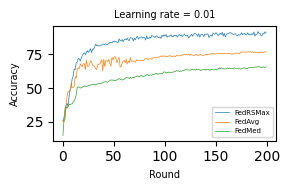

In [83]:
x = range(200)
fig, axs = plt.subplots(1, 1, figsize=(3, 2))
# Plot the lines
plt.plot(x, accuracy_avg_adam01[:200], label='FedRSMax', linewidth=0.5)
plt.plot(x, accuracy_med_adam01[:200], label='FedAvg', linewidth = 0.5)
plt.plot(x, accuracy_max_adam01[:200], label='FedMed', linewidth = 0.5)


# Shade the area under each line
#plt.fill_between(x, accuracy_avg_adam, alpha=0.2)
#plt.fill_between(x, accuracy_max_adam, alpha=0.2)
#plt.fill_between(x, accuracy_med_adam, alpha=0.2)

# Add labels and legend
plt.title("Learning rate = 0.01", fontsize = 7)
plt.xlabel('Round', fontsize = 7)
plt.ylabel('Accuracy', fontsize = 7)
plt.legend(fontsize=5)

# Display the plot
plt.tight_layout()
plt.savefig('accuracy-lr01.pdf')
plt.show()


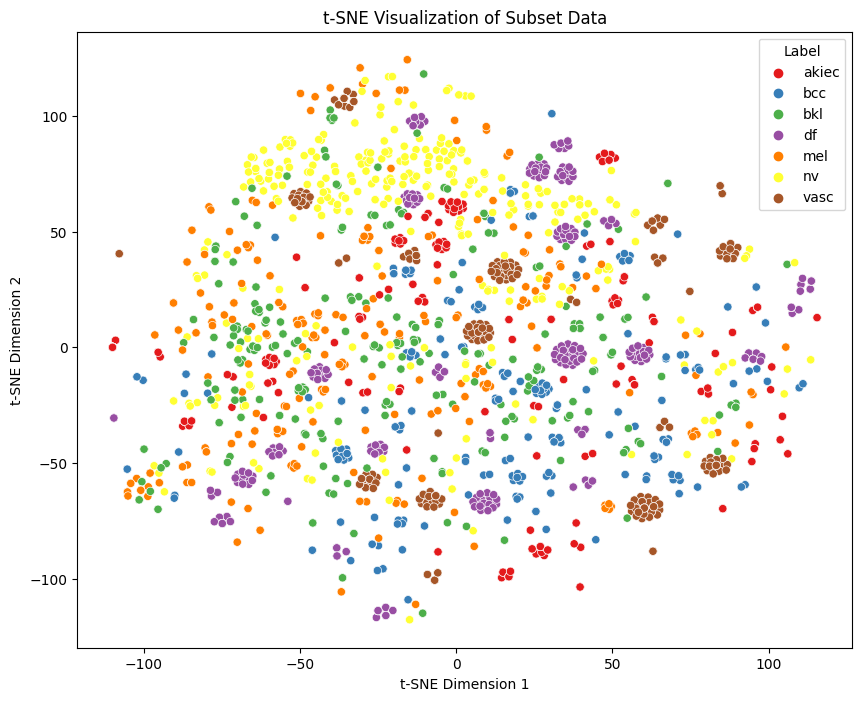

In [97]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed the data as described in your previous code

# Randomly sample four subsets from the balanced dataset
subset_size = 100  # Adjust the subset size as needed
subset_labels = balanced_sub_a['dx'].unique()
subsets = []
for i in range(4):
    subset = pd.DataFrame()
    for label in subset_labels:
        label_subset = balanced_sub_a[balanced_sub_a['dx'] == label].sample(n=subset_size, random_state=i)
        subset = pd.concat([subset, label_subset])
    subsets.append(subset)

# Combine all subsets
combined_subset = pd.concat(subsets)

# Create a list to hold the resized images
resized_images = []
for i, row in combined_subset.iterrows():
    img = imageio.imread('HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img).resize(size))
    resized_images.append(resized_img.flatten())  # Flatten the resized image to 1D

# Convert the list of resized images to a NumPy array
resized_images = np.array(resized_images)

# Perform t-SNE on the resized images
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(resized_images)

# Get the corresponding labels
labels = combined_subset['dx'].values

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='Set1')
plt.title('t-SNE Visualization of Subset Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Label')
plt.show()

In [111]:
# Randomly sample four subsets from the balanced dataset
subset_size = 50  # Adjust the subset size as needed
subset_labels = balanced_sub_a['dx'].unique()
subsets = []
for i in range(3):
    subset = pd.DataFrame()
    for label in subset_labels:
        label_subset = balanced_sub_a[balanced_sub_a['dx'] == label].sample(n=subset_size, random_state=i)
        subset = pd.concat([subset, label_subset])
    subsets.append(subset)

# Create a list to hold the resized images for each subset
resized_images_list = []
labels_list = []

for subset in subsets:
    # Create a list to hold the resized images
    resized_images = []
    labels = []

    for i, row in subset.iterrows():
        img = imageio.imread('HAM_data/HAM10000/' + row['image_id'] + '.jpg')
        resized_img = np.array(Image.fromarray(img).resize(size))
        resized_images.append(resized_img.flatten())  # Flatten the resized image to 1D
        labels.append(row['dx'])

    # Convert the list of resized images to a NumPy array
    resized_images = np.array(resized_images)

    resized_images_list.append(resized_images)
    labels_list.append(labels)



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

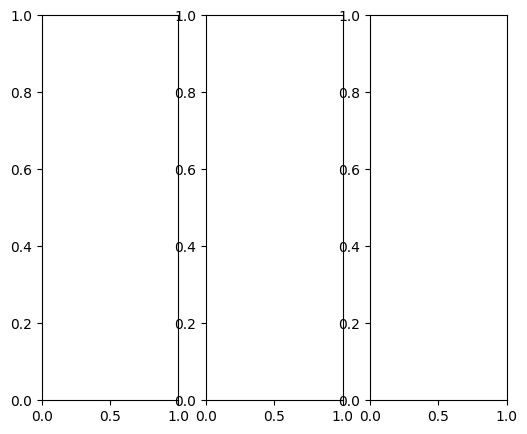

In [113]:
# Plot the t-SNE visualization for each subset
num_subsets = len(subsets)
fig, axs = plt.subplots(1, 3, figsize=(6, 5))

for i in range(num_subsets):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(resized_images_list[i])
    labels = labels_list[i]

    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.set_title(f'Subset {i+1} t-SNE', fontsize=8)
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='Set1', ax=ax)
    ax.set_xlabel('t-SNE1', fontsize=7)
    ax.set_ylabel('t-SNE2', fontsize=7)
    ax.legend(title='Label',fontsize=6)

plt.tight_layout()
plt.show()

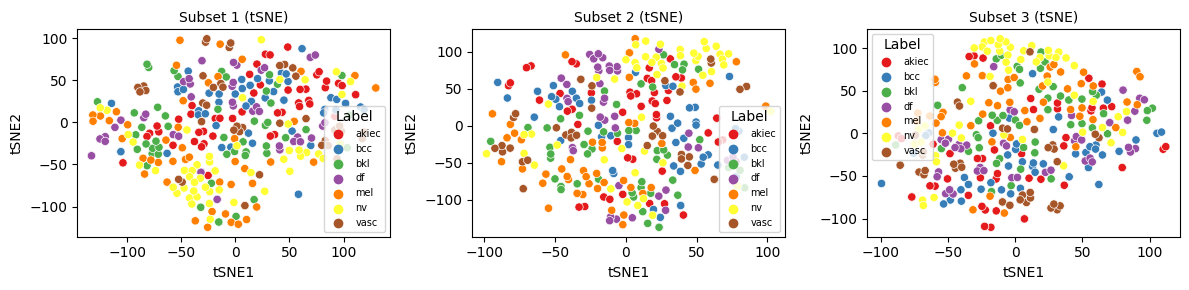

In [121]:
num_subsets = len(subsets)
fig, axs = plt.subplots(1, num_subsets, figsize=(4*num_subsets, 3))

for i in range(num_subsets):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(resized_images_list[i])
    labels = labels_list[i]

    ax = axs[i]
    ax.set_title(f'Subset {i+1} (tSNE)', fontsize=10)
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='Set1', ax=ax)
    ax.set_xlabel('tSNE1', fontsize=10)
    ax.set_ylabel('tSNE2', fontsize=10)
    ax.legend(title='Label',fontsize=7)

plt.tight_layout()
plt.savefig('subset_tSNE.pdf')
plt.show()

In [126]:
accuracy_avg_adam = [31.904761904761905,
 34.44444444444444,
 36.03174603174603,
 38.57142857142857,
 50.476190476190474,
 51.26984126984127,
 53.01587301587302,
 56.34920634920635,
 63.333333333333336,
 66.34920634920636,
 67.46031746031746,
 68.0952380952381,
 68.5822856782527,
 69.04761904761905,
 69.68253968253968,
 69.52380952380952,
 70.47619047619048,
 71.11111111111111,
 71.42857142857143,
 72.31746031746032,
 73.01587301587301,
 74.31746031746032,
 75.85714285714286,
 76.03174603174604,
 77.39682539682539,
 77.4015873015873,
 77.66666666666667,
 78.23809523809524,
 78.98412698412699,
 79.17301587301587,
 79.3015873015873,
 79.56507936507937,
 79.75873015873017,
 79.79650793650794,
 79.85396825396825,
 79.96507936507937,
 79.94761904761905,
 80.95238095238095,
 80.68253968253968,
 80.73015873015873,
 80.95238095238095,
 80.84126984126983,
 80.98909433489377,
 81.26984126984127,
 81.38463492063492,
 81.84126984126983,
 81.22222222222223,
 81.58730158730158,
 81.9047619047619,
 81.84126984126983,
 81.91111111111111,
 81.97460317460318,
 82.31746031746032,
 82.01587301587301,
 82.53968253968254,
 82.74603174603175,
 82.76349206349206,
 82.82222222222223,
 82.6984126984127,
 83.17460317460318,
 83.65079365079364,
 83.76984126984127,
 83.83809523809524,
 83.74603174603175,
 83.83333333333333,
 83.6984126984127,
 83.96825396825396,
 83.65079365079364,
 83.6984126984127,
 84.12698412698413,
 84.33333333333333,
 84.12698412698413,
 84.38095238095238,
 84.65079365079364,
 84.96825396825396,
 84.65079365079364,
 84.80952380952381,
 84.76190476190476,
 84.82222222222223,
 84.91587301587301,
 84.96825396825396,
 84.92063492063492,
 84.53333333333333,
 84.96825396825396,
 84.38095238095238,
 84.96825396825396,
 85.23809523809524,
 85.39682539682539,
 85.92063492063492,
 85.80952380952381,
 85.07936507936508,
 85.96825396825396,
 85.12698412698413,
 85.4920634920635,
 85.28571428571429,
 85.96825396825396,
 85.39682539682539,
 85.65079365079364,
 85.92063492063492,
 85.28571428571429,
 85.92063492063492,
 85.12698412698413,
 85.07936507936508,
 85.60317460317461,
 85.23809523809524,
 85.92063492063492,
 85.07936507936508,
 85.23809523809524,
 85.80952380952381,
 86.19047619047619,
 86.07936507936508,
 86.76190476190476,
 86.92063492063492,
 86.07936507936508,
 86.19047619047619,
 86.60317460317461,
 86.92063492063492,
 86.66666666666667,
 86.87301587301587,
 86.96825396825396,
 86.87301587301587,
 86.87301587301587,
 86.87301587301587,
 86.4920634920635,
 86.92063492063492,
 86.34920634920636,
 86.34920634920636,
 86.39682539682539,
 86.5079365079365,
 86.39682539682539,
 86.82539682539682,
 86.19047619047619,
 86.19047619047619,
 86.87301587301587,
 86.98412698412699,
 86.39682539682539,
 86.71428571428571,
 87.14285714285714,
 87.34920634920636,
 87.19047619047619,
 87.34920634920636,
 87.98412698412699,
 87.19047619047619,
 87.5079365079365,
 87.87301587301587,
 87.14285714285714,
 87.23809523809524,
 87.34920634920636,
 87.61904761904762,
 87.76190476190476,
 87.92063492063492,
 87.82539682539682,
 87.03174603174604,
 87.3015873015873,
 88.19047619047619,
 88.07936507936508,
 88.87301587301587,
 88.34920634920636,
 88.5079365079365,
 88.98412698412699,
 88.3015873015873,
 88.39682539682539,
 88.77777777777777,
 88.5079365079365,
 88.87301587301587,
 88.3015873015873,
 88.66666666666667,
 88.66666666666667,
 88.14285714285714,
 88.92063492063492,
 88.3015873015873,
 88.3015873015873,
 88.19047619047619,
 88.19047619047619,
 88.92063492063492,
 88.14285714285714,
 88.23809523809524,
 88.19047619047619,
 88.19047619047619,
 88.66666666666667,
 88.23809523809524,
 88.98412698412699,
 88.14285714285714,
 88.5079365079365,
 88.66666666666667,
 88.71428571428571,
 88.19047619047619,
 88.46031746031746,
 88.14285714285714,
 88.92063492063492,
 88.19047619047619,
 88.3015873015873,
 88.14285714285714,
 88.98412698412699,
 88.28571428571429,
 88.5079365079365,
 88.39682539682539,
 88.82539682539682,
 88.44444444444444,
 88.14285714285714,
 88.87301587301587,
 88.34920634920636,
 88.93650793650794,
 88.71428571428571,
 88.5079365079365,
 88.03174603174604,
 88.46031746031746,
 88.14285714285714,
 88.66666666666667,
 88.66666666666667,
 88.92063492063492,
 88.23809523809524,
 88.66666666666667,
 88.46031746031746,
 88.66666666666667,
 88.98412698412699,
 88.82539682539682,
 88.82539682539682,
 88.44444444444444,
 88.46031746031746,
 88.92063492063492,
 88.82539682539682,
 88.23809523809524,
 88.3015873015873,
 88.34920634920636,
 88.3015873015873,
 88.28571428571429,
 88.39682539682539,
 88.87301587301587,
 88.82539682539682,
 88.39682539682539,
 88.44444444444444,
 88.5079365079365,
 88.66666666666667,
 88.98412698412699,
 88.5079365079365,
 88.87301587301587,
 88.03174603174604,
 88.93650793650794,
 88.55555555555556,
 88.46031746031746,
 88.98412698412699,
 88.19047619047619,
 88.34920634920636,
 88.5079365079365,
 88.03174603174604,
 88.34920634920636,
 88.03174603174604,
 88.77777777777777,
 88.61904761904762,
 88.44444444444444,
 88.23809523809524,
 88.39682539682539,
 88.14285714285714,
 88.98412698412699,
 88.34920634920636,
 88.71428571428571,
 88.82539682539682,
 88.66666666666667,
 88.14285714285714,
 88.14285714285714,
 88.0952380952381,
 88.98412698412699,
 88.14285714285714,
 88.5079365079365,
 88.66666666666667,
 88.3015873015873,
 88.93650793650794,
 88.66666666666667,
 88.92063492063492,
 88.19047619047619,
 88.92063492063492,
 88.96825396825396,
 88.03174603174604,
 88.03174603174604,
 88.34920634920636,
 88.82539682539682,
 88.5079365079365,
 88.14285714285714,
 88.19047619047619,
 88.14285714285714,
 88.19047619047619,
 88.82539682539682,
 86.82539682539682,
 88.87301587301587,
 88.87301587301587,
 88.66666666666667,
 88.66666666666667,
 88.77777777777777,
 88.82539682539682,
 88.14285714285714,
 88.39682539682539,
 88.03174603174604,
 88.14285714285714,
 88.82539682539682,
 88.87301587301587,
 88.28571428571429,
 88.03174603174604,
 88.5079365079365,
 88.66666666666667,
 88.98412698412699,
 88.14285714285714,
 88.87301587301587,
 88.44444444444444,
 88.87301587301587,
 88.92063492063492,
 88.61904761904762,
 88.34920634920636,
 88.82539682539682,
 88.82539682539682,
 88.98412698412699,
 88.5079365079365,
 88.19047619047619,
 88.66666666666667,
 88.98412698412699,
 88.34920634920636,
 88.66666666666667,
 88.03174603174604,
 88.66666666666667,
 88.5079365079365,
 88.14285714285714,
 88.14285714285714,
 88.5079365079365,
 88.87301587301587,
 88.0952380952381,
 88.03174603174604,
 88.71428571428571,
 88.03174603174604,
 88.07936507936508,
 88.23809523809524,
 88.61904761904762,
 88.34920634920636,
 88.55555555555556,
 88.5079365079365,
 88.55555555555556,
 88.82539682539682,
 88.66666666666667,
 88.07936507936508,
 88.80952380952381,
 88.46031746031746,
 88.39682539682539,
 88.34920634920636,
 88.5079365079365,
 88.5079365079365,
 88.80952380952381,
 88.39682539682539,
 88.66666666666667,
 88.71428571428571,
 88.5079365079365,
 88.07936507936508,
 88.19047619047619,
 88.98412698412699,
 88.0952380952381,
 88.66666666666667,
 88.92063492063492,
 88.07936507936508,
 88.66666666666667,
 88.82539682539682,
 88.55555555555556,
 88.3015873015873,
 88.77777777777777,
 88.96825396825396,
 88.03174603174604,
 88.46031746031746,
 88.92063492063492,
 88.66666666666667,
 88.98412698412699,
 88.66666666666667,
 88.07936507936508,
 88.19047619047619,
 88.98412698412699,
 88.23809523809524,
 88.34920634920636,
 88.03174603174604,
 88.66666666666667,
 88.07936507936508,
 88.66666666666667,
 88.34920634920636,
 88.23809523809524,
 88.39682539682539,
 88.03174603174604,
 88.61904761904762,
 88.46031746031746,
 88.66666666666667,
 88.03174603174604,
 88.34920634920636,
 88.14285714285714,
 88.3015873015873,
 88.0952380952381,
 88.14285714285714,
 88.07936507936508,
 88.98412698412699,
 88.46031746031746,
 88.23809523809524,
 88.34920634920636,
 88.87301587301587,
 88.61904761904762,
 88.66666666666667,
 88.5079365079365,
 88.14285714285714,
 88.82539682539682,
 88.39682539682539,
 88.34920634920636,
 88.98412698412699,
 88.5079365079365,
 88.87301587301587,
 88.19047619047619,
 88.34920634920636,
 88.98412698412699,
 88.34920634920636,
 88.5079365079365,
 88.96825396825396,
 88.14285714285714,
 88.98412698412699,
 88.19047619047619,
 88.98412698412699,
 88.98412698412699,
 88.98412698412699,
 88.57142857142857,
 88.25396825396825,
 88.87301587301587,
 88.5079365079365,
 88.39682539682539,
 88.3015873015873,
 88.82539682539682,
 88.14285714285714,
 88.61904761904762,
 88.23809523809524,
 88.34920634920636,
 88.39682539682539,
 88.93650793650794,
 88.57142857142857,
 88.82539682539682,
 88.46031746031746,
 88.82539682539682,
 88.03174603174604,
 88.93650793650794,
 88.77777777777777,
 88.71428571428571,
 88.5079365079365,
 88.61904761904762,
 88.23809523809524,
 88.34920634920636,
 88.5079365079365,
 88.34920634920636,
 88.23809523809524,
 88.61904761904762,
 88.55555555555556,
 88.82539682539682,
 88.14285714285714,
 88.76190476190476,
 88.19047619047619,
 88.25396825396825,
 88.71428571428571,
 88.5079365079365,
 88.19047619047619,
 88.66666666666667,
 88.5079365079365,
 88.66666666666667,
 88.77777777777777,
 88.46031746031746,
 88.98412698412699,
 88.5079365079365,
 88.88888888888889,
 88.98412698412699,
 88.46031746031746,
 88.5079365079365,
 88.98412698412699,
 88.34920634920636,
 88.07936507936508,
 88.41269841269842,
 88.82539682539682,
 88.71428571428571,
 88.68253968253968,
 88.98412698412699,
 88.34920634920636,
 88.03174603174604,
 88.39682539682539,
 88.34920634920636,
 88.92063492063492,
 88.03174603174604,
 86.66666666666667,
 85.55555555555556,
 86.19047619047619,
 85.71428571428571,
 86.03174603174604,
 85.55555555555556,
 86.82539682539682,
 86.19047619047619,
 87.46031746031746,
 86.5079365079365,
 85.87301587301587,
 87.61904761904762,
 86.34920634920636,
 86.03174603174604,
 87.77777777777777,
 85.07936507936508,
 86.98412698412699,
 85.07936507936508,
 86.82539682539682]

In [123]:
accuracy_max_adam = [24.92063492063492,
 21.11111111111111,
 34.285714285714285,
 37.61904761904762,
 44.285714285714285,
 30.952380952380953,
 34.285714285714285,
 50.79365079365079,
 45.23809523809524,
 47.77777777777778,
 51.26984126984127,
 52.06349206349206,
 55.3968253968254,
 59.20634920634921,
 55.07936507936508,
 53.80952380952381,
 54.44444444444444,
 59.20634920634921,
 55.3968253968254,
 47.93650793650794,
 56.98412698412698,
 50.95238095238095,
 56.03174603174603,
 51.58730158730159,
 57.61904761904762,
 54.285714285714285,
 53.96825396825397,
 56.19047619047619,
 59.84126984126984,
 53.96825396825397,
 54.6031746031746,
 56.19047619047619,
 56.507936507936506,
 61.58730158730159,
 54.92063492063492,
 57.61904761904762,
 54.6031746031746,
 56.82539682539682,
 55.55555555555556,
 45.87301587301587,
 60.476190476190474,
 48.57142857142857,
 58.25396825396825,
 53.65079365079365,
 47.301587301587304,
 53.65079365079365,
 62.22222222222222,
 46.98412698412698,
 53.65079365079365,
 54.285714285714285,
 51.58730158730159,
 49.682539682539684,
 55.87301587301587,
 51.904761904761905,
 58.41269841269841,
 60.95238095238095,
 53.333333333333336,
 48.41269841269841,
 53.333333333333336,
 56.666666666666664,
 55.23809523809524,
 60.15873015873016,
 47.46031746031746,
 60.95238095238095,
 46.507936507936506,
 55.3968253968254,
 51.58730158730159,
 55.23809523809524,
 40.95238095238095,
 58.25396825396825,
 46.98412698412698,
 60.476190476190474,
 44.44444444444444,
 55.23809523809524,
 46.34920634920635,
 53.333333333333336,
 50.95238095238095,
 56.507936507936506,
 54.44444444444444,
 54.44444444444444,
 59.84126984126984,
 47.77777777777778,
 61.111111111111114,
 50.95238095238095,
 57.77777777777778,
 47.46031746031746,
 58.25396825396825,
 49.20634920634921,
 57.93650793650794,
 49.682539682539684,
 57.93650793650794,
 57.93650793650794,
 48.25396825396825,
 59.36507936507937,
 53.17460317460318,
 47.46031746031746,
 60.476190476190474,
 56.507936507936506,
 42.22222222222222,
 47.61904761904762,
 54.6031746031746,
 48.57142857142857,
 62.22222222222222,
 58.095238095238095,
 55.07936507936508,
 48.73015873015873,
 56.19047619047619,
 43.492063492063494,
 53.17460317460318,
 52.38095238095238,
 54.76190476190476,
 54.76190476190476,
 56.34920634920635,
 41.74603174603175,
 53.01587301587302,
 54.76190476190476,
 51.74603174603175,
 53.96825396825397,
 57.77777777777778,
 46.03174603174603,
 37.142857142857146,
 54.92063492063492,
 48.57142857142857,
 48.888888888888886,
 59.523809523809526,
 53.65079365079365,
 54.285714285714285,
 47.77777777777778,
 42.06349206349206,
 56.34920634920635,
 42.53968253968254,
 50.15873015873016,
 44.44444444444444,
 52.38095238095238,
 45.3968253968254,
 50.317460317460316,
 58.73015873015873,
 43.65079365079365,
 66.19047619047619,
 50.15873015873016,
 47.142857142857146,
 45.3968253968254,
 56.82539682539682,
 55.07936507936508,
 48.888888888888886,
 58.095238095238095,
 49.04761904761905,
 51.74603174603175,
 50.63492063492063,
 48.25396825396825,
 52.38095238095238,
 56.34920634920635,
 46.34920634920635,
 55.3968253968254,
 51.42857142857143,
 54.285714285714285,
 52.698412698412696,
 42.857142857142854,
 48.41269841269841,
 46.666666666666664,
 52.38095238095238,
 55.23809523809524,
 43.96825396825397,
 53.333333333333336,
 48.41269841269841,
 52.22222222222222,
 52.857142857142854,
 54.92063492063492,
 45.87301587301587,
 58.41269841269841,
 51.904761904761905,
 47.77777777777778,
 53.01587301587302,
 55.714285714285715,
 50.79365079365079,
 49.04761904761905,
 55.3968253968254,
 50.63492063492063,
 52.38095238095238,
 56.82539682539682,
 53.492063492063494,
 58.25396825396825,
 47.61904761904762,
 65.71428571428571,
 50.79365079365079,
 66.82539682539682,
 58.25396825396825,
 57.77777777777778,
 52.06349206349206,
 54.285714285714285,
 43.01587301587302,
 51.42857142857143,
 60.15873015873016,
 53.333333333333336,
 51.904761904761905,
 44.76190476190476,
 56.507936507936506,
 52.857142857142854,
 48.57142857142857,
 63.01587301587302,
 51.58730158730159,
 58.095238095238095,
 54.76190476190476,
 64.28571428571429,
 55.23809523809524,
 50.95238095238095,
 58.73015873015873,
 47.77777777777778,
 47.301587301587304,
 50.79365079365079,
 56.34920634920635,
 56.34920634920635,
 54.44444444444444,
 57.301587301587304,
 56.98412698412698,
 57.46031746031746,
 49.682539682539684,
 57.142857142857146,
 46.03174603174603,
 57.61904761904762,
 59.523809523809526,
 56.82539682539682,
 54.6031746031746,
 60.15873015873016,
 50.15873015873016,
 52.22222222222222,
 60.95238095238095,
 46.82539682539682,
 61.74603174603175,
 54.76190476190476,
 50.476190476190474,
 45.3968253968254,
 54.76190476190476,
 44.12698412698413,
 58.73015873015873,
 51.74603174603175,
 58.095238095238095,
 48.25396825396825,
 63.01587301587302,
 50.476190476190474,
 58.25396825396825,
 52.53968253968254,
 52.38095238095238,
 53.65079365079365,
 56.34920634920635,
 62.38095238095238,
 50.15873015873016,
 59.20634920634921,
 52.38095238095238,
 58.25396825396825,
 46.82539682539682,
 52.38095238095238,
 53.333333333333336,
 48.095238095238095,
 56.98412698412698,
 51.42857142857143,
 61.111111111111114,
 48.57142857142857,
 56.666666666666664,
 53.01587301587302,
 54.12698412698413,
 52.22222222222222,
 55.87301587301587,
 49.84126984126984,
 59.84126984126984,
 57.301587301587304,
 54.12698412698413,
 64.92063492063492,
 58.41269841269841,
 53.333333333333336,
 58.095238095238095,
 55.3968253968254,
 51.74603174603175,
 61.904761904761905,
 62.06349206349206,
 60.0,
 48.888888888888886,
 59.36507936507937,
 60.63492063492063,
 52.857142857142854,
 51.74603174603175,
 54.285714285714285,
 60.476190476190474,
 58.25396825396825,
 55.55555555555556,
 53.333333333333336,
 56.34920634920635,
 52.698412698412696,
 55.07936507936508,
 56.82539682539682,
 62.53968253968254,
 58.41269841269841,
 53.333333333333336,
 65.55555555555556,
 61.74603174603175,
 53.01587301587302,
 61.111111111111114,
 61.42857142857143,
 54.6031746031746,
 51.42857142857143,
 55.55555555555556,
 59.682539682539684,
 51.111111111111114,
 60.317460317460316,
 61.111111111111114,
 64.76190476190476,
 55.3968253968254,
 55.23809523809524,
 63.333333333333336,
 54.92063492063492,
 60.0,
 56.03174603174603,
 63.17460317460318,
 60.95238095238095,
 56.19047619047619,
 58.888888888888886,
 56.666666666666664,
 69.36507936507937,
 55.714285714285715,
 64.44444444444444,
 58.25396825396825,
 51.111111111111114,
 58.095238095238095,
 61.111111111111114,
 52.06349206349206,
 61.904761904761905,
 59.20634920634921,
 62.38095238095238,
 55.714285714285715,
 64.92063492063492,
 62.698412698412696,
 60.79365079365079,
 64.44444444444444,
 51.904761904761905,
 63.96825396825397,
 60.317460317460316,
 52.22222222222222,
 58.888888888888886,
 58.57142857142857,
 58.25396825396825,
 57.46031746031746,
 57.93650793650794,
 55.3968253968254,
 61.42857142857143,
 59.04761904761905,
 60.15873015873016,
 59.20634920634921,
 58.57142857142857,
 57.93650793650794,
 59.20634920634921,
 59.20634920634921,
 58.41269841269841,
 60.63492063492063,
 52.38095238095238,
 64.92063492063492,
 57.142857142857146,
 57.77777777777778,
 59.04761904761905,
 53.65079365079365,
 60.317460317460316,
 59.36507936507937,
 57.93650793650794,
 57.61904761904762,
 63.01587301587302,
 55.07936507936508,
 55.87301587301587,
 70.31746031746032,
 60.95238095238095,
 61.904761904761905,
 51.58730158730159,
 50.476190476190474,
 56.03174603174603,
 63.65079365079365,
 52.06349206349206,
 67.14285714285714,
 58.888888888888886,
 64.76190476190476,
 60.0,
 62.857142857142854,
 60.15873015873016,
 64.92063492063492,
 58.25396825396825,
 63.01587301587302,
 57.77777777777778,
 65.55555555555556,
 57.142857142857146,
 58.888888888888886,
 55.23809523809524,
 59.523809523809526,
 65.55555555555556,
 51.58730158730159,
 48.73015873015873,
 62.698412698412696,
 55.23809523809524,
 59.20634920634921,
 61.74603174603175,
 58.095238095238095,
 61.904761904761905,
 60.0,
 61.42857142857143,
 61.26984126984127,
 51.904761904761905,
 54.12698412698413,
 64.60317460317461,
 61.904761904761905,
 56.82539682539682,
 58.25396825396825,
 58.73015873015873,
 62.857142857142854,
 58.25396825396825,
 59.36507936507937,
 53.17460317460318,
 65.07936507936508,
 53.17460317460318,
 60.15873015873016,
 55.23809523809524,
 63.01587301587302,
 56.507936507936506,
 58.095238095238095,
 61.58730158730159,
 54.6031746031746,
 56.82539682539682,
 56.19047619047619,
 53.80952380952381,
 60.95238095238095,
 57.93650793650794,
 50.63492063492063,
 65.71428571428571,
 55.87301587301587,
 53.17460317460318,
 60.63492063492063,
 60.15873015873016,
 49.20634920634921,
 65.39682539682539,
 47.93650793650794,
 60.79365079365079,
 54.12698412698413,
 62.53968253968254,
 56.82539682539682,
 57.93650793650794,
 60.79365079365079,
 60.95238095238095,
 57.93650793650794,
 62.38095238095238,
 62.06349206349206,
 62.857142857142854,
 57.142857142857146,
 55.714285714285715,
 57.77777777777778,
 61.111111111111114,
 53.80952380952381,
 62.06349206349206,
 62.38095238095238,
 60.0,
 53.17460317460318,
 61.26984126984127,
 57.77777777777778,
 52.857142857142854,
 57.61904761904762,
 65.71428571428571,
 62.22222222222222,
 55.3968253968254,
 55.87301587301587,
 64.12698412698413,
 57.61904761904762,
 58.888888888888886,
 49.523809523809526,
 59.682539682539684,
 57.77777777777778,
 61.111111111111114,
 55.3968253968254,
 57.142857142857146,
 58.73015873015873,
 56.82539682539682,
 59.84126984126984,
 63.01587301587302,
 63.01587301587302,
 62.06349206349206,
 51.74603174603175,
 62.06349206349206,
 59.682539682539684,
 58.25396825396825,
 66.5079365079365,
 46.507936507936506,
 63.492063492063494,
 51.74603174603175,
 62.857142857142854,
 53.333333333333336,
 58.73015873015873,
 56.03174603174603,
 62.06349206349206,
 60.95238095238095,
 59.20634920634921,
 63.17460317460318,
 58.41269841269841,
 55.87301587301587,
 55.55555555555556,
 55.55555555555556,
 61.58730158730159,
 52.06349206349206]

In [124]:
accuracy_med_adam = [18.571428571428573,
 26.349206349206348,
 36.19047619047619,
 38.73015873015873,
 38.73015873015873,
 44.92063492063492,
 45.87301587301587,
 50.63492063492063,
 49.04761904761905,
 50.476190476190474,
 57.142857142857146,
 55.3968253968254,
 54.76190476190476,
 61.74603174603175,
 60.0,
 53.01587301587302,
 60.63492063492063,
 56.507936507936506,
 62.06349206349206,
 55.55555555555556,
 64.76190476190476,
 61.904761904761905,
 62.06349206349206,
 64.28571428571429,
 62.06349206349206,
 64.12698412698413,
 62.698412698412696,
 61.26984126984127,
 62.53968253968254,
 61.58730158730159,
 58.57142857142857,
 65.71428571428571,
 54.12698412698413,
 58.57142857142857,
 55.55555555555556,
 60.95238095238095,
 58.888888888888886,
 63.17460317460318,
 52.06349206349206,
 61.111111111111114,
 55.55555555555556,
 60.317460317460316,
 54.6031746031746,
 53.17460317460318,
 53.492063492063494,
 53.17460317460318,
 54.285714285714285,
 49.523809523809526,
 46.34920634920635,
 52.22222222222222,
 57.301587301587304,
 55.87301587301587,
 57.301587301587304,
 49.84126984126984,
 56.19047619047619,
 46.98412698412698,
 55.87301587301587,
 56.82539682539682,
 49.84126984126984,
 47.142857142857146,
 47.46031746031746,
 47.77777777777778,
 45.87301587301587,
 46.03174603174603,
 51.58730158730159,
 51.42857142857143,
 49.36507936507937,
 46.34920634920635,
 56.34920634920635,
 44.12698412698413,
 48.888888888888886,
 53.333333333333336,
 54.92063492063492,
 46.666666666666664,
 45.23809523809524,
 55.714285714285715,
 47.142857142857146,
 43.01587301587302,
 55.3968253968254,
 46.98412698412698,
 43.65079365079365,
 47.46031746031746,
 48.41269841269841,
 53.492063492063494,
 48.73015873015873,
 45.87301587301587,
 46.507936507936506,
 52.22222222222222,
 48.095238095238095,
 51.58730158730159,
 48.25396825396825,
 55.07936507936508,
 47.301587301587304,
 50.317460317460316,
 52.53968253968254,
 53.01587301587302,
 49.523809523809526,
 51.111111111111114,
 46.82539682539682,
 49.20634920634921,
 54.285714285714285,
 50.0,
 51.42857142857143,
 44.6031746031746,
 46.03174603174603,
 50.476190476190474,
 44.44444444444444,
 51.58730158730159,
 53.17460317460318,
 48.095238095238095,
 48.25396825396825,
 49.84126984126984,
 55.714285714285715,
 46.507936507936506,
 51.74603174603175,
 46.03174603174603,
 53.333333333333336,
 58.73015873015873,
 53.65079365079365,
 52.53968253968254,
 52.857142857142854,
 51.58730158730159,
 48.57142857142857,
 53.17460317460318,
 56.34920634920635,
 52.698412698412696,
 52.53968253968254,
 52.698412698412696,
 55.714285714285715,
 51.904761904761905,
 57.61904761904762,
 54.6031746031746,
 52.698412698412696,
 56.666666666666664,
 48.73015873015873,
 54.6031746031746,
 51.42857142857143,
 54.44444444444444,
 54.76190476190476,
 51.58730158730159,
 55.3968253968254,
 59.04761904761905,
 51.904761904761905,
 51.111111111111114,
 51.42857142857143,
 61.26984126984127,
 51.111111111111114,
 57.46031746031746,
 53.65079365079365,
 62.22222222222222,
 58.095238095238095,
 55.3968253968254,
 52.38095238095238,
 52.857142857142854,
 53.492063492063494,
 57.46031746031746,
 58.57142857142857,
 58.41269841269841,
 56.98412698412698,
 54.285714285714285,
 52.698412698412696,
 49.682539682539684,
 53.333333333333336,
 57.46031746031746,
 54.6031746031746,
 48.57142857142857,
 56.19047619047619,
 51.26984126984127,
 55.714285714285715,
 52.698412698412696,
 51.58730158730159,
 50.0,
 55.55555555555556,
 53.80952380952381,
 56.34920634920635,
 50.95238095238095,
 50.317460317460316,
 52.698412698412696,
 58.888888888888886,
 58.73015873015873,
 56.98412698412698,
 52.22222222222222,
 52.698412698412696,
 55.714285714285715,
 51.904761904761905,
 48.888888888888886,
 56.03174603174603,
 51.904761904761905,
 52.38095238095238,
 51.58730158730159,
 50.79365079365079,
 50.63492063492063,
 50.317460317460316,
 55.3968253968254,
 56.03174603174603,
 55.07936507936508,
 54.92063492063492,
 52.698412698412696,
 53.80952380952381,
 53.65079365079365,
 53.65079365079365,
 49.20634920634921,
 52.698412698412696,
 51.42857142857143,
 51.58730158730159,
 45.87301587301587,
 56.34920634920635,
 52.06349206349206,
 54.92063492063492,
 52.22222222222222,
 51.58730158730159,
 54.12698412698413,
 52.857142857142854,
 55.87301587301587,
 53.96825396825397,
 55.3968253968254,
 56.666666666666664,
 59.20634920634921,
 58.25396825396825,
 55.07936507936508,
 55.87301587301587,
 56.34920634920635,
 50.0,
 48.888888888888886,
 49.04761904761905,
 52.53968253968254,
 49.20634920634921,
 53.01587301587302,
 47.61904761904762,
 51.74603174603175,
 53.492063492063494,
 49.36507936507937,
 54.12698412698413,
 59.682539682539684,
 57.301587301587304,
 53.80952380952381,
 49.36507936507937,
 53.492063492063494,
 53.96825396825397,
 55.23809523809524,
 59.04761904761905,
 52.22222222222222,
 55.23809523809524,
 51.904761904761905,
 54.12698412698413,
 53.65079365079365,
 54.92063492063492,
 54.12698412698413,
 60.0,
 55.07936507936508,
 53.80952380952381,
 57.301587301587304,
 54.6031746031746,
 53.65079365079365,
 55.714285714285715,
 55.07936507936508,
 49.84126984126984,
 51.904761904761905,
 54.76190476190476,
 51.904761904761905,
 53.17460317460318,
 51.58730158730159,
 49.20634920634921,
 53.492063492063494,
 50.317460317460316,
 57.46031746031746,
 53.333333333333336,
 51.74603174603175,
 53.80952380952381,
 50.476190476190474,
 52.53968253968254,
 56.82539682539682,
 50.317460317460316,
 53.01587301587302,
 55.07936507936508,
 55.55555555555556,
 53.492063492063494,
 51.111111111111114,
 53.01587301587302,
 53.65079365079365,
 46.19047619047619,
 51.74603174603175,
 48.095238095238095,
 50.0,
 47.61904761904762,
 53.01587301587302,
 56.82539682539682,
 53.492063492063494,
 42.06349206349206,
 51.42857142857143,
 49.84126984126984,
 46.03174603174603,
 59.523809523809526,
 51.26984126984127,
 49.04761904761905,
 52.06349206349206,
 50.95238095238095,
 52.857142857142854,
 46.98412698412698,
 55.23809523809524,
 56.507936507936506,
 50.0,
 52.857142857142854,
 53.492063492063494,
 52.857142857142854,
 53.96825396825397,
 52.38095238095238,
 51.42857142857143,
 56.03174603174603,
 49.20634920634921,
 46.98412698412698,
 49.36507936507937,
 47.61904761904762,
 55.714285714285715,
 45.87301587301587,
 54.6031746031746,
 55.23809523809524,
 53.96825396825397,
 48.57142857142857,
 59.682539682539684,
 47.301587301587304,
 53.333333333333336,
 53.80952380952381,
 53.96825396825397,
 51.58730158730159,
 50.95238095238095,
 52.06349206349206,
 41.42857142857143,
 56.03174603174603,
 53.96825396825397,
 50.476190476190474,
 53.01587301587302,
 53.333333333333336,
 53.65079365079365,
 50.476190476190474,
 40.63492063492063,
 50.476190476190474,
 46.98412698412698,
 51.111111111111114,
 50.63492063492063,
 46.19047619047619,
 47.77777777777778,
 52.22222222222222,
 52.857142857142854,
 48.25396825396825,
 49.04761904761905,
 57.46031746031746,
 56.507936507936506,
 59.04761904761905,
 51.111111111111114,
 50.95238095238095,
 57.93650793650794,
 47.93650793650794,
 48.25396825396825,
 47.301587301587304,
 48.57142857142857,
 53.17460317460318,
 55.55555555555556,
 54.44444444444444,
 47.46031746031746,
 42.698412698412696,
 47.301587301587304,
 55.87301587301587,
 53.17460317460318,
 53.492063492063494,
 55.87301587301587,
 48.25396825396825,
 51.111111111111114,
 53.96825396825397,
 52.22222222222222,
 50.0,
 54.6031746031746,
 51.26984126984127,
 44.12698412698413,
 53.65079365079365,
 42.06349206349206,
 51.42857142857143,
 51.904761904761905,
 50.63492063492063,
 51.42857142857143,
 46.82539682539682,
 52.38095238095238,
 45.55555555555556,
 48.57142857142857,
 50.63492063492063,
 52.22222222222222,
 48.095238095238095,
 45.55555555555556,
 47.93650793650794,
 57.142857142857146,
 45.3968253968254,
 55.55555555555556,
 50.95238095238095,
 47.93650793650794,
 49.20634920634921,
 53.492063492063494,
 47.301587301587304,
 48.57142857142857,
 53.492063492063494,
 50.63492063492063,
 43.17460317460318,
 48.41269841269841,
 51.58730158730159,
 49.523809523809526,
 53.80952380952381,
 45.3968253968254,
 44.6031746031746,
 47.46031746031746,
 46.507936507936506,
 47.77777777777778,
 53.333333333333336,
 52.22222222222222,
 48.73015873015873,
 52.22222222222222,
 47.61904761904762,
 41.58730158730159,
 50.0,
 48.57142857142857,
 51.74603174603175,
 51.904761904761905,
 46.03174603174603,
 50.0,
 50.476190476190474,
 41.58730158730159,
 46.03174603174603,
 47.61904761904762,
 49.84126984126984,
 51.111111111111114,
 53.96825396825397,
 51.42857142857143,
 46.666666666666664,
 51.42857142857143,
 57.301587301587304,
 46.03174603174603,
 43.80952380952381,
 49.04761904761905,
 55.07936507936508,
 48.57142857142857,
 55.3968253968254,
 47.93650793650794,
 49.04761904761905,
 54.6031746031746,
 44.76190476190476,
 48.57142857142857,
 45.07936507936508,
 53.333333333333336,
 53.01587301587302,
 48.095238095238095,
 50.15873015873016,
 55.87301587301587,
 47.301587301587304,
 49.523809523809526,
 48.095238095238095,
 50.15873015873016,
 52.06349206349206,
 60.15873015873016,
 49.84126984126984,
 52.698412698412696,
 44.12698412698413,
 47.77777777777778,
 52.06349206349206,
 45.23809523809524,
 52.857142857142854,
 48.25396825396825,
 51.26984126984127,
 51.42857142857143,
 49.523809523809526,
 48.73015873015873,
 42.53968253968254,
 49.20634920634921,
 46.34920634920635,
 50.317460317460316,
 50.95238095238095,
 49.84126984126984,
 50.15873015873016,
 52.698412698412696,
 49.682539682539684,
 52.698412698412696,
 50.63492063492063,
 41.904761904761905,
 52.38095238095238,
 48.095238095238095,
 45.55555555555556,
 48.57142857142857,
 54.44444444444444,
 55.23809523809524,
 45.3968253968254,
 49.36507936507937,
 53.17460317460318,
 45.3968253968254,
 44.44444444444444,
 43.80952380952381,
 46.666666666666664,
 51.42857142857143,
 53.17460317460318,
 48.73015873015873,
 45.87301587301587,
 51.111111111111114,
 45.55555555555556,
 49.682539682539684]

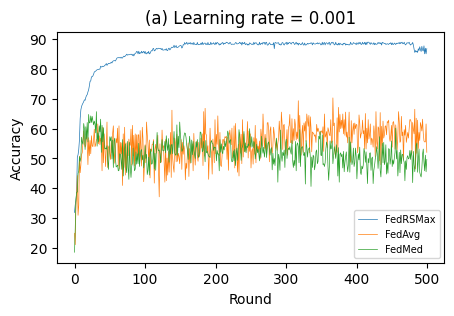

In [127]:
x = range(500)
fig, axs = plt.subplots(1, 1, figsize=(5, 3))
# Plot the lines
plt.plot(x, accuracy_avg_adam, label='FedRSMax', linewidth=0.5)
plt.plot(x, accuracy_max_adam, label='FedAvg', linewidth = 0.5)
plt.plot(x, accuracy_med_adam, label='FedMed', linewidth = 0.5)

# Shade the area under each line
#plt.fill_between(x, accuracy_avg_adam, alpha=0.2)
#plt.fill_between(x, accuracy_max_adam, alpha=0.2)
#plt.fill_between(x, accuracy_med_adam, alpha=0.2)

# Add labels and legend
plt.title("(a) Learning rate = 0.001")
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend(fontsize=7)

# Display the plot
plt.show()